In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# How do the activity scores compare per each downsample to the total?

## Getting step 1 map csv from duck db. 

In [25]:
step1_map = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/step1_AD_AD_BC_RPTR_BC_designed.csv")
step1_map = step1_map[["AD", "AD_BC", "RPTR_BC"]]
step1_map

AD        AD_BC  \
0       CCATTGTGTTCTCCTAAAGCTCCATCTGCTTTGATTACTCCAATGA...  AAAGTTATCAA   
1       TTTGATCCATCTAATGAAATTTCATTTGATGATCCAGTCTTGTTTC...  CAGTAACTATC   
2       TCTTCTTCTGTTCCATCTTCTGTTTCTAATATGGGTACTGTTTCTC...  GACCCCAACGT   
3       CCAACTTCTACTGCTACTACTAATTTGGCTTCTCCATTGTCTTTGT...  GGATCCAAGTT   
4       GCTGCTCATTACTTCTTGGCTTTGAGACAATCTCAAGAGTTCTCTG...  TCACTTGTTAT   
...                                                   ...          ...   
127403  ACTGCTTTGACTTCTCCATCTTTGTATGATGAATCTCCAGACTTTG...  CCTTCCCGCAG   
127404  GTTGCTAATATGGCTGATTTAAATTCTAATAATTCATTTGATTCTG...  TTCACTCCTTA   
127405  GCATTTACTAATTTGACTTCTCCATCTACTTATAATGAATCTCCAG...  CTCGGCAGAAG   
127406  AATGCTTCTTCTGCTCCATCTTCTTCTTCATTTGGTTTGTCTGGTA...  TAAGAAACGAC   
127407  GGTAAAGTTTATGAATTGATCTTGTCTTGGGATGAACAATTGTATC...  TCAGTATGAAT   

               RPTR_BC  
0       TTCGGTGCCATAAC  
1       ATACGACGCTTTAC  
2       CACCACGCTTAGCT  
3       ATGCGTATTATTTA  
4       CGAATGACTCGACC  
...                ...  
127403  TCGCAATTTCCTCT  
127404  CACGCAAGCCAAGG  
127405  TAACCCCAACACCG  
127406  GAGGACAATCATCG  
127407  CCCGAGATTTTATG  

[127408 rows x 3 columns]

## Full results for time point 30

In [26]:
# Getting RT results alone
RPTR_BC_umi_counts_t30 = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_1_chunk/RPTR_1_30_S5_R1_001_1_chunk.fq_simple_umi_counts.tsv", sep="\t")
RPTR_BC_umi_counts_t30 = RPTR_BC_umi_counts_t30.rename(columns={"count": "RT_umi_count"})

# Getting AD results alone
AD_BC_counts_t30 = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_AD_1_30/AD_1_30_simple_umi_counts.tsv", sep="\t")
AD_BC_counts_t30 = AD_BC_counts_t30.rename(columns={"count": "AD_umi_count"})

# Adding RT results to step 1 map
step1_map_with_RPTR_BC_t30 = pd.merge(step1_map, RPTR_BC_umi_counts_t30, how="left")

# Adding AD results to step 1 map
step1_map_with_RPTR_BC_AD_BC_t30 = pd.merge(step1_map_with_RPTR_BC_t30, AD_BC_counts_t30, how="left")

# Removing nulls from step 1 map
step1_map_with_RPTR_BC_AD_BC_no_nulls_t30 = step1_map_with_RPTR_BC_AD_BC_t30.dropna()

# Adding '_full' suffix to the last two columns
step1_map_with_RPTR_BC_AD_BC_no_nulls_t30 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.rename(
    columns={
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-2]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-2] + '_full',
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-1]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.columns[-1] + '_full'
    }
)

# Creating a copy and calculating activity
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t30.copy(deep=True)
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30["activity_full"] = (
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30["RT_umi_count_full"].astype(int) /
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30["AD_umi_count_full"].astype(int)
)

step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30

AD        AD_BC  \
7       GATGATATTGTTGATGTTGTTGGTGATTCTCCATCTACTTCTCCAA...  CTCTGTTGCAG   
19      ATGGGTACTGTTTCTCCACAAGATTTGTTGATTCAAGAACCATTTA...  AAGATATGTCT   
37      TCTGTTGAAGCTTCTCCAGCTACTCCATCTGAAGATTTGGAAGCTT...  TAATTCTTAAA   
42      AAATTGGAAGCTCCAGCTACTACTCATTTGACTTTGGATGCTATCT...  GGGTAGAAGTA   
46      ATTGATATGTTCTTGGAAGATTCTGATTCTCCATCTGCTTCTTGTT...  CGATTCGAGAA   
...                                                   ...          ...   
127373  GGTTCTGAAGAATGGGGTCCATTGTTTCCAGCTCAAGATGACTTCT...  TACAATTAACT   
127378  ACTGCTGCTCCAAGATCTTCTGCTACTAAACATTCTACTGTTGCTG...  ACTAGTTTGCA   
127379  CAATCTTCTGGTTTGAGATCTTCTTTGCAGAATCAAAGAGTTGCTG...  ACCCAGGACTT   
127388  GAATCTACTGTTTCTGTTGCTGCTACTGCTACTGTTACTGCTAAGA...  TAAGCCCTCGC   
127406  AATGCTTCTTCTGCTCCATCTTCTTCTTCATTTGGTTTGTCTGGTA...  TAAGAAACGAC   

               RPTR_BC  RT_umi_count_full  AD_umi_count_full  activity_full  
7       TGGATACTAACCTG              315.0             1988.0       0.158451  
19      TGCCTATGGTACAA             3864.0              594.0       6.505051  
37      AAAGCAACCGAAGA               19.0              156.0       0.121795  
42      TAGTAGATGGAATT               32.0               31.0       1.032258  
46      AACACAAACCATAG               39.0              160.0       0.243750  
...                ...                ...                ...            ...  
127373  TTCGATTAGTTTCA             5057.0              886.0       5.707675  
127378  ACCCACGGCATTGT               83.0              528.0       0.157197  
127379  TGGCTTTATGCAAT               86.0              462.0       0.186147  
127388  TACACTGATACTGA              227.0                1.0     227.000000  
127406  GAGGACAATCATCG              280.0             1484.0       0.188679  

[14391 rows x 6 columns]

In [27]:
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30.to_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_1_chunk/step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30.csv", index=False)

# Full results for time = 5

In [28]:
# Getting RT results alone
RPTR_BC_umi_counts_t5 = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_1_chunk/RPTR_1_5_S2_R1_001_1_chunk.fq_simple_umi_counts.tsv", sep="\t", encoding='latin-1')
RPTR_BC_umi_counts_t5 = RPTR_BC_umi_counts_t5.rename(columns={"count": "RT_umi_count"})

# Getting AD results alone
AD_BC_counts_t5 = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_AD_1_5/AD_1_5_simple_umi_counts.tsv", sep="\t")
AD_BC_counts_t5 = AD_BC_counts_t5.rename(columns={"count": "AD_umi_count"})

# Adding RT results to step 1 map
step1_map_with_RPTR_BC_t5 = pd.merge(step1_map, RPTR_BC_umi_counts_t5, how="left")

# Adding AD results to step 1 map
step1_map_with_RPTR_BC_AD_BC_t5 = pd.merge(step1_map_with_RPTR_BC_t5, AD_BC_counts_t5, how="left")

# Removing nulls from step 1 map
step1_map_with_RPTR_BC_AD_BC_no_nulls_t5 = step1_map_with_RPTR_BC_AD_BC_t5.dropna()

# Adding '_full' suffix to the last two columns
step1_map_with_RPTR_BC_AD_BC_no_nulls_t5 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.rename(
    columns={
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-2]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-2] + '_full',
        step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-1]: step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.columns[-1] + '_full'
    }
)

# Creating a copy and calculating activity
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5 = step1_map_with_RPTR_BC_AD_BC_no_nulls_t5.copy(deep=True)
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5["activity_full"] = (
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5["RT_umi_count_full"].astype(int) /
    step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5["AD_umi_count_full"].astype(int)
)

step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5

/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_21960/3458348559.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  RPTR_BC_umi_counts_t5 = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_1_chunk/RPTR_1_5_S2_R1_001_1_chunk.fq_simple_umi_counts.tsv", sep="\t", encoding='latin-1')


AD        AD_BC  \
7       GATGATATTGTTGATGTTGTTGGTGATTCTCCATCTACTTCTCCAA...  CTCTGTTGCAG   
19      ATGGGTACTGTTTCTCCACAAGATTTGTTGATTCAAGAACCATTTA...  AAGATATGTCT   
37      TCTGTTGAAGCTTCTCCAGCTACTCCATCTGAAGATTTGGAAGCTT...  TAATTCTTAAA   
42      AAATTGGAAGCTCCAGCTACTACTCATTTGACTTTGGATGCTATCT...  GGGTAGAAGTA   
46      ATTGATATGTTCTTGGAAGATTCTGATTCTCCATCTGCTTCTTGTT...  CGATTCGAGAA   
...                                                   ...          ...   
127373  GGTTCTGAAGAATGGGGTCCATTGTTTCCAGCTCAAGATGACTTCT...  TACAATTAACT   
127378  ACTGCTGCTCCAAGATCTTCTGCTACTAAACATTCTACTGTTGCTG...  ACTAGTTTGCA   
127379  CAATCTTCTGGTTTGAGATCTTCTTTGCAGAATCAAAGAGTTGCTG...  ACCCAGGACTT   
127388  GAATCTACTGTTTCTGTTGCTGCTACTGCTACTGTTACTGCTAAGA...  TAAGCCCTCGC   
127406  AATGCTTCTTCTGCTCCATCTTCTTCTTCATTTGGTTTGTCTGGTA...  TAAGAAACGAC   

               RPTR_BC RT_umi_count_full  AD_umi_count_full  activity_full  
7       TGGATACTAACCTG               173             1891.0       0.091486  
19      TGCCTATGGTACAA               765              542.0       1.411439  
37      AAAGCAACCGAAGA                55              154.0       0.357143  
42      TAGTAGATGGAATT                37               22.0       1.681818  
46      AACACAAACCATAG                32              101.0       0.316832  
...                ...               ...                ...            ...  
127373  TTCGATTAGTTTCA               940              918.0       1.023965  
127378  ACCCACGGCATTGT                54              501.0       0.107784  
127379  TGGCTTTATGCAAT                46              485.0       0.094845  
127388  TACACTGATACTGA               188                1.0     188.000000  
127406  GAGGACAATCATCG               154             1073.0       0.143523  

[14101 rows x 6 columns]

In [29]:
step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5.to_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_1_chunk/step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5.csv", index=False)

# For each downsample, save the activity scores

In [176]:
import os
import warnings
warnings.filterwarnings('ignore')
import tqdm
# Define the base directory
base_dir = "/Volumes/Expansion/GCN4_TREBL/downsampling"

# Iterate through all folders in the base directory
for folder in tqdm.tqdm(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path) and "RPTR" in folder:
        print(folder)
        # Process the RPTR_BC_umi_counts file
        umi_counts_path = next(
            (os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith("simple_umi_counts.tsv")),
            None
        )
        if umi_counts_path is None:
            continue
        RPTR_BC_umi_counts = pd.read_csv(umi_counts_path, sep="\t", encoding='latin-1')
        RPTR_BC_umi_counts = RPTR_BC_umi_counts.rename(columns={"count": "RT_umi_count"})

        # Merge with step1_map
        step1_map_with_RPTR_BC = pd.merge(step1_map, RPTR_BC_umi_counts, how="left")

        if "1_30" in folder:
            AD_BC_counts = AD_BC_counts_t30
        else:
            AD_BC_counts = AD_BC_counts_t5

        # Merge with AD_BC_counts
        step1_map_with_RPTR_BC_AD_BC = pd.merge(step1_map_with_RPTR_BC, AD_BC_counts, how="left")

        # Remove nulls
        step1_map_with_RPTR_BC_AD_BC_no_nulls = step1_map_with_RPTR_BC_AD_BC.dropna()

        step1_map_with_RPTR_BC_AD_BC_no_nulls = step1_map_with_RPTR_BC_AD_BC_no_nulls.rename(
            columns={step1_map_with_RPTR_BC_AD_BC_no_nulls.columns[-2]: step1_map_with_RPTR_BC_AD_BC_no_nulls.columns[-2] + '_downsampled',
                    step1_map_with_RPTR_BC_AD_BC_no_nulls.columns[-1]: step1_map_with_RPTR_BC_AD_BC_no_nulls.columns[-1] + '_downsampled'}
        )

        step1_map_with_RPTR_BC_AD_BC_no_nulls["activity_downsampled"] = step1_map_with_RPTR_BC_AD_BC_no_nulls["RT_umi_count_downsampled"].astype(int) / step1_map_with_RPTR_BC_AD_BC_no_nulls["AD_umi_count_downsampled"].astype(int)

        if "1_30" in folder:
            step1_map_with_RPTR_BC_AD_BC_no_nulls = pd.merge(
                step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t30,
                step1_map_with_RPTR_BC_AD_BC_no_nulls,
                on=["AD", "AD_BC", "RPTR_BC"],
                how="inner",
            )
        else:
            step1_map_with_RPTR_BC_AD_BC_no_nulls = pd.merge(
                step1_map_with_RPTR_BC_AD_BC_no_nulls_full_t5,
                step1_map_with_RPTR_BC_AD_BC_no_nulls,
                on=["AD", "AD_BC", "RPTR_BC"],
                how="inner",
            )

        # Save the processed file as a CSV
        output_path = os.path.join(folder_path, "processed_step1_map.csv")
        step1_map_with_RPTR_BC_AD_BC_no_nulls.to_csv(output_path, index=False)
        #print(f"Processed file saved to: {output_path}")

  0%|          | 0/121 [00:00<?, ?it/s]

trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_4


  1%|          | 1/121 [00:00<00:42,  2.80it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_4/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_4


  2%|▏         | 2/121 [00:00<00:35,  3.35it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_4/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_2


  2%|▏         | 3/121 [00:00<00:37,  3.17it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_3_chunks_part_1


  3%|▎         | 4/121 [00:01<00:44,  2.65it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_3_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_7


  4%|▍         | 5/121 [00:01<00:37,  3.11it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_7/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_3_chunks_part_1


  5%|▍         | 6/121 [00:02<00:50,  2.28it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_3_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_4_chunks_part_1


  6%|▌         | 7/121 [00:03<01:04,  1.77it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_4_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_9


  7%|▋         | 8/121 [00:03<00:53,  2.11it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_9/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_14


  7%|▋         | 9/121 [00:03<00:45,  2.47it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_14/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_7


  8%|▊         | 10/121 [00:04<00:45,  2.47it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_7/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_6


  9%|▉         | 11/121 [00:04<00:46,  2.36it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_6/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_18


 10%|▉         | 12/121 [00:04<00:43,  2.51it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_18/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_5_chunks_part_5


 11%|█         | 13/121 [00:05<00:42,  2.55it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_5_chunks_part_5/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_3


 12%|█▏        | 14/121 [00:05<00:40,  2.64it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_9


 12%|█▏        | 15/121 [00:06<00:43,  2.44it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_9/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_4


 13%|█▎        | 16/121 [00:06<00:42,  2.49it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_4/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_3


 14%|█▍        | 17/121 [00:06<00:40,  2.58it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_3


 15%|█▍        | 18/121 [00:07<00:40,  2.53it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_17


 16%|█▌        | 19/121 [00:07<00:38,  2.65it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_17/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_11


 17%|█▋        | 20/121 [00:07<00:36,  2.77it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_11/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_20


 17%|█▋        | 21/121 [00:08<00:37,  2.68it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_20/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_2


 18%|█▊        | 22/121 [00:08<00:40,  2.46it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_15


 19%|█▉        | 23/121 [00:09<00:36,  2.67it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_15/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_2


 20%|█▉        | 24/121 [00:09<00:38,  2.55it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_10


 21%|██        | 25/121 [00:10<00:42,  2.26it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_10/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_6


 21%|██▏       | 26/121 [00:10<00:42,  2.22it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_6/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_15


 22%|██▏       | 27/121 [00:10<00:41,  2.25it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_15/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_8


 23%|██▎       | 28/121 [00:11<00:38,  2.39it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_8/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_5


 24%|██▍       | 29/121 [00:11<00:36,  2.53it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_5/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_2_chunks_part_1


 25%|██▍       | 30/121 [00:12<00:50,  1.82it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_2_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_2_chunks_part_2


 26%|██▌       | 31/121 [00:13<00:51,  1.76it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_2_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_2_chunks_part_2


 26%|██▋       | 32/121 [00:14<01:00,  1.47it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_2_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_2


 27%|██▋       | 33/121 [00:14<00:54,  1.63it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_12


 28%|██▊       | 34/121 [00:14<00:47,  1.84it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_12/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_7


 29%|██▉       | 35/121 [00:15<00:42,  2.02it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_7/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_4


 30%|██▉       | 36/121 [00:15<00:39,  2.17it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_4/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_5


 31%|███       | 37/121 [00:16<00:34,  2.41it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_5/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_14


 31%|███▏      | 38/121 [00:16<00:37,  2.24it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_14/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_1


 32%|███▏      | 39/121 [00:16<00:34,  2.36it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_7


 33%|███▎      | 40/121 [00:17<00:34,  2.37it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_7/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_3_chunks_part_3


 34%|███▍      | 41/121 [00:18<00:42,  1.88it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_3_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_5_chunks_part_1


 35%|███▍      | 42/121 [00:18<00:40,  1.95it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_5_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_19


 36%|███▌      | 43/121 [00:18<00:36,  2.13it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_19/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_3


 36%|███▋      | 44/121 [00:19<00:35,  2.17it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_4_chunks_part_4


 37%|███▋      | 45/121 [00:19<00:37,  2.05it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_4_chunks_part_4/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_1


 38%|███▊      | 46/121 [00:20<00:41,  1.79it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_8


 39%|███▉      | 47/121 [00:21<00:37,  1.96it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_8/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_6


 40%|████      | 49/121 [00:21<00:25,  2.86it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_6/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_5_chunks_part_4


 41%|████▏     | 50/121 [00:21<00:27,  2.60it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_5_chunks_part_4/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_5_chunks_part_5


 42%|████▏     | 51/121 [00:22<00:31,  2.22it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_5_chunks_part_5/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_2


 43%|████▎     | 52/121 [00:22<00:30,  2.26it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_3_chunks_part_2


 44%|████▍     | 53/121 [00:23<00:32,  2.12it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_3_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_20


 45%|████▍     | 54/121 [00:24<00:36,  1.82it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_20/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_4_chunks_part_3


 45%|████▌     | 55/121 [00:24<00:35,  1.84it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_4_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_1


 46%|████▋     | 56/121 [00:25<00:37,  1.74it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_9


 47%|████▋     | 57/121 [00:25<00:31,  2.02it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_9/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_12


 48%|████▊     | 58/121 [00:26<00:30,  2.08it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_12/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_10


 49%|████▉     | 59/121 [00:26<00:26,  2.34it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_10/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_4


 50%|████▉     | 60/121 [00:26<00:24,  2.49it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_4/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_13


 50%|█████     | 61/121 [00:27<00:24,  2.50it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_13/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_9


 51%|█████     | 62/121 [00:27<00:25,  2.35it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_9/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_11


 52%|█████▏    | 63/121 [00:28<00:25,  2.32it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_11/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_18


 53%|█████▎    | 64/121 [00:28<00:24,  2.33it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_18/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_16


 54%|█████▎    | 65/121 [00:29<00:23,  2.36it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_16/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_8


 55%|█████▍    | 66/121 [00:29<00:21,  2.58it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_8/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_4_chunks_part_4


 55%|█████▌    | 67/121 [00:29<00:23,  2.26it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_4_chunks_part_4/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_5_chunks_part_4


 56%|█████▌    | 68/121 [00:30<00:27,  1.90it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_5_chunks_part_4/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_4_chunks_part_2


 57%|█████▋    | 69/121 [00:31<00:27,  1.90it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_4_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_4_chunks_part_2


 58%|█████▊    | 70/121 [00:31<00:28,  1.82it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_4_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_19


 59%|█████▊    | 71/121 [00:32<00:25,  1.98it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_19/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_5


 60%|█████▉    | 72/121 [00:32<00:23,  2.11it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_5/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_5


 60%|██████    | 73/121 [00:32<00:21,  2.23it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_5/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_1


 61%|██████    | 74/121 [00:33<00:20,  2.34it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_4


 62%|██████▏   | 75/121 [00:33<00:20,  2.28it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_4/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_2_chunks_part_1


 63%|██████▎   | 76/121 [00:34<00:21,  2.14it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_2_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_5_chunks_part_2


 64%|██████▎   | 77/121 [00:34<00:22,  1.96it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_5_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_6


 64%|██████▍   | 78/121 [00:35<00:23,  1.85it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_6/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_5_chunks_part_1


 65%|██████▌   | 79/121 [00:36<00:23,  1.81it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_5_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_8


 66%|██████▌   | 80/121 [00:36<00:23,  1.75it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_8/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_1


 67%|██████▋   | 81/121 [00:37<00:20,  1.93it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_8


 68%|██████▊   | 82/121 [00:37<00:19,  2.00it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_8/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_7


 69%|██████▊   | 83/121 [00:37<00:17,  2.18it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_7/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_5_chunks_part_3


 69%|██████▉   | 84/121 [00:38<00:19,  1.92it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_5_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_5


 70%|███████   | 85/121 [00:39<00:19,  1.83it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_5/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_3


 71%|███████   | 86/121 [00:39<00:17,  2.02it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_4_chunks_part_3


 72%|███████▏  | 87/121 [00:40<00:17,  1.92it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_4_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_1


 73%|███████▎  | 88/121 [00:40<00:16,  2.03it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_3_chunks_part_2


 74%|███████▎  | 89/121 [00:41<00:18,  1.72it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_3_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_7


 74%|███████▍  | 90/121 [00:41<00:17,  1.79it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_8_chunks_part_7/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_5


 75%|███████▌  | 91/121 [00:42<00:16,  1.86it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_5/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_8


 76%|███████▌  | 92/121 [00:42<00:14,  1.97it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_8/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_6


 77%|███████▋  | 93/121 [00:43<00:12,  2.17it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_6/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_4_chunks_part_1


 78%|███████▊  | 94/121 [00:43<00:12,  2.12it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_4_chunks_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_17


 79%|███████▊  | 95/121 [00:44<00:11,  2.24it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_17/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_1_chunk


 79%|███████▉  | 96/121 [00:45<00:15,  1.58it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_1_chunk/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_2


 83%|████████▎ | 100/121 [00:45<00:06,  3.23it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_10_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_13


 84%|████████▍ | 102/121 [00:45<00:05,  3.77it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_13/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_3_chunks_part_3


 85%|████████▌ | 103/121 [00:46<00:05,  3.15it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_3_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_16


 86%|████████▌ | 104/121 [00:46<00:05,  3.02it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_16/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_6


 87%|████████▋ | 105/121 [00:47<00:05,  2.98it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_6/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_10


 88%|████████▊ | 106/121 [00:47<00:05,  2.66it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_20_chunks_part_10/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_3


 88%|████████▊ | 107/121 [00:48<00:05,  2.34it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_8_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_5_chunks_part_3


 89%|████████▉ | 108/121 [00:48<00:05,  2.36it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_5_chunks_part_3/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_10


 90%|█████████ | 109/121 [00:49<00:05,  2.36it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_10_chunks_part_10/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_5_chunks_part_2


 91%|█████████ | 110/121 [00:49<00:05,  2.16it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_5_chunks_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_75_part_1


 93%|█████████▎| 112/121 [00:50<00:03,  2.49it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_75_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_1_chunk


 94%|█████████▍| 114/121 [00:52<00:04,  1.71it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_1_chunk/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_75_part_1


 96%|█████████▌| 116/121 [00:53<00:02,  1.77it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_75_part_1/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_75_part_2


 98%|█████████▊| 118/121 [00:54<00:01,  1.85it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_75_part_2/processed_step1_map.csv
trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_75_part_2


100%|██████████| 121/121 [00:55<00:00,  2.19it/s]

Processed file saved to: /Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_30_S5_R1_001_75_part_2/processed_step1_map.csv


# Calculating correlations of each downsample with full

In [18]:
import pandas as pd
import os
from scipy.stats import pearsonr, spearmanr

# Initialize an empty list to store correlation results
correlation_results = []

# Loop through the base directory
for folder in tqdm.tqdm(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        processed_file_path = os.path.join(folder_path, "processed_step1_map.csv")
        if os.path.exists(processed_file_path):
            # Read the processed_step1_map.csv file
            df = pd.read_csv(processed_file_path)
            
            # Check if the required columns exist
            if "activity_full" in df.columns and "activity_downsampled" in df.columns:
                # Calculate Pearson and Spearman correlations
                pearson_corr, _ = pearsonr(df["activity_full"], df["activity_downsampled"])
                spearman_corr, _ = spearmanr(df["activity_full"], df["activity_downsampled"])
                
                # Append the results to the list
                correlation_results.append({
                    "folder_path": folder_path,
                    "pearson_corr": pearson_corr,
                    "spearman_corr": spearman_corr,
                    "num_rows": len(df)  # Track the number of rows
                })

                # Save scatterplot
                plt.figure(figsize=(8, 6), dpi=300)
                sns.set_context('talk')
                plt.scatter(df["activity_full"], df["activity_downsampled"], alpha=0.5)
                plt.title("Activity Full vs Activity Downsampled")
                plt.xlabel("Activity Full")
                plt.ylabel("Activity Downsampled")
                plt.grid(False)
                sns.despine()

                # Add correlations as text on the plot
                plt.text(0.05, 0.95, f"Pearson: {pearson_corr:.2f}\nSpearman: {spearman_corr:.2f}",
                         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

                scatterplot_path = os.path.join(folder_path, "activity_scatterplot.png")
                plt.savefig(scatterplot_path, bbox_inches='tight')
                plt.close()

# Convert the results into a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Display the correlation DataFrame
correlation_df

100%|██████████| 121/121 [00:47<00:00,  2.55it/s]


folder_path  pearson_corr  \
0    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999769   
1    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999739   
2    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999741   
3    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999937   
4    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999560   
..                                                 ...           ...   
105  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999961   
106  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      1.000000   
107  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999991   
108  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999946   
109  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999990   

     spearman_corr  num_rows  
0         0.989734     13973  
1         0.994606     14210  
2         0.994896     14210  
3         0.993176     14036  
4         0.988000     13929  
..             ...       ...  
105       0.995241     14055  
106       1.000000     14391  
107       0.998895     14347  
108       0.995558     14059  
109       0.998855     14341  

[110 rows x 4 columns]

In [19]:
correlation_df['num_splits'] = correlation_df['folder_path'].str.extract(r'_(\d+)_chunks')#.astype(int)

correlation_df.loc[correlation_df['folder_path'].str.contains('_75'), 'num_splits'] = 4 / 3
correlation_df.loc[correlation_df['folder_path'].str.contains('_1_chunk'), 'num_splits'] = 1

correlation_df
#[correlation_df["num_splits"].isna()]["folder_path"]

folder_path  pearson_corr  \
0    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999769   
1    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999739   
2    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999741   
3    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999937   
4    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999560   
..                                                 ...           ...   
105  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999961   
106  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      1.000000   
107  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999991   
108  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999946   
109  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999990   

     spearman_corr  num_rows num_splits  
0         0.989734     13973          8  
1         0.994606     14210         20  
2         0.994896     14210         20  
3         0.993176     14036          3  
4         0.988000     13929         20  
..             ...       ...        ...  
105       0.995241     14055   1.333333  
106       1.000000     14391          1  
107       0.998895     14347   1.333333  
108       0.995558     14059   1.333333  
109       0.998855     14341   1.333333  

[110 rows x 5 columns]

In [20]:
correlation_df["percent_reads"] = 100 / correlation_df["num_splits"].astype(float)
correlation_df["time"] = correlation_df["folder_path"].str.extract("RPTR_1_(\d+)_").astype(int)
correlation_df

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/hw/xx051vr9457c7lrngf2mypgr0000gn/T/ipykernel_21960/2623618139.py:2: SyntaxWarning: invalid escape sequence '\d'
  correlation_df["time"] = correlation_df["folder_path"].str.extract("RPTR_1_(\d+)_").astype(int)


folder_path  pearson_corr  \
0    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999769   
1    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999739   
2    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999741   
3    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999937   
4    /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999560   
..                                                 ...           ...   
105  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999961   
106  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      1.000000   
107  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999991   
108  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999946   
109  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999990   

     spearman_corr  num_rows num_splits  percent_reads  time  
0         0.989734     13973          8      12.500000     5  
1         0.994606     14210         20       5.000000    30  
2         0.994896     14210         20       5.000000    30  
3         0.993176     14036          3      33.333333     5  
4         0.988000     13929         20       5.000000     5  
..             ...       ...        ...            ...   ...  
105       0.995241     14055   1.333333      75.000000     5  
106       1.000000     14391          1     100.000000    30  
107       0.998895     14347   1.333333      75.000000    30  
108       0.995558     14059   1.333333      75.000000     5  
109       0.998855     14341   1.333333      75.000000    30  

[110 rows x 7 columns]

In [21]:
correlation_df.sort_values(by = 'pearson_corr')

folder_path  pearson_corr  \
57   /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999488   
47   /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999497   
32   /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999508   
64   /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999527   
56   /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999545   
..                                                 ...           ...   
107  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999991   
31   /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999996   
29   /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      0.999996   
106  /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      1.000000   
94   /Volumes/Expansion/GCN4_TREBL/downsampling/tre...      1.000000   

     spearman_corr  num_rows num_splits  percent_reads  time  
57        0.987344     13924         20            5.0     5  
47        0.987366     13932         20            5.0     5  
32        0.987756     13925         20            5.0     5  
64        0.987361     13924         20            5.0     5  
56        0.987915     13922         20            5.0     5  
..             ...       ...        ...            ...   ...  
107       0.998895     14347   1.333333           75.0    30  
31        0.998831     14341          2           50.0    30  
29        0.998877     14347          2           50.0    30  
106       1.000000     14391          1          100.0    30  
94        1.000000     14101          1          100.0     5  

[110 rows x 7 columns]

In [22]:
correlation_df.to_csv("../../output/GCN4_downsampling_correlation_results.csv", index=False)

In [ ]:
# Filter data for time = 5 and time = 30
correlation_df_5 = correlation_df[correlation_df["time"] == 5]
correlation_df_30 = correlation_df[correlation_df["time"] == 30]


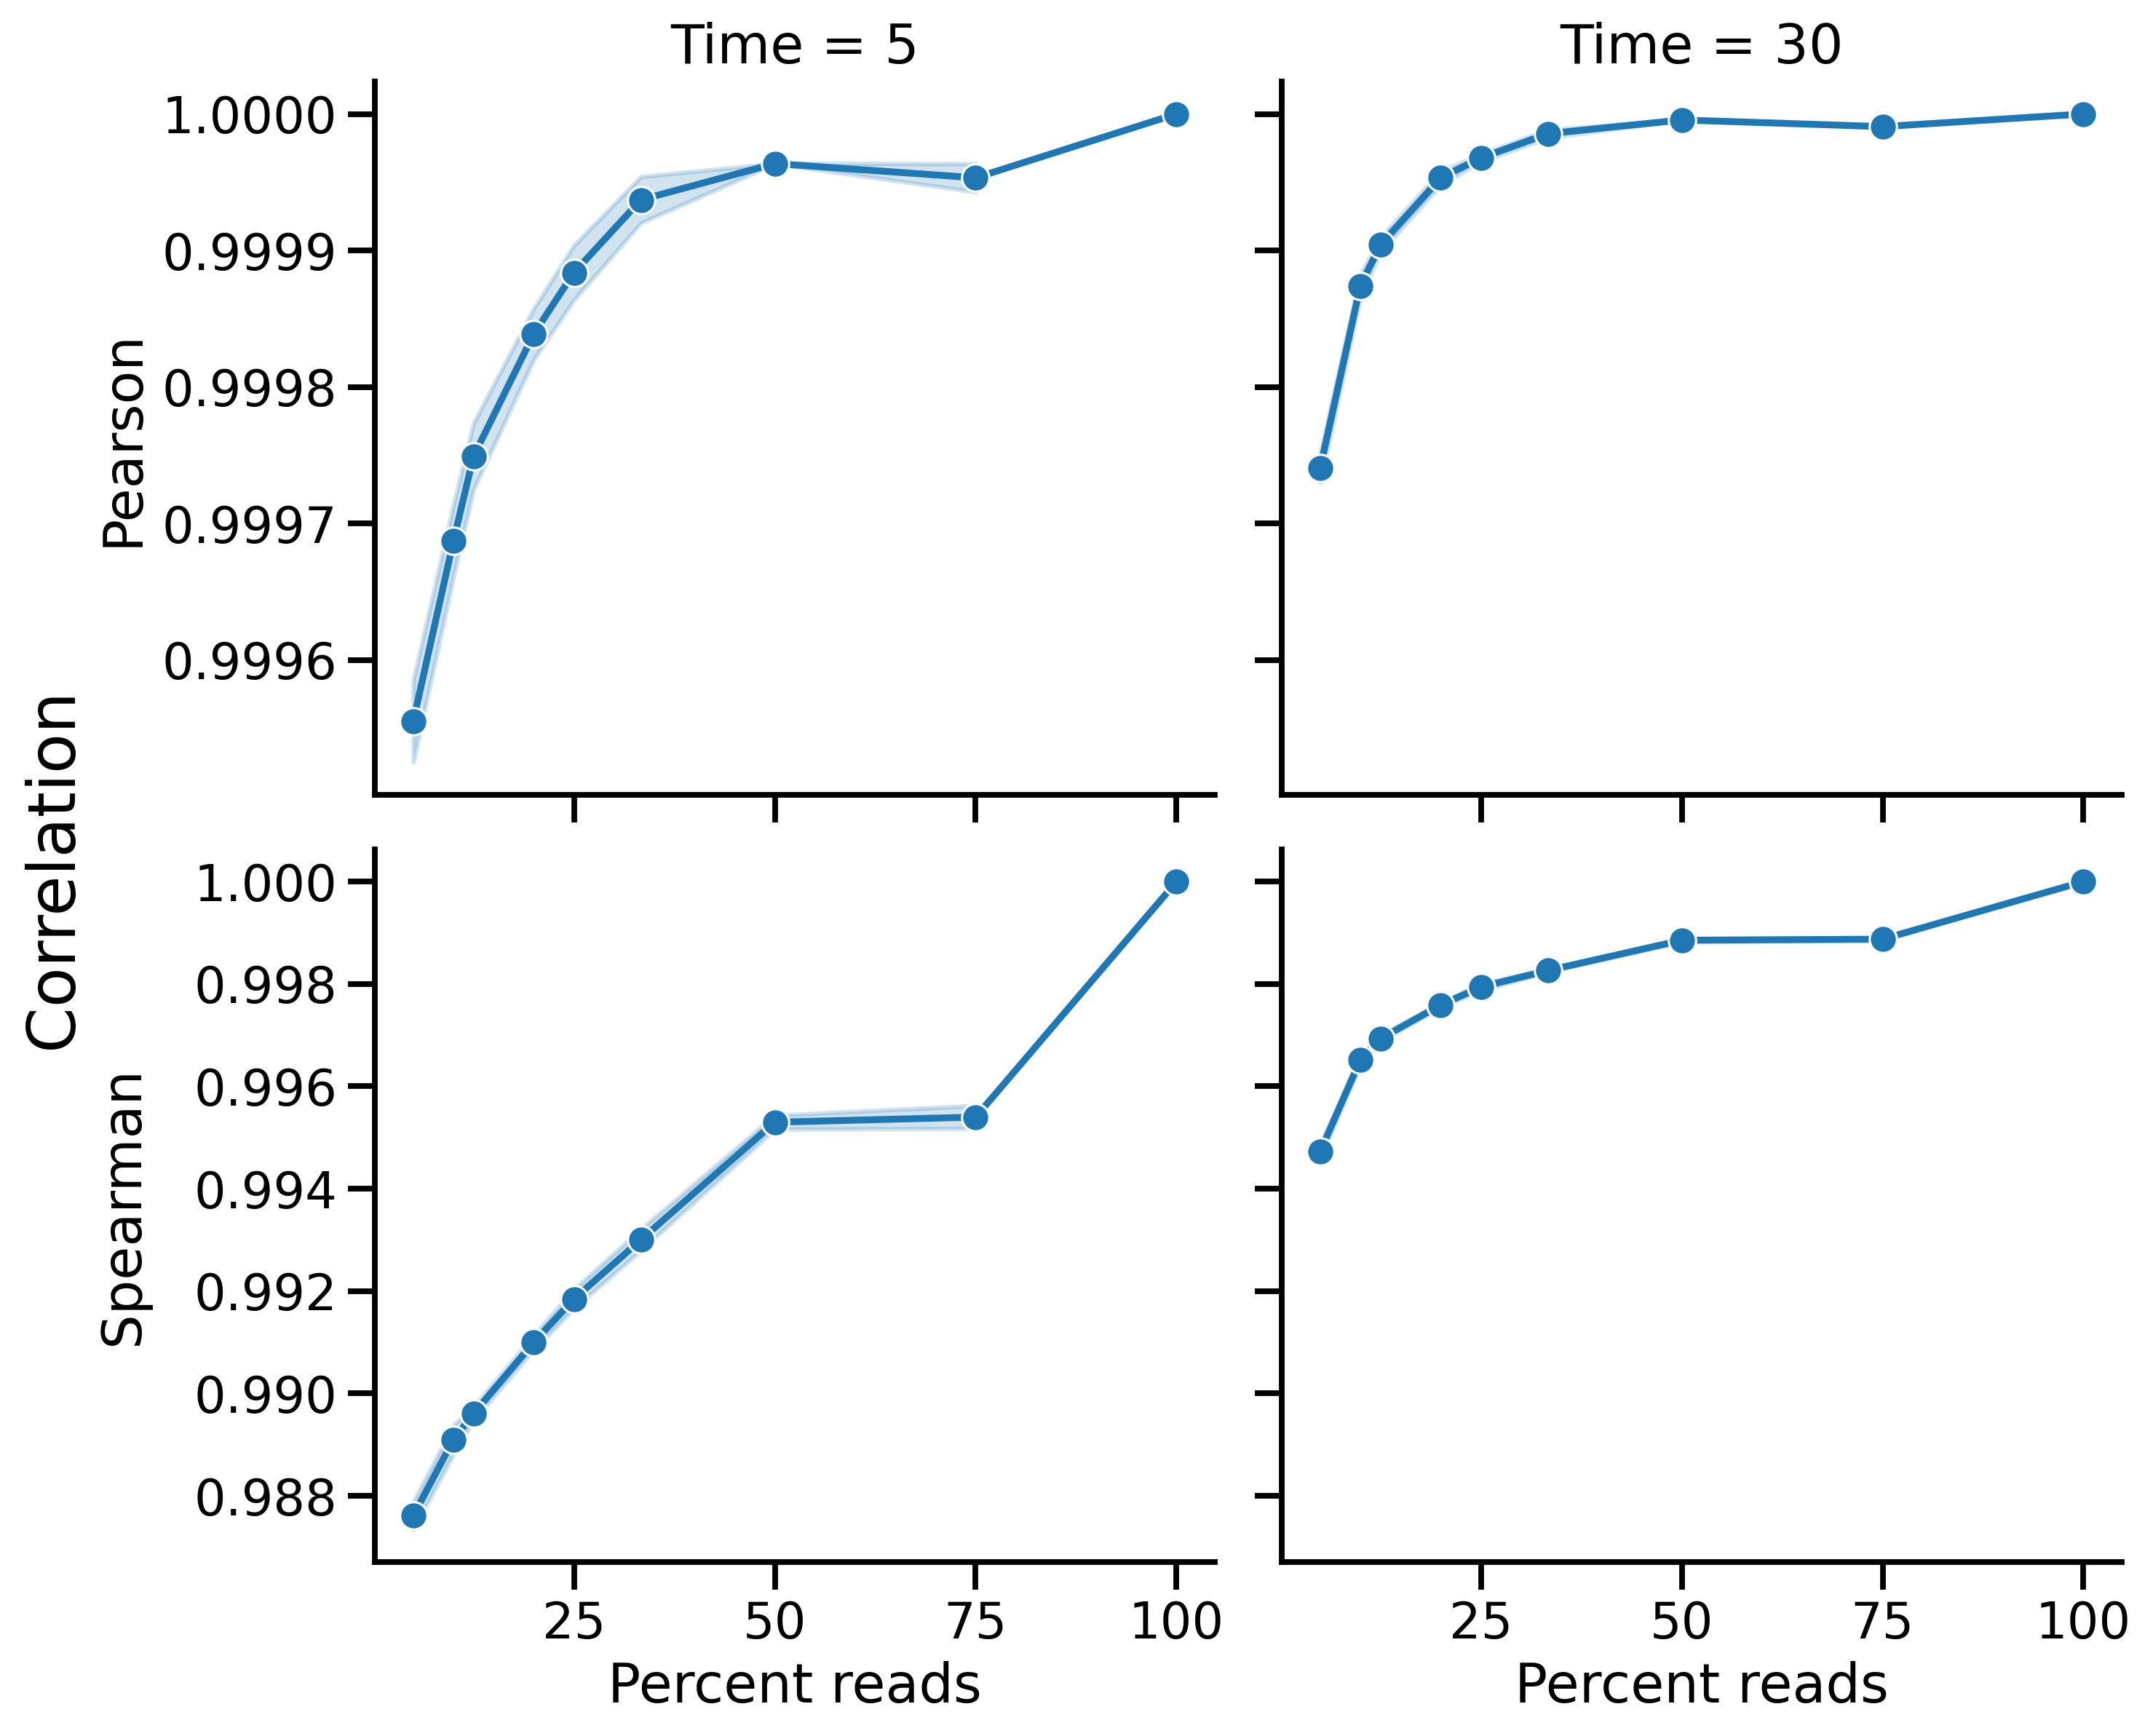

In [202]:
fig, axes = plt.subplots(
    2, 2, figsize=(10,8), dpi=300, sharex=True, sharey='row'
)
sns.set_context("talk")

# ---------- Pearson (row 0) ----------
sns.lineplot(
    data=correlation_df_5,
    x="percent_reads",
    y="pearson_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Time = 5")
axes[0, 0].set_ylabel("Pearson")
axes[0, 0].set_xlabel("")
sns.despine(ax=axes[0, 0])

sns.lineplot(
    data=correlation_df_30,
    x="percent_reads",
    y="pearson_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Time = 30")
axes[0, 1].set_ylabel("")
axes[0, 1].set_xlabel("")
sns.despine(ax=axes[0, 1])

# ---------- Spearman (row 1) ----------
sns.lineplot(
    data=correlation_df_5,
    x="percent_reads",
    y="spearman_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[1, 0]
)
axes[1, 0].set_ylabel("Spearman")
axes[1, 0].set_xlabel("Percent reads")
sns.despine(ax=axes[1, 0])

sns.lineplot(
    data=correlation_df_30,
    x="percent_reads",
    y="spearman_corr",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[1, 1]
)
axes[1, 1].set_ylabel("")
axes[1, 1].set_xlabel("Percent reads")
sns.despine(ax=axes[1, 1])
fig.align_ylabels(axes)
fig.supylabel("Correlation")
plt.tight_layout(pad = 0.5)
plt.show()

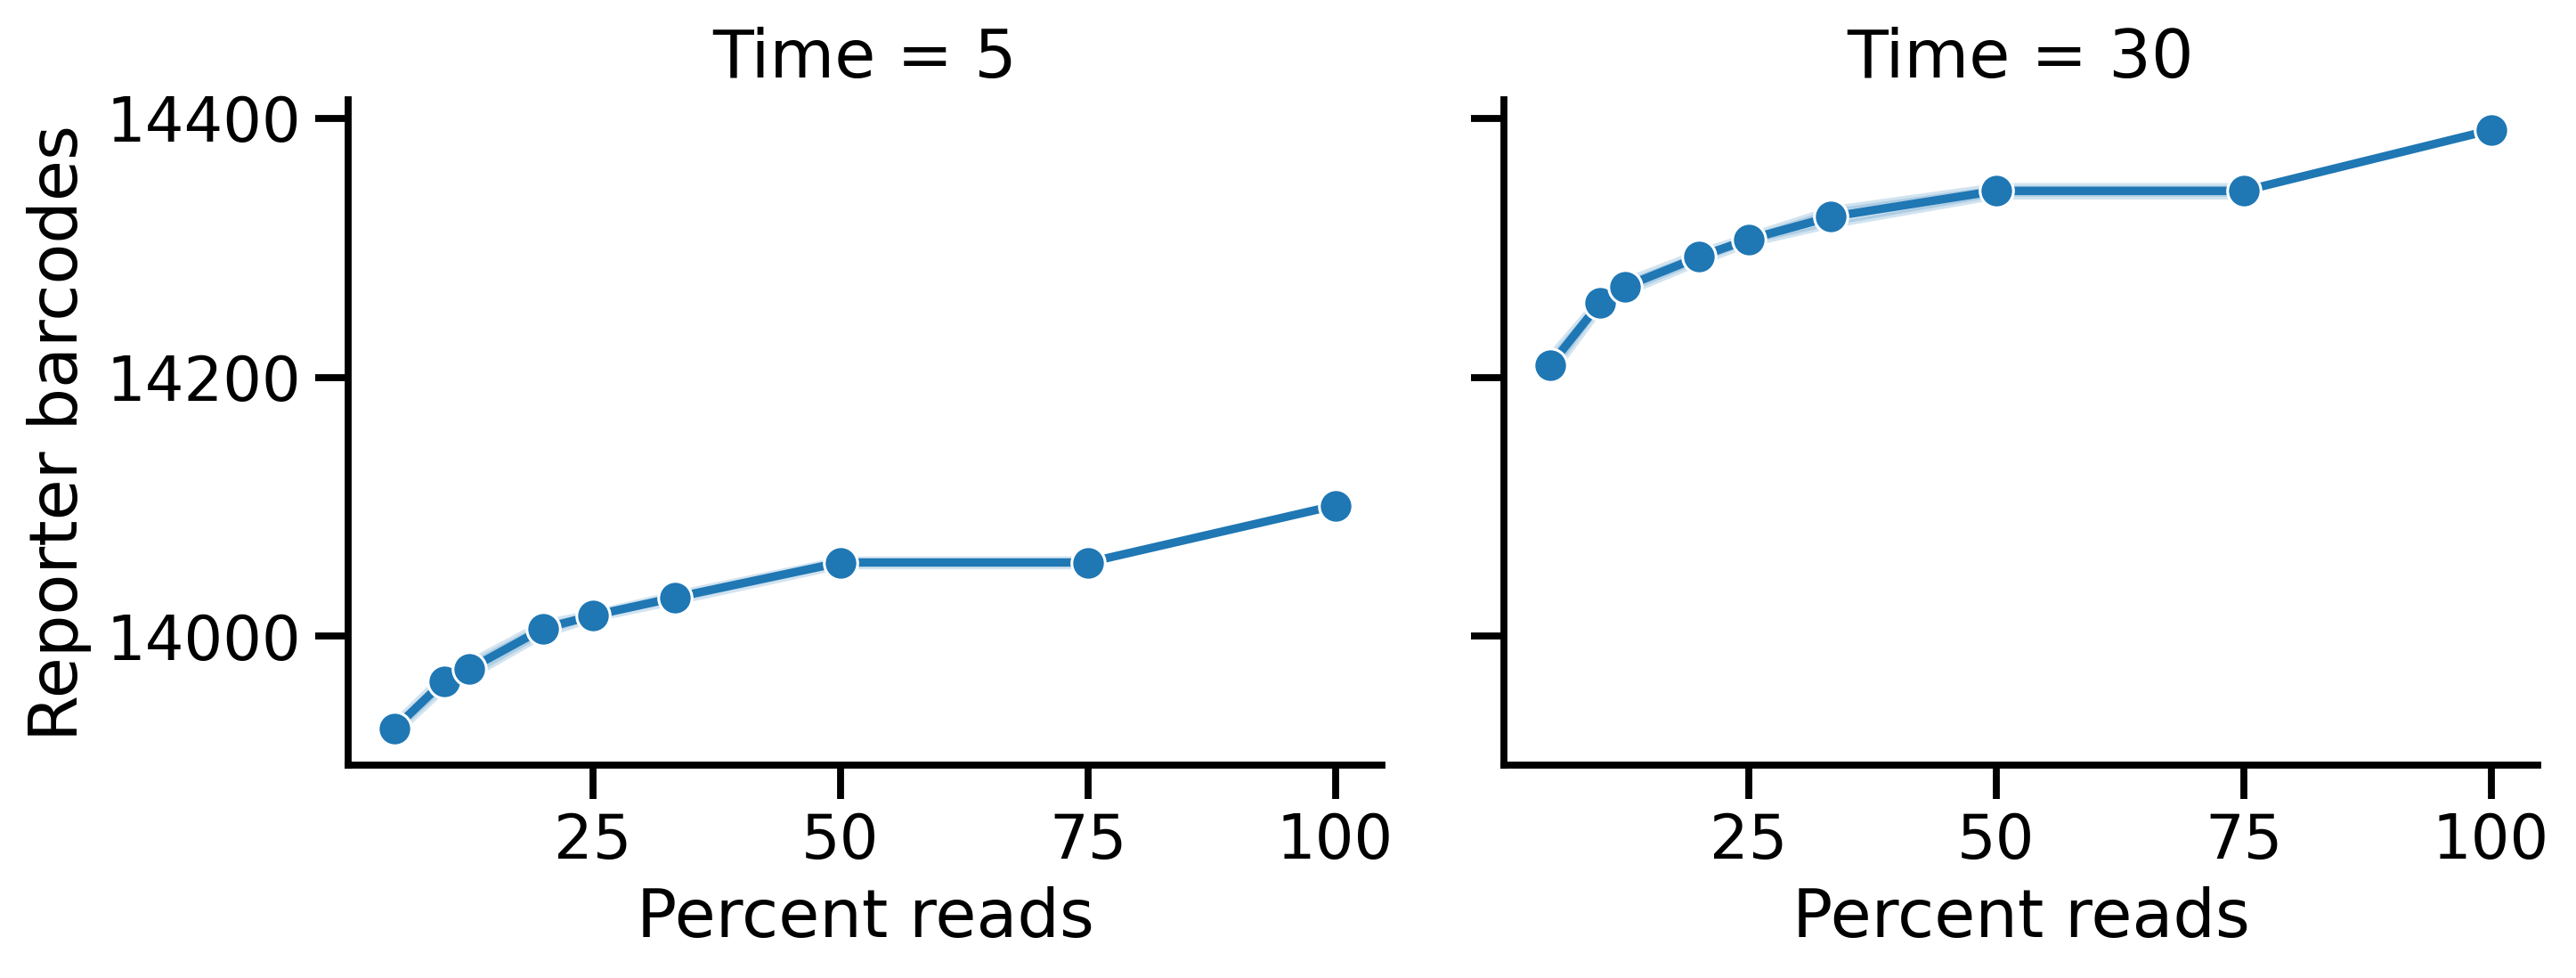

In [205]:

# Create subplots
fig, axes = plt.subplots(
    1, 2,
    figsize=(10,4),
    dpi=300,
    sharey=True
)
sns.set_context("talk")

# ---------- Time = 5 ----------
sns.lineplot(
    data=correlation_df_5,
    x="percent_reads",
    y="num_rows",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[0]
)
axes[0].set_title("Time = 5")
axes[0].set_ylabel("Reporter barcodes")
axes[0].set_xlabel("Percent reads")
sns.despine(ax=axes[0])

# ---------- Time = 30 ----------
sns.lineplot(
    data=correlation_df_30,
    x="percent_reads",
    y="num_rows",
    estimator="median",
    errorbar=("sd"),
    marker="o",
    ax=axes[1]
)
axes[1].set_title("Time = 30")
axes[1].set_ylabel("")
axes[1].set_xlabel("Percent reads")
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

# Reads per UMI for each downsample?

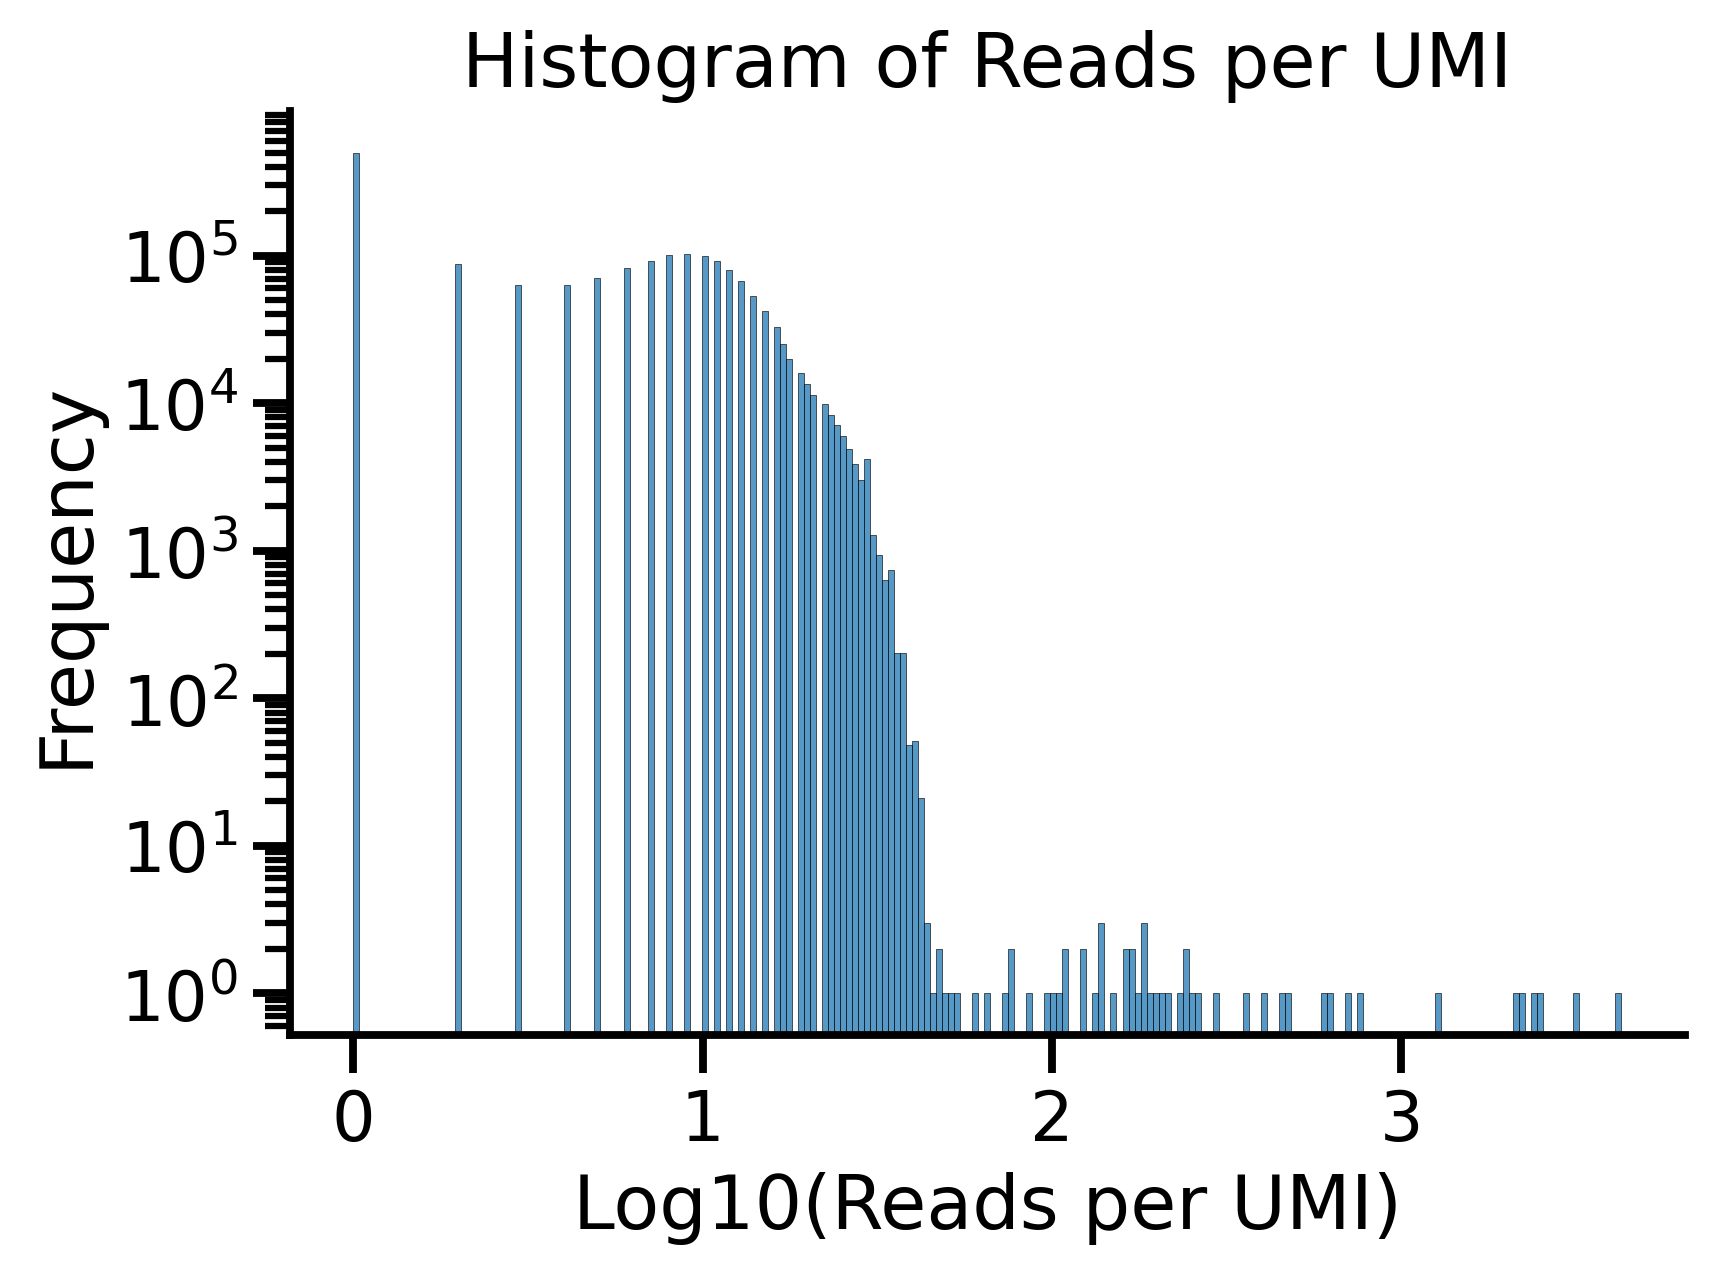

In [16]:
# Read the reads_per_umi file
reads_per_umi_df = pd.read_csv("/Volumes/Expansion/GCN4_TREBL/downsampling/trebl_experiment_yeast_pool_C_umi_RPTR_1_5_S2_R1_001_20_chunks_part_1/RPTR_1_5_S2_R1_001_20_chunks_part_1.fq_reads_per_umi.tsv", sep="\t")

import numpy as np

# Plot the histogram
plt.figure(figsize=(6, 4), dpi=300)
sns.set_context('talk')
ax = sns.histplot(np.log10(reads_per_umi_df['reads']))
ax.set_yscale('log')
plt.title("Histogram of Reads per UMI")
plt.xlabel("Log10(Reads per UMI)")
plt.ylabel("Frequency")
sns.despine()

# Save the histogram in the folder
plt.show()

  0%|          | 0/113 [00:00<?, ?it/s]

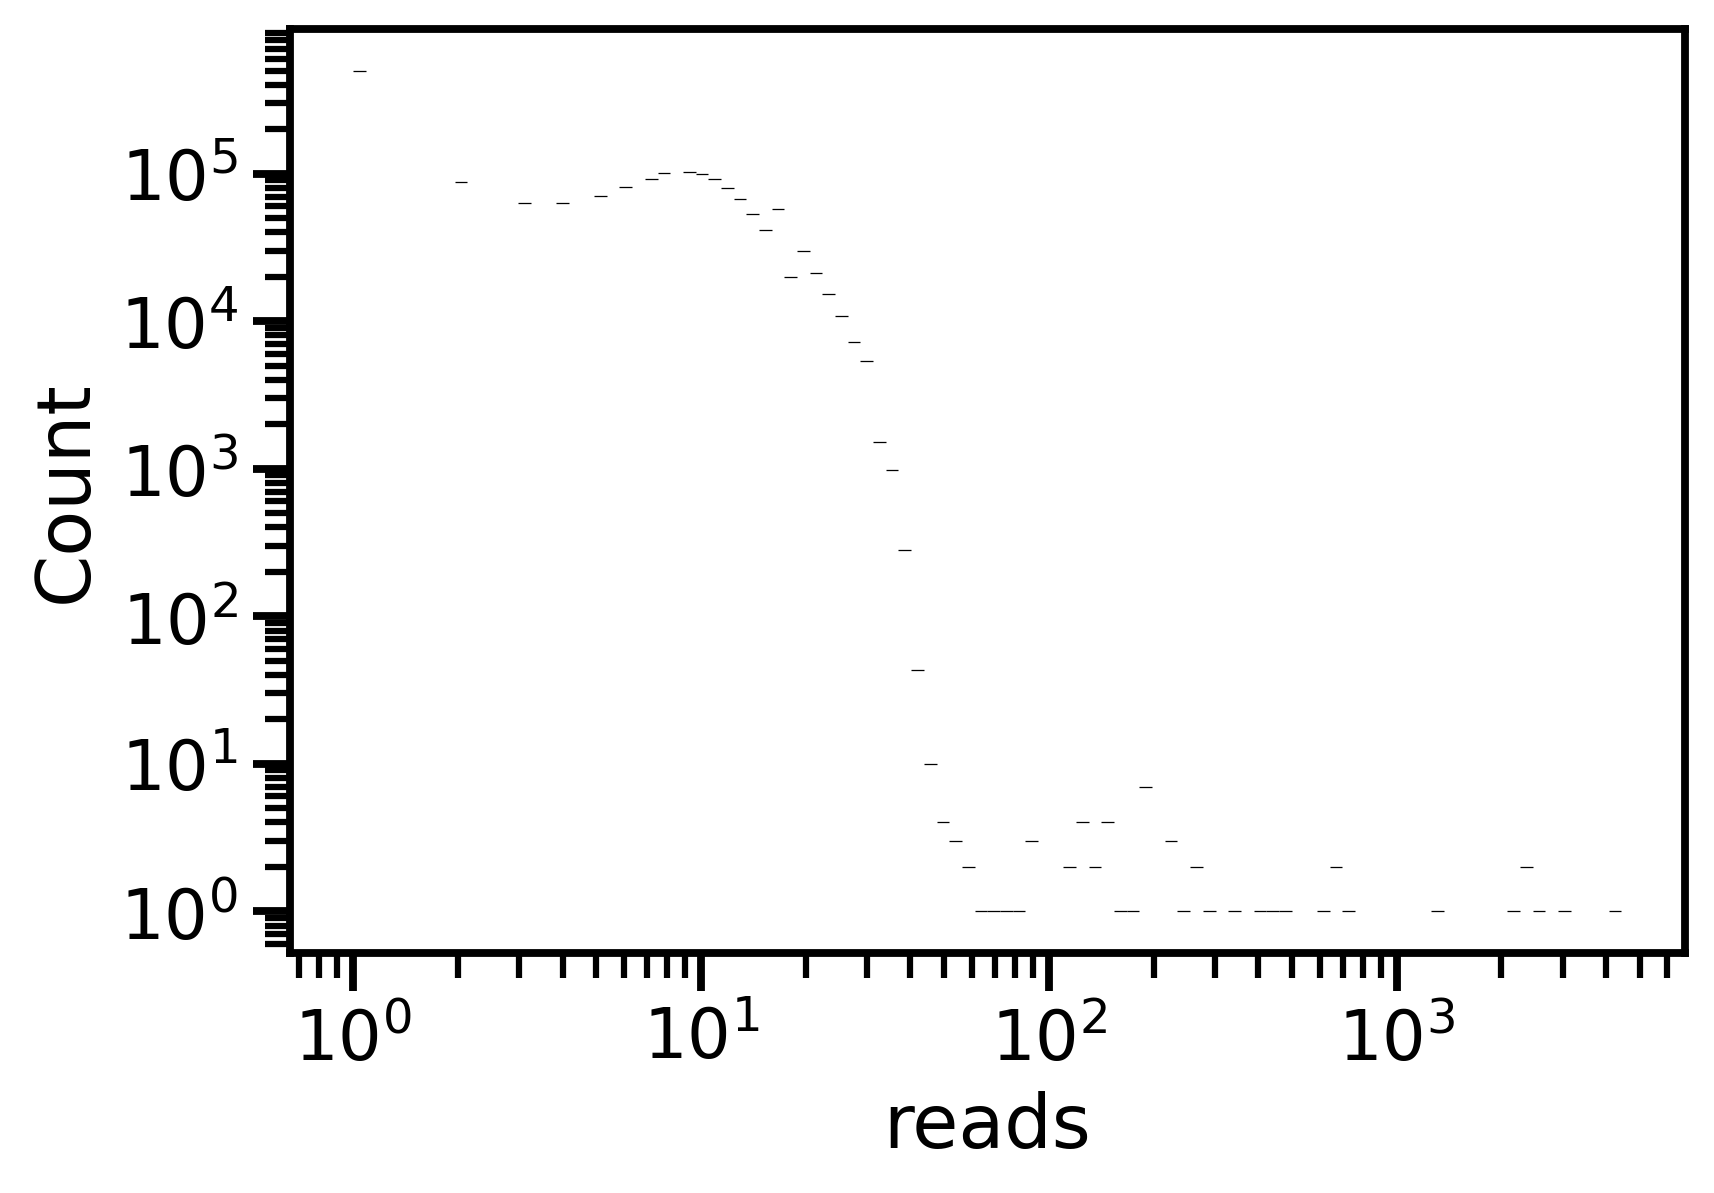

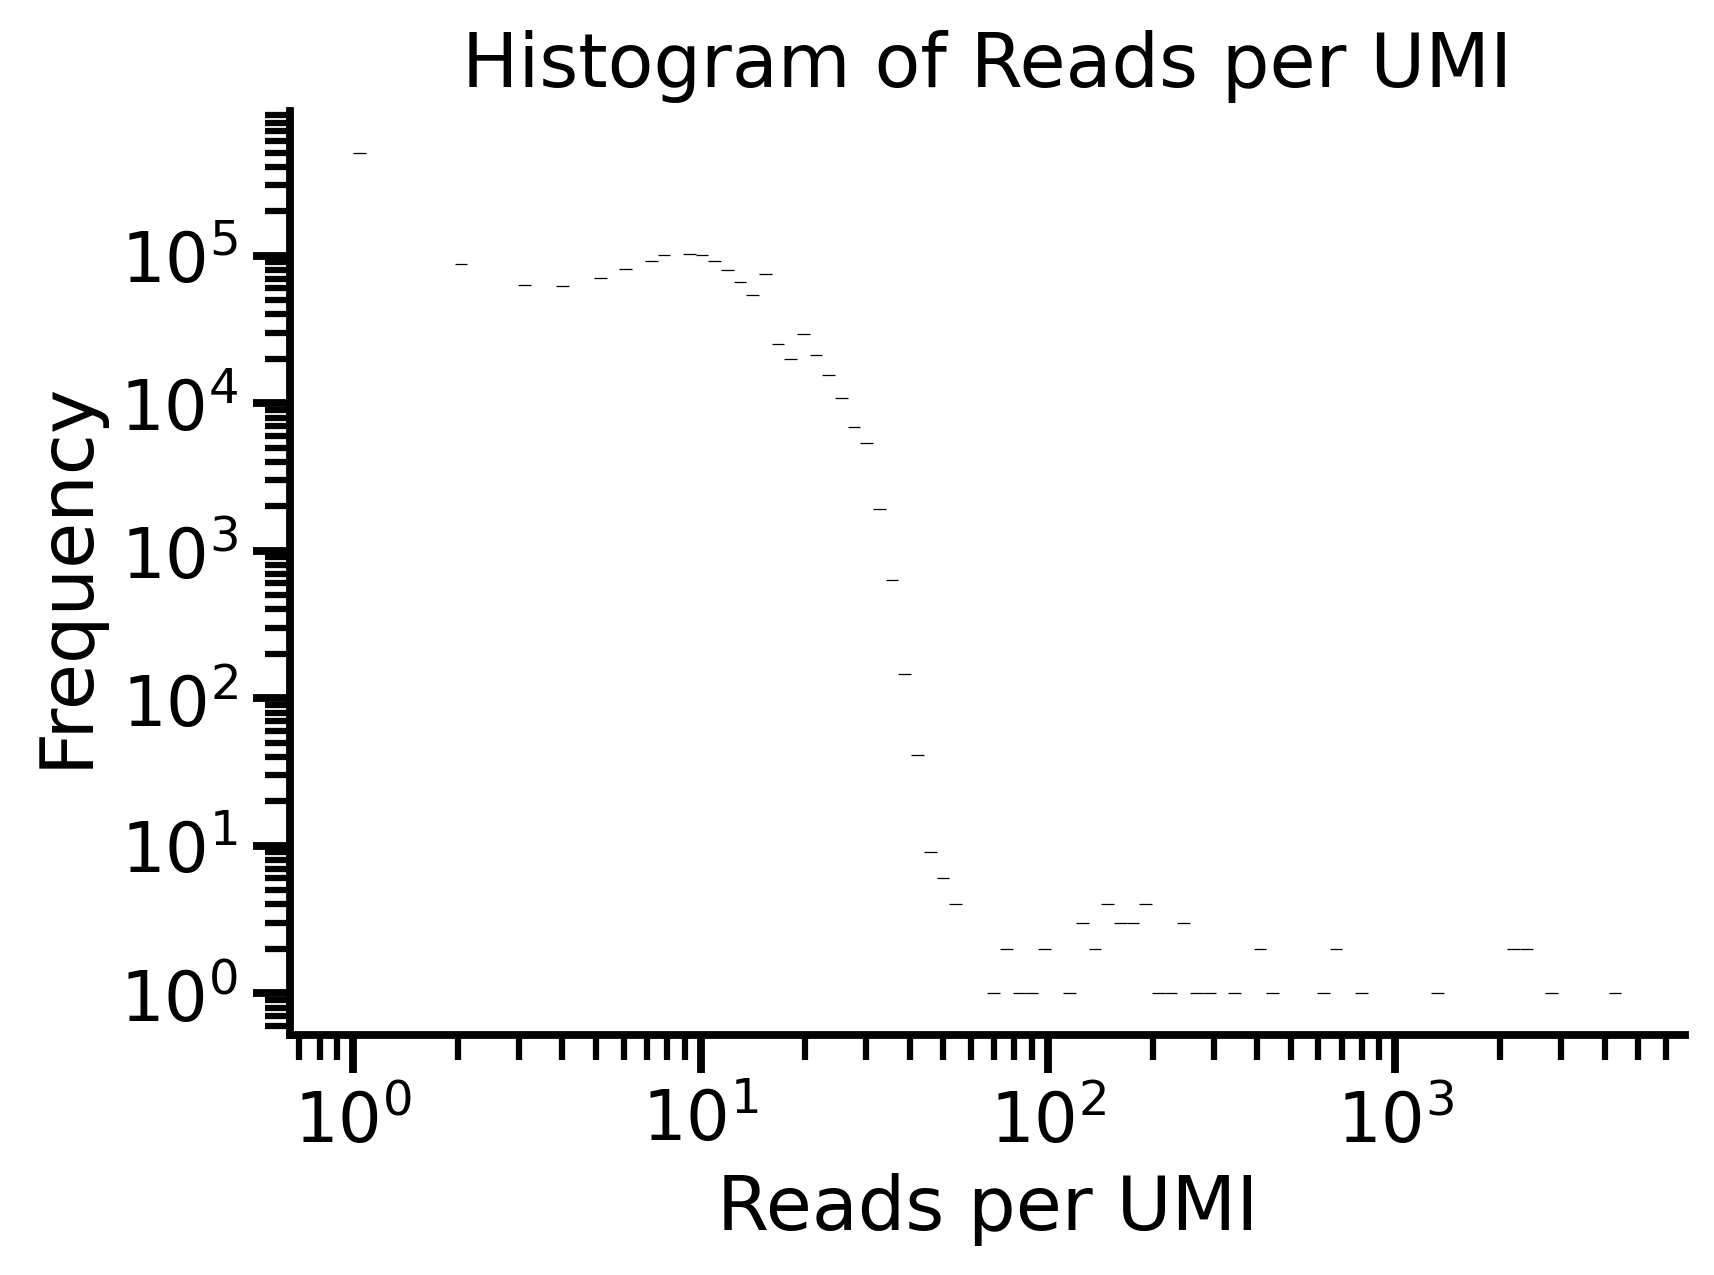

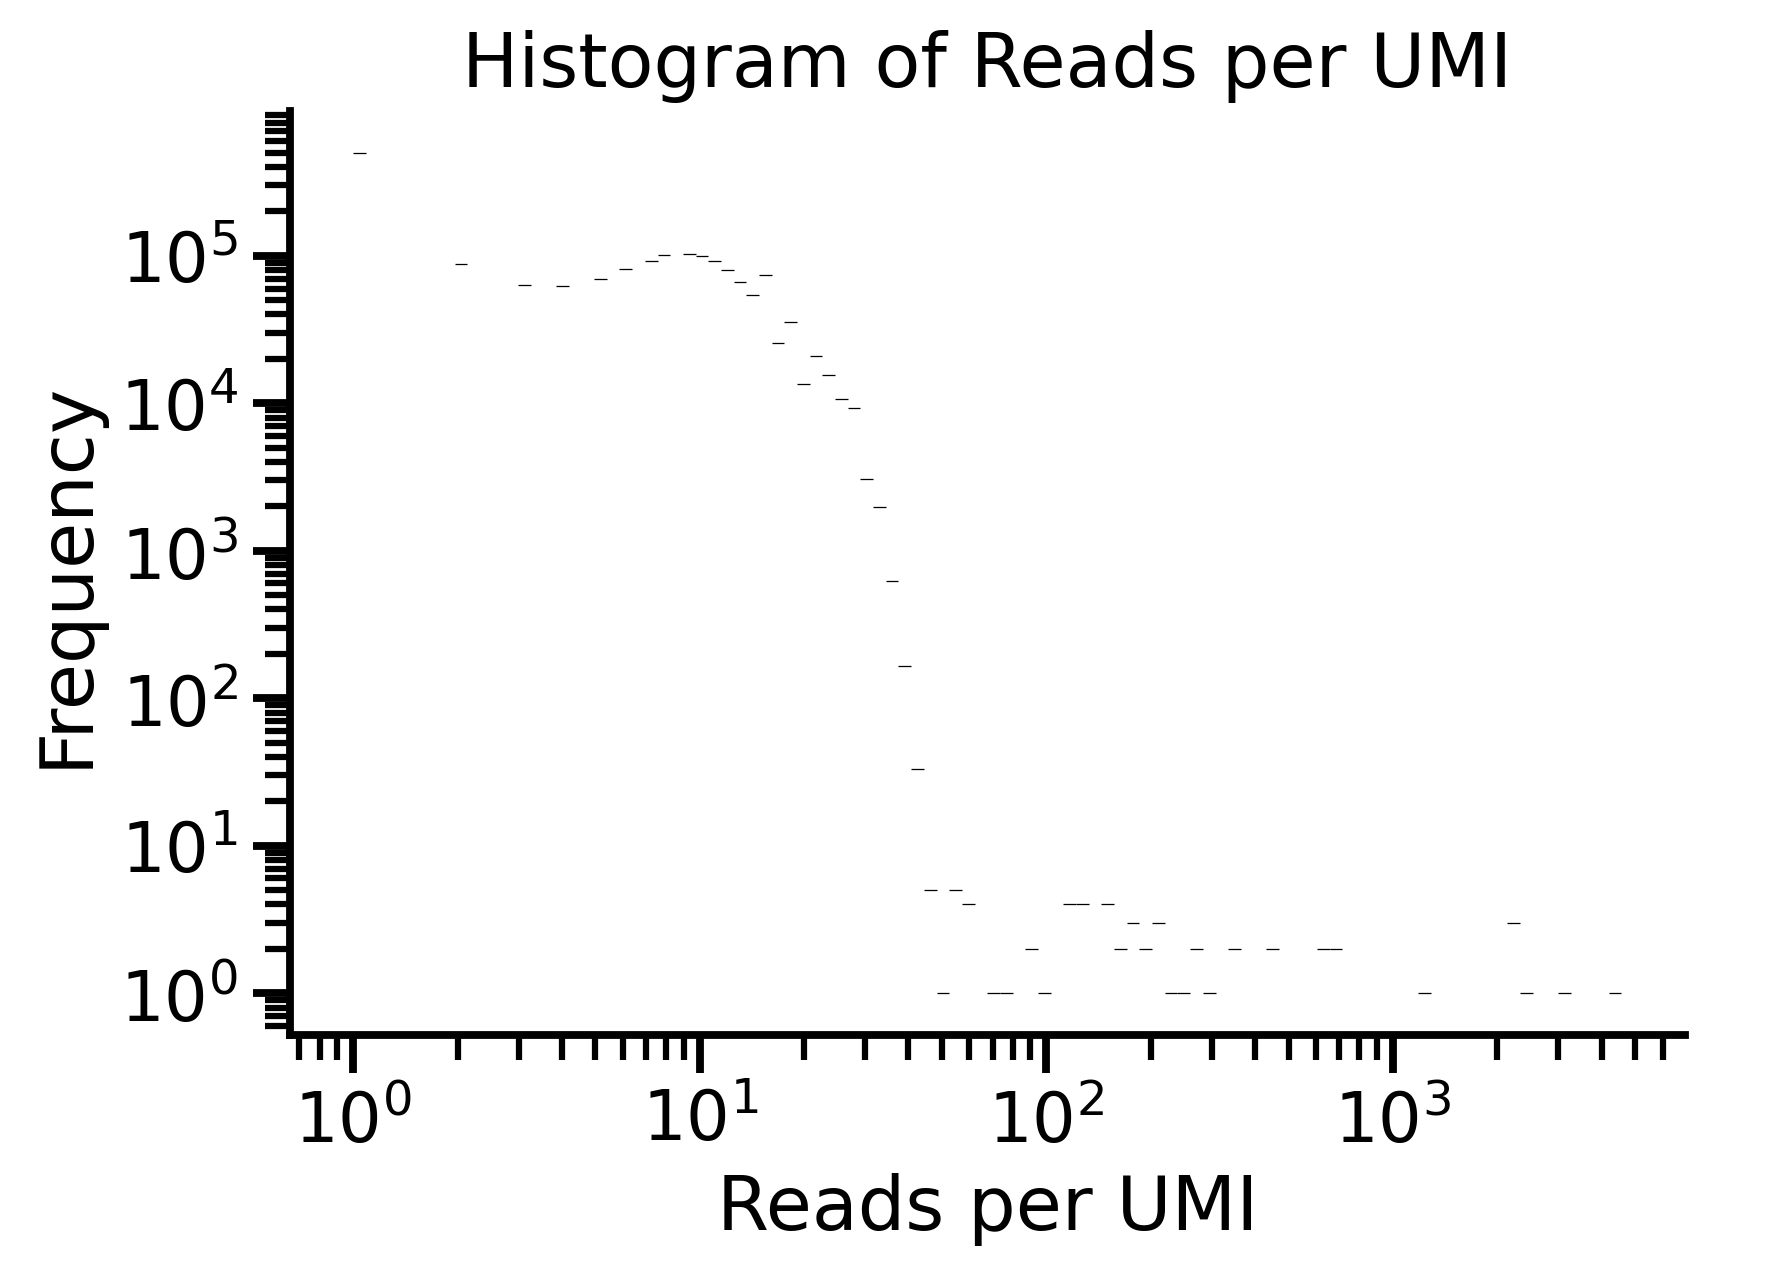

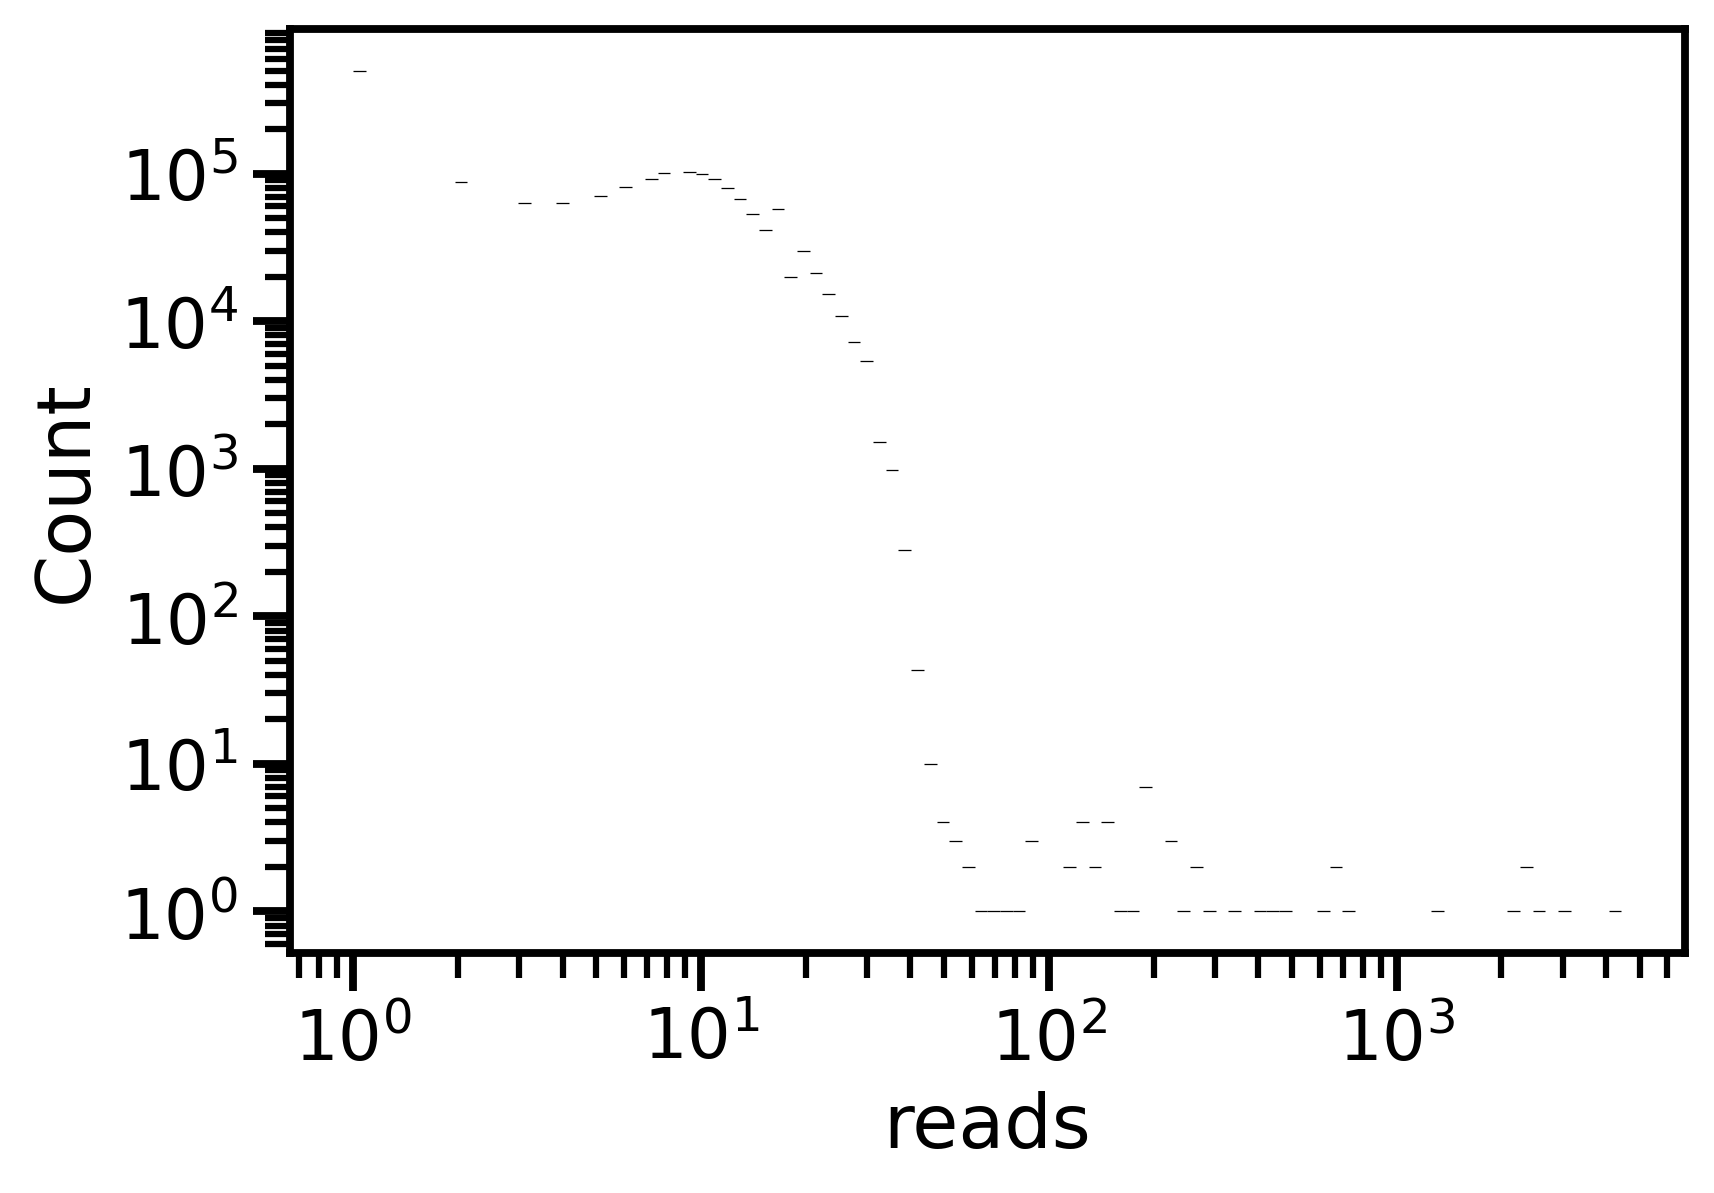

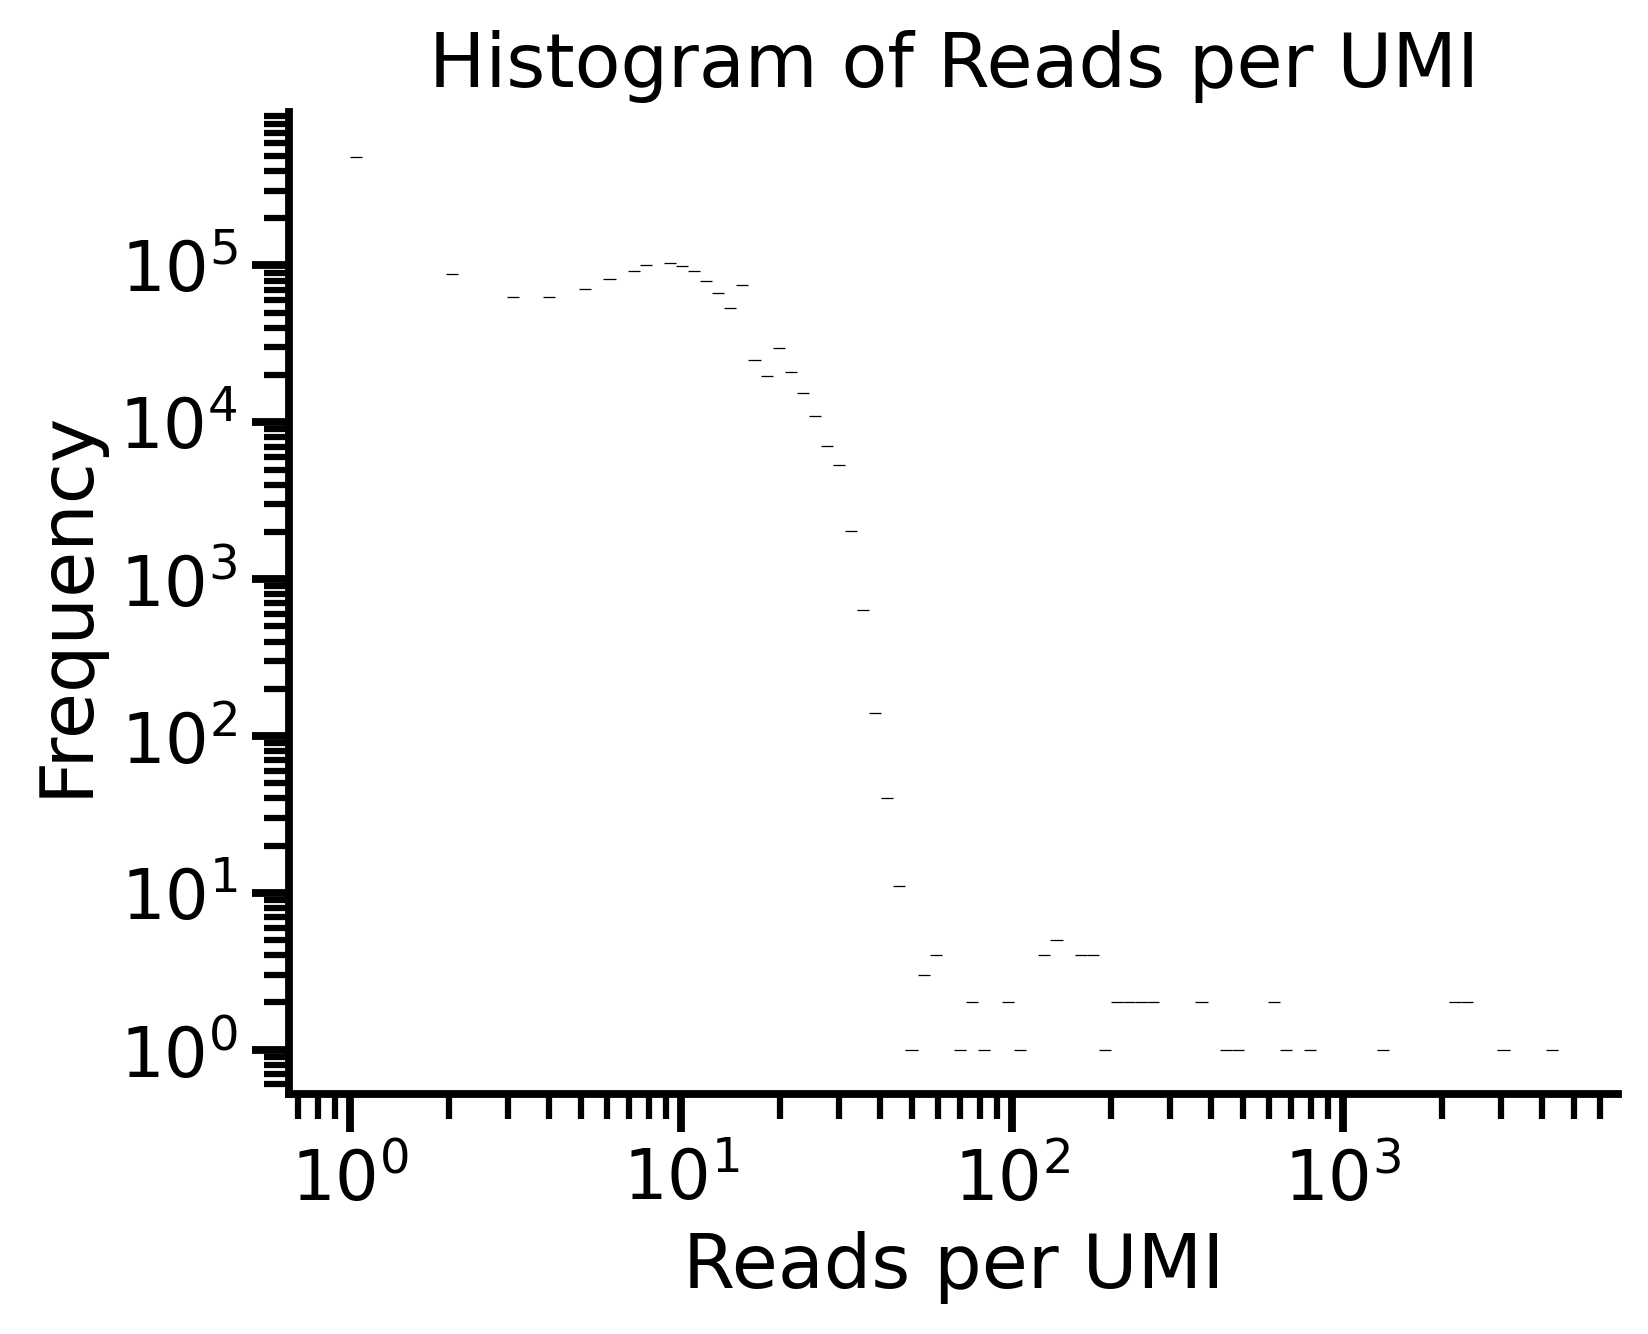

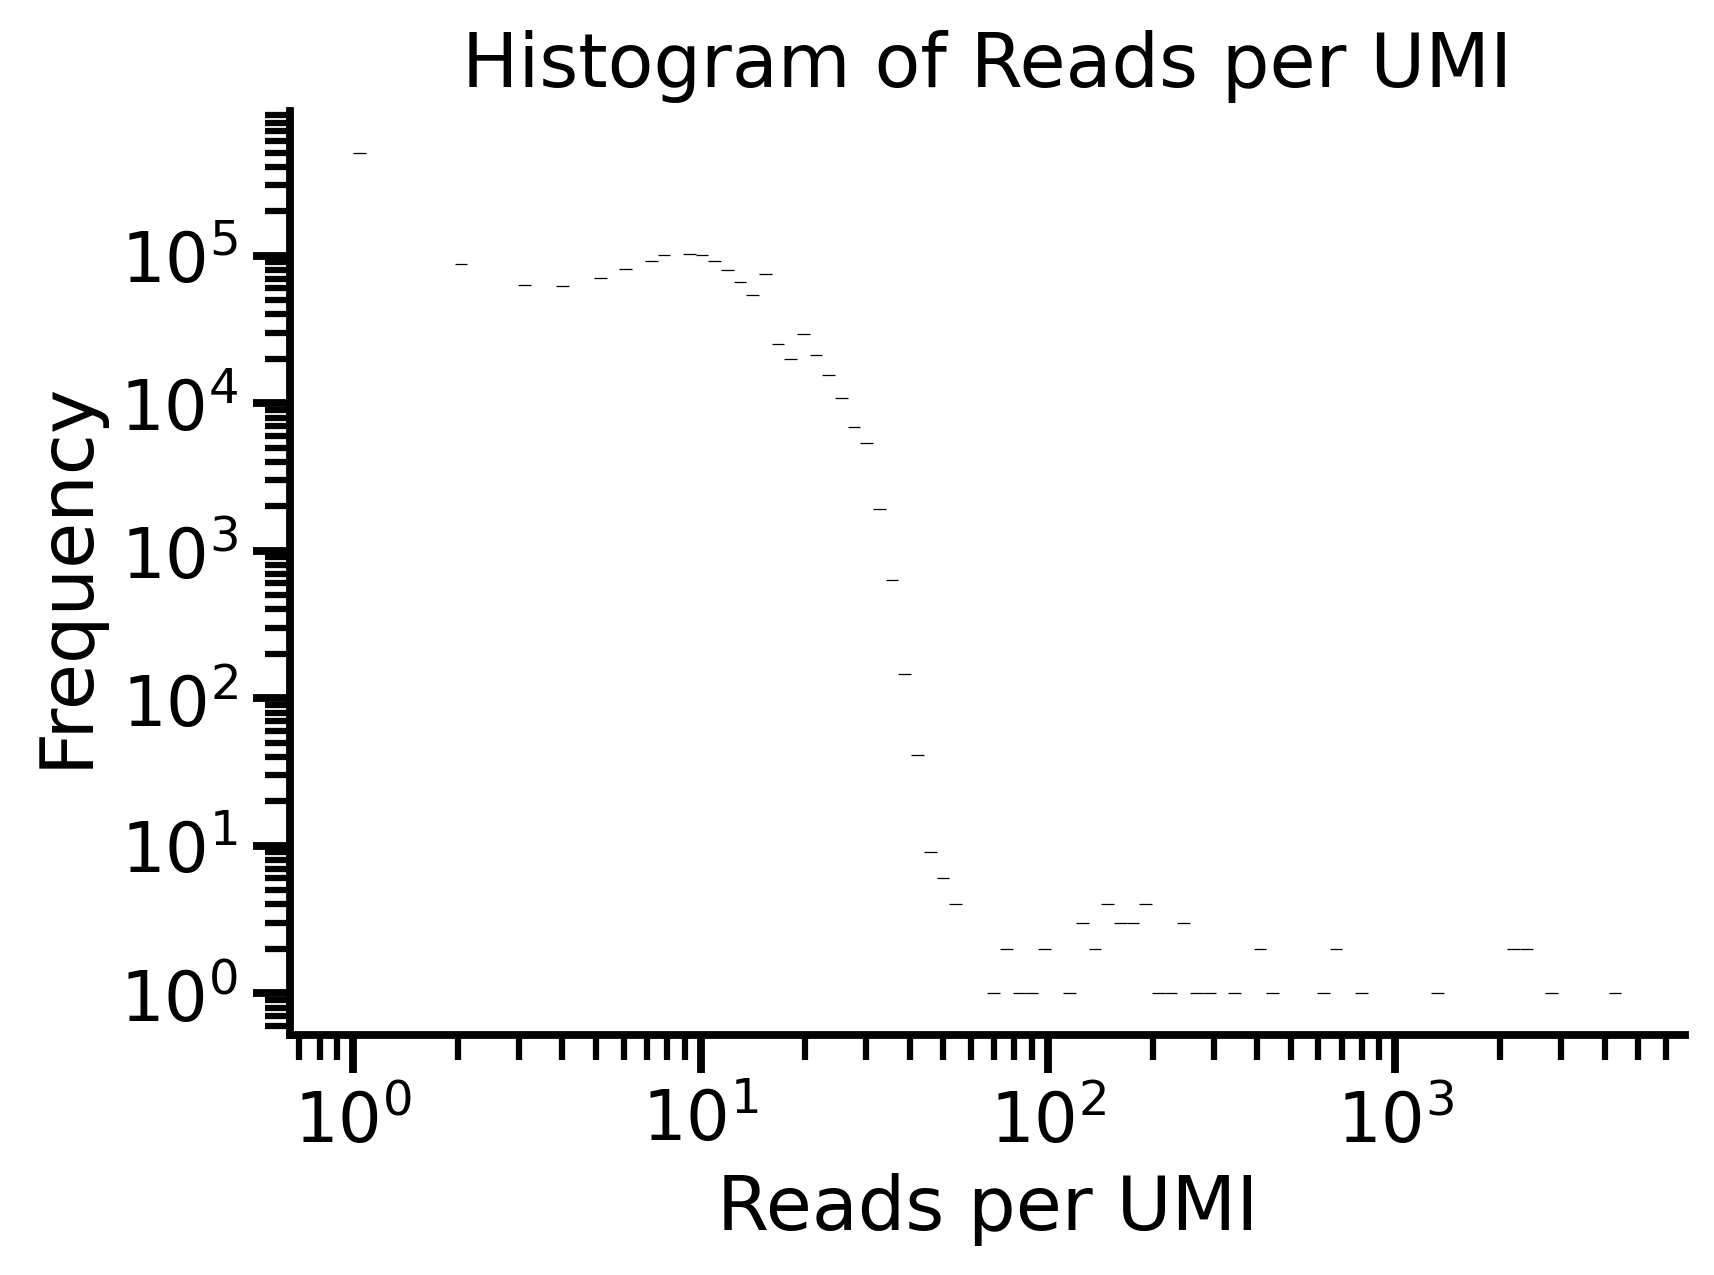

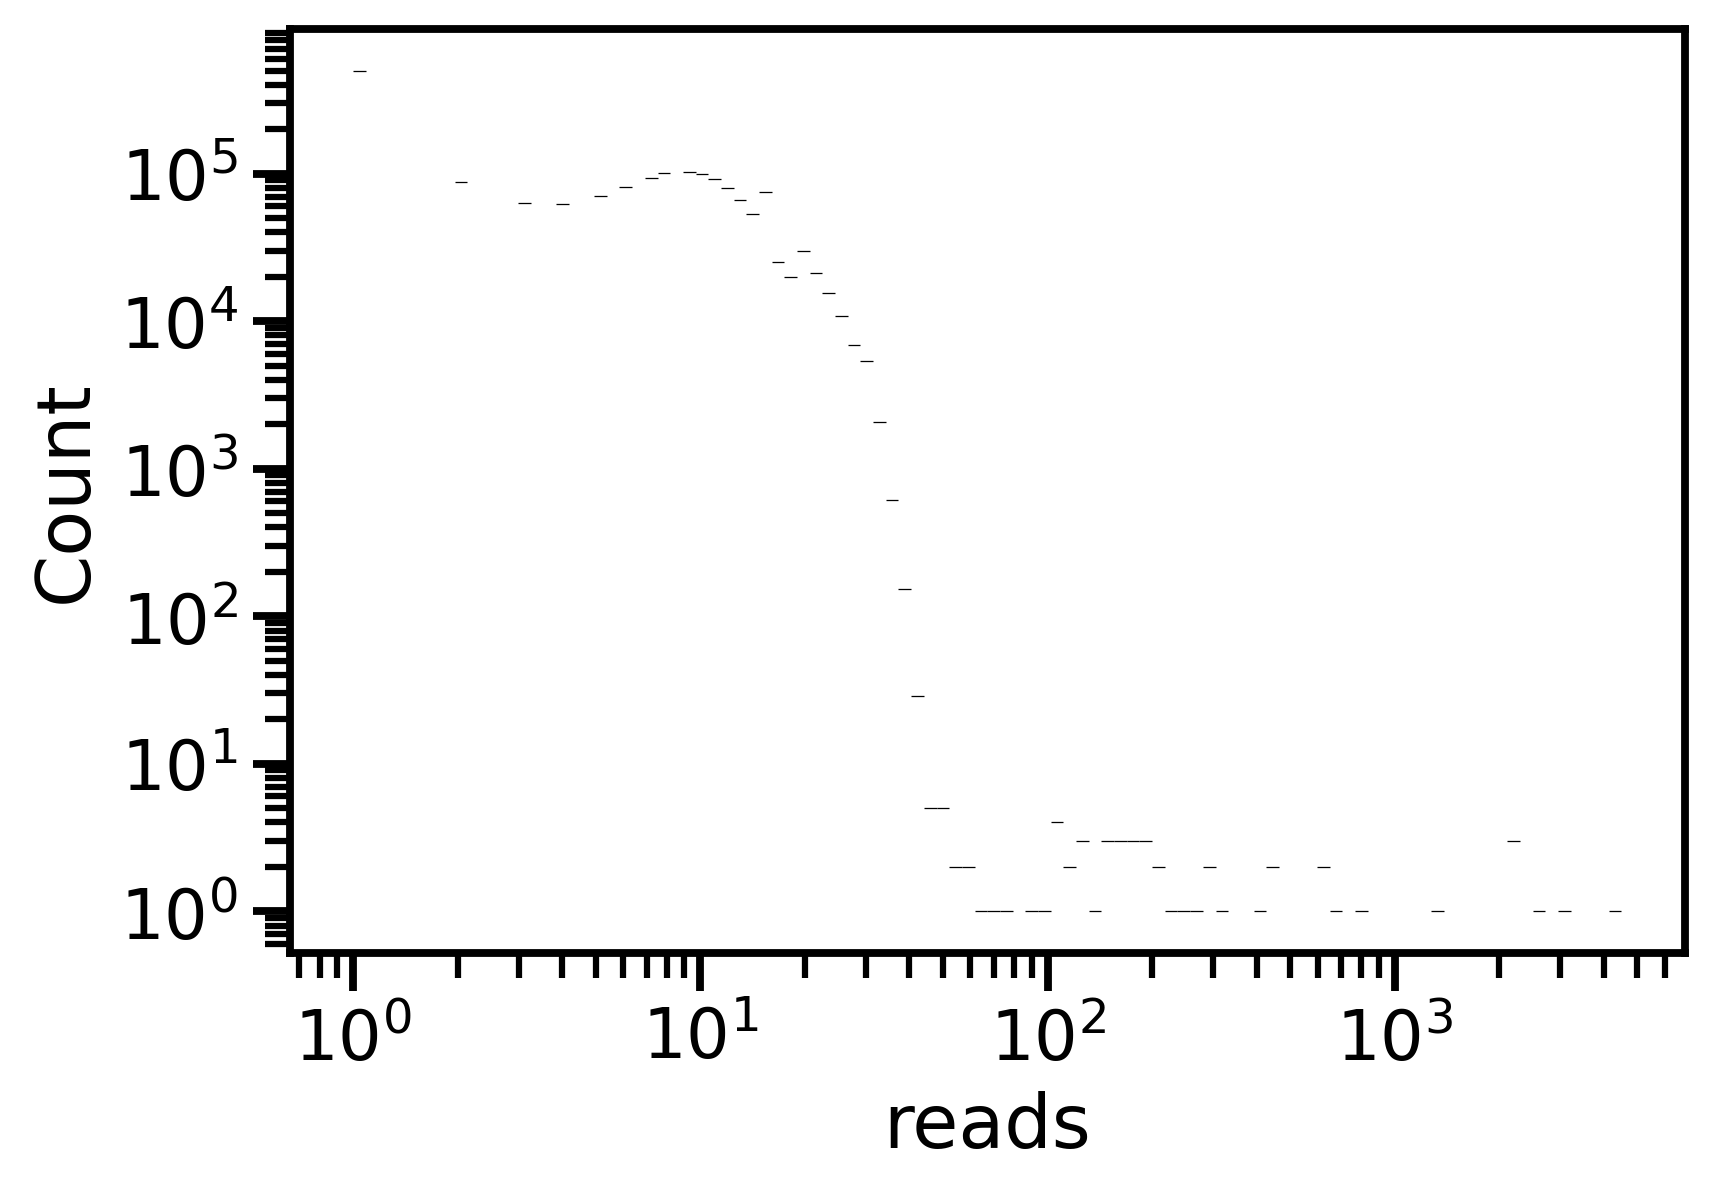

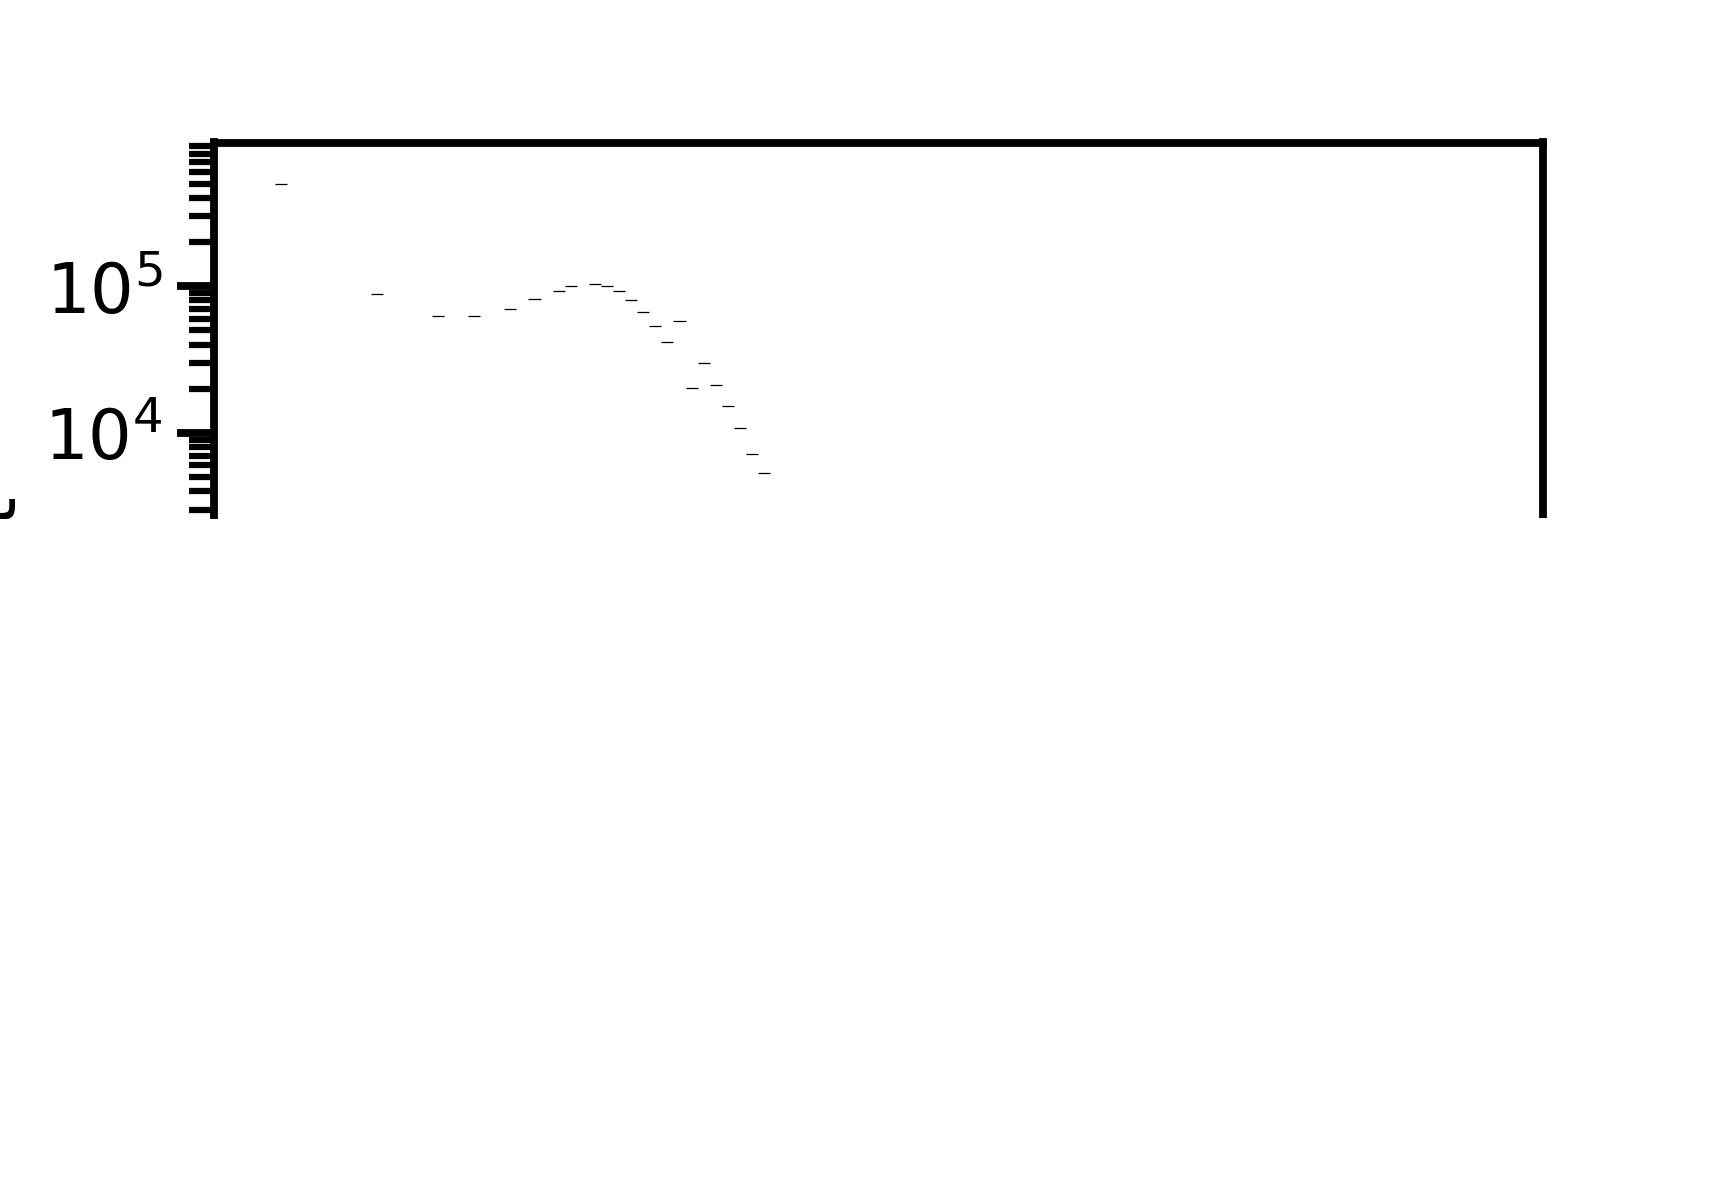

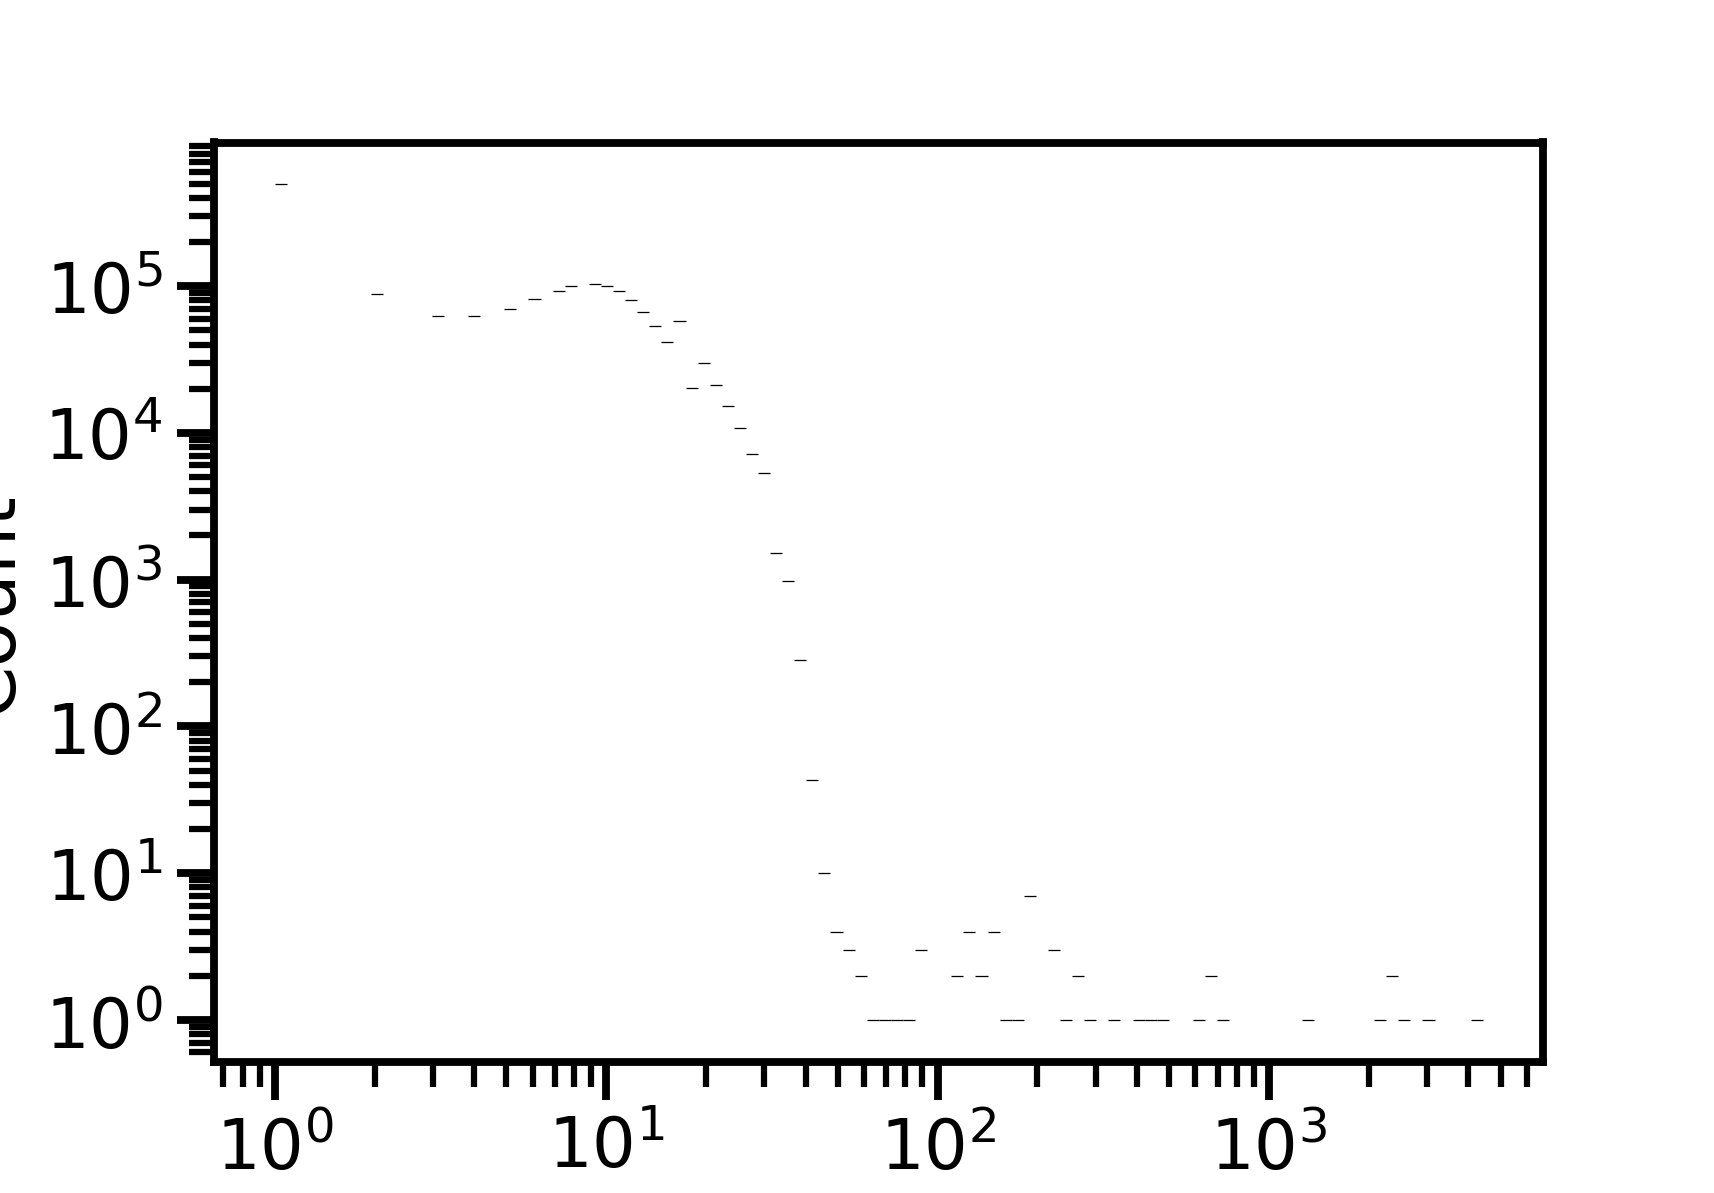

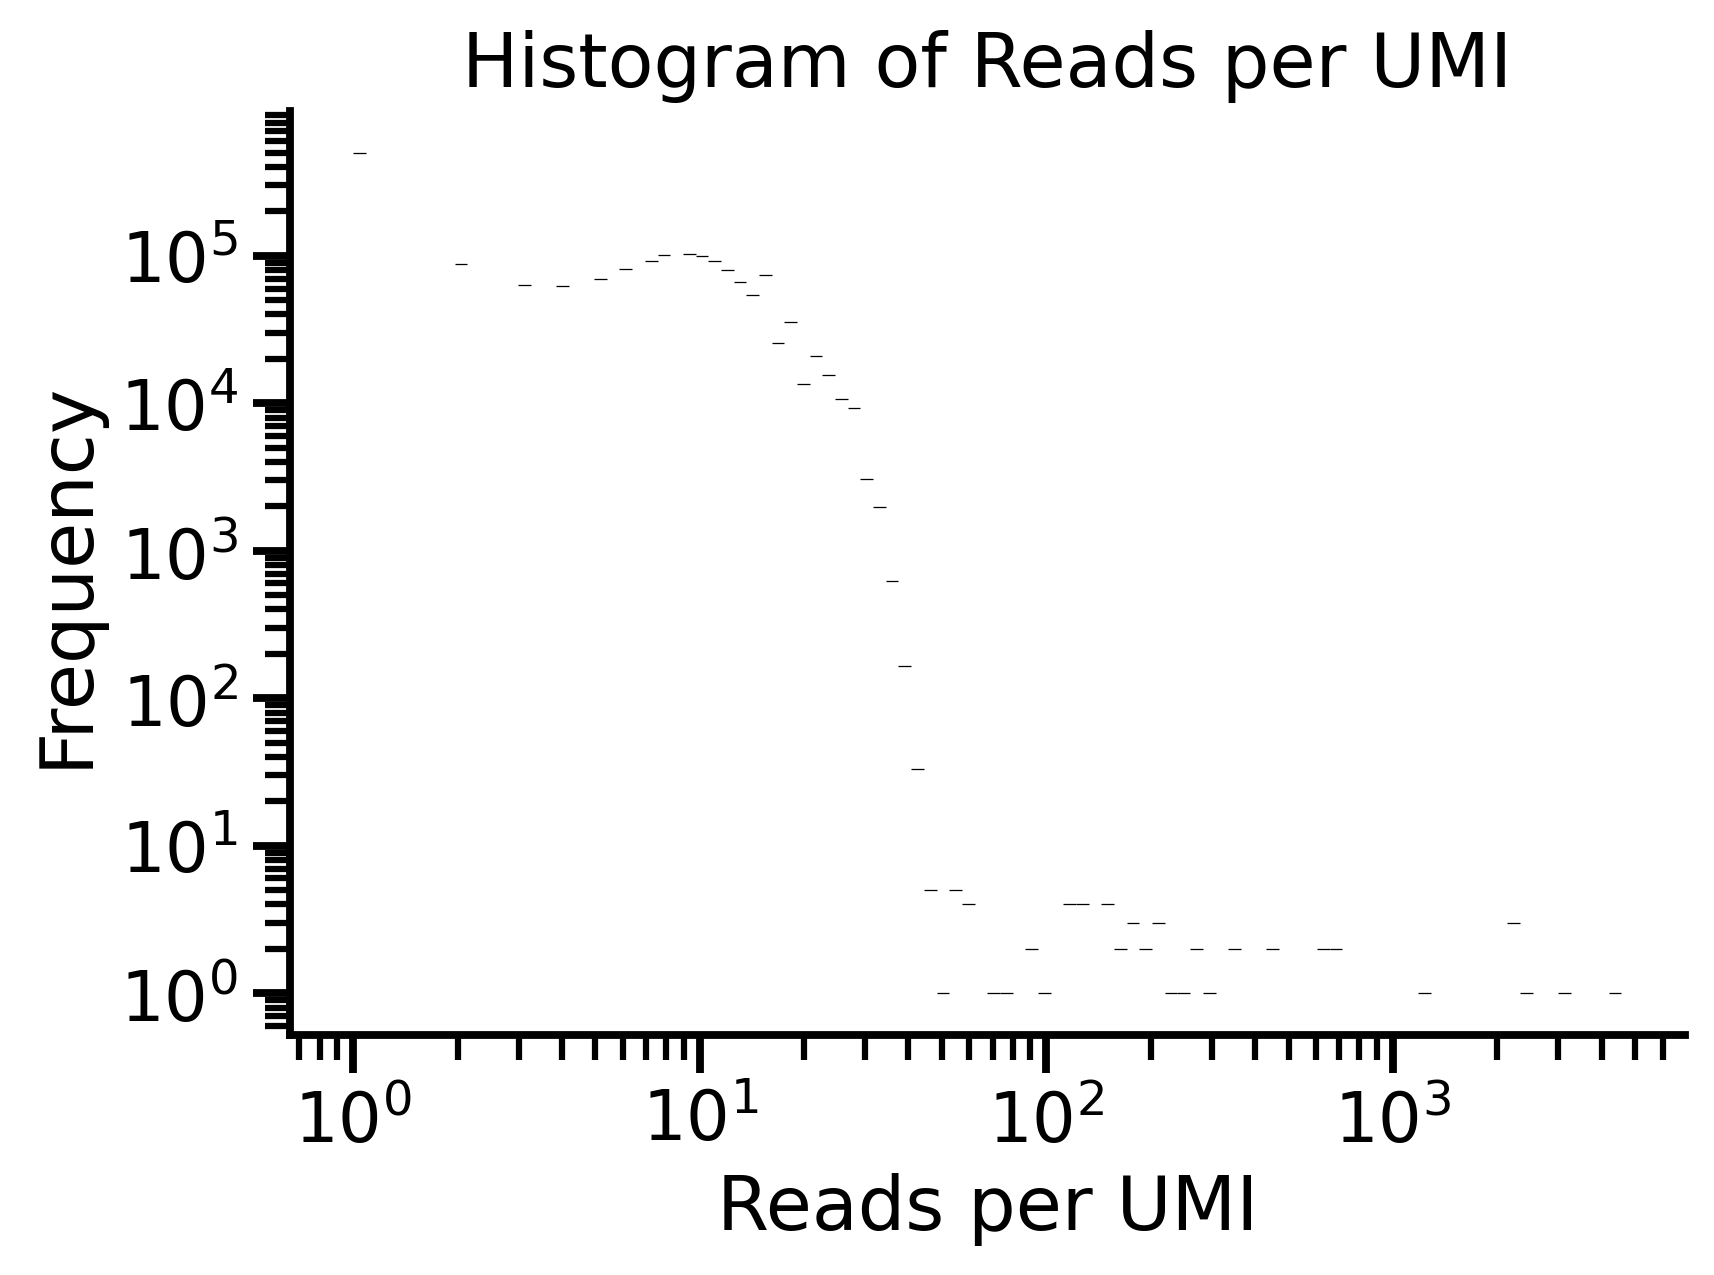

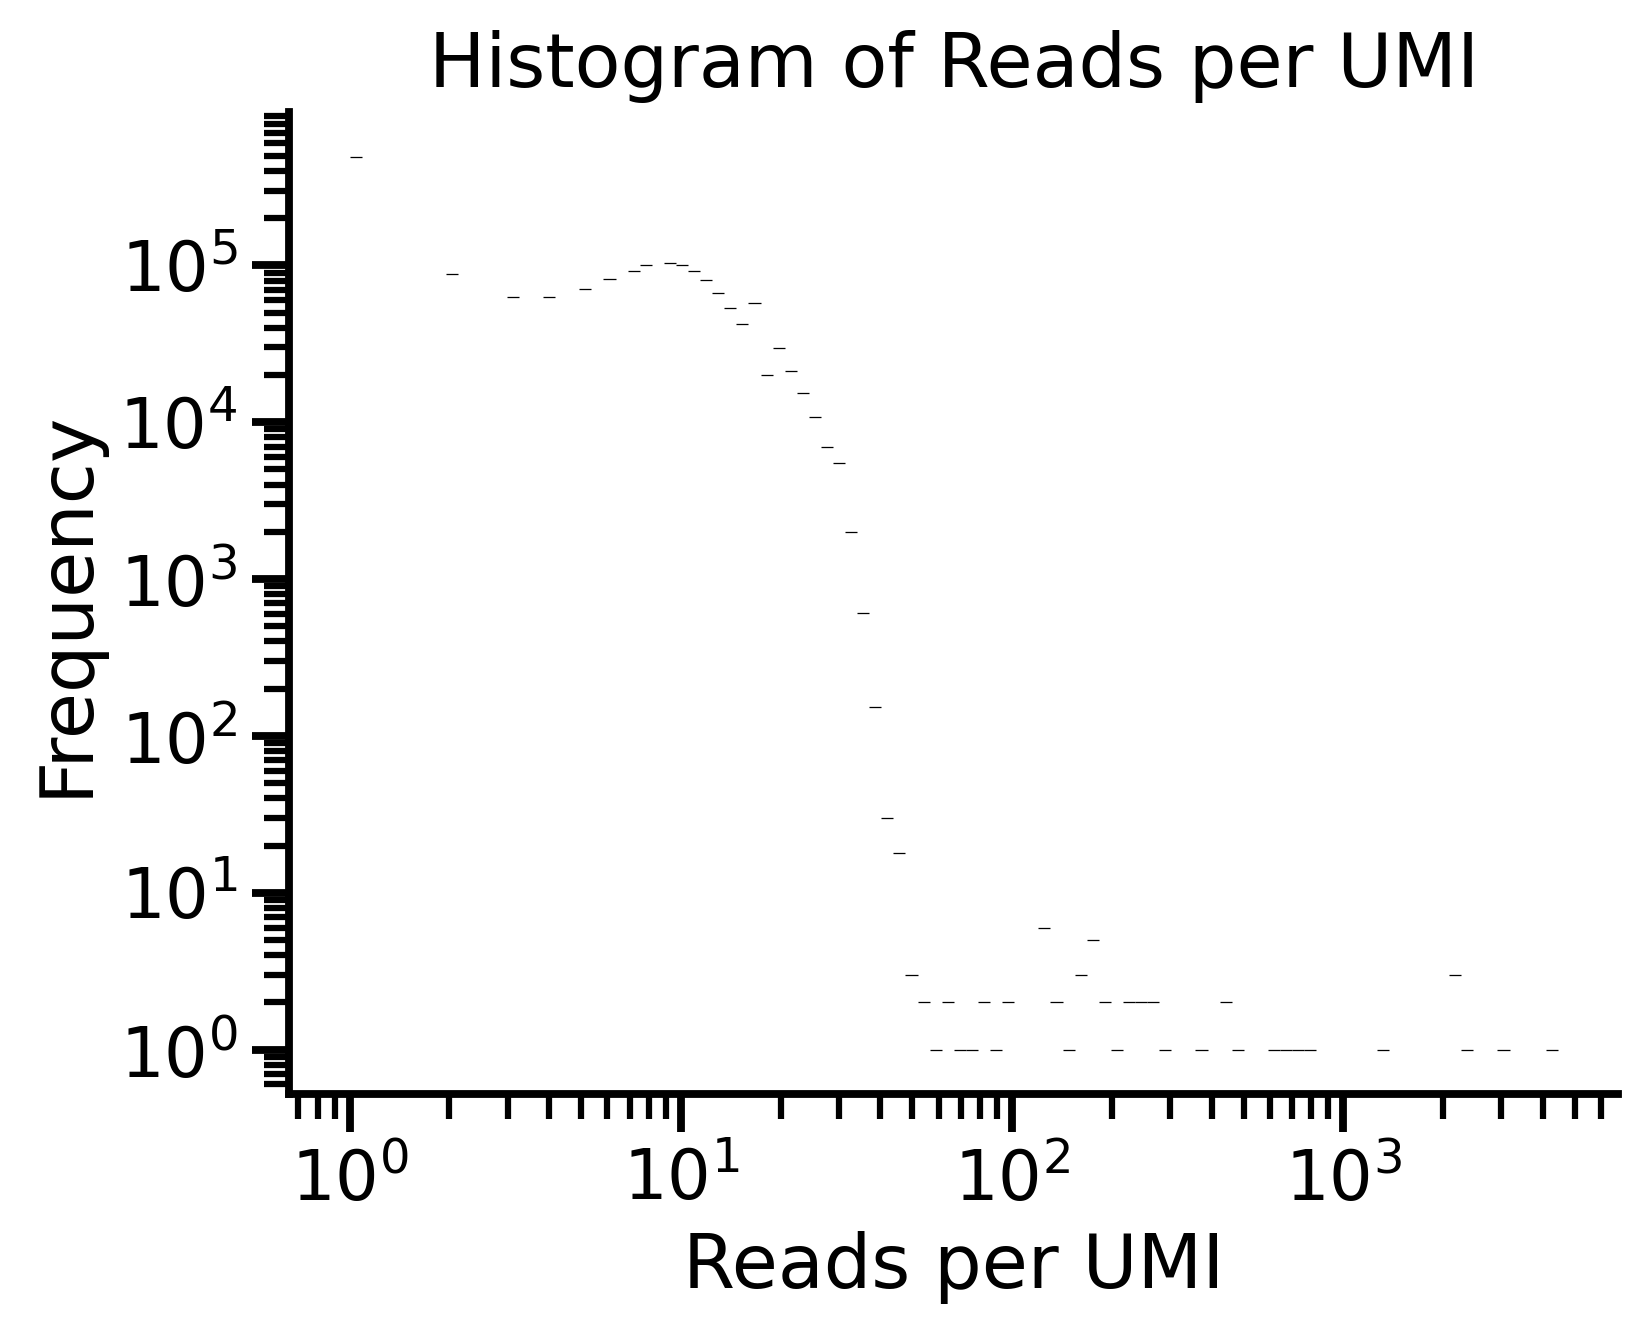

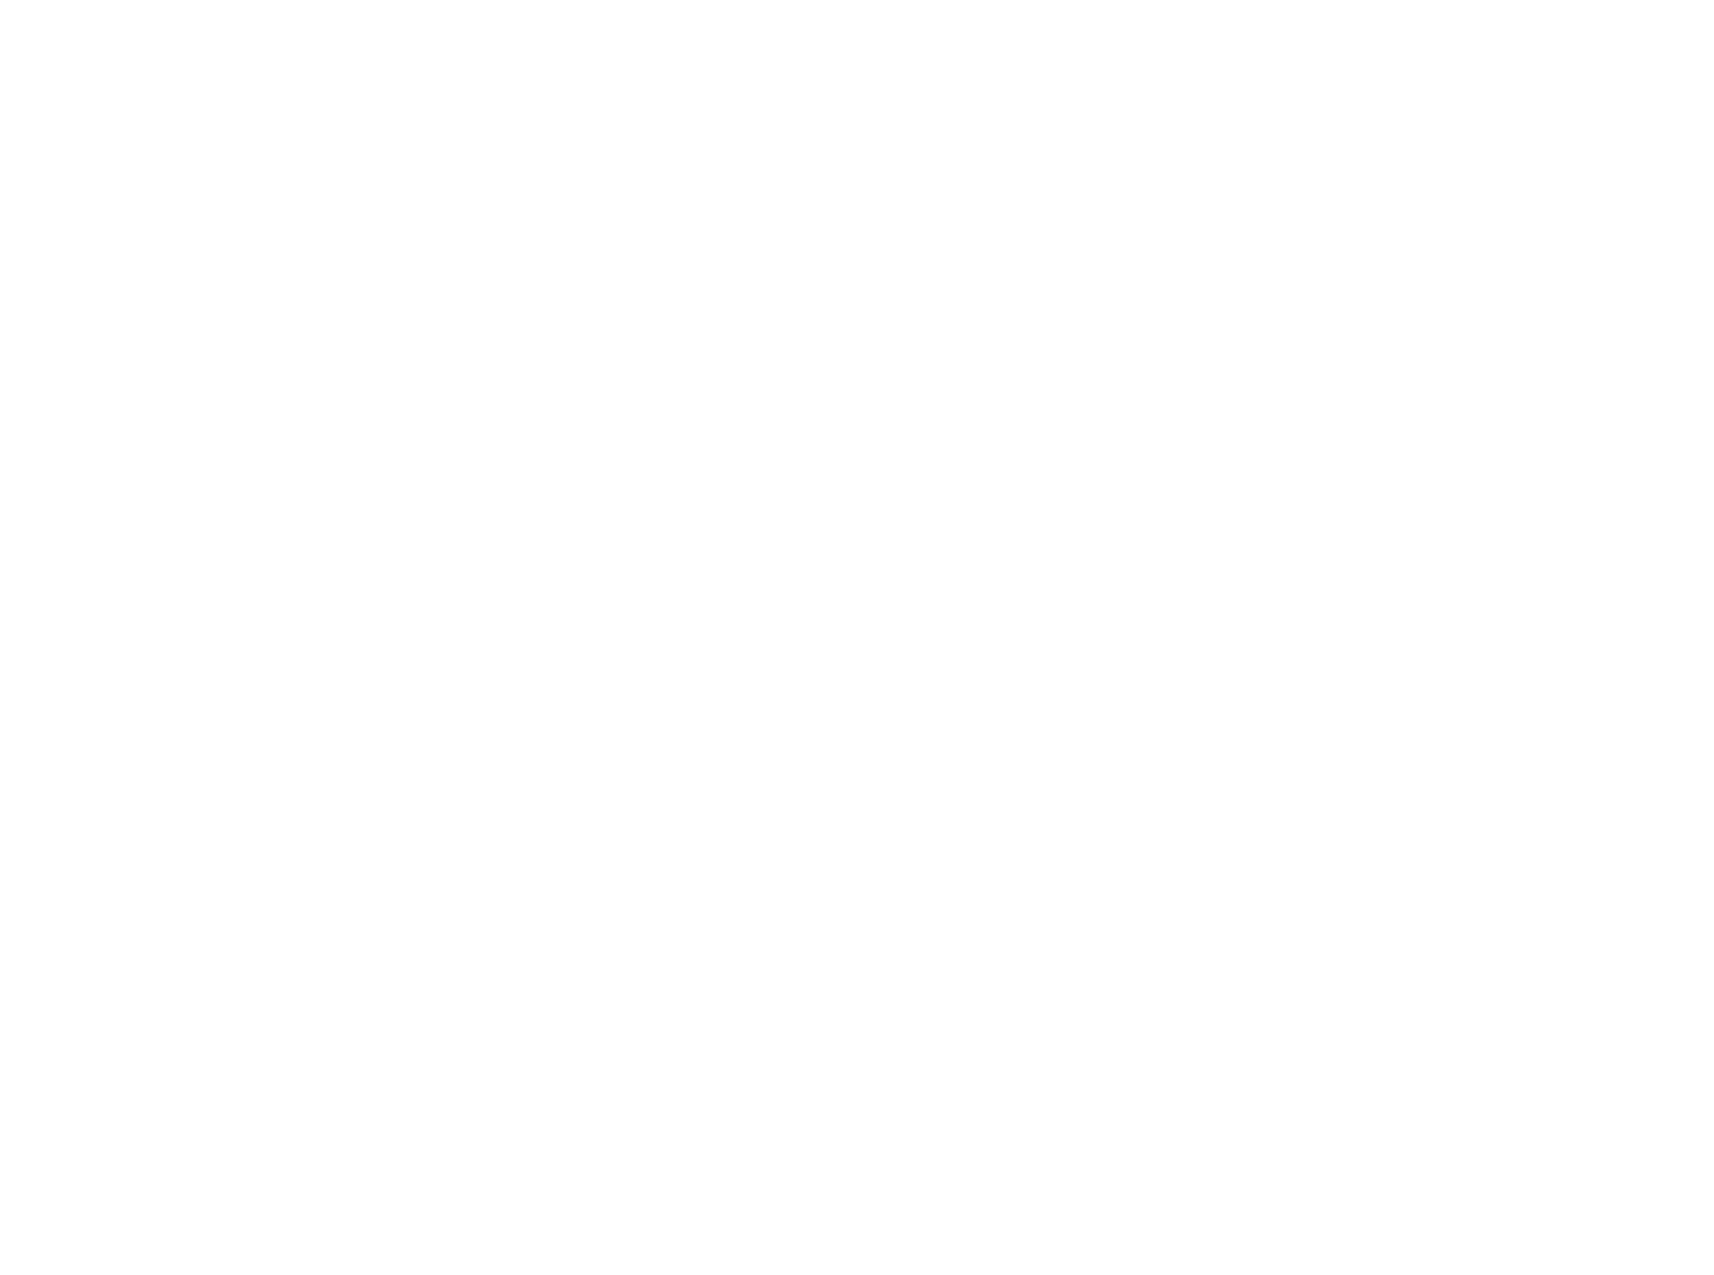

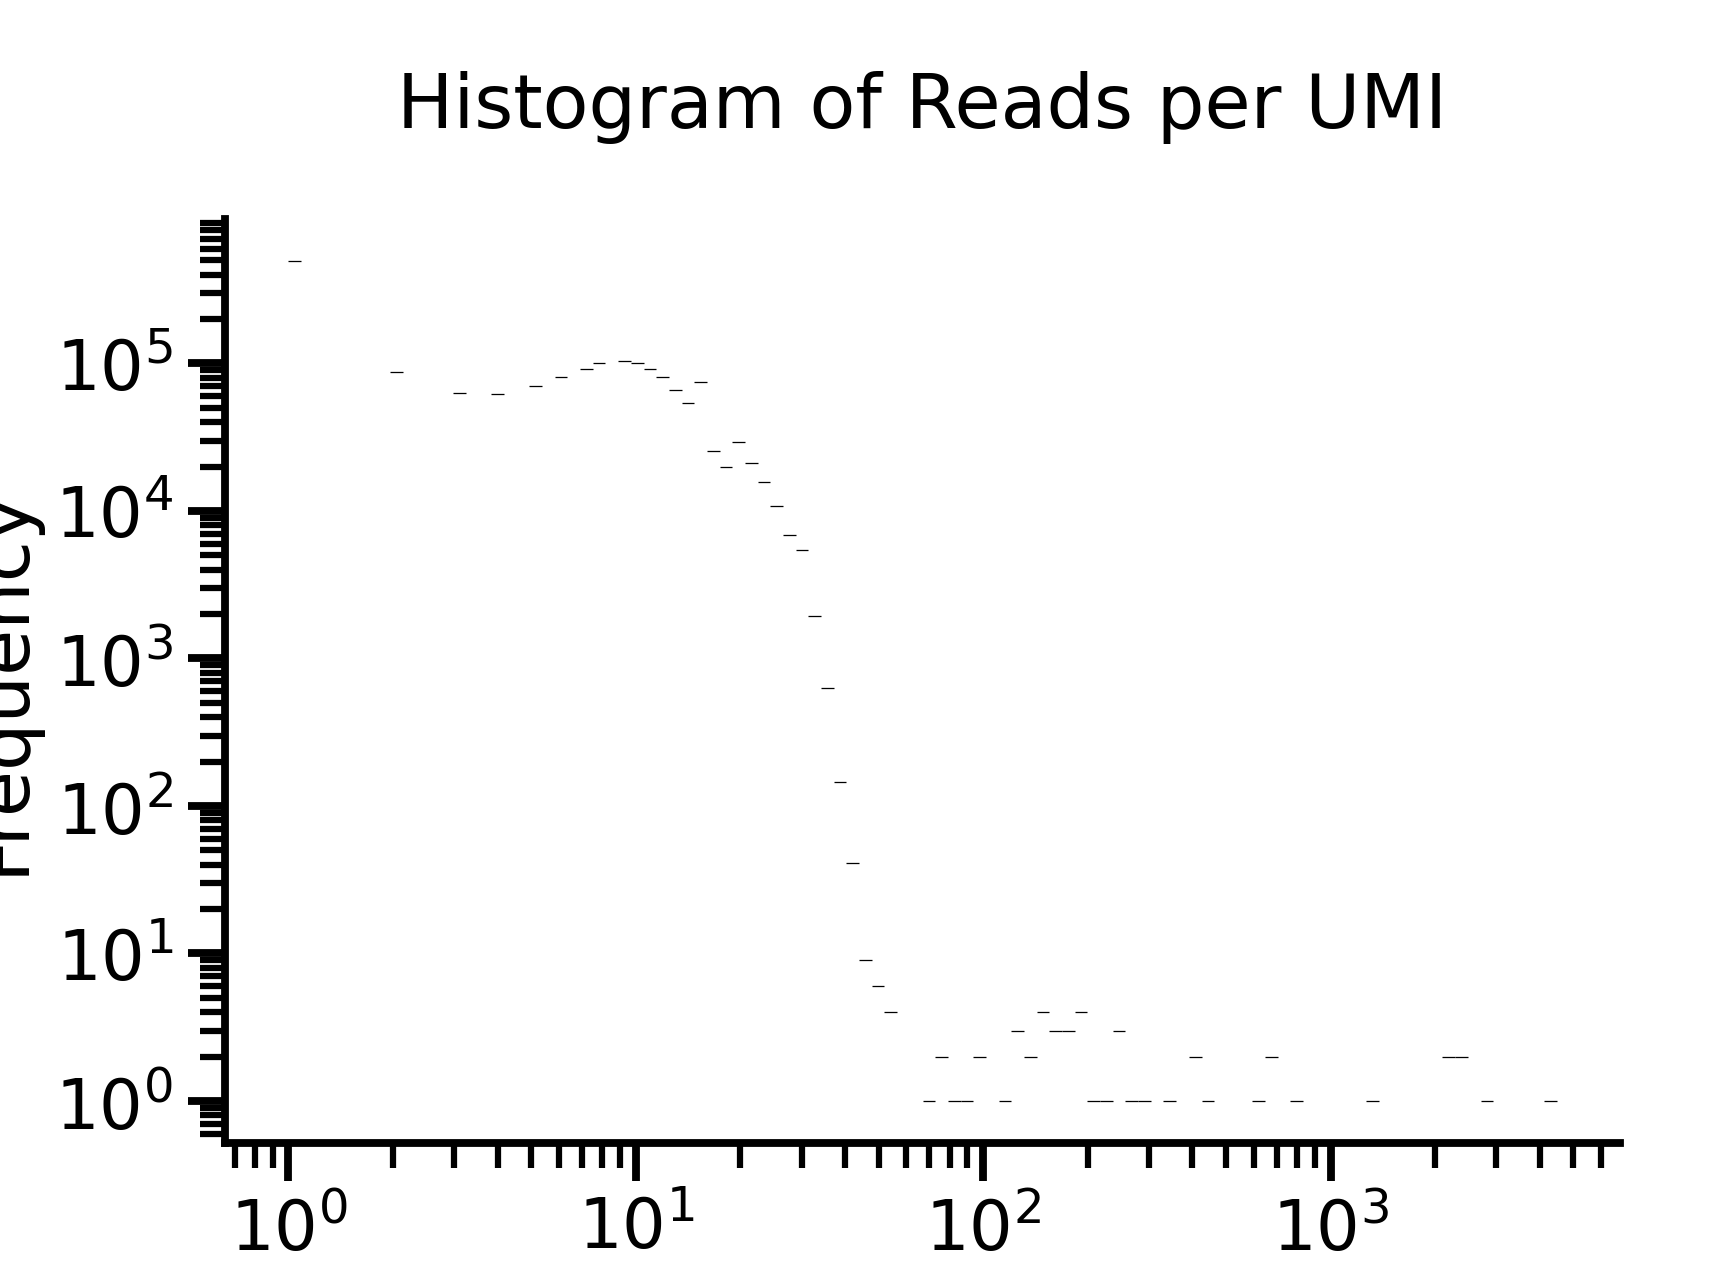

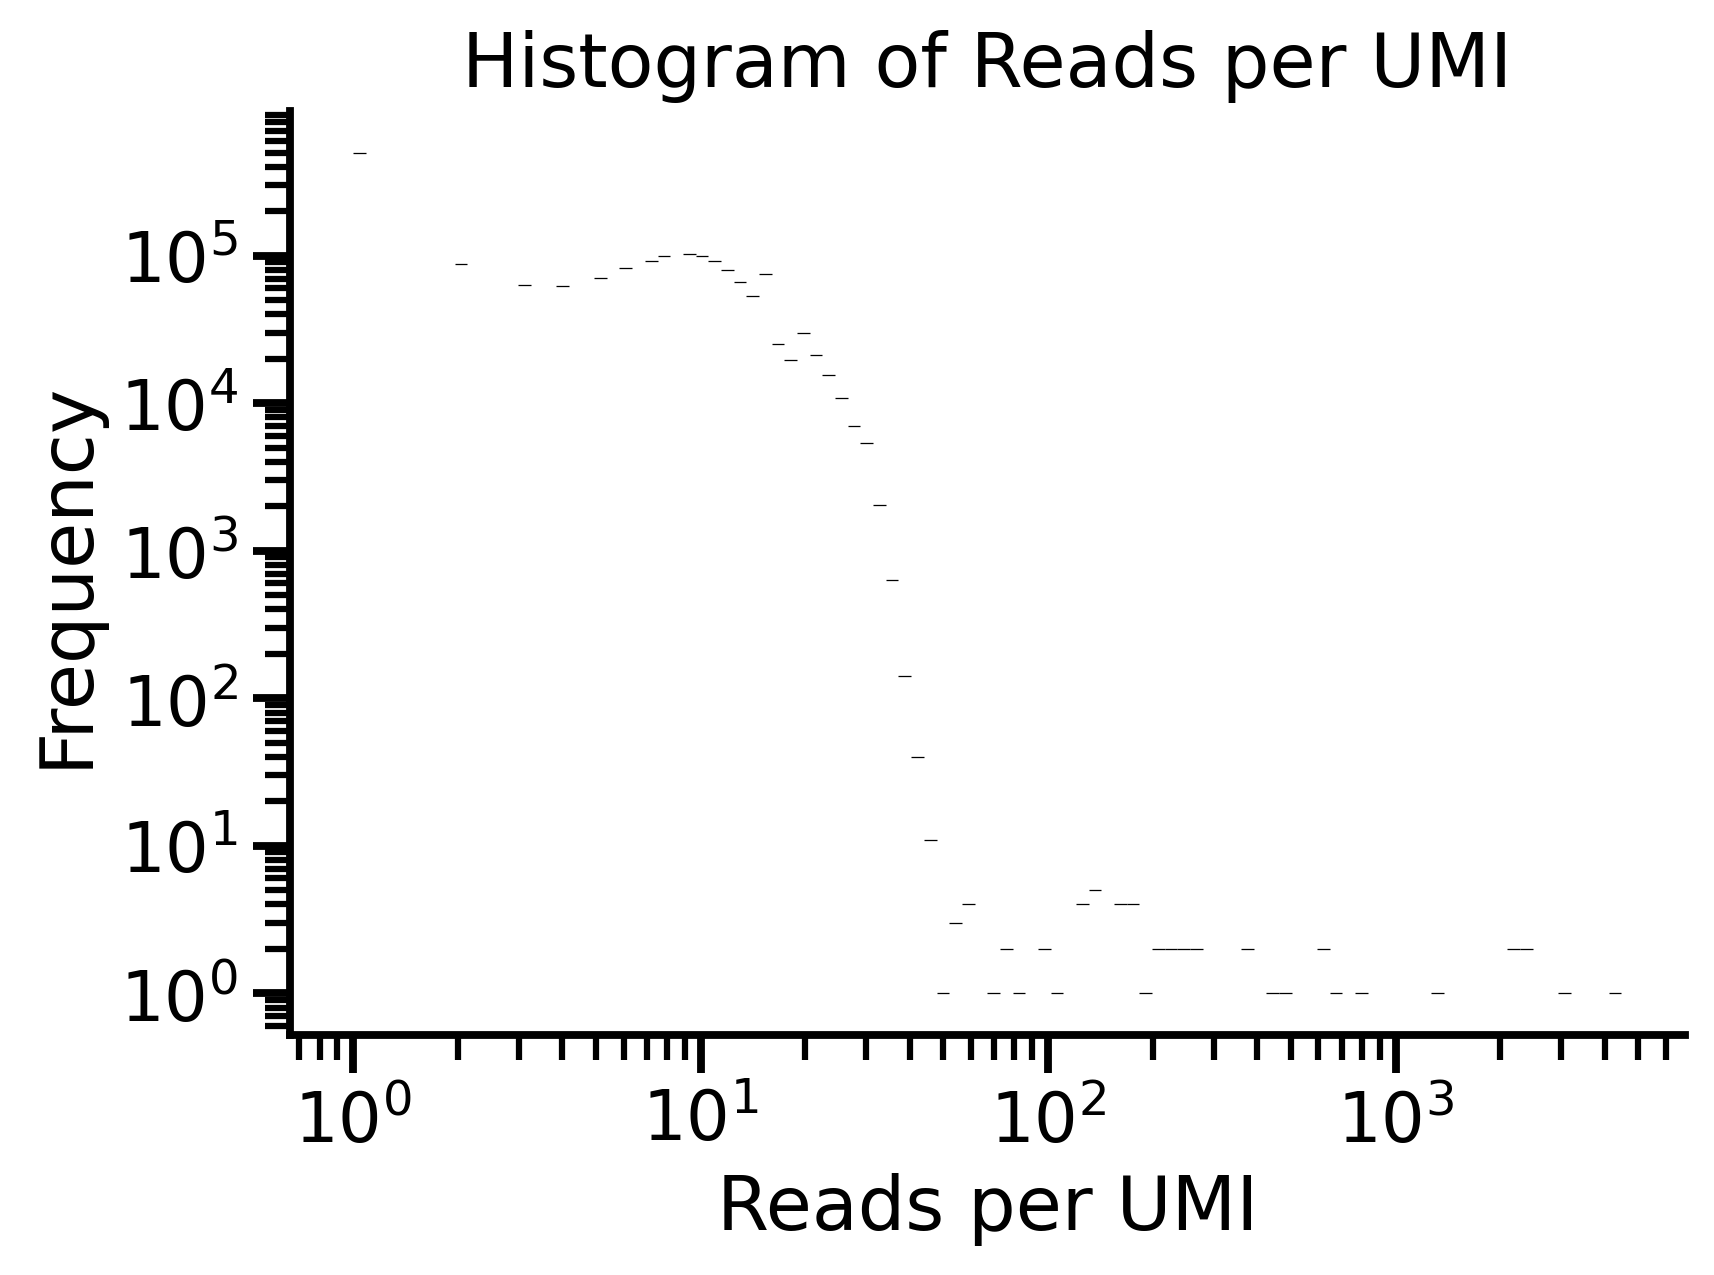

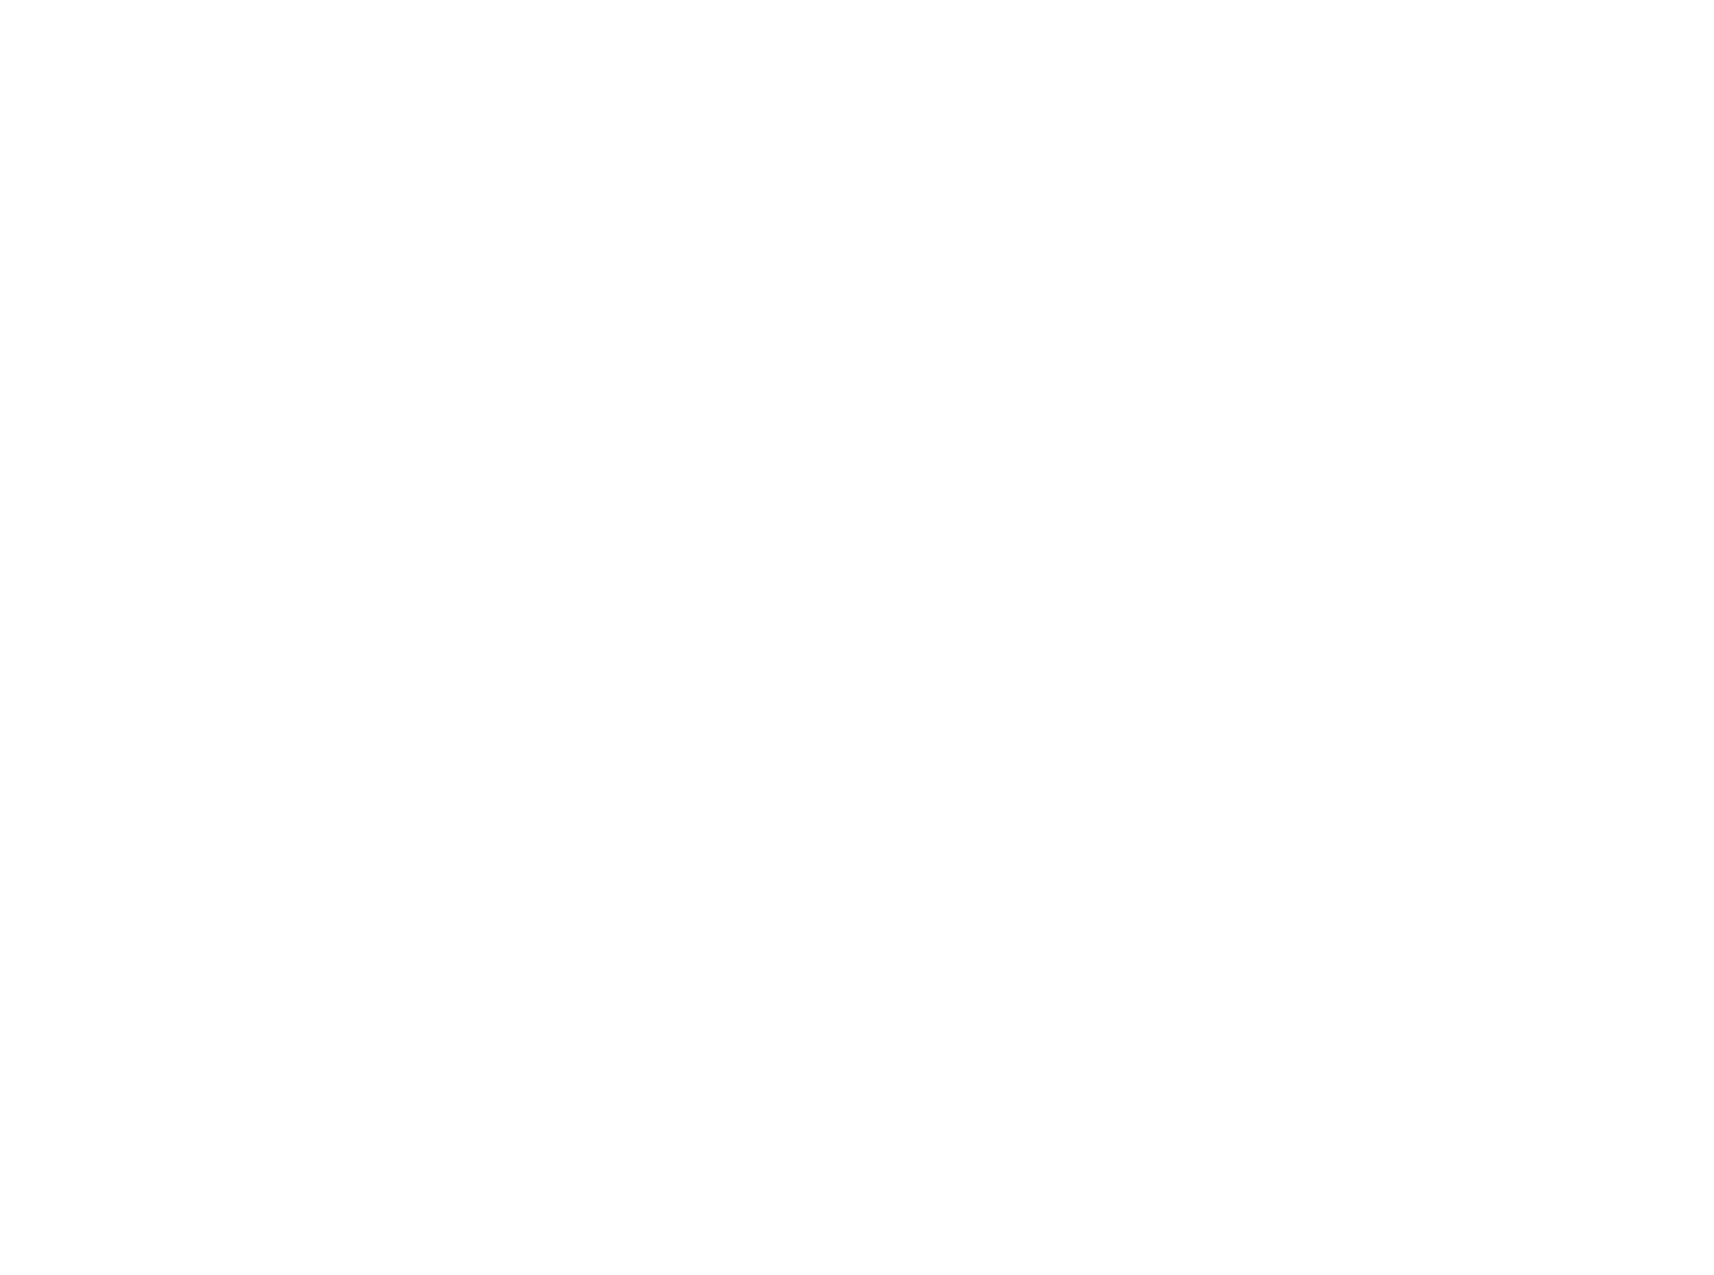

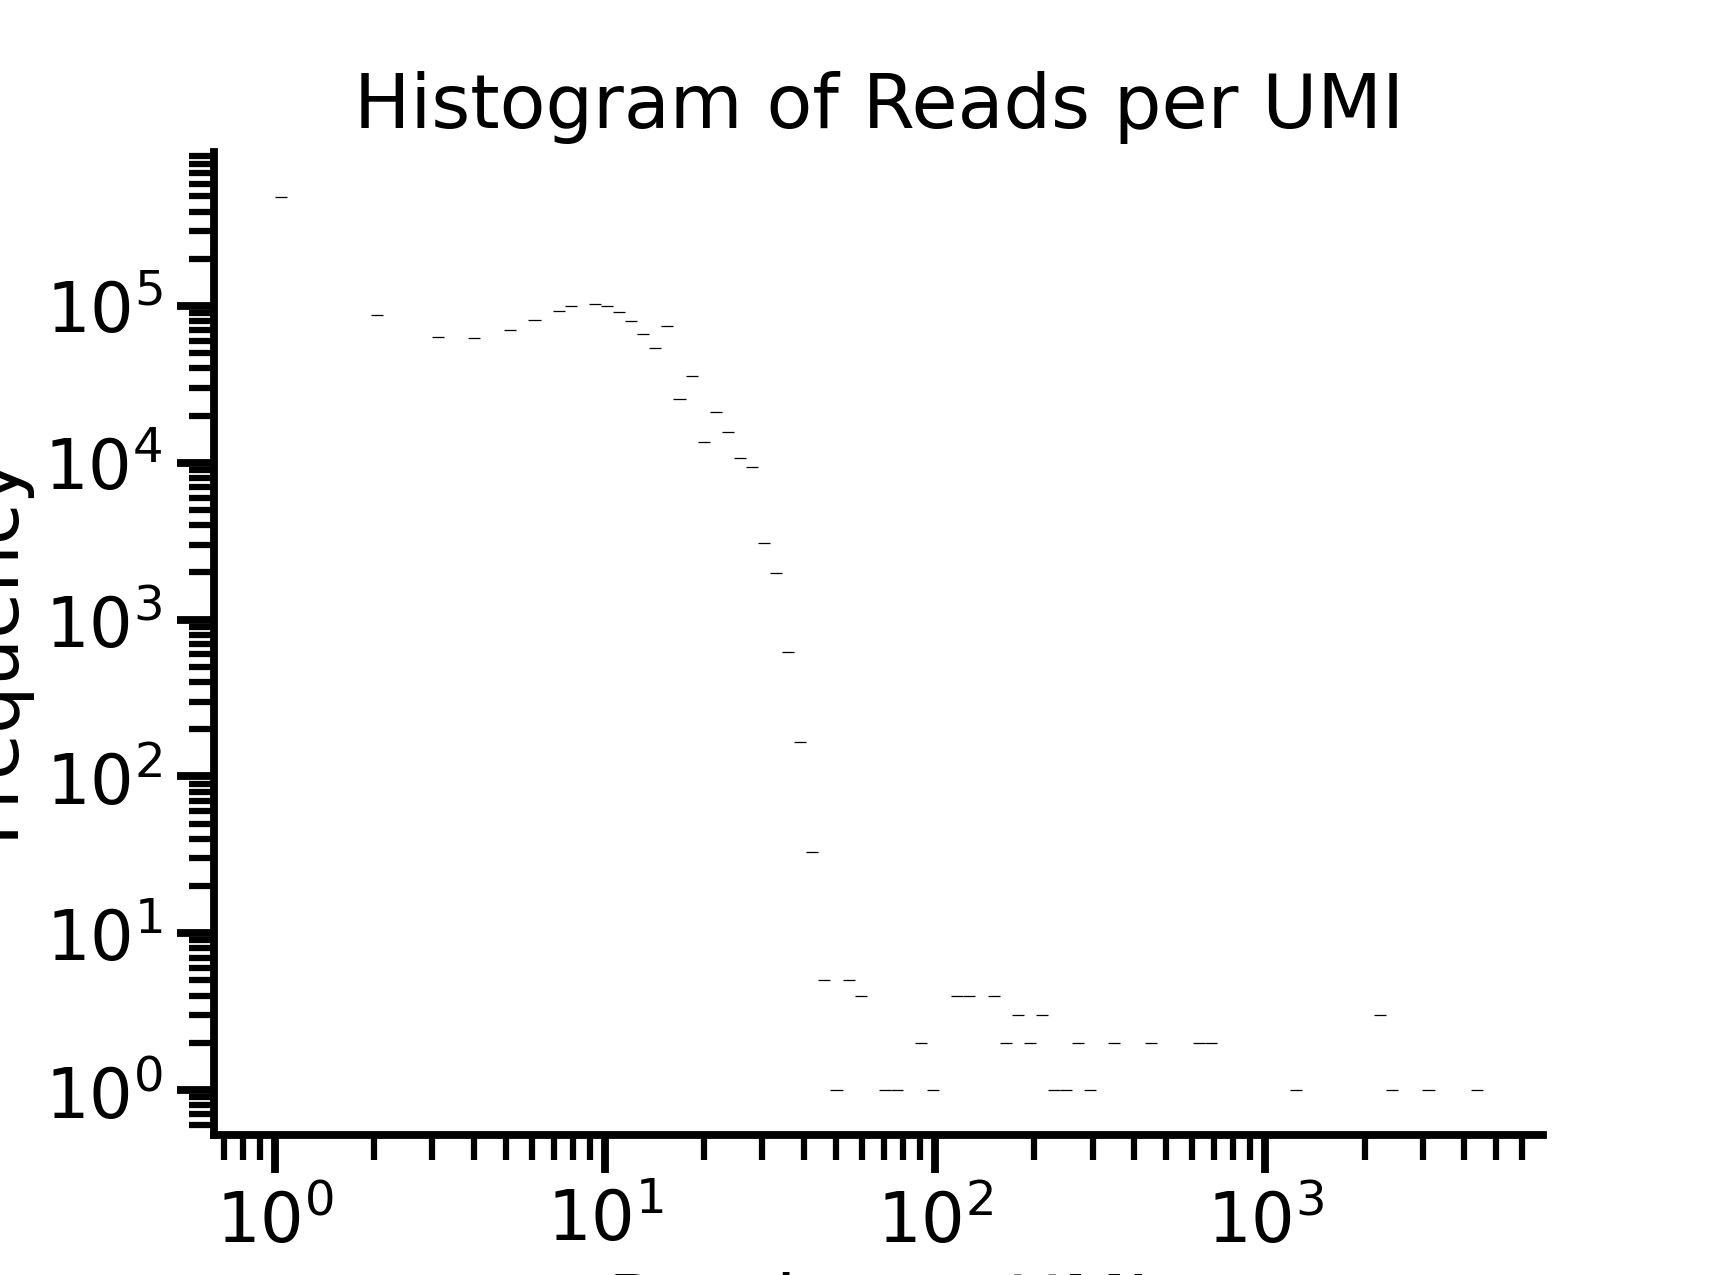

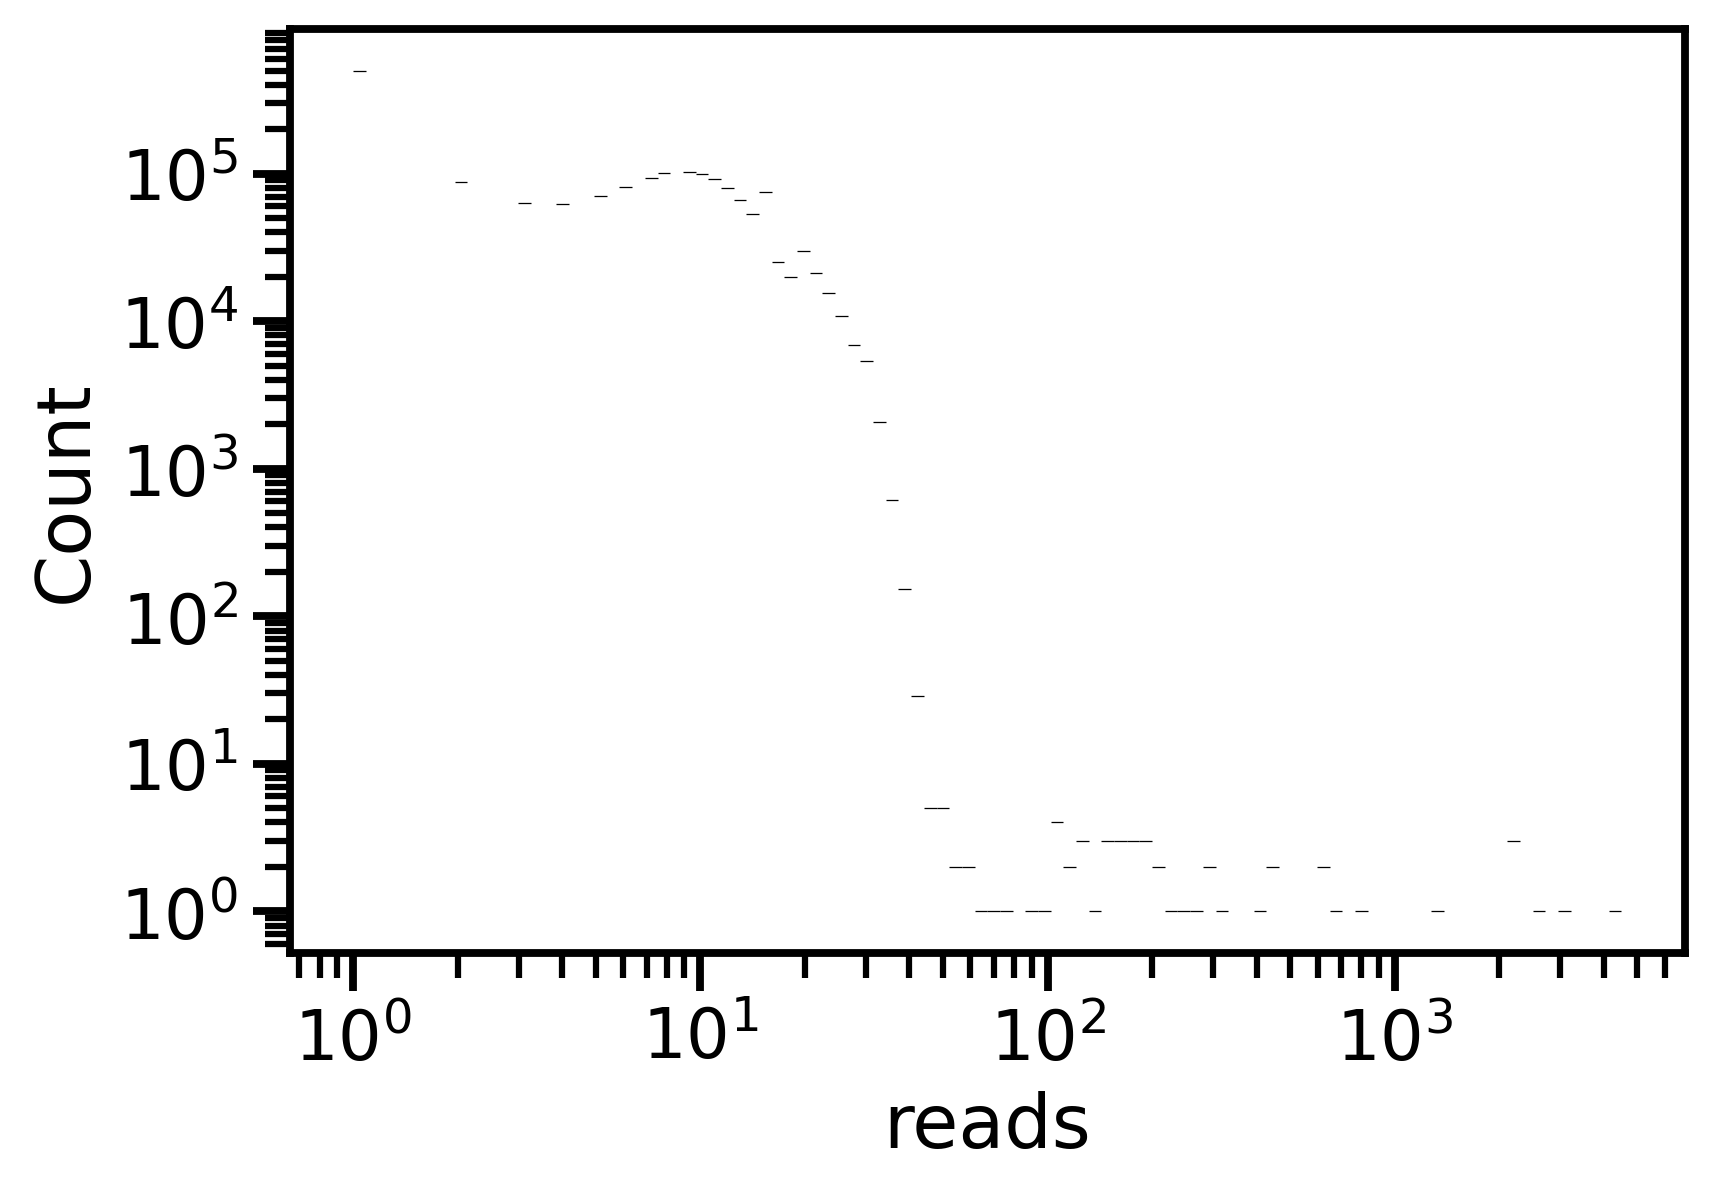

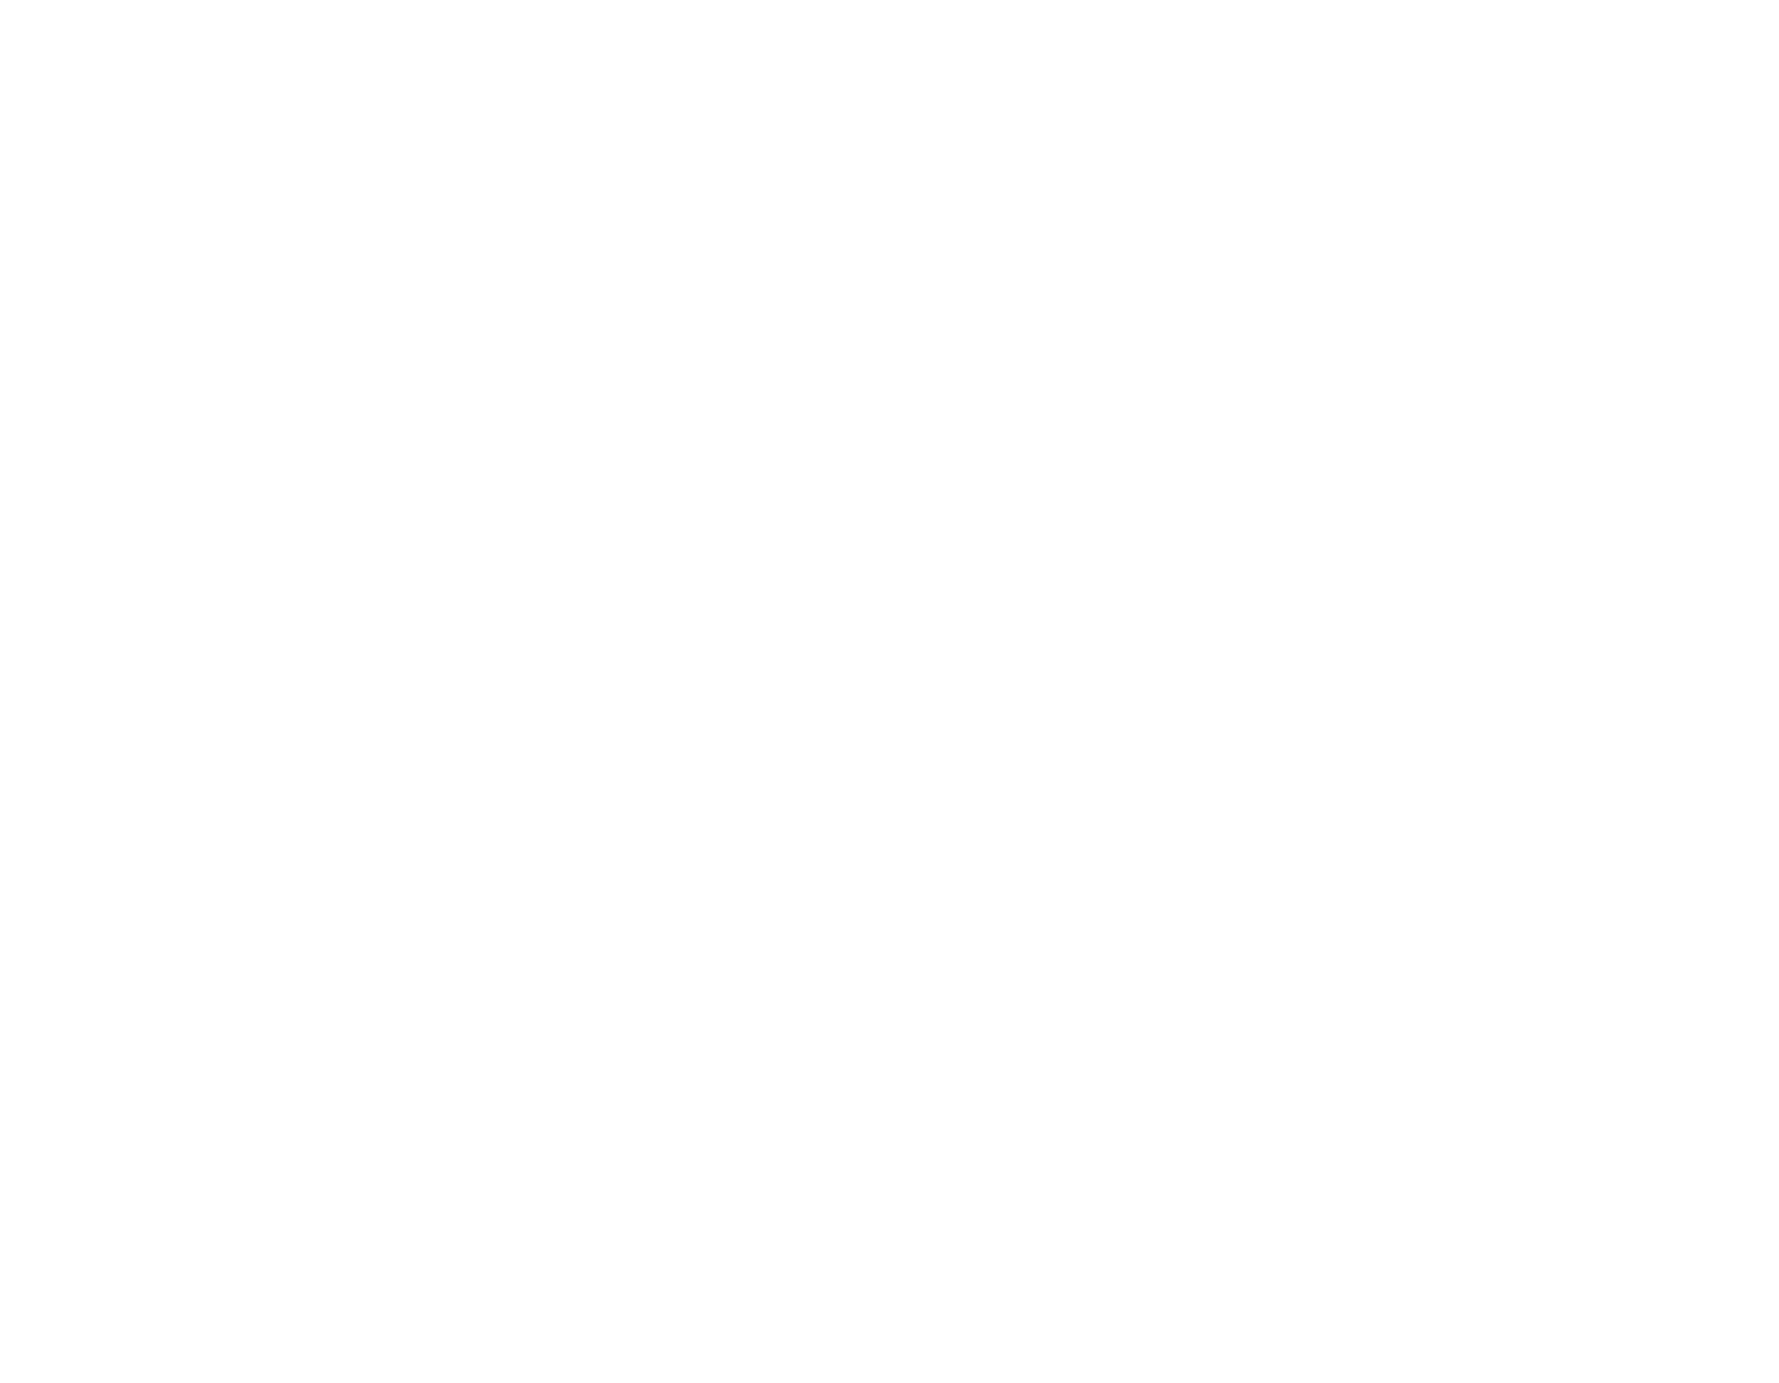

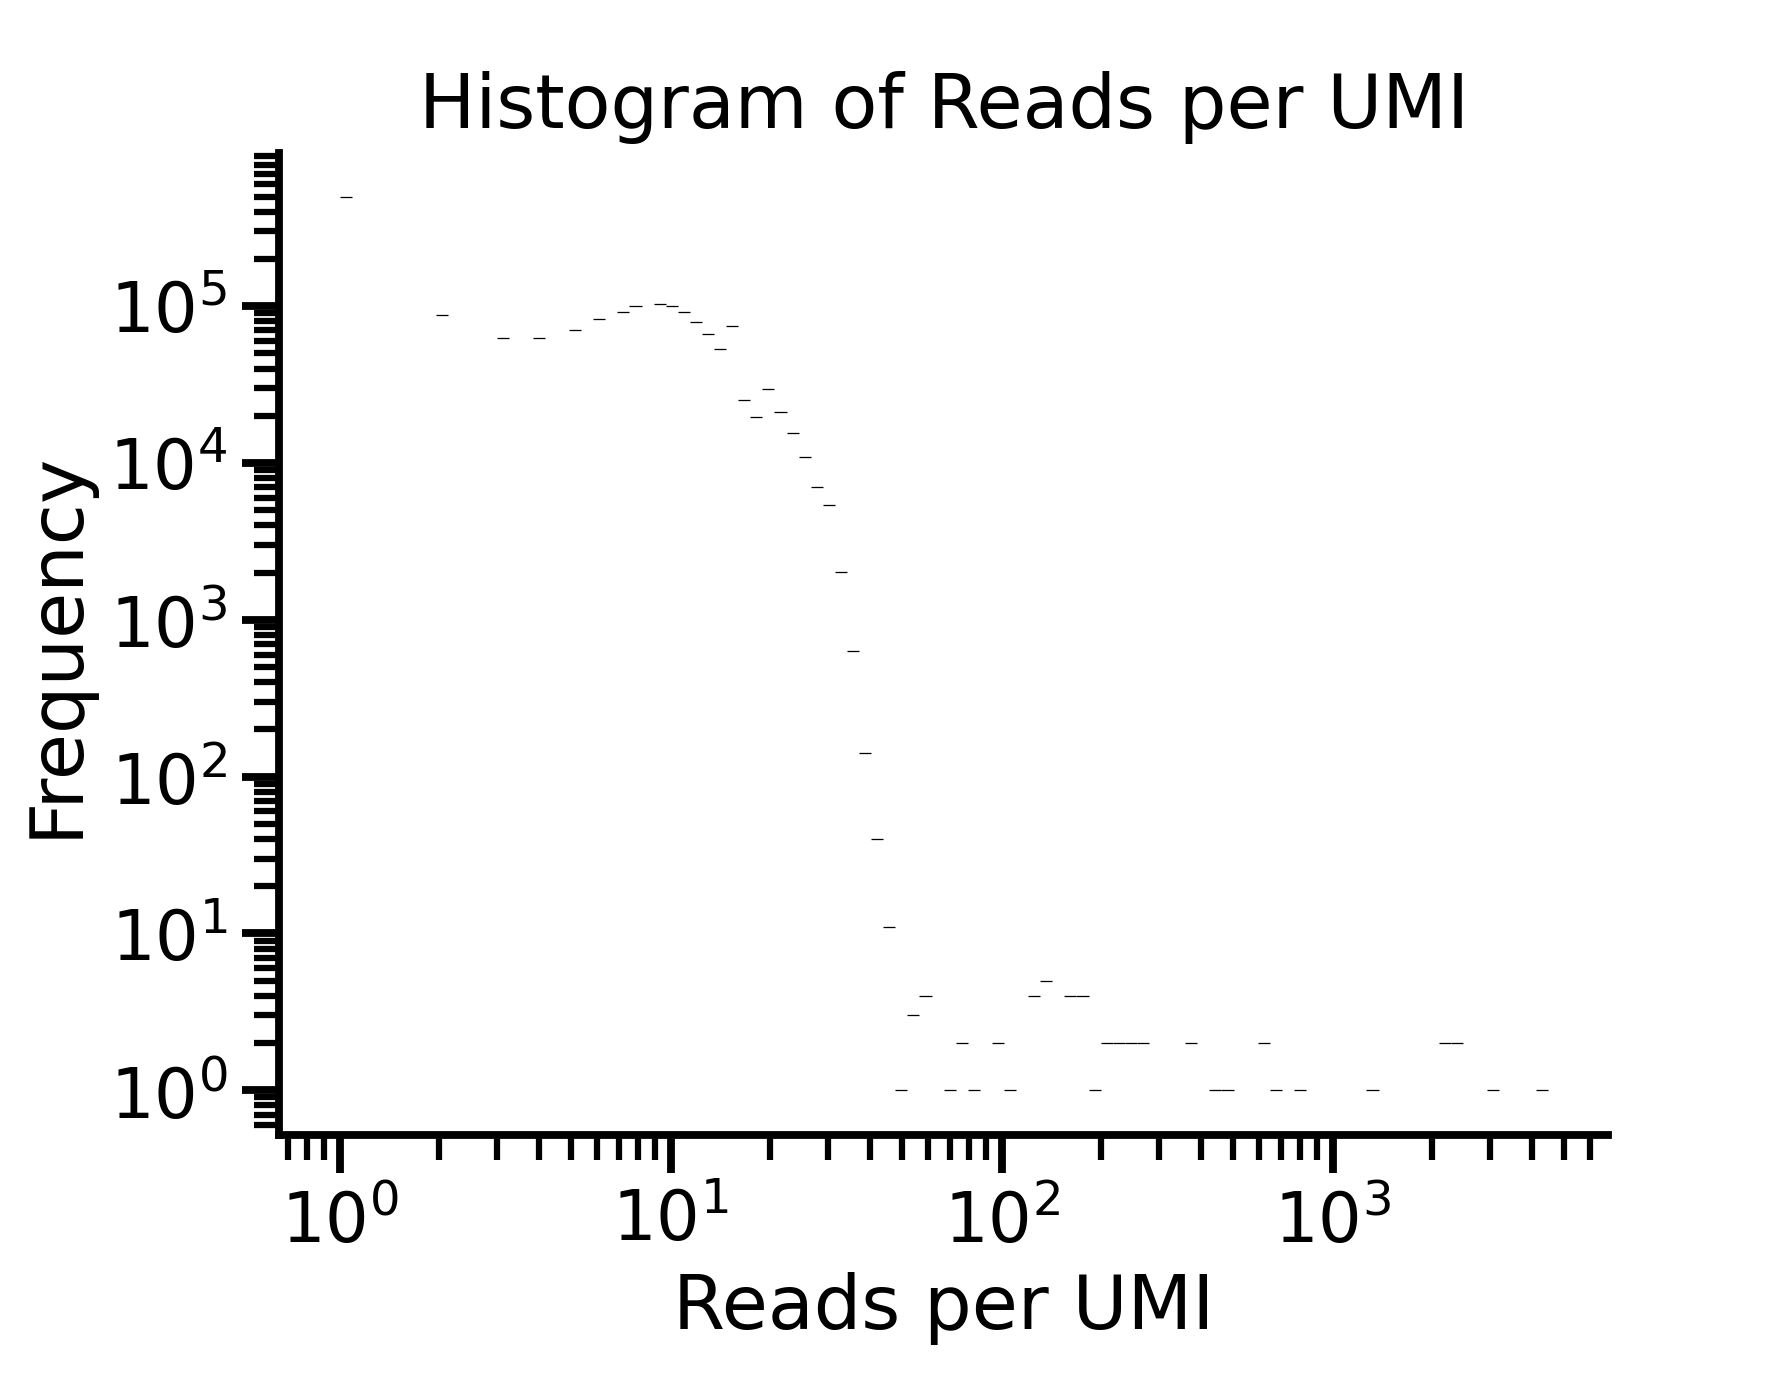

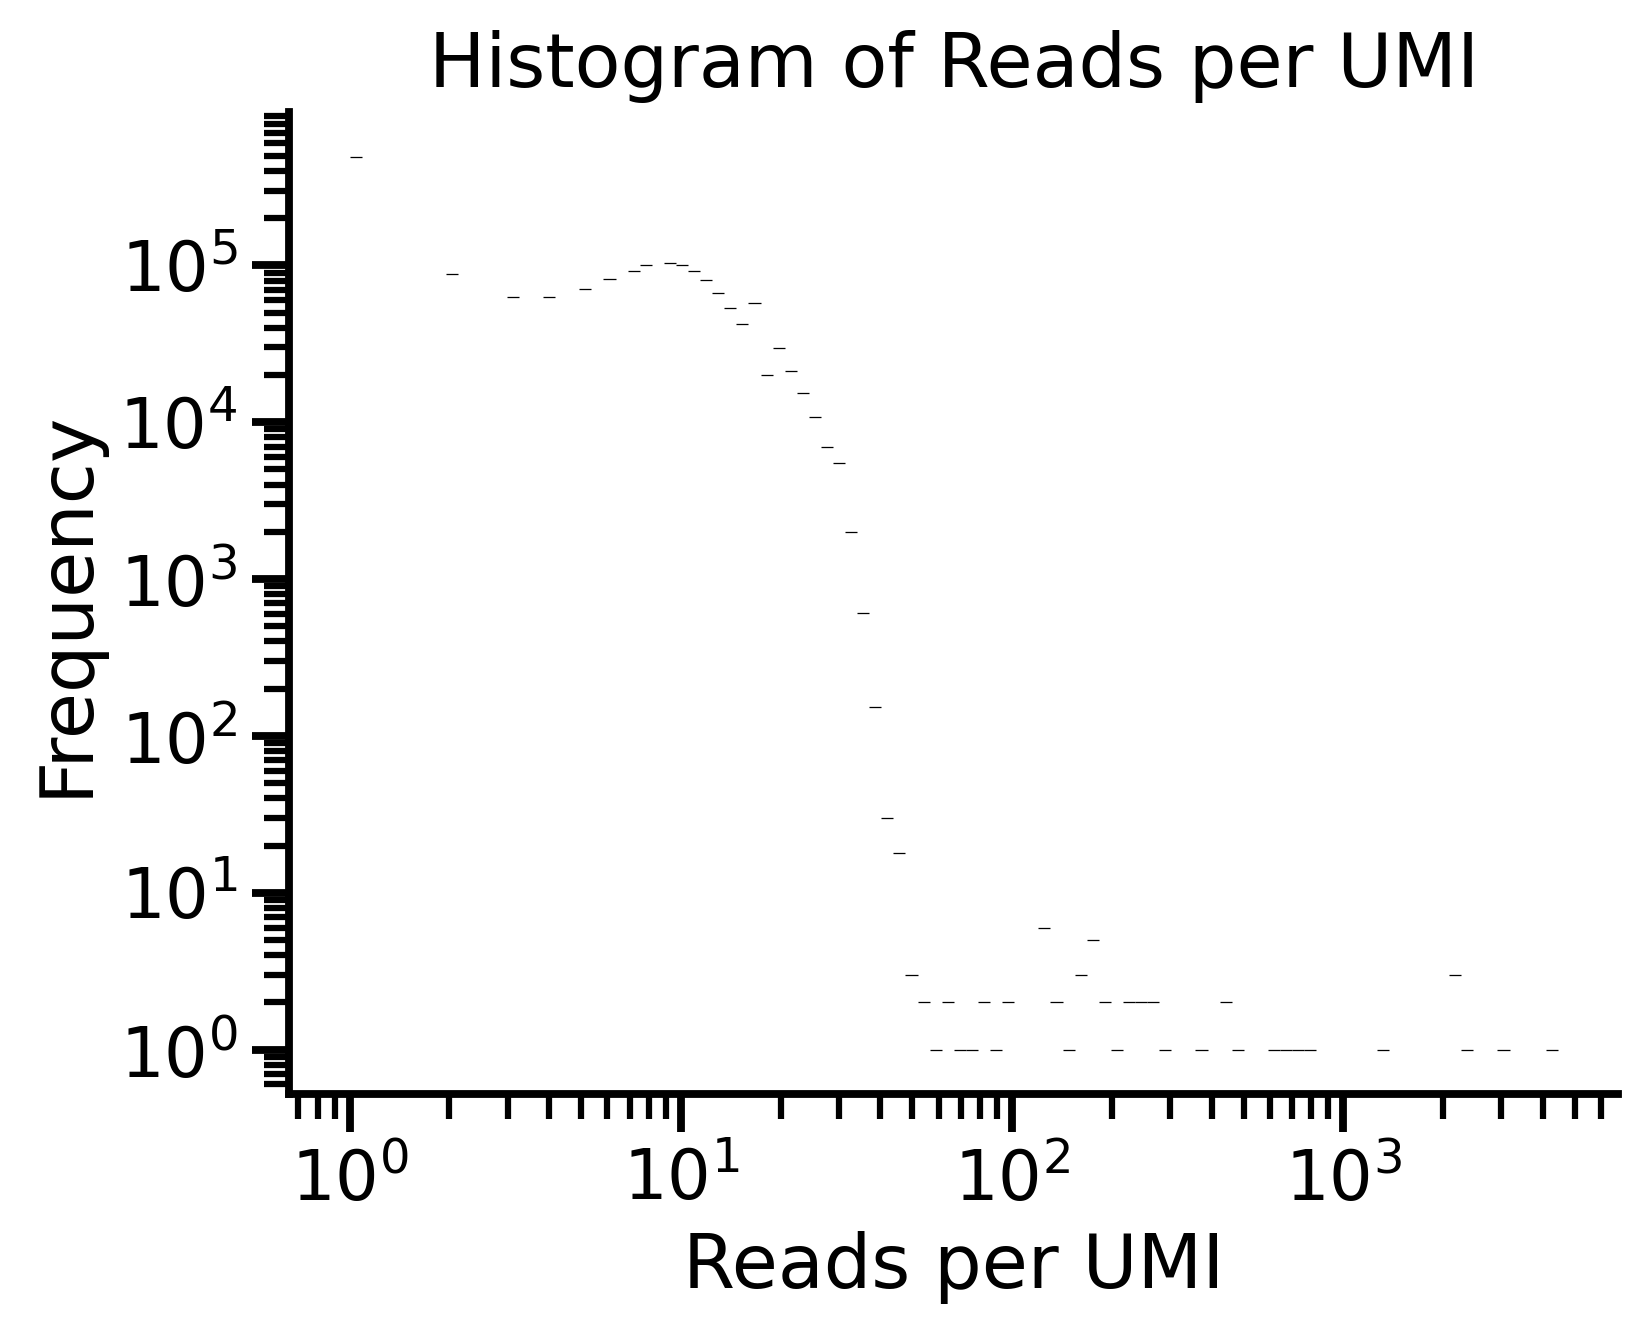

<Figure size 1800x1200 with 0 Axes>

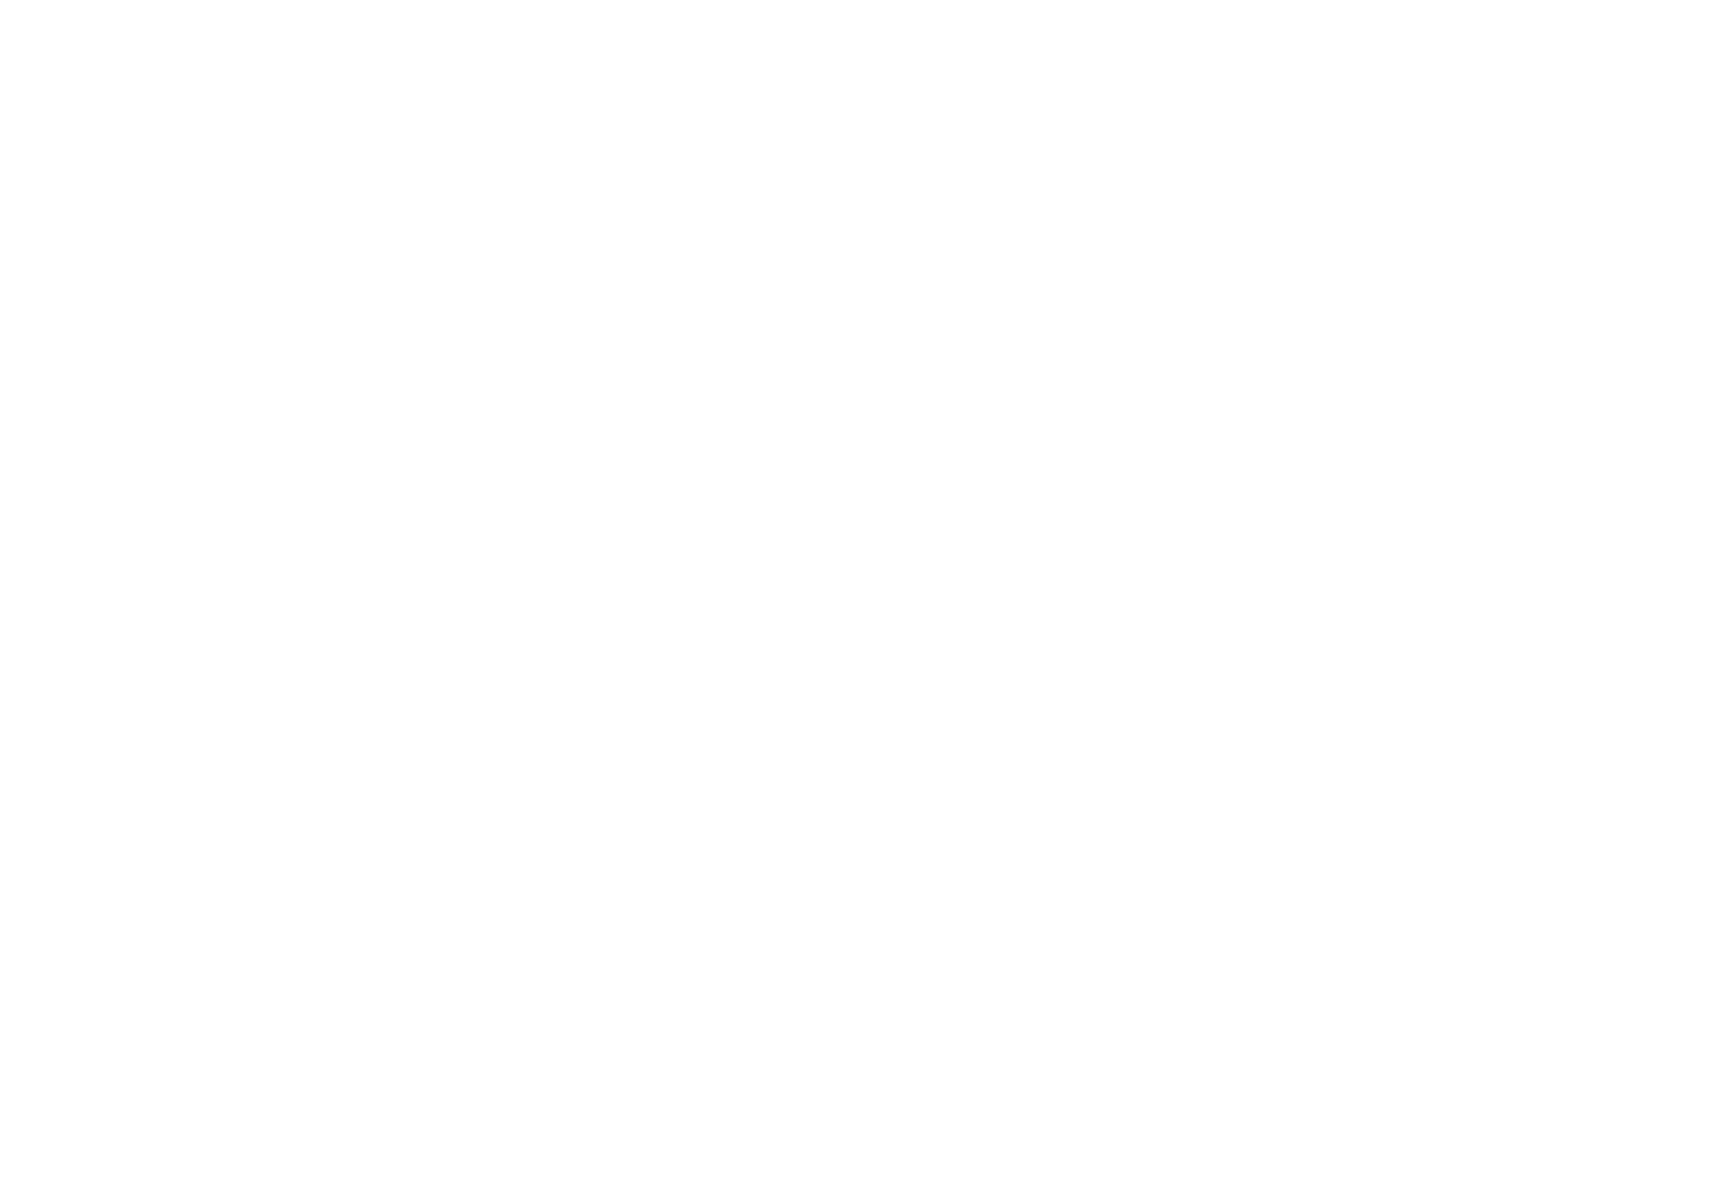

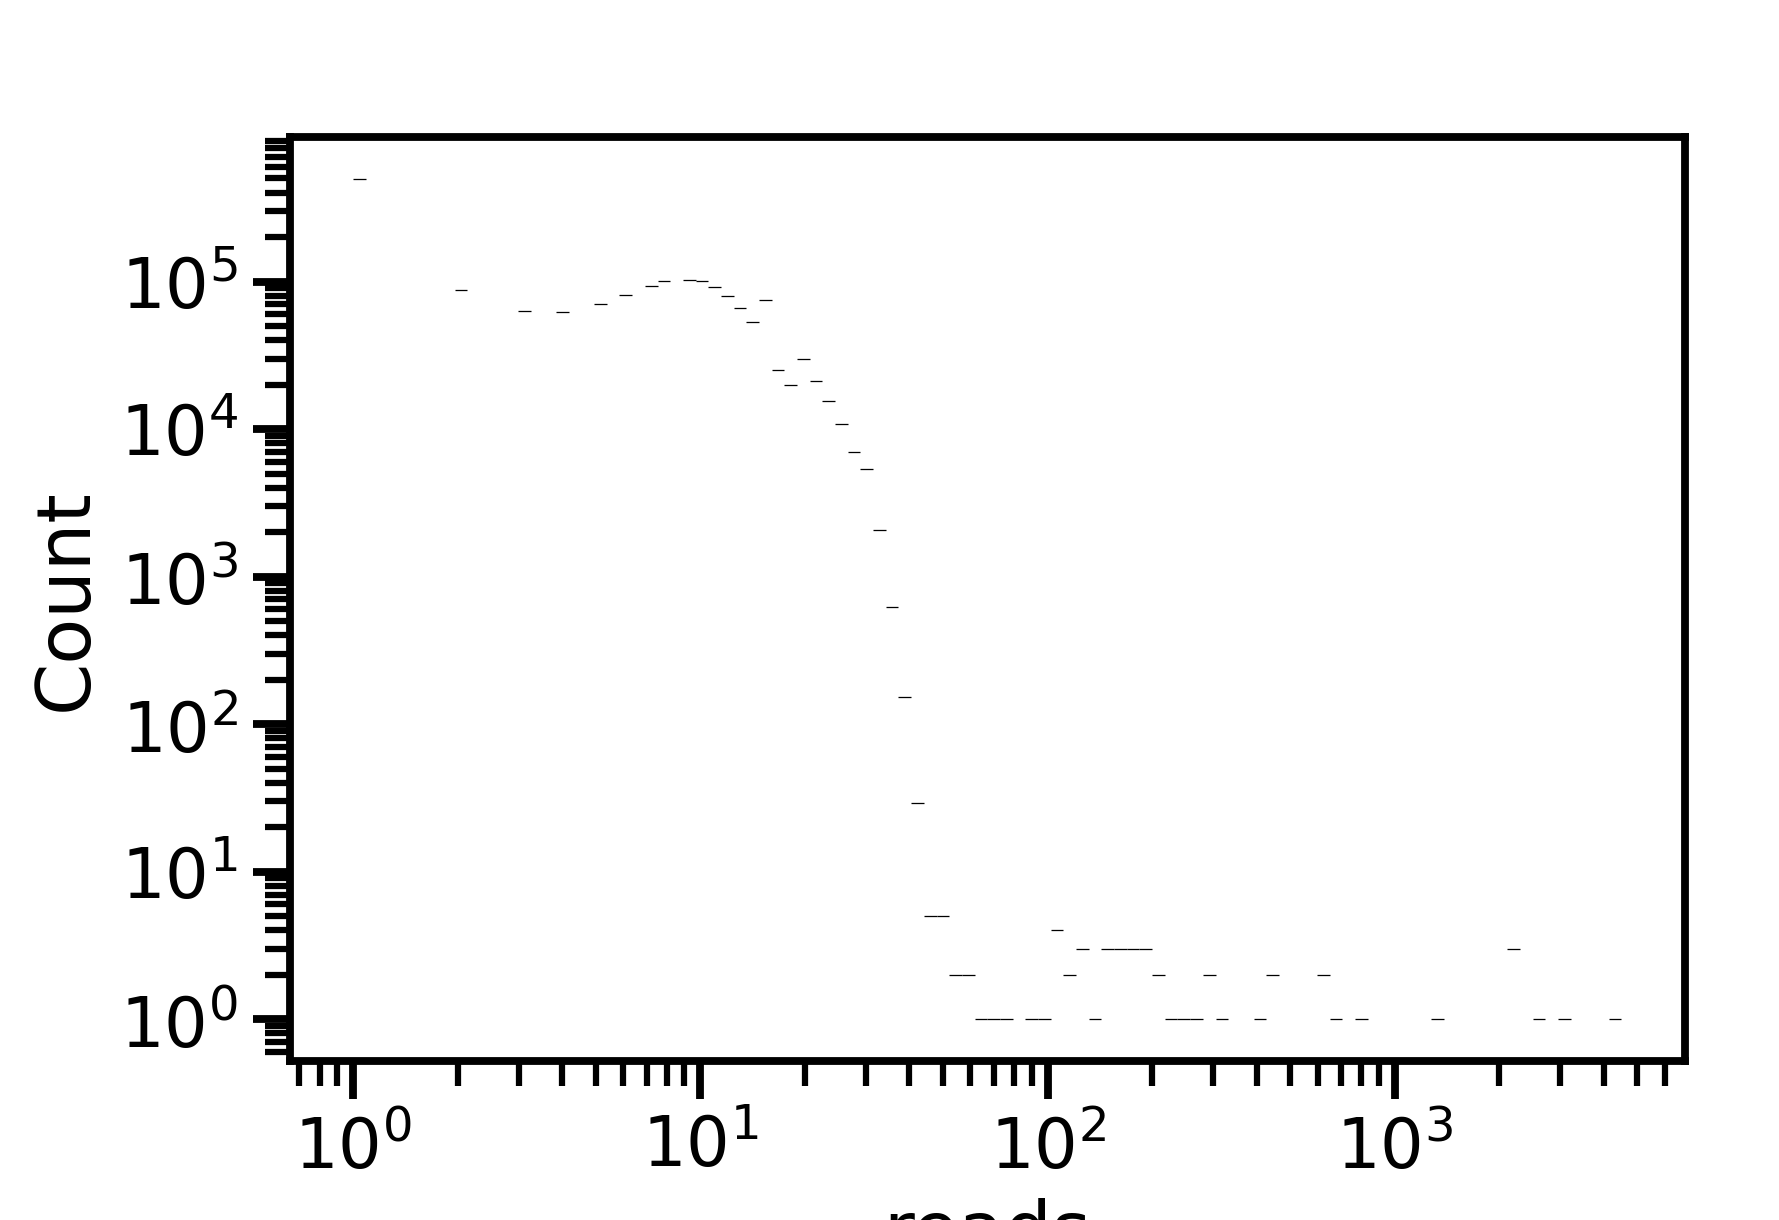

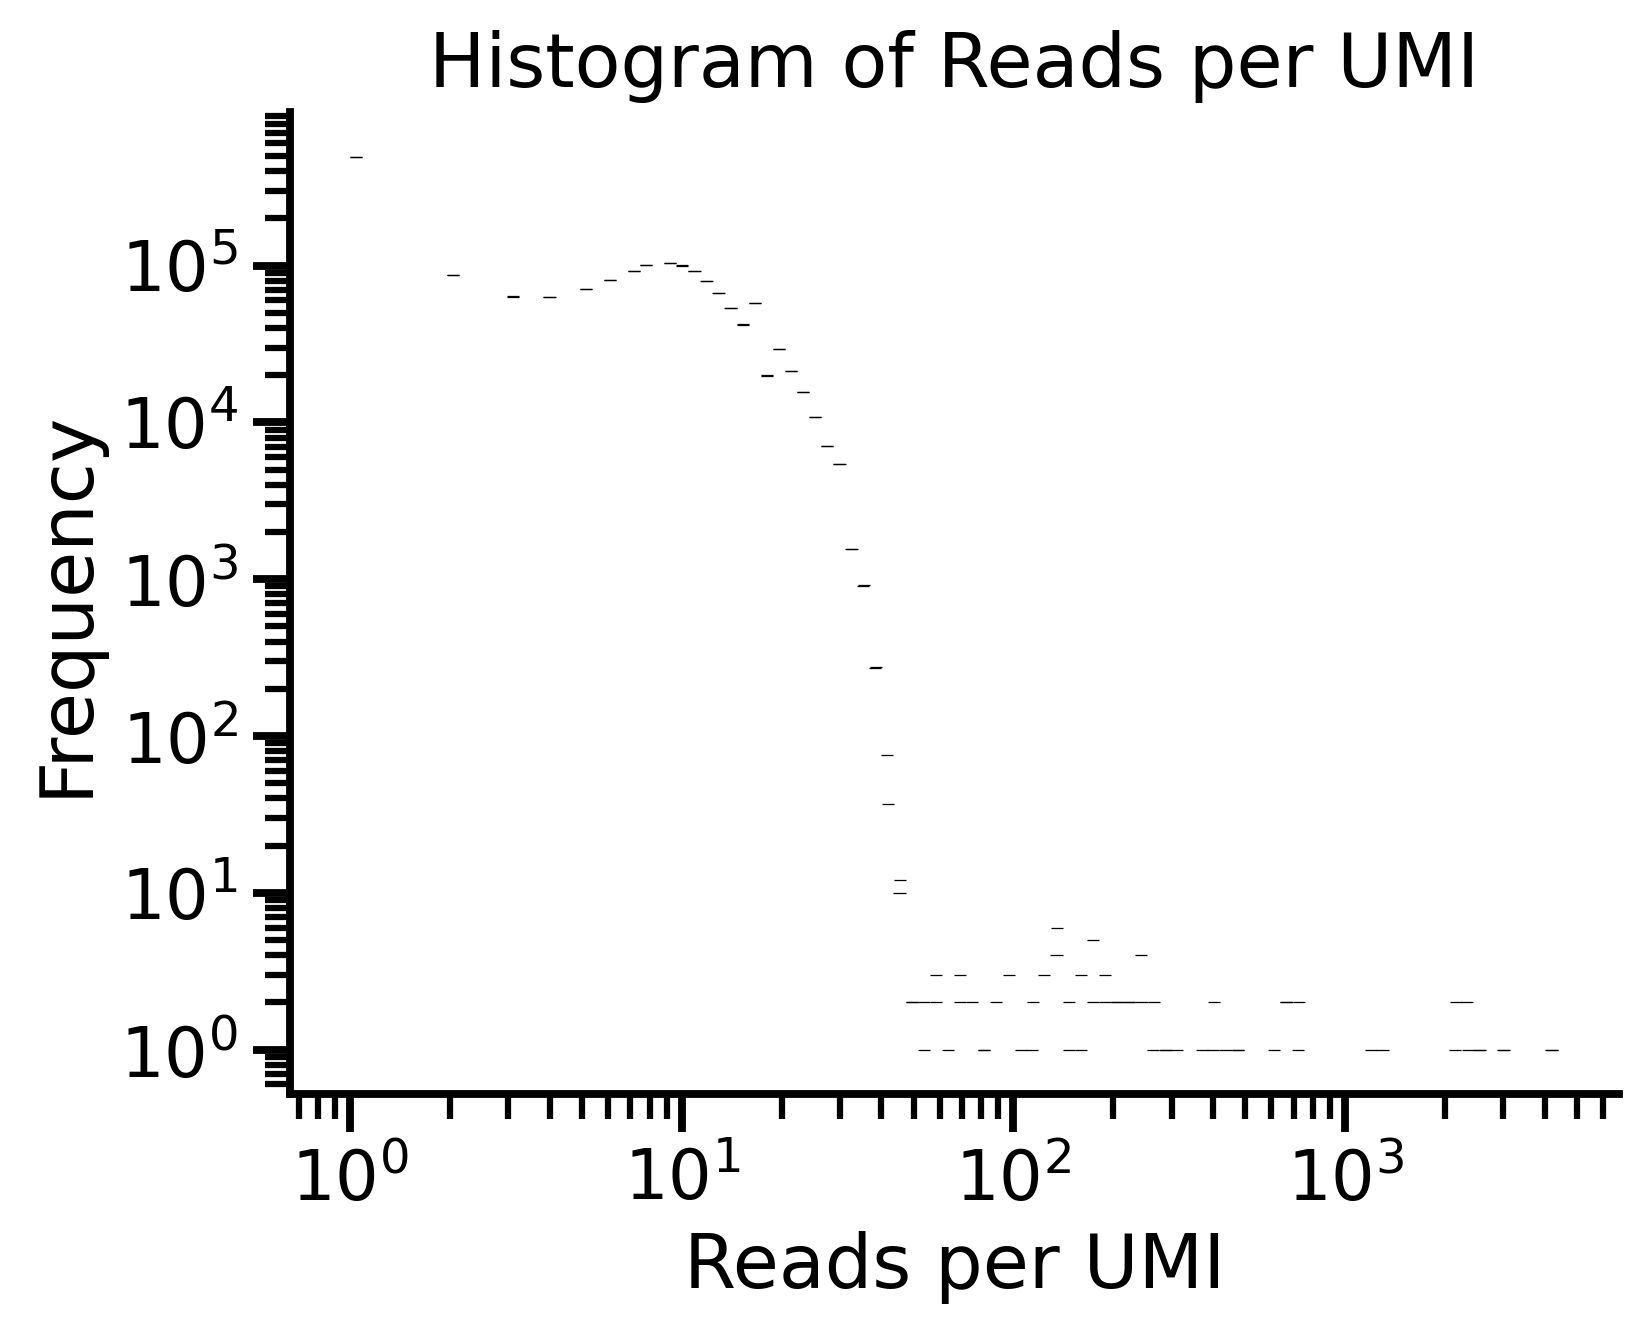

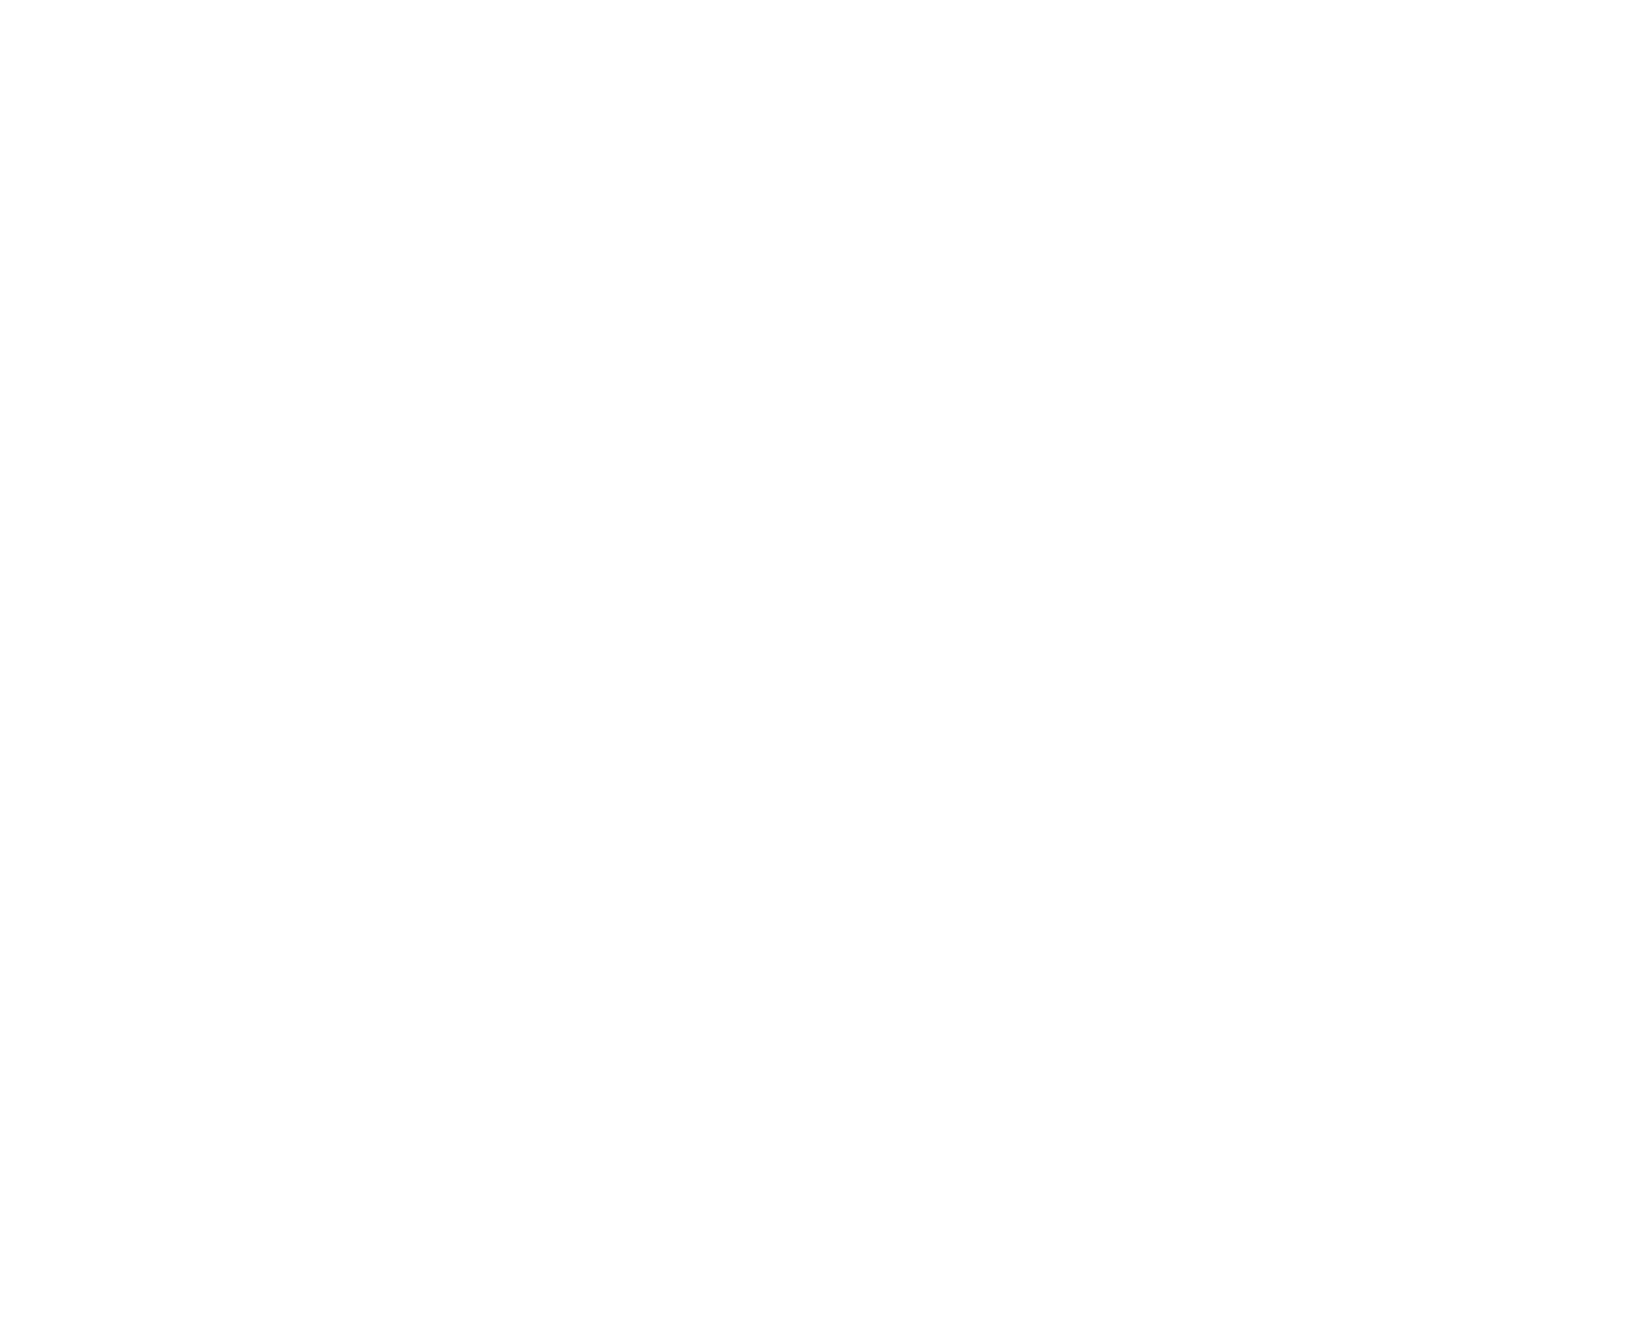

<Figure size 1800x1200 with 0 Axes>

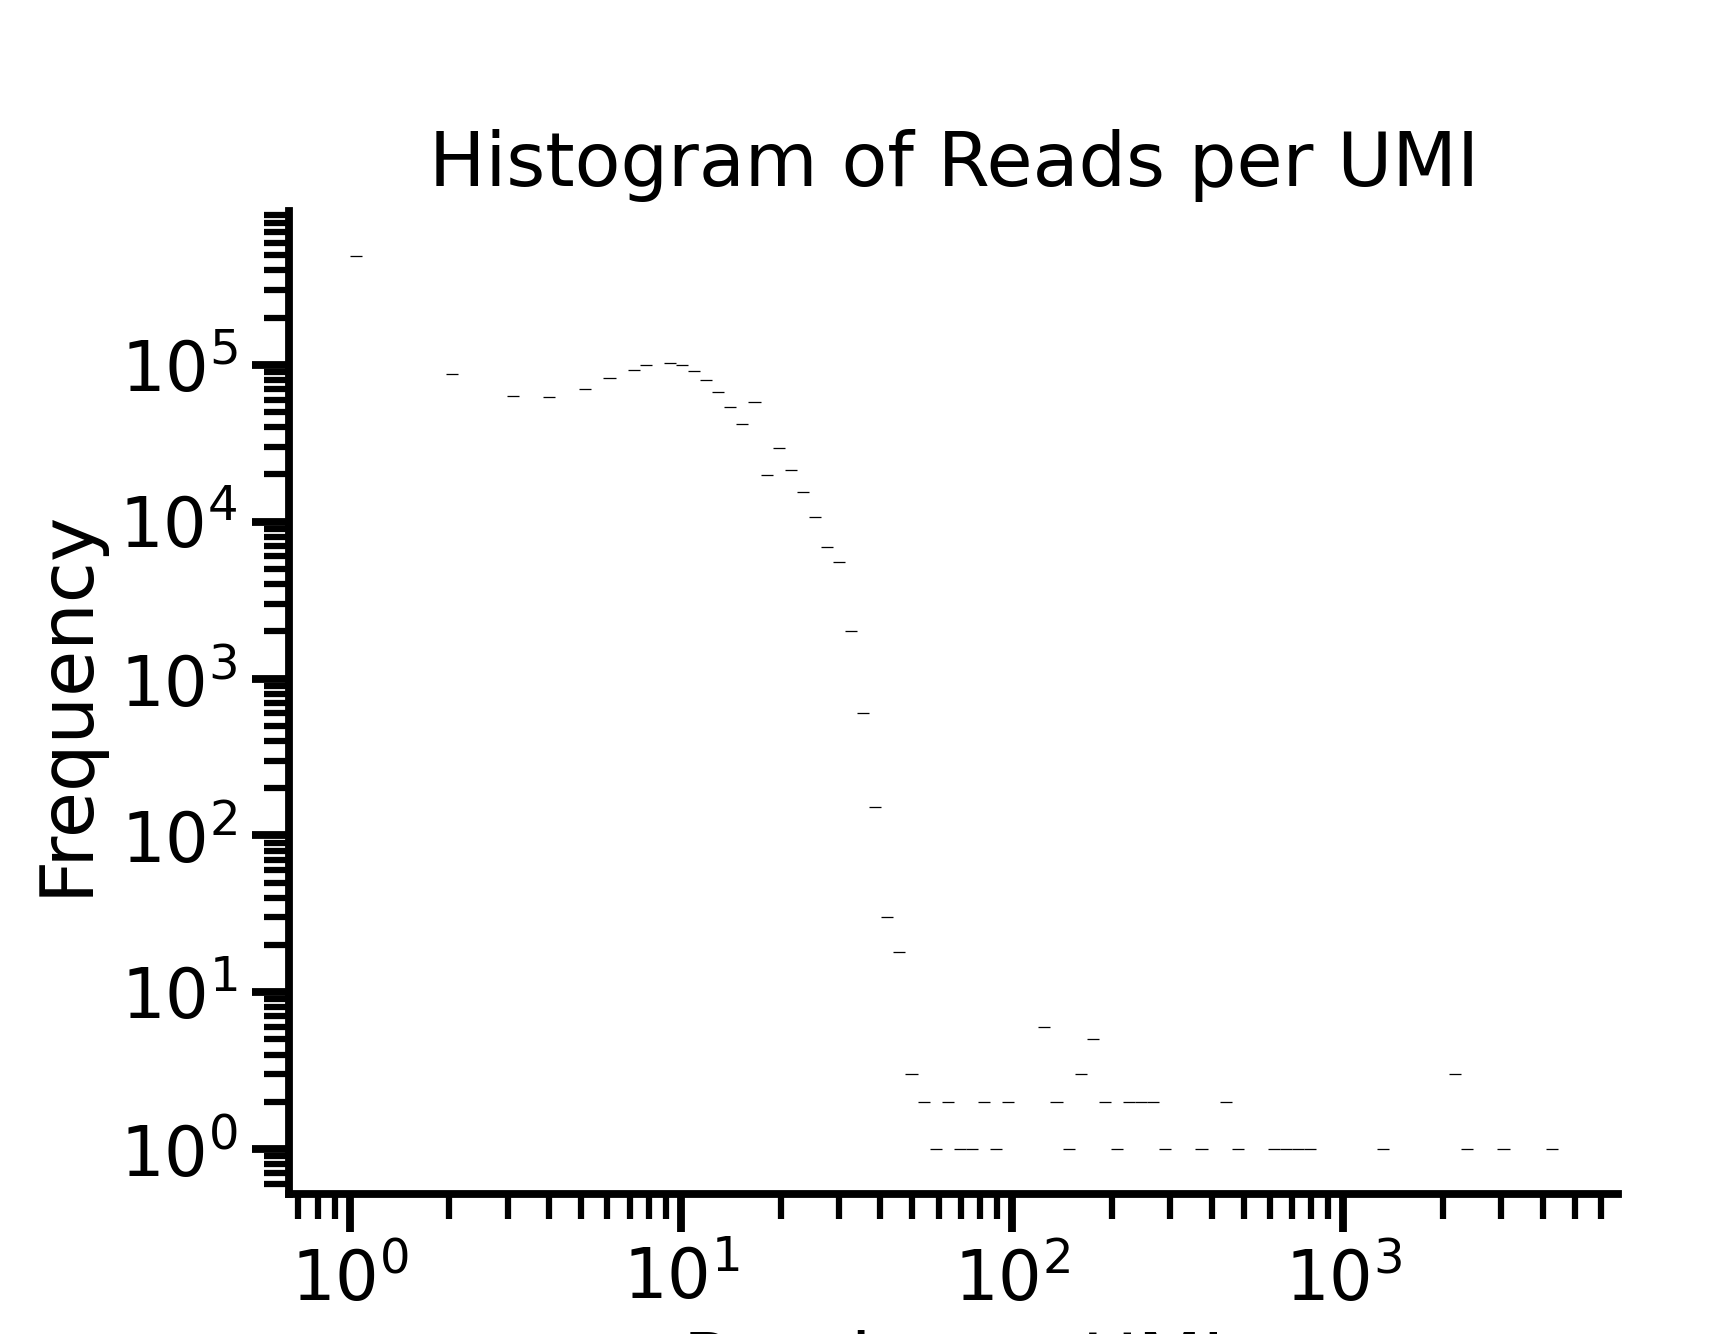

<Figure size 1800x1200 with 0 Axes>

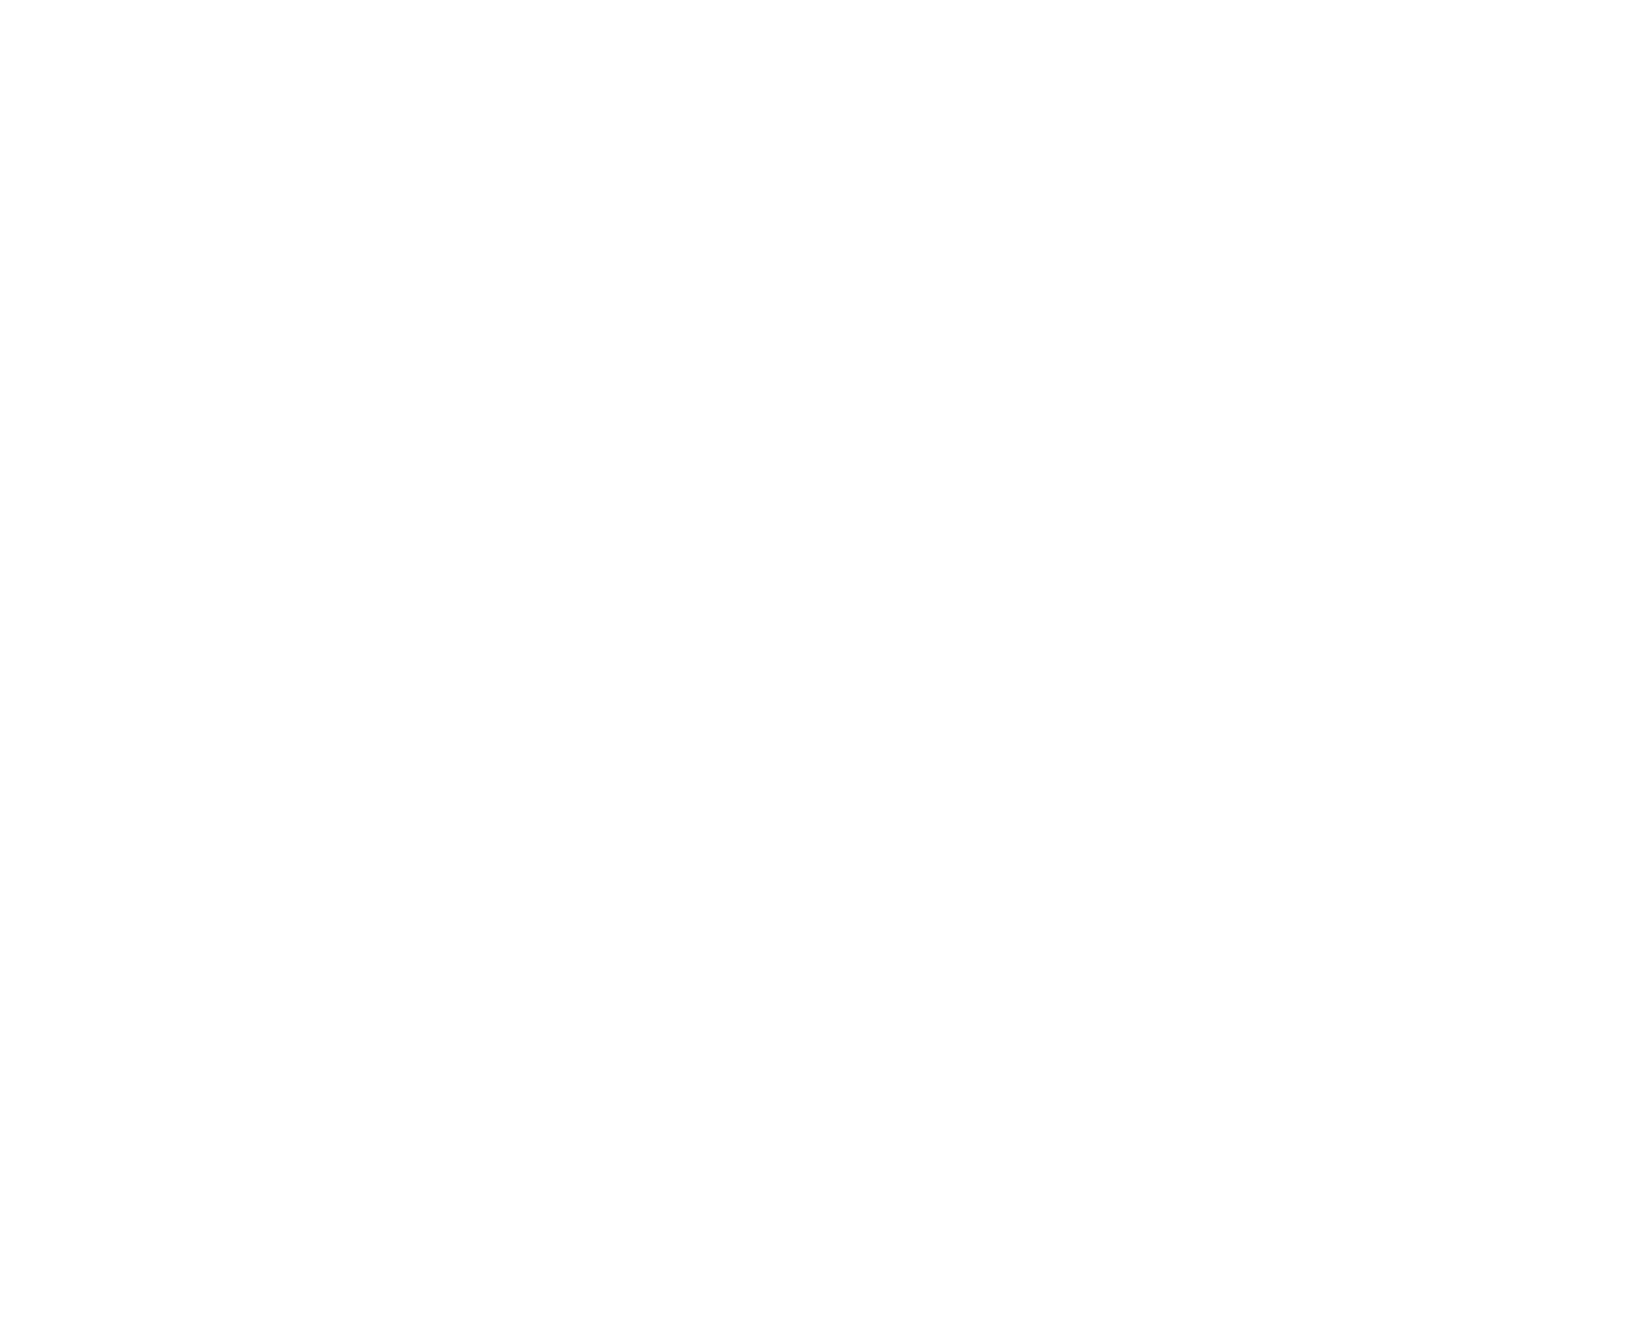

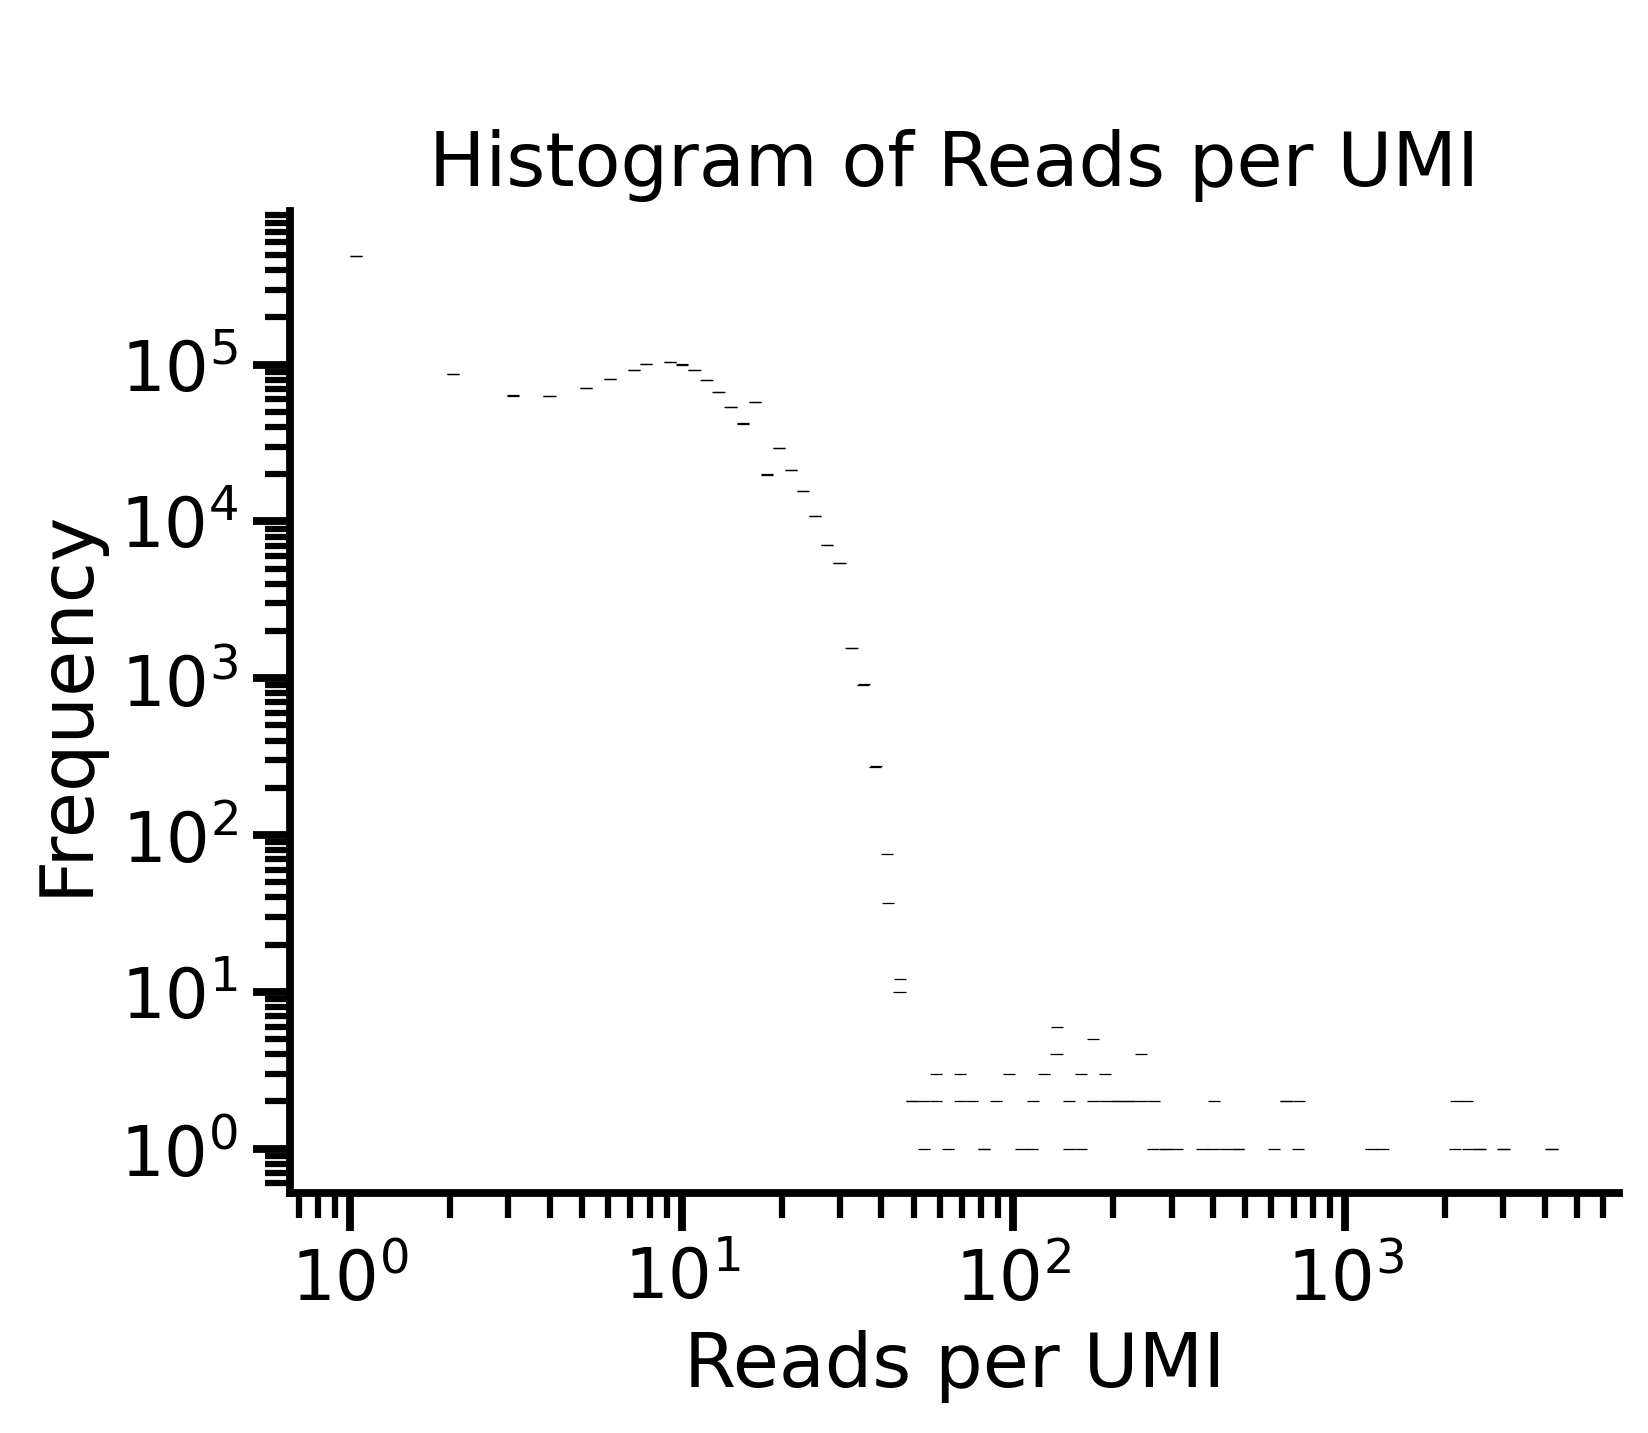

<Figure size 1800x1200 with 0 Axes>

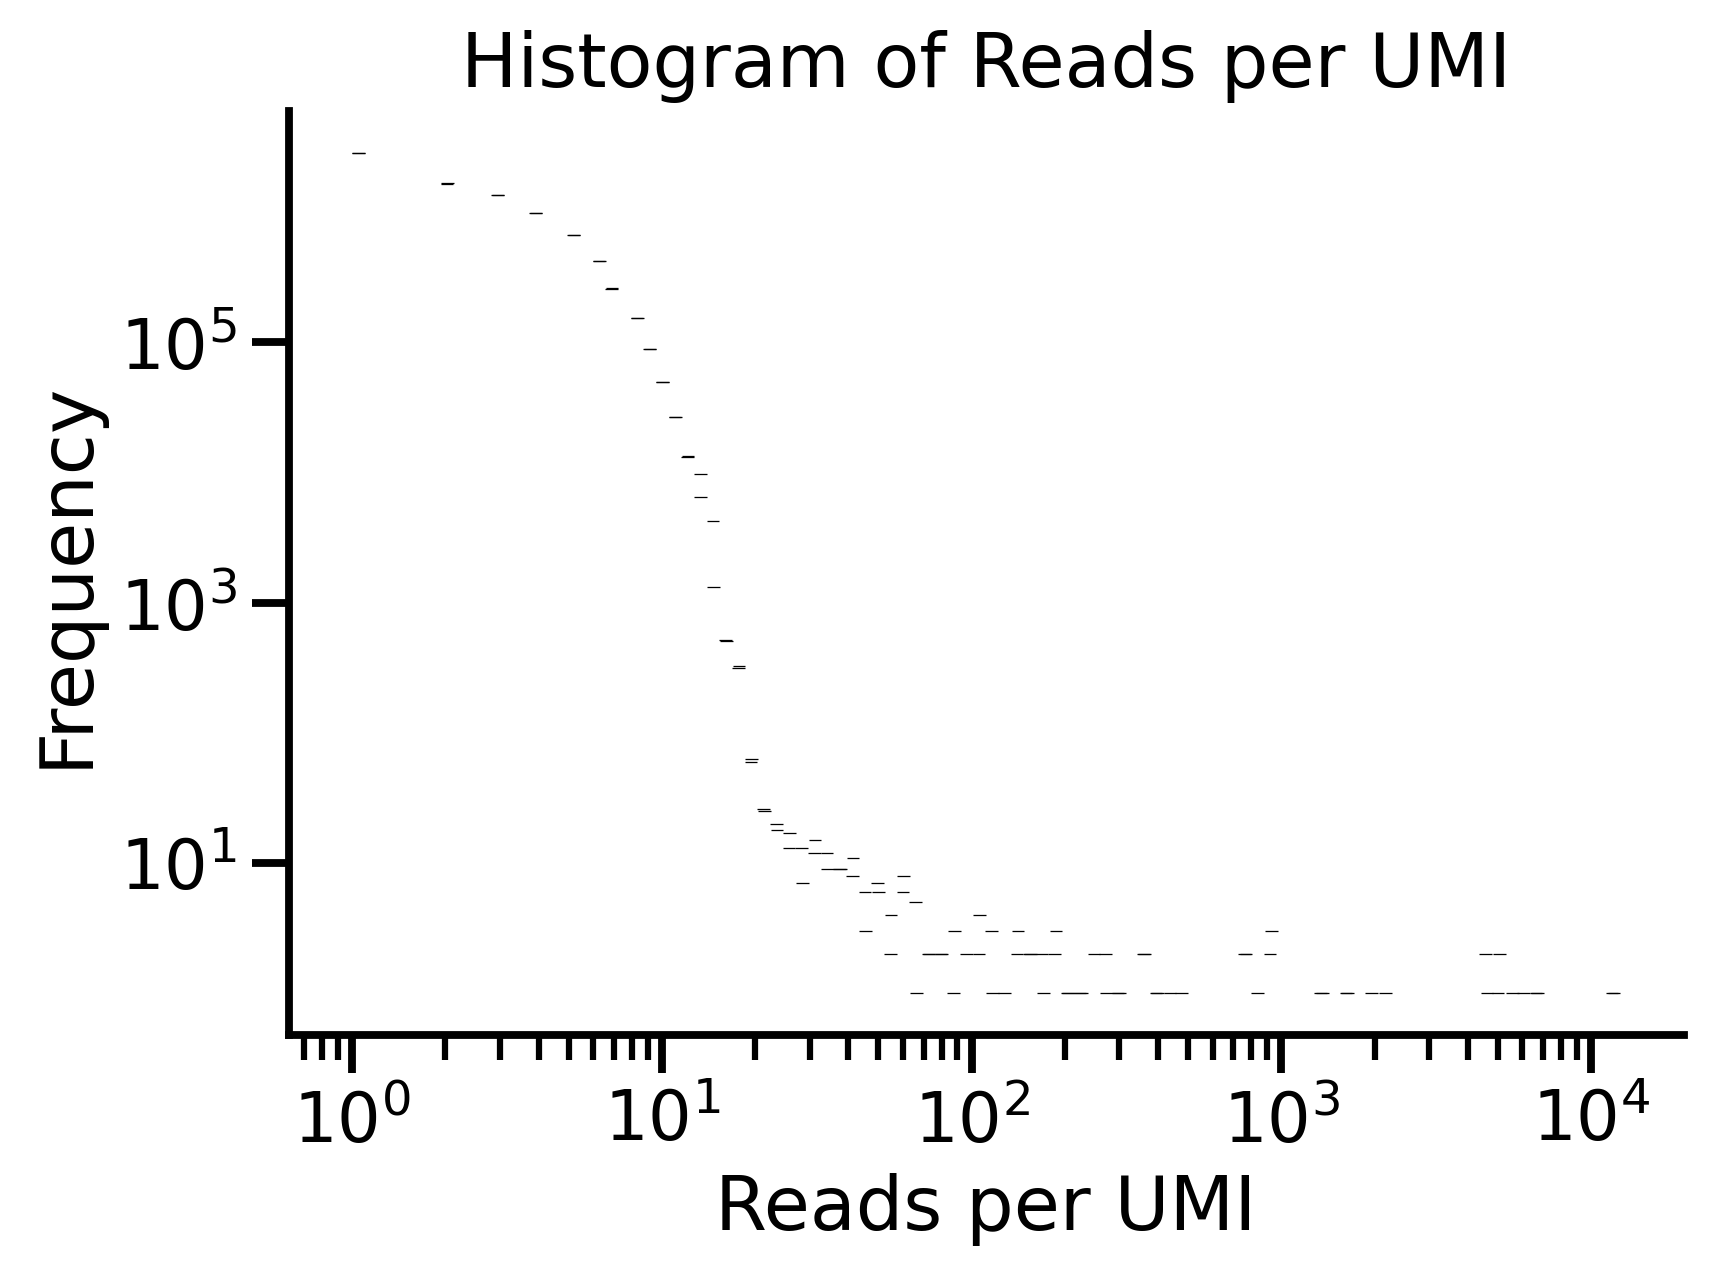

<Figure size 1800x1200 with 0 Axes>

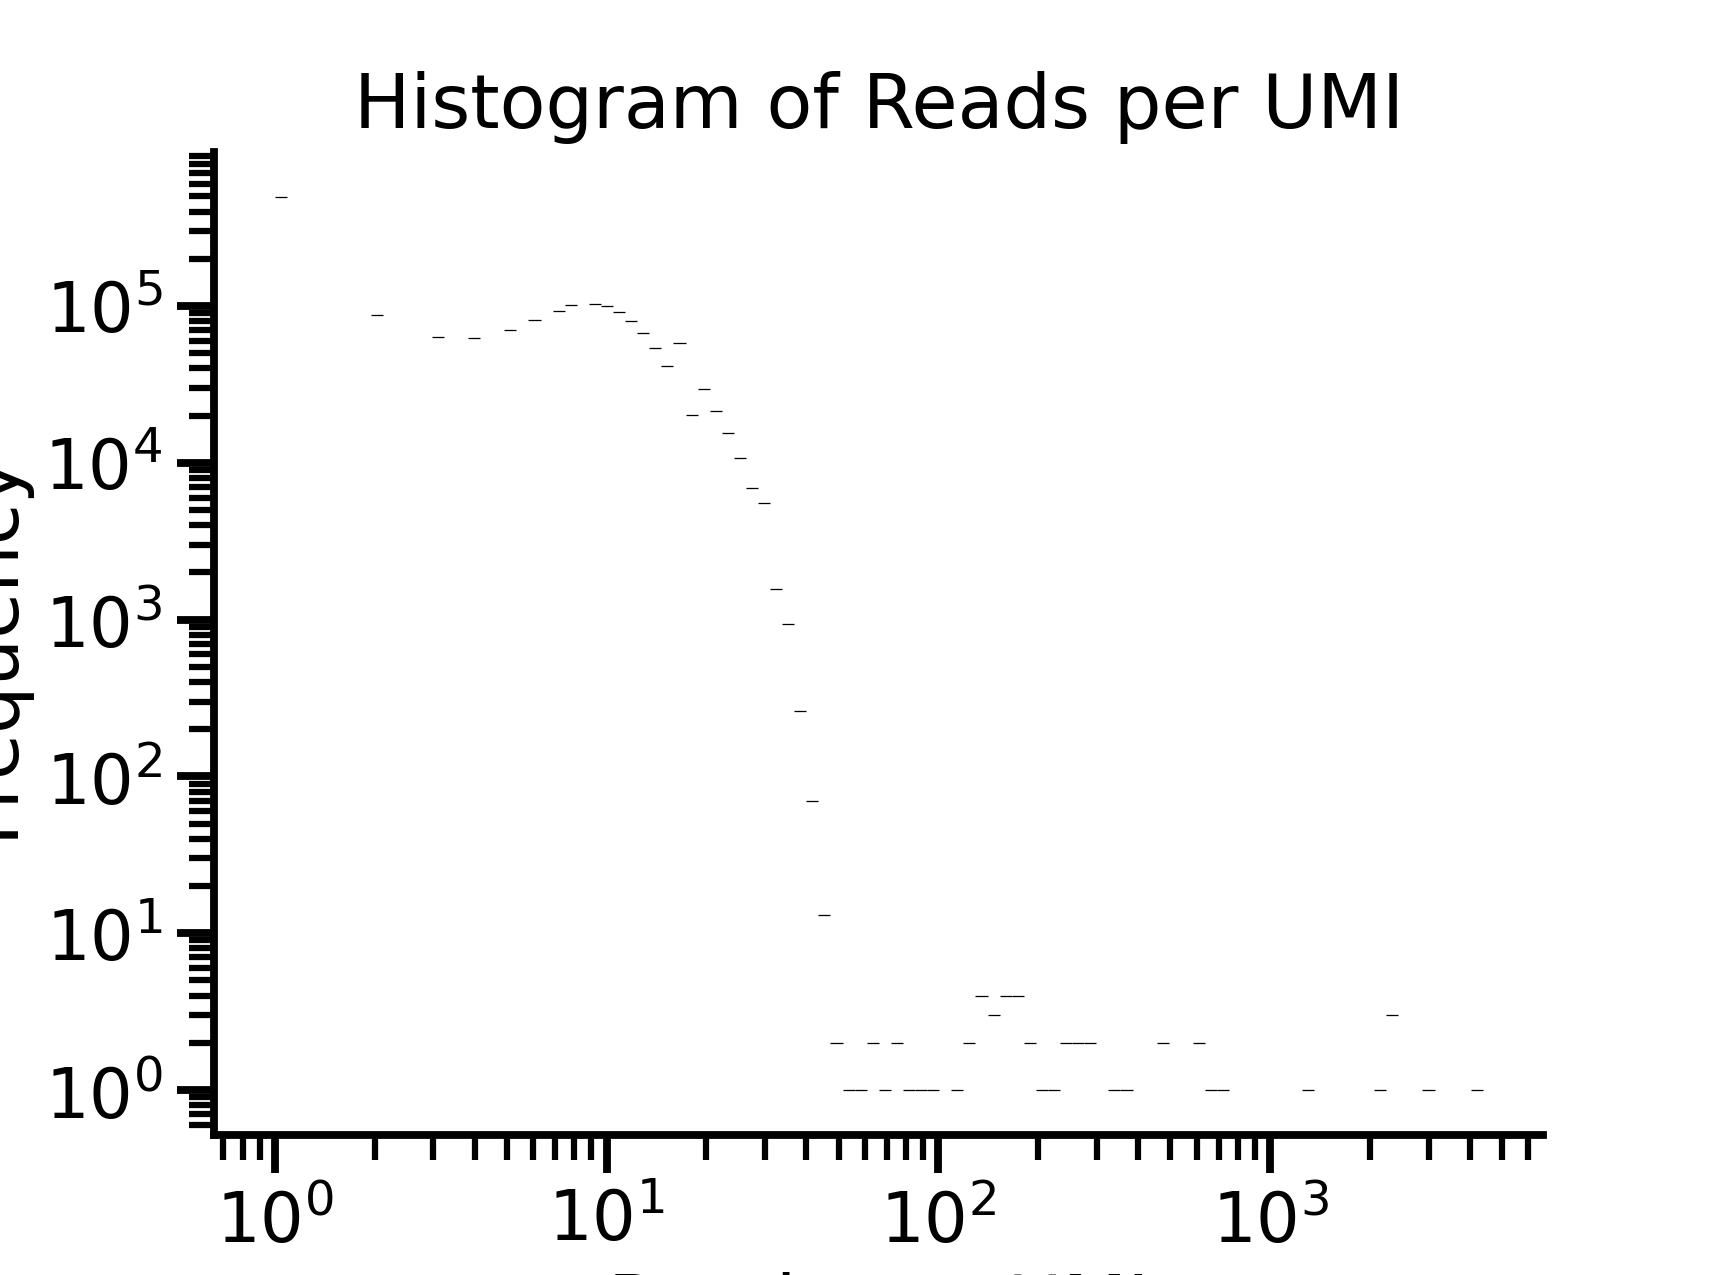

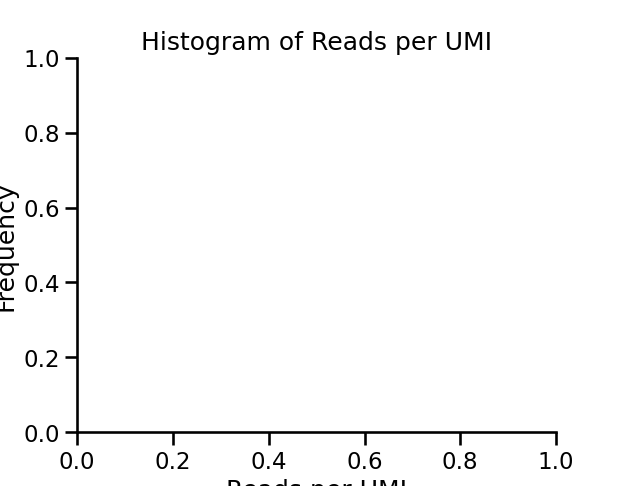

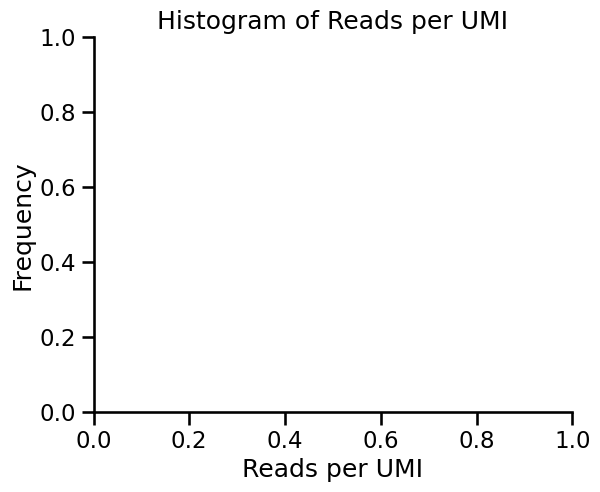

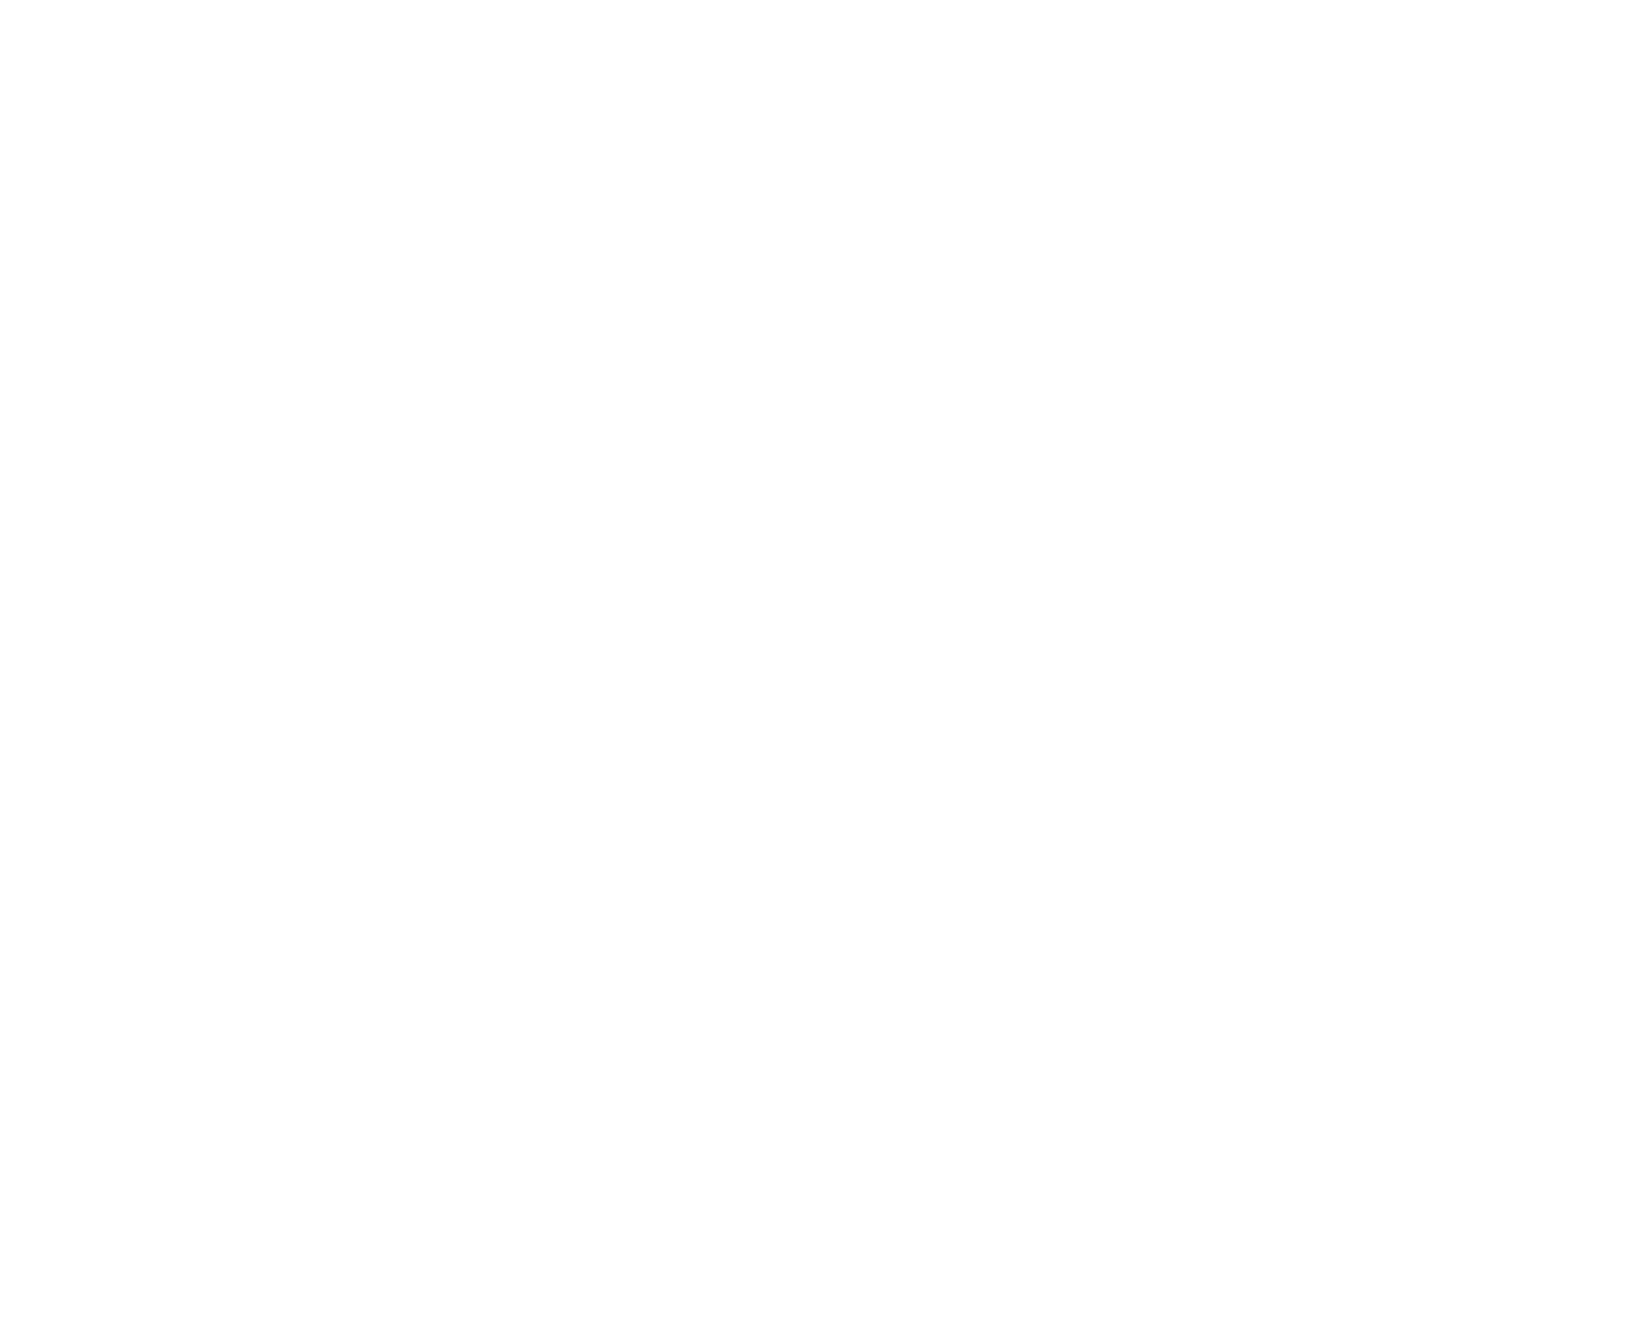

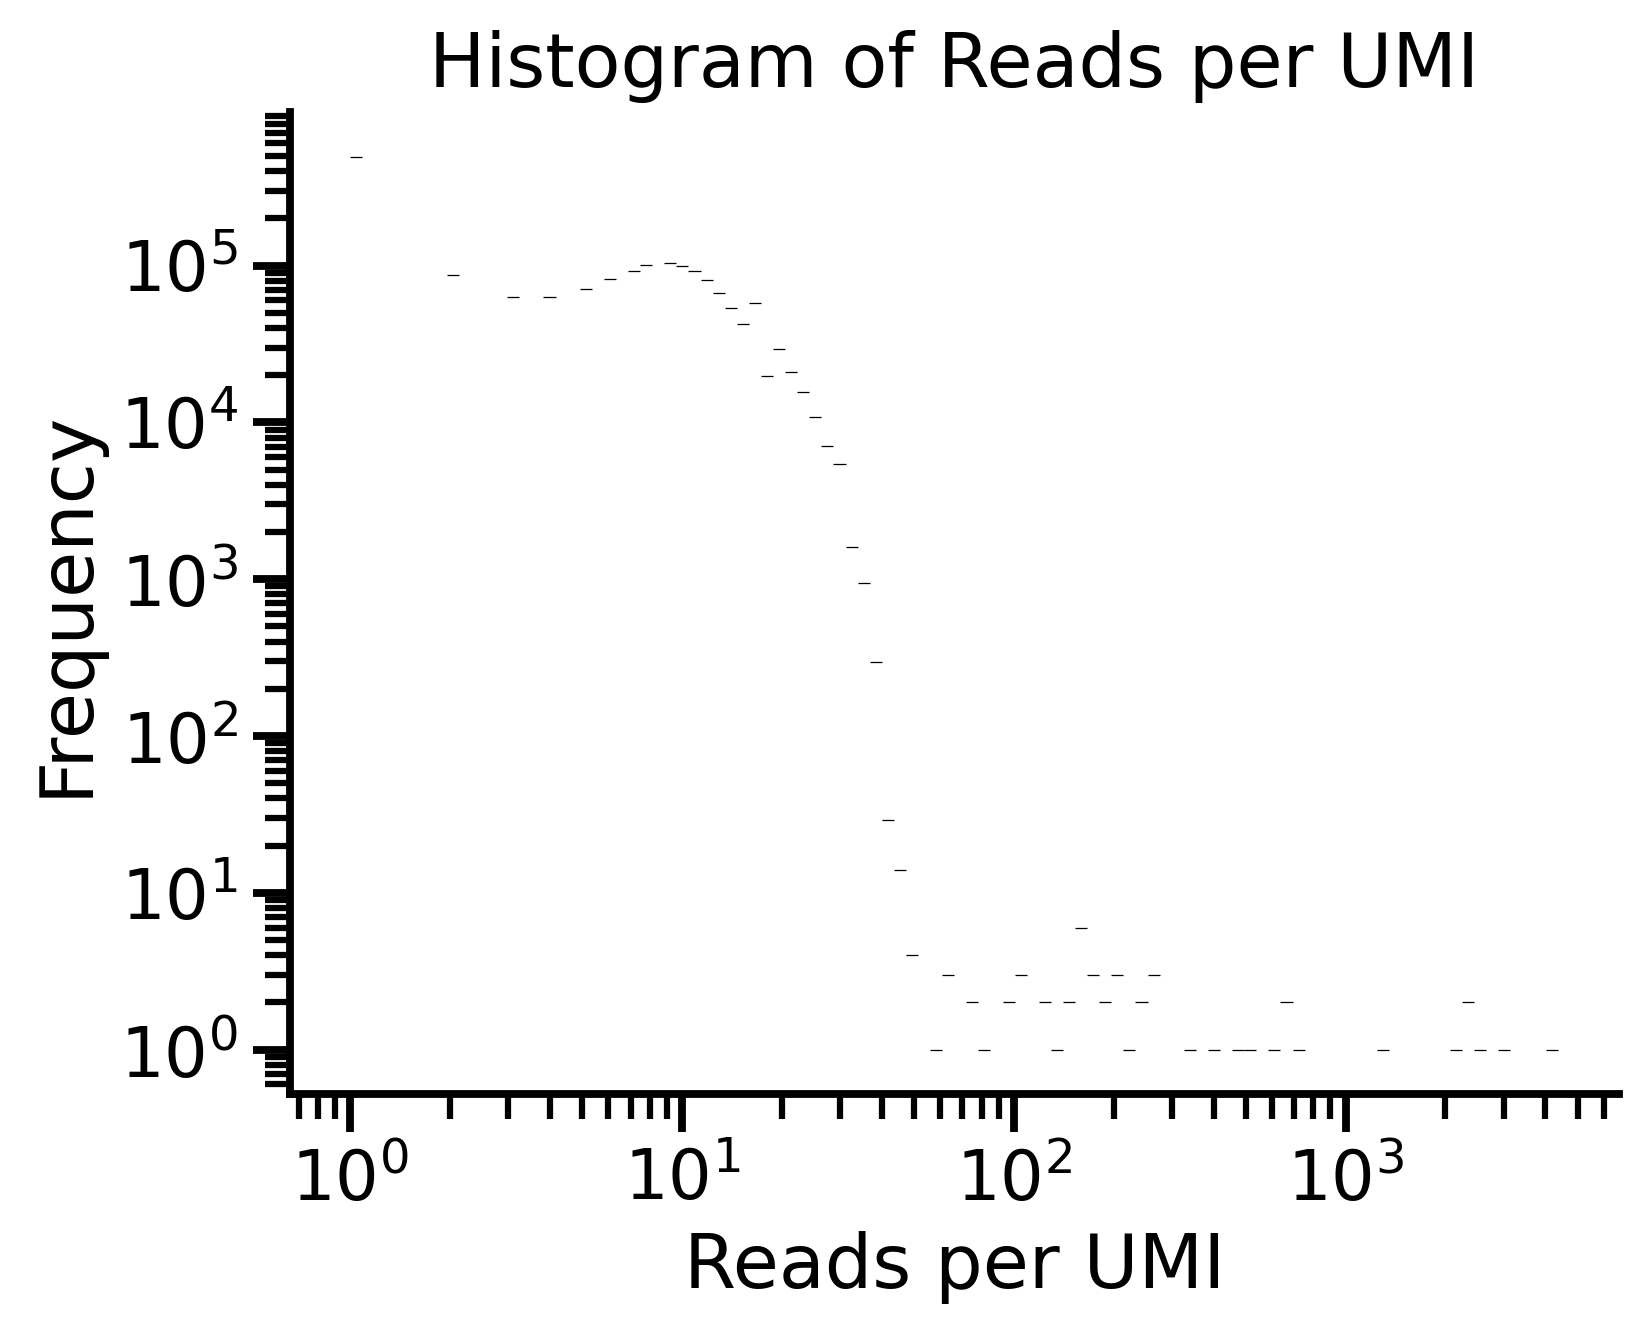

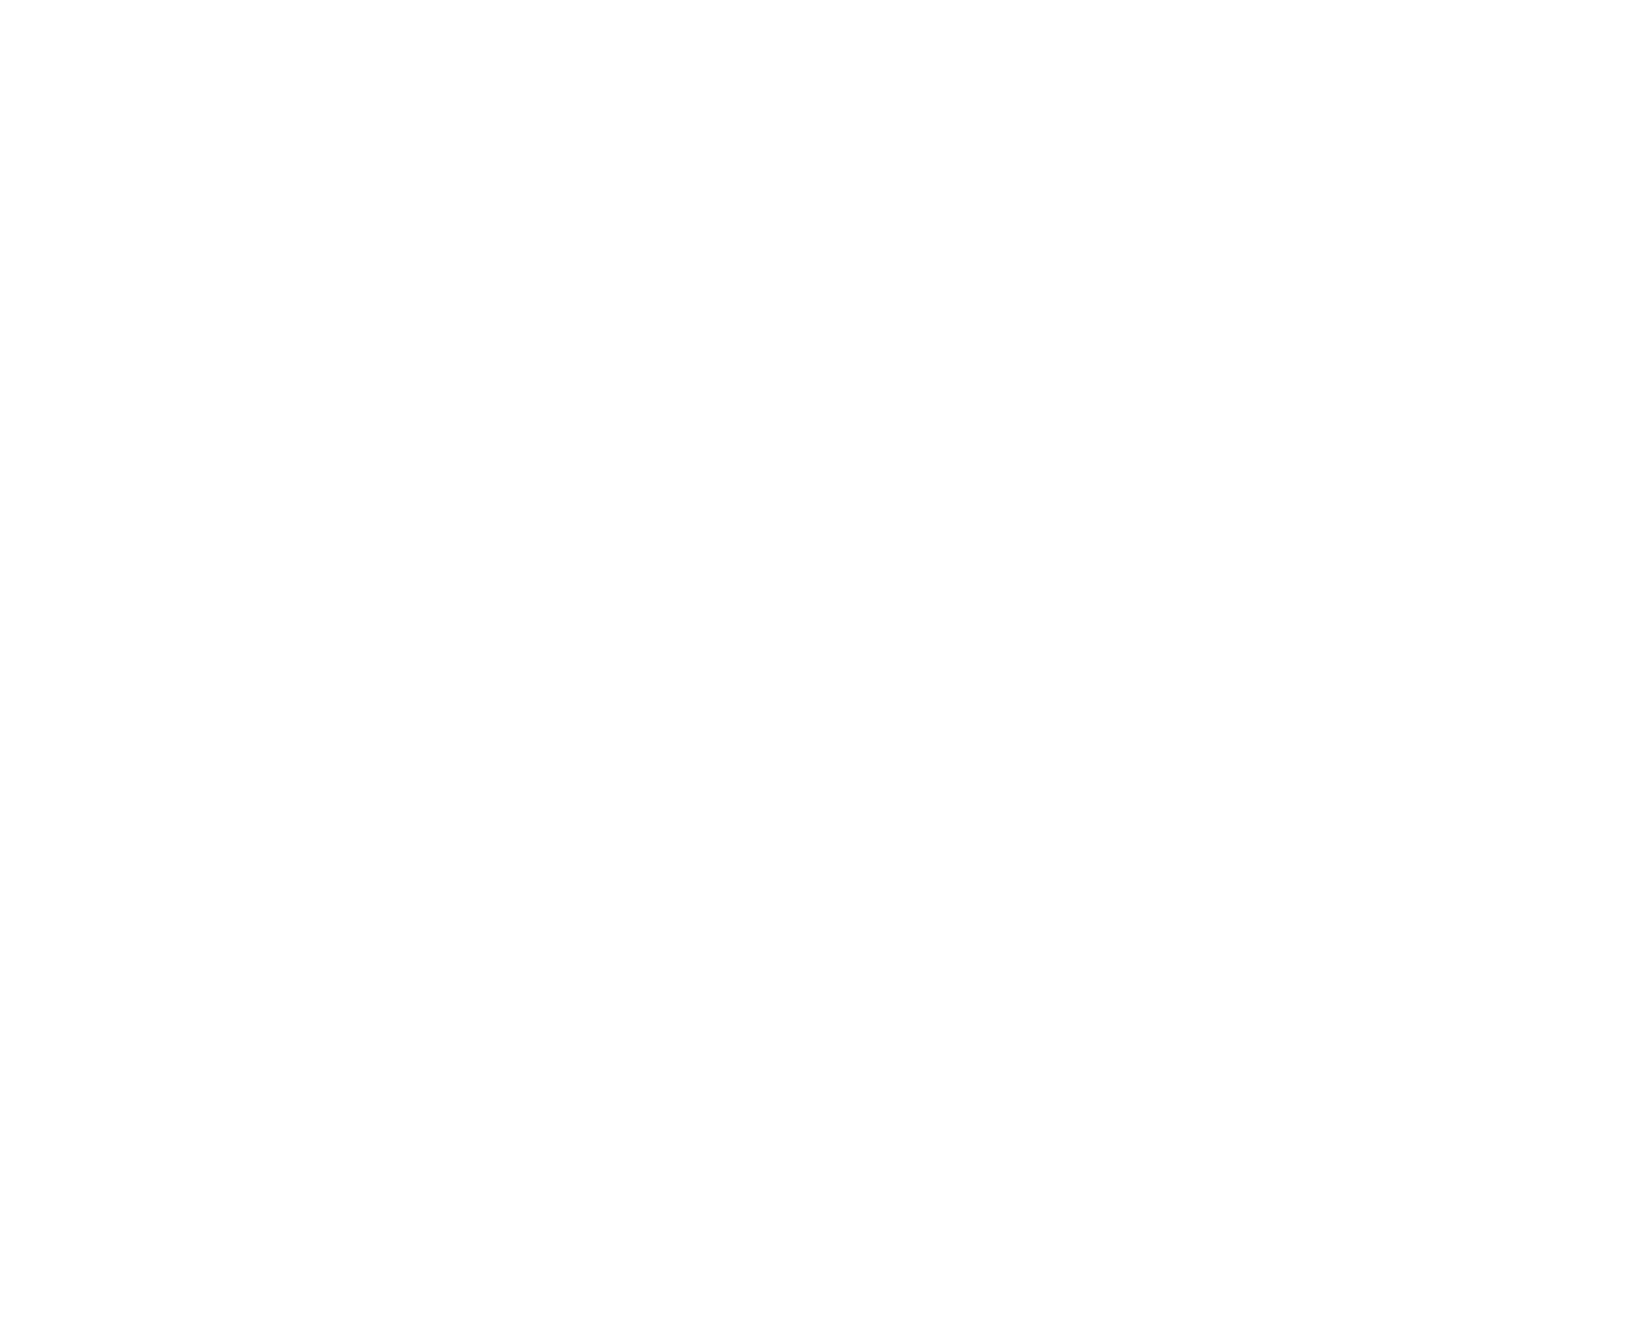

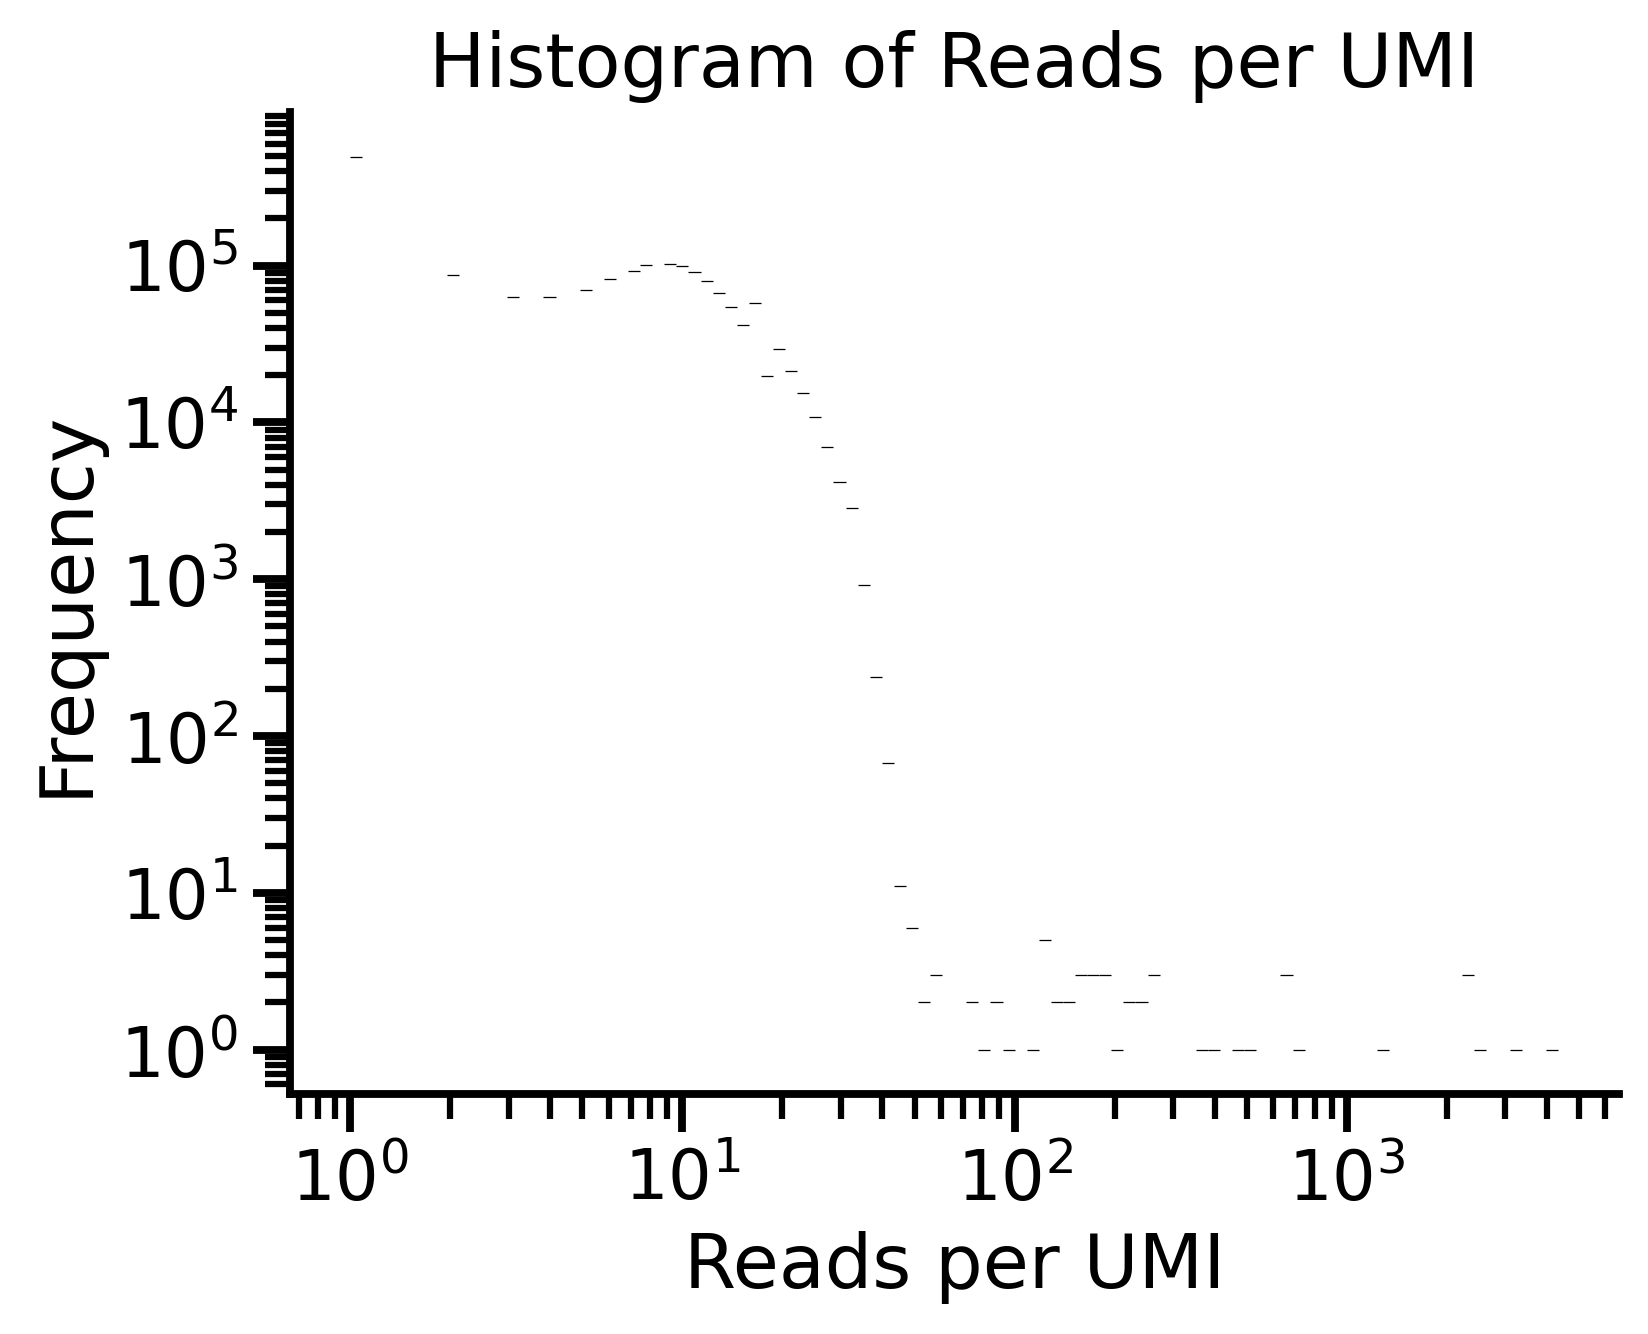

  2%|▏         | 2/113 [00:40<37:24, 20.22s/it]

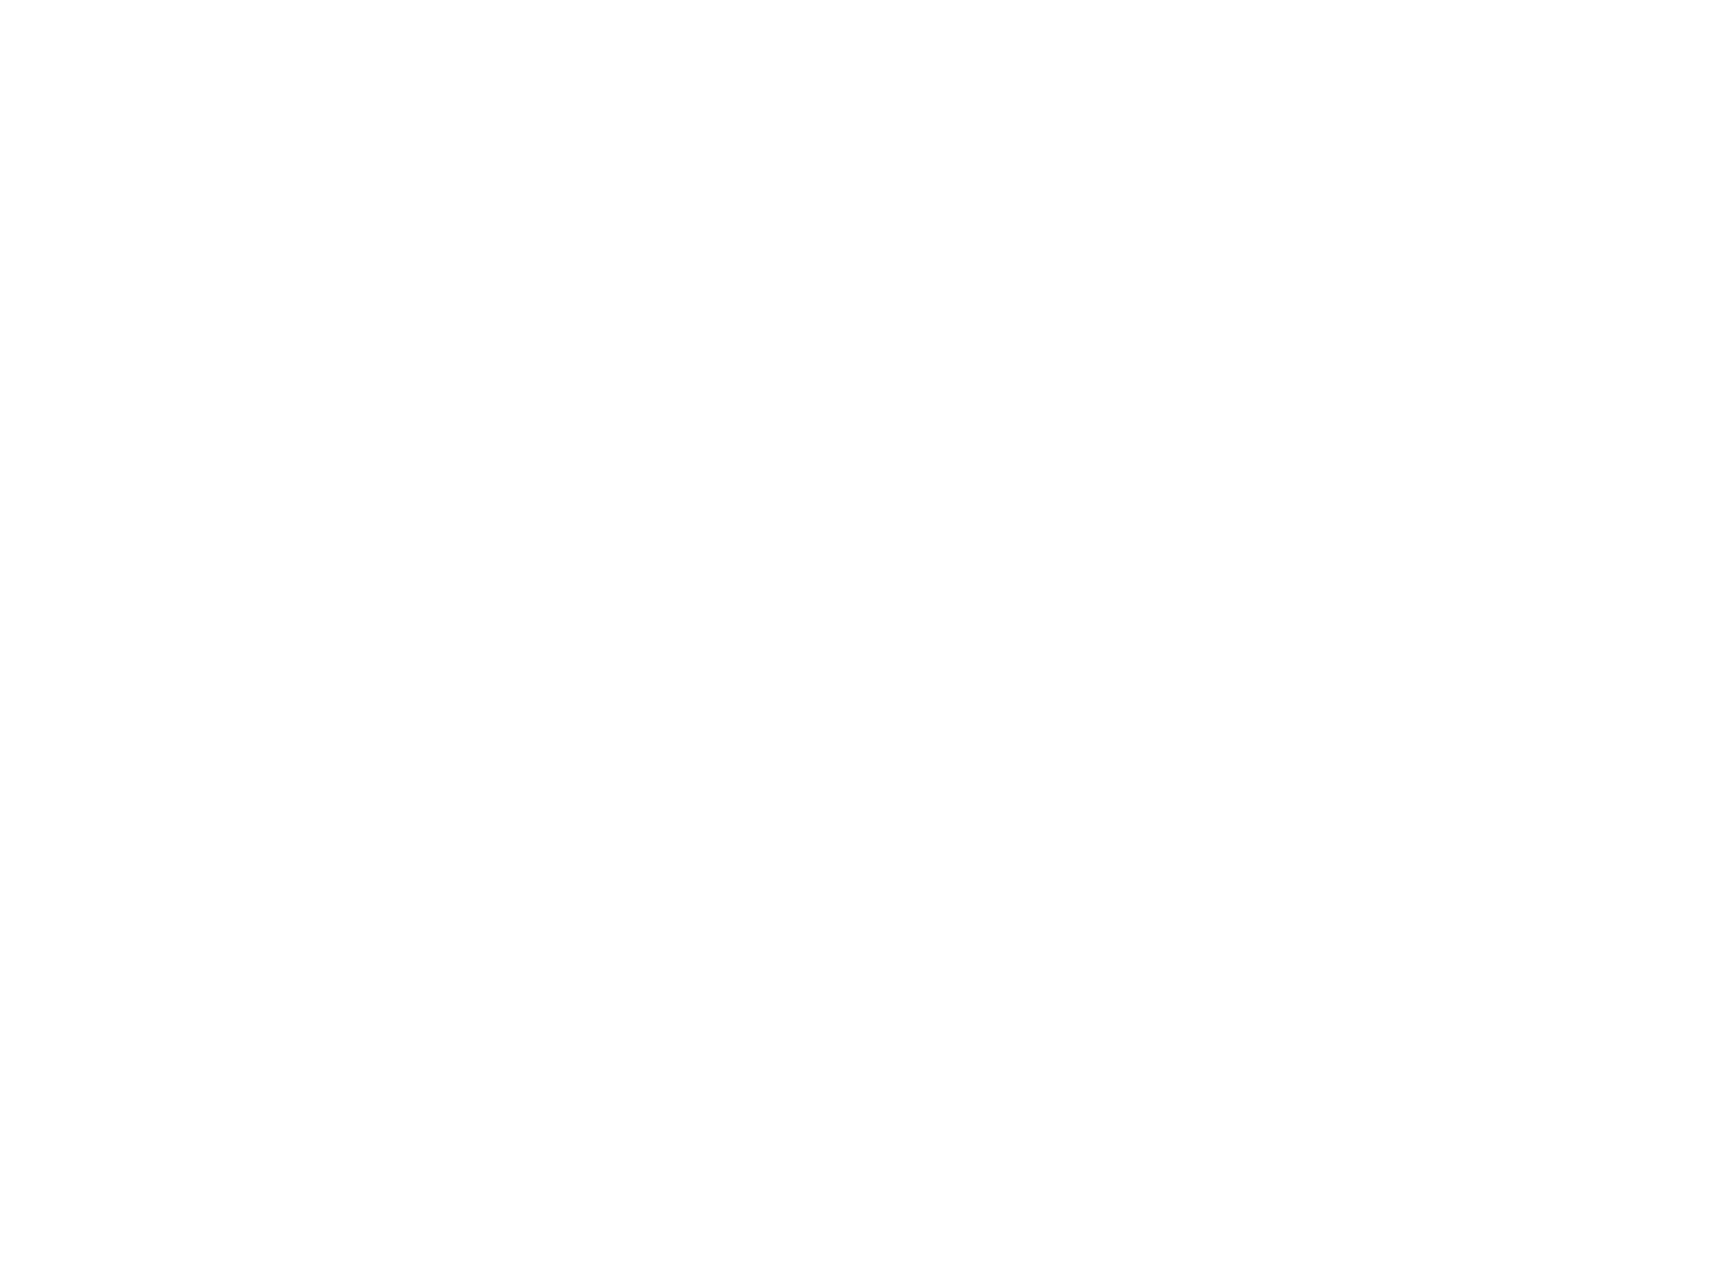

 24%|██▍       | 27/113 [00:50<02:04,  1.44s/it]

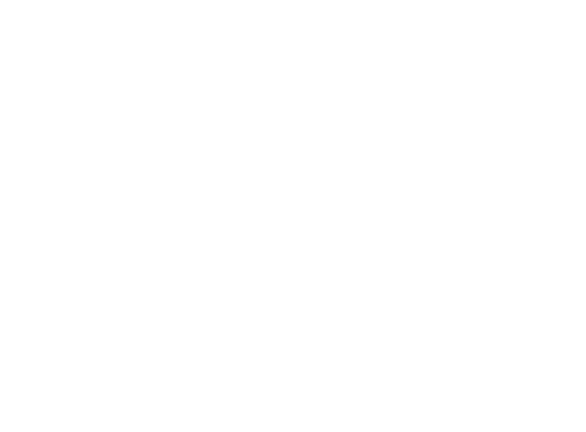

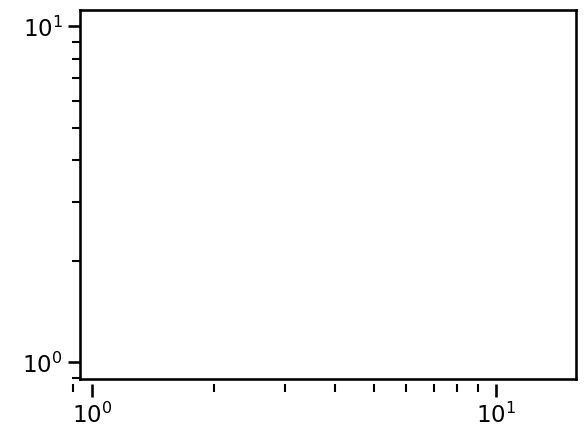

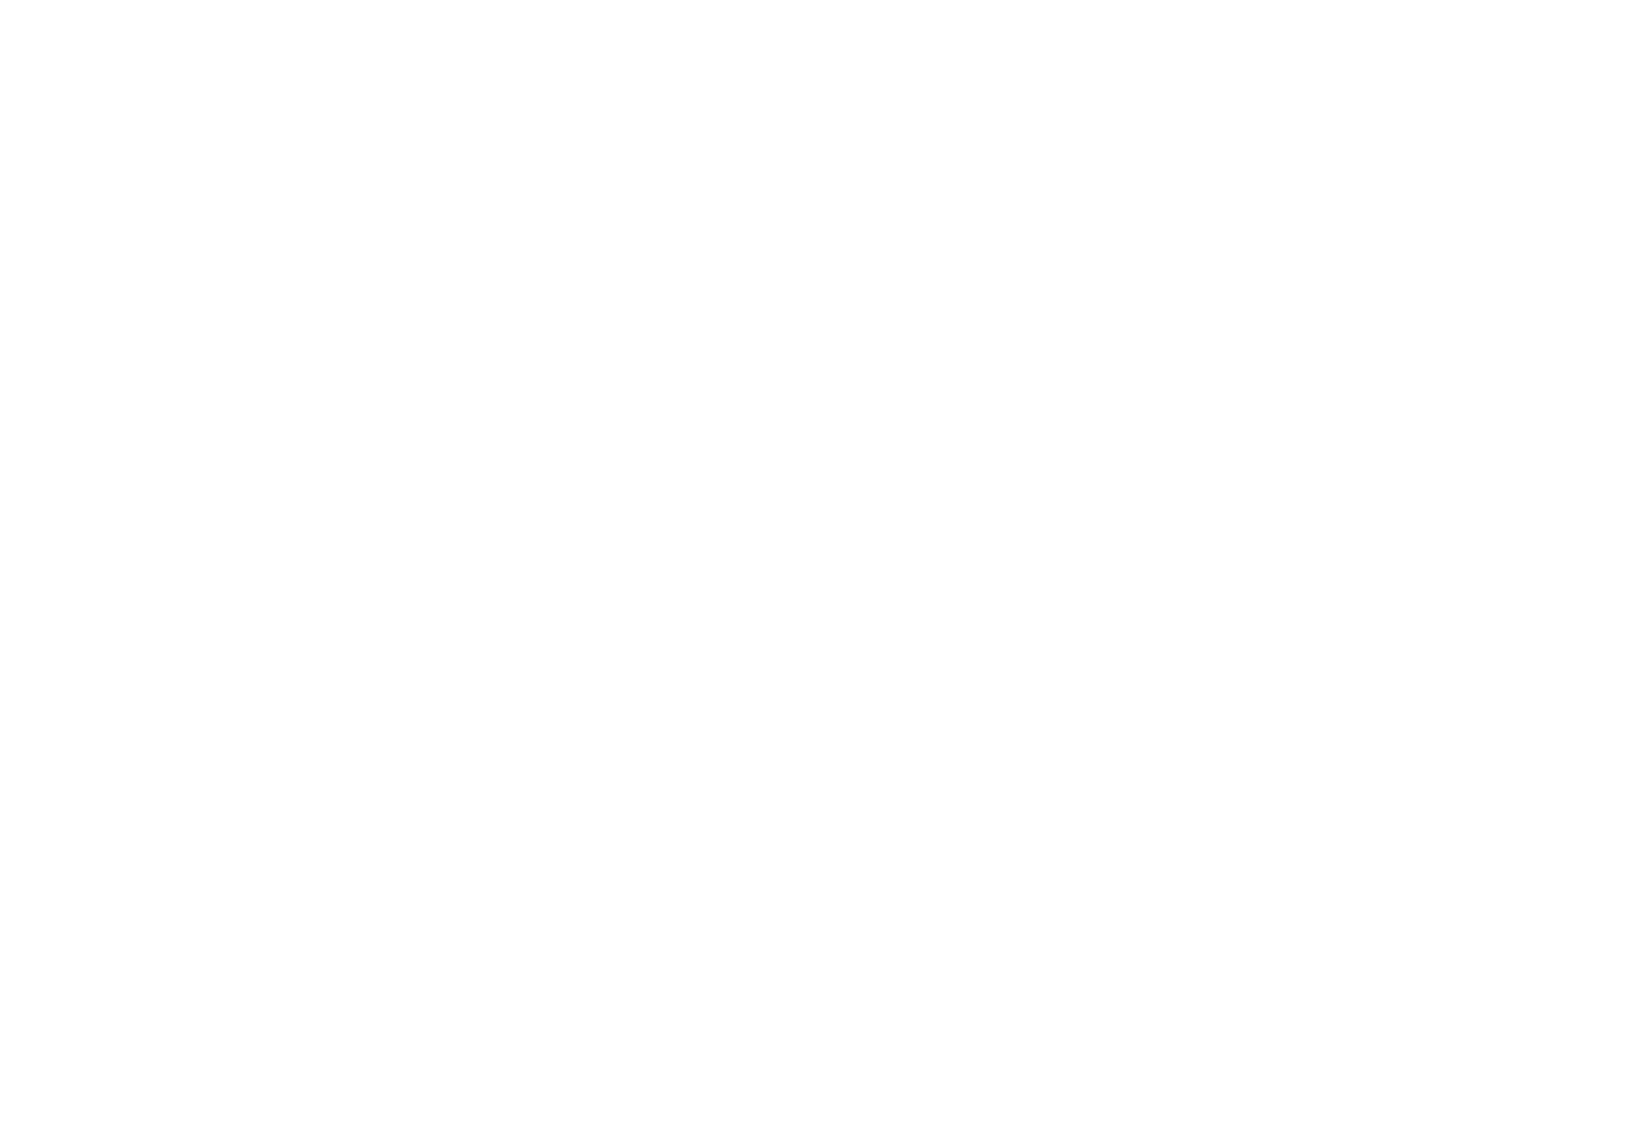

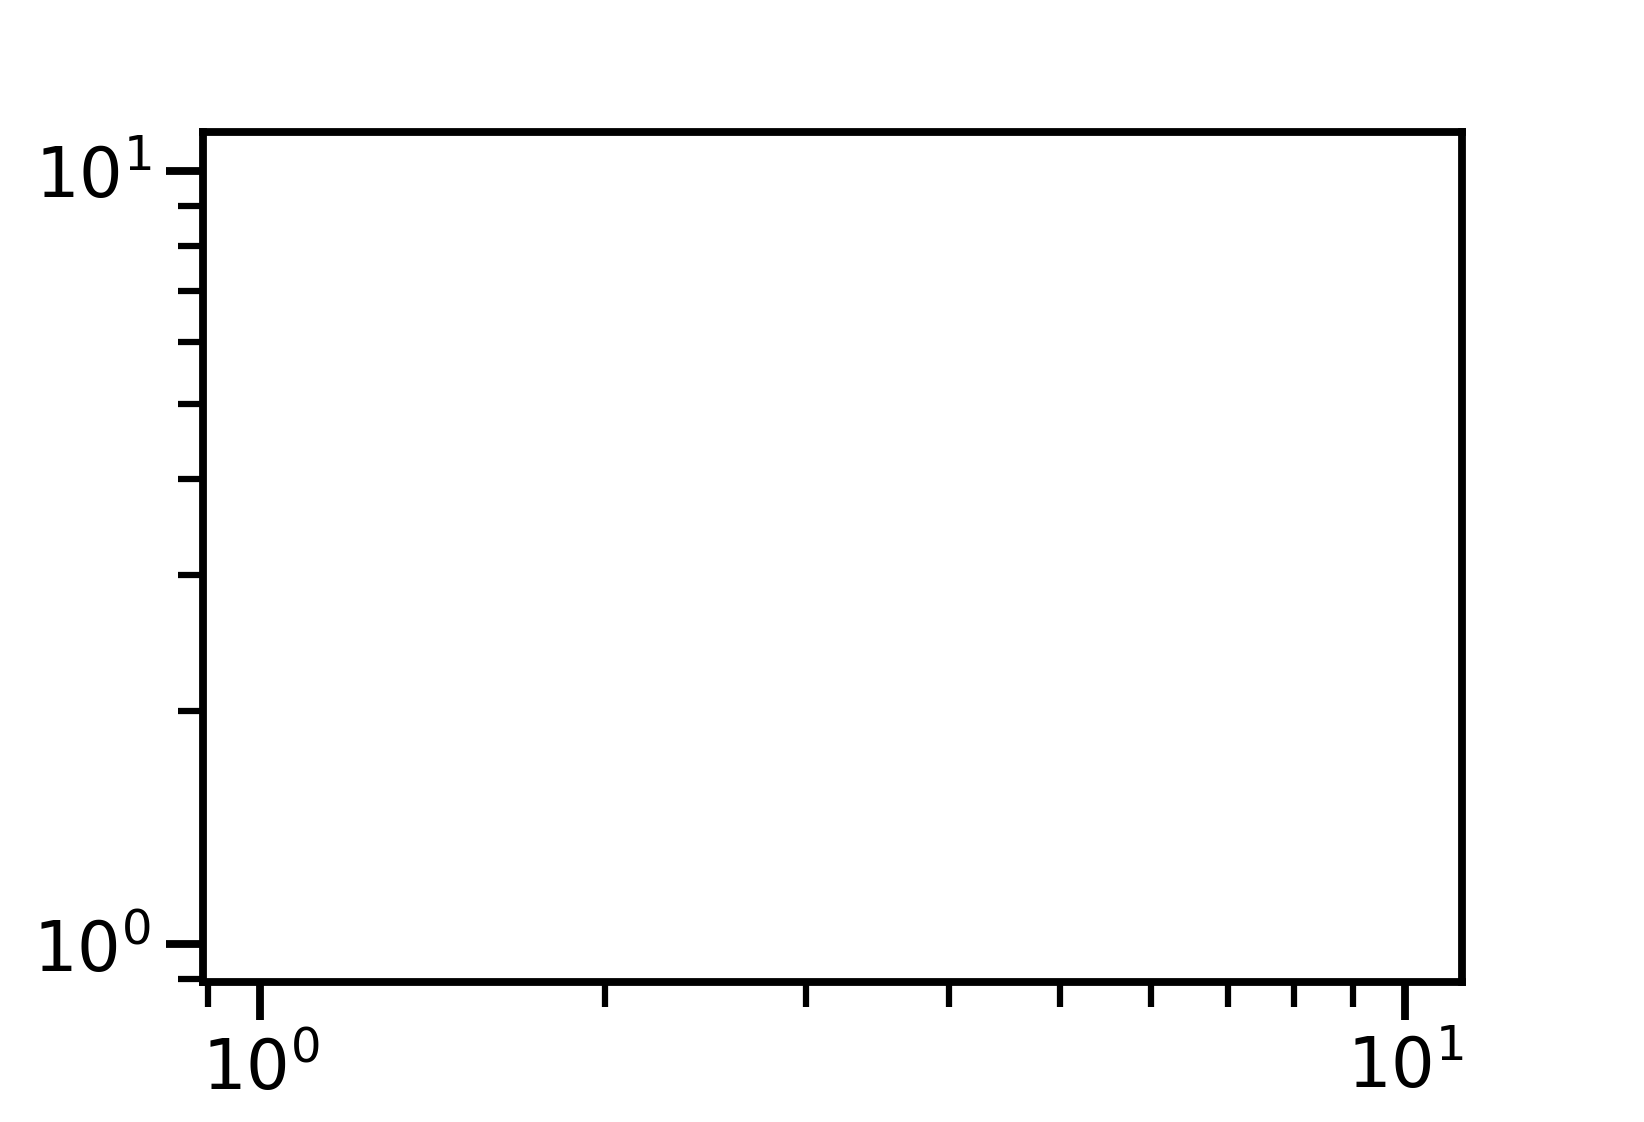

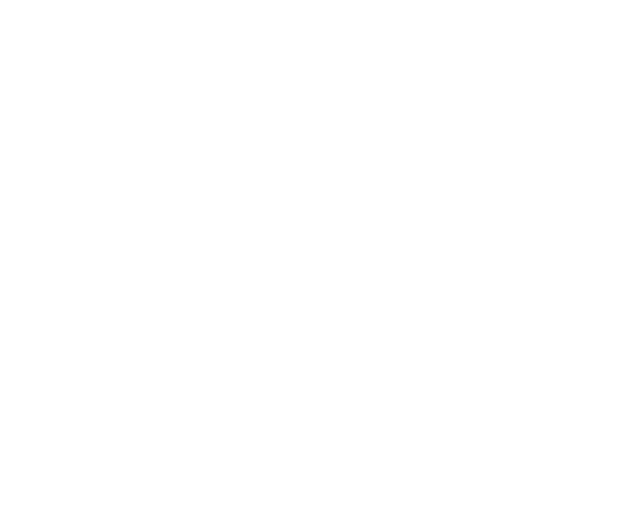

<Figure size 1800x1200 with 0 Axes>

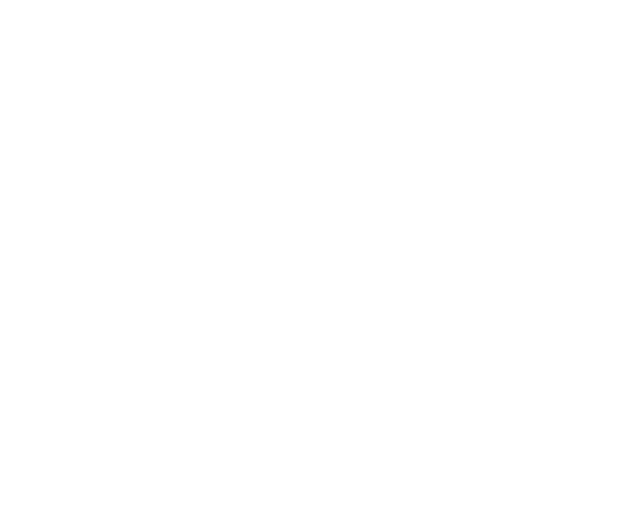

<Figure size 1800x1200 with 0 Axes>

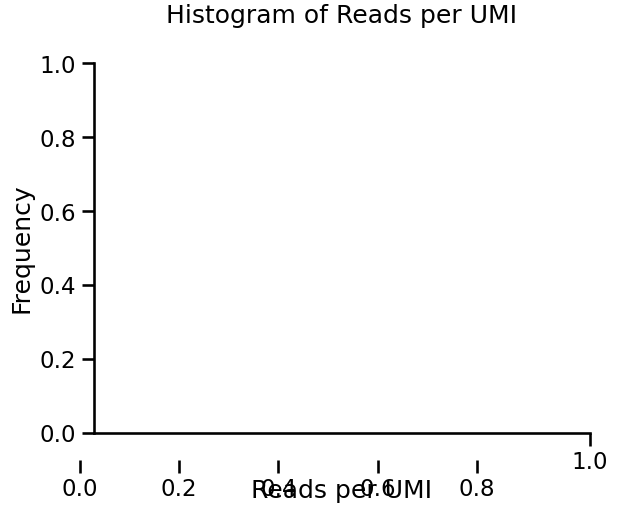

<Figure size 1800x1200 with 0 Axes>

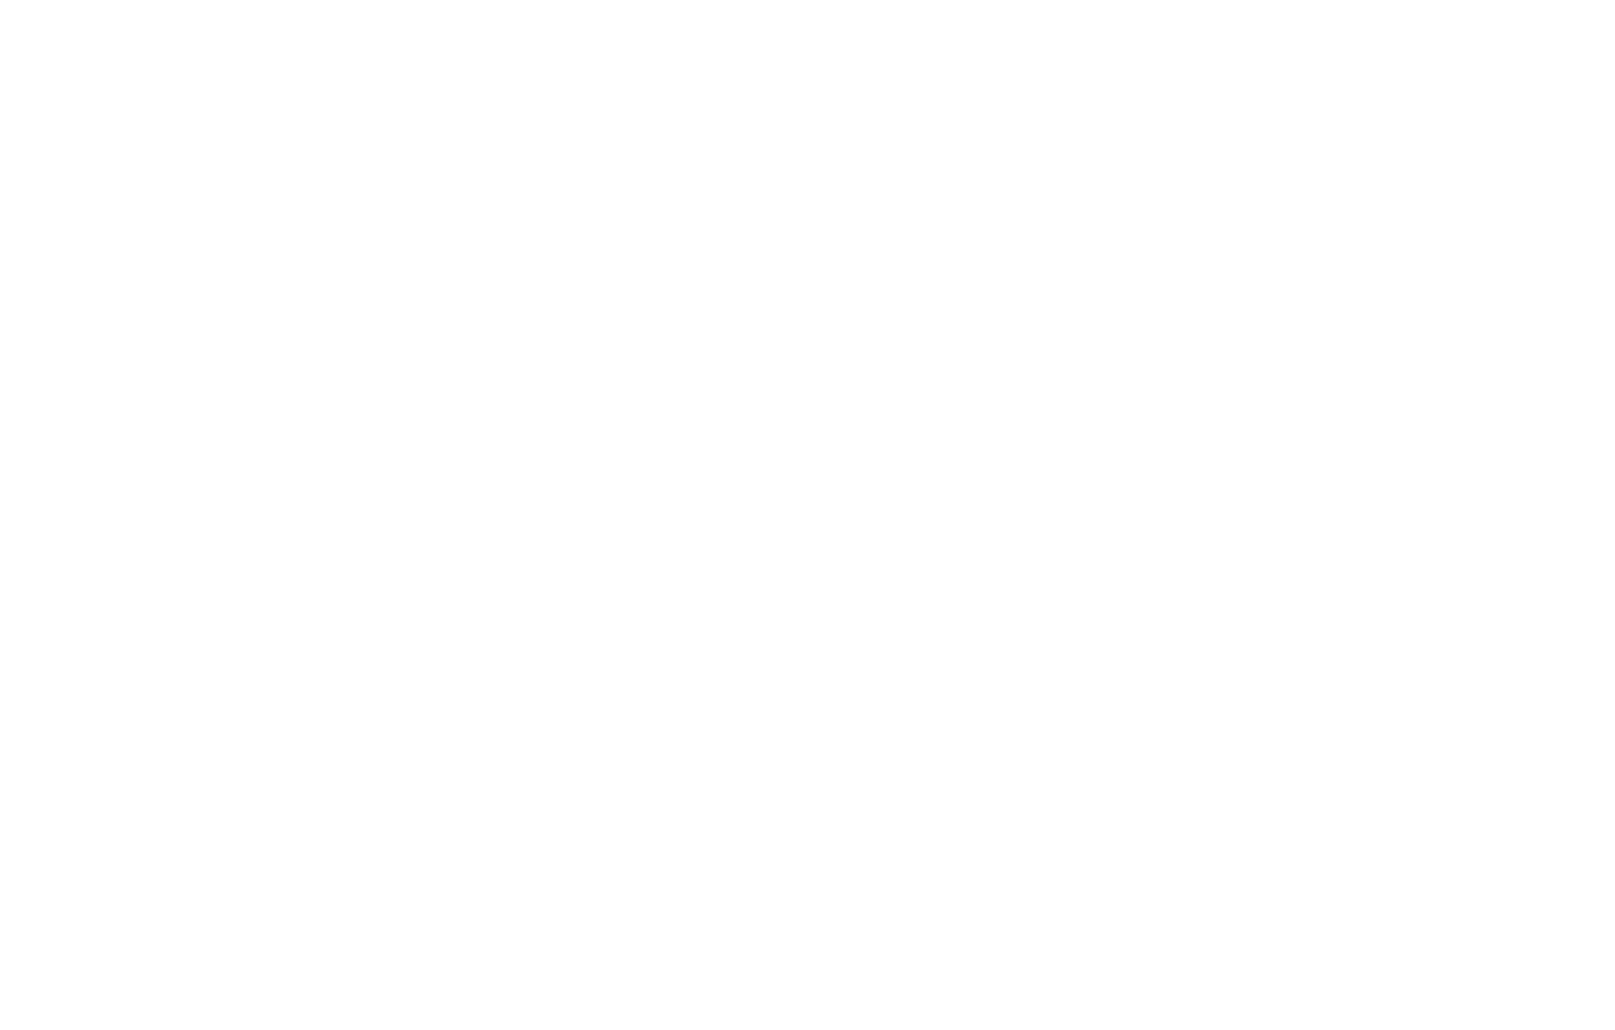

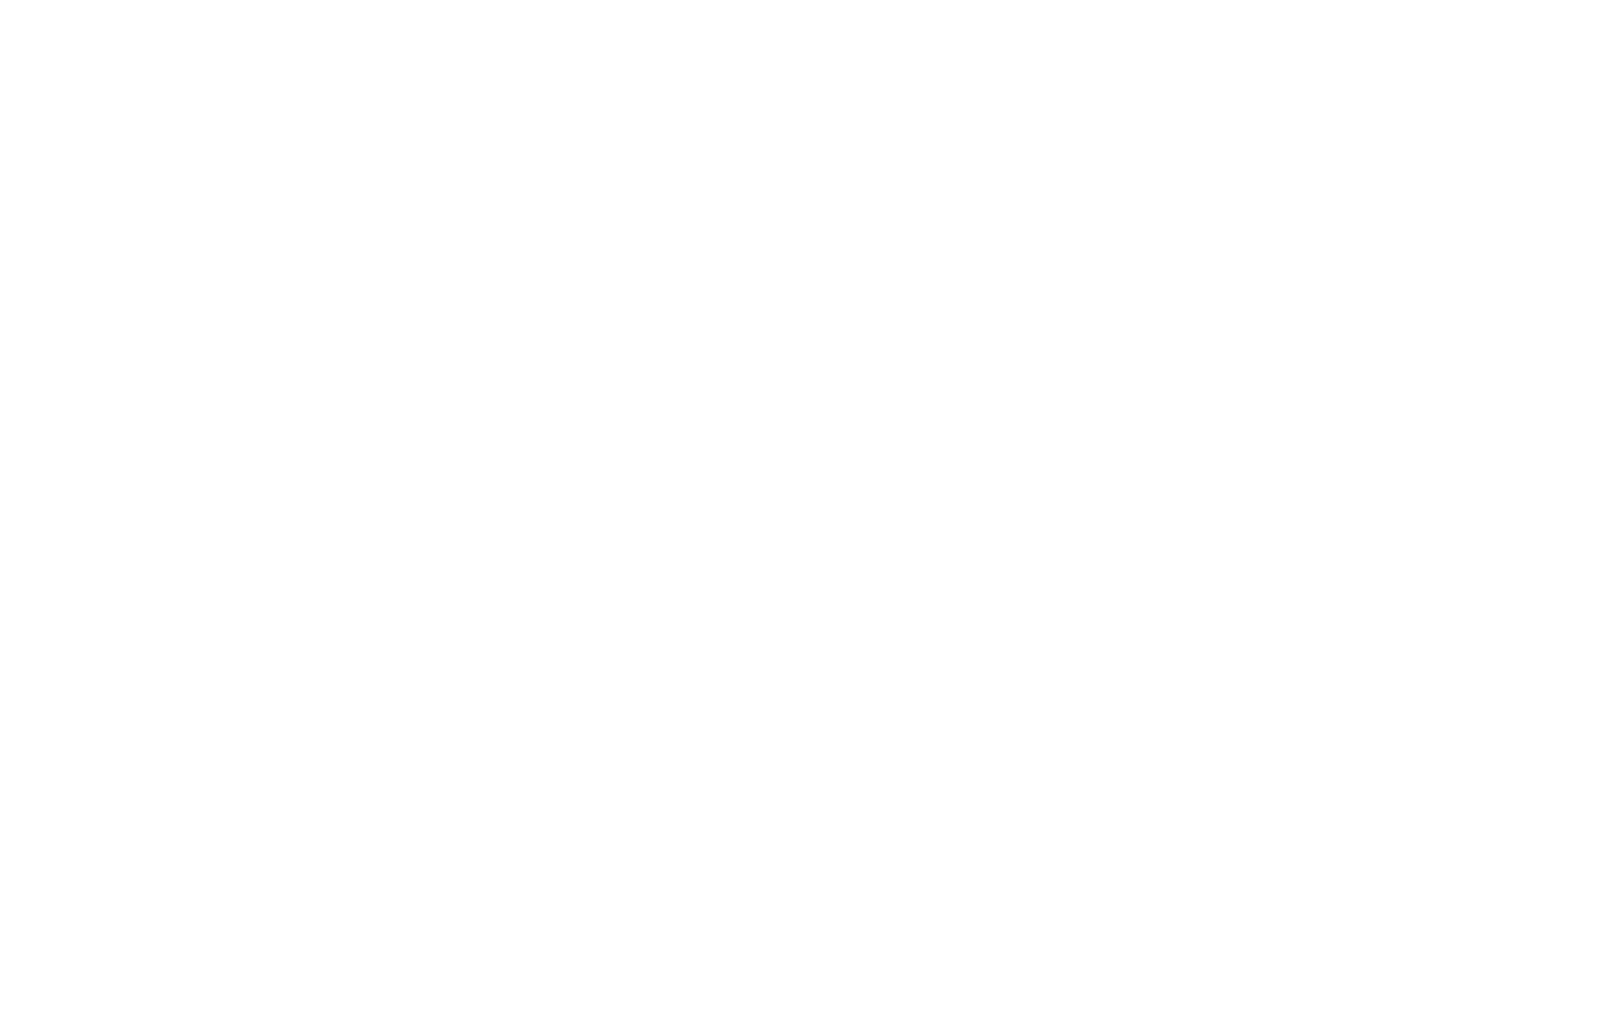

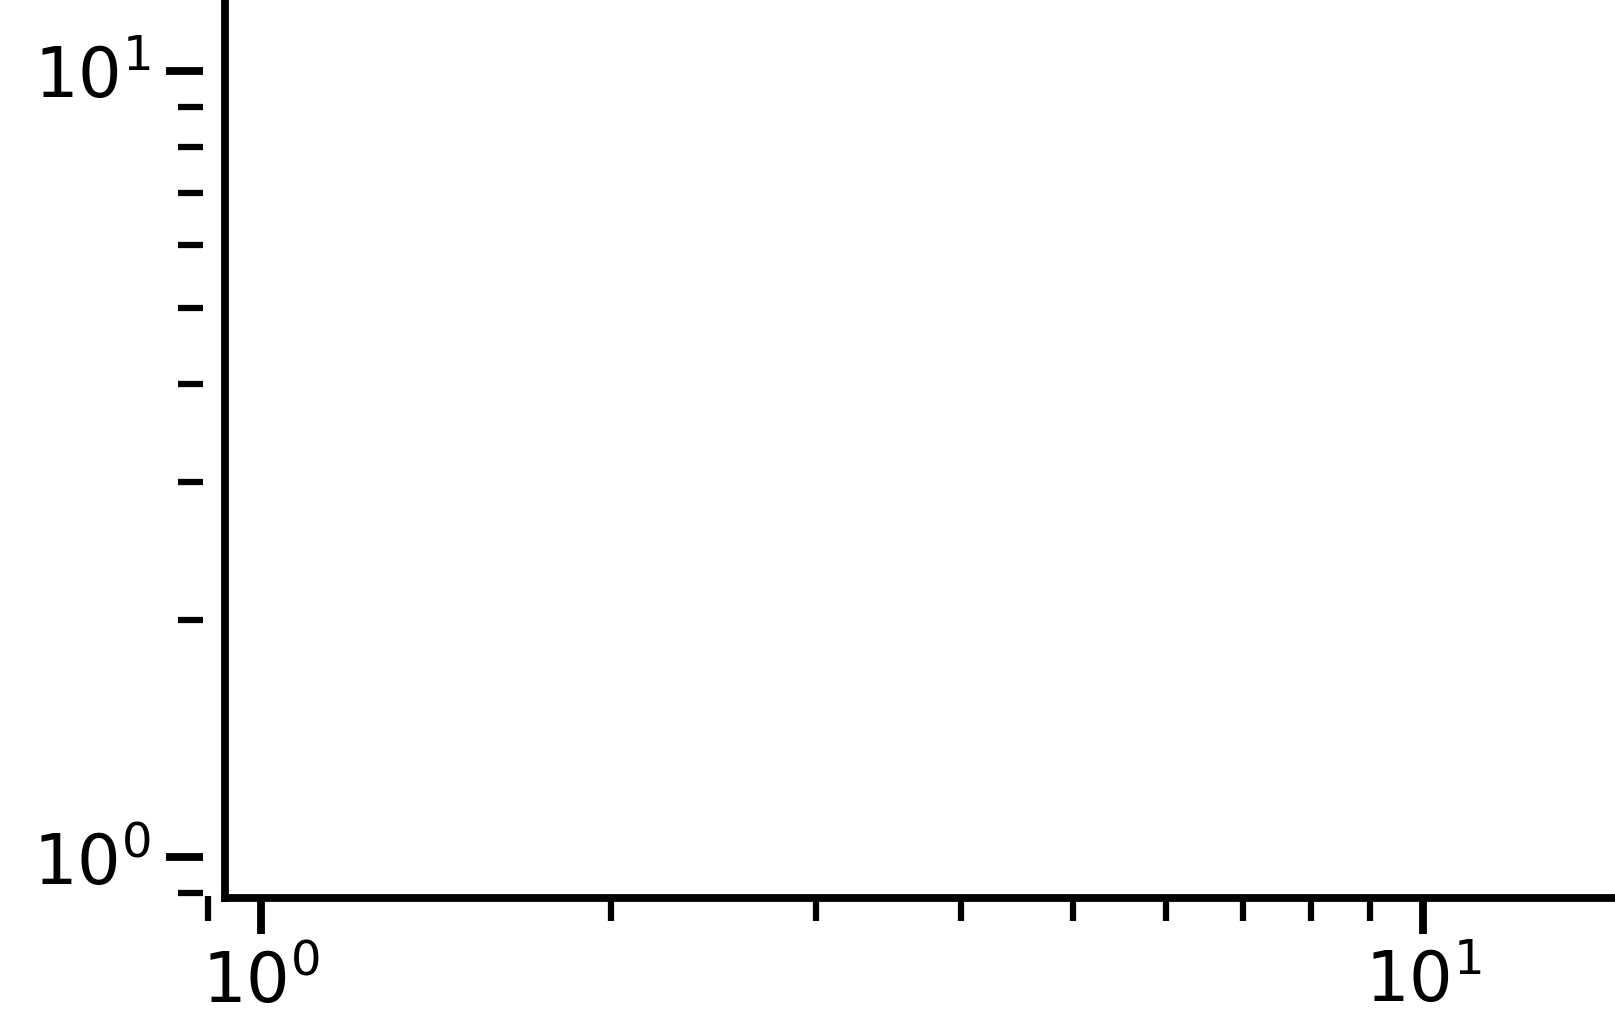

 26%|██▌       | 29/113 [01:02<02:39,  1.90s/it]

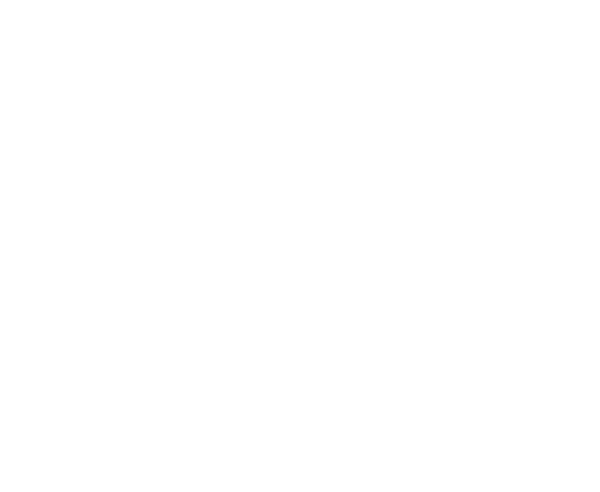

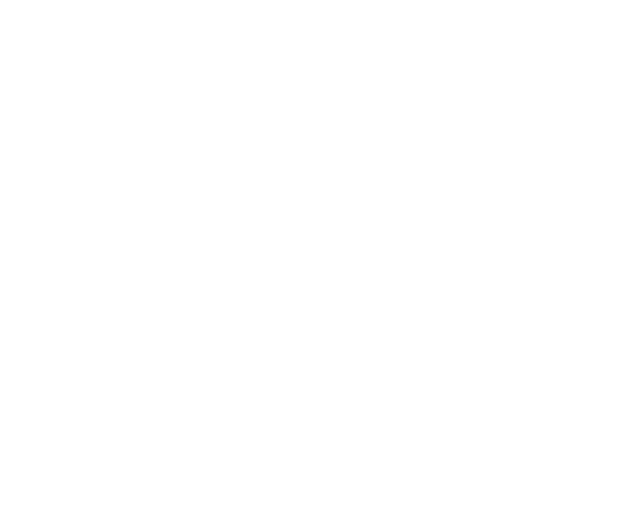

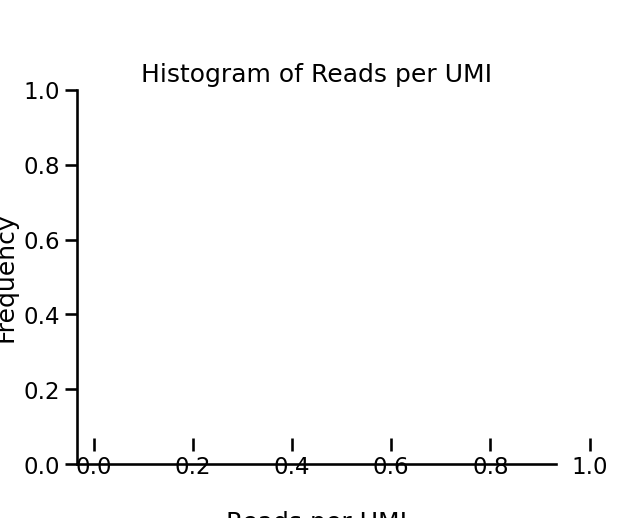

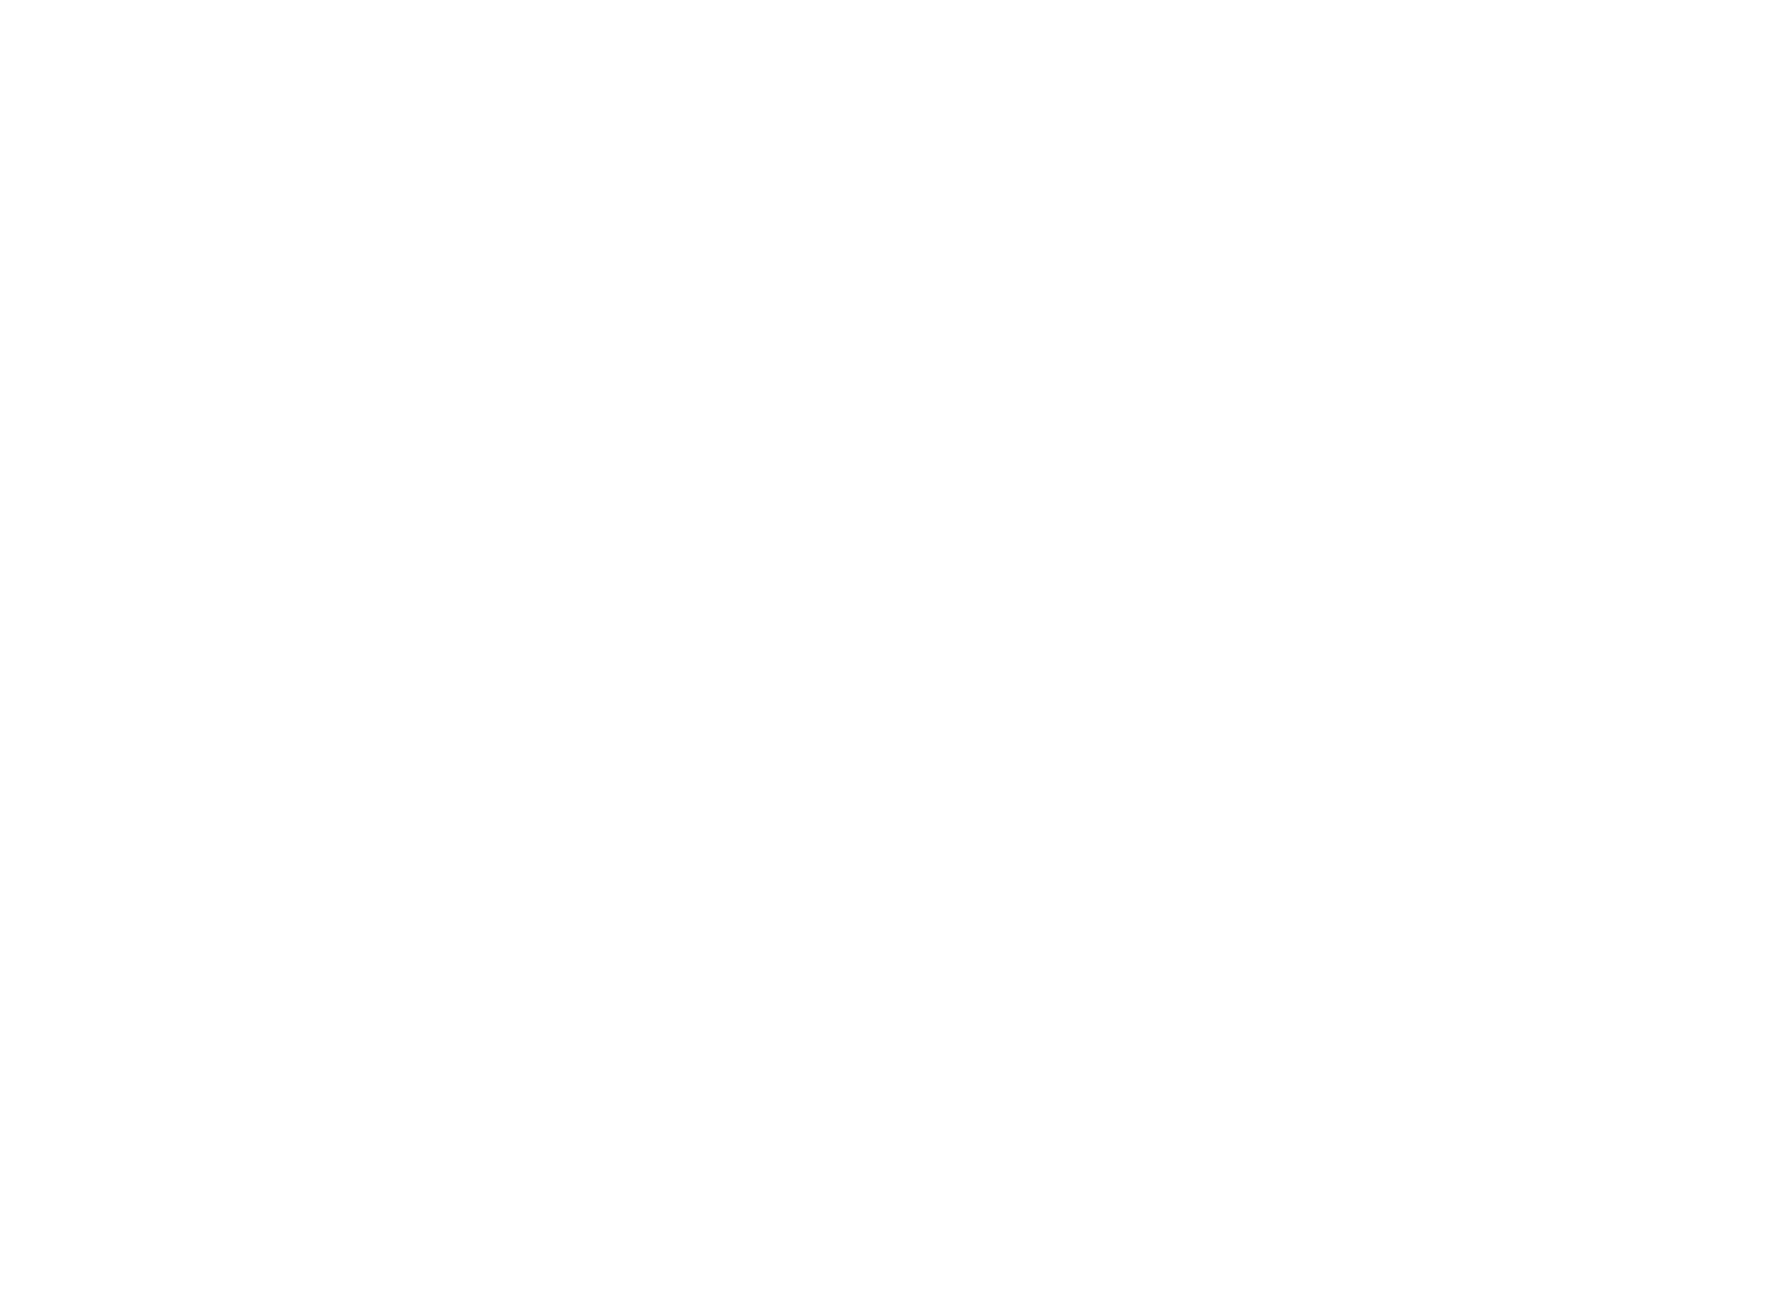

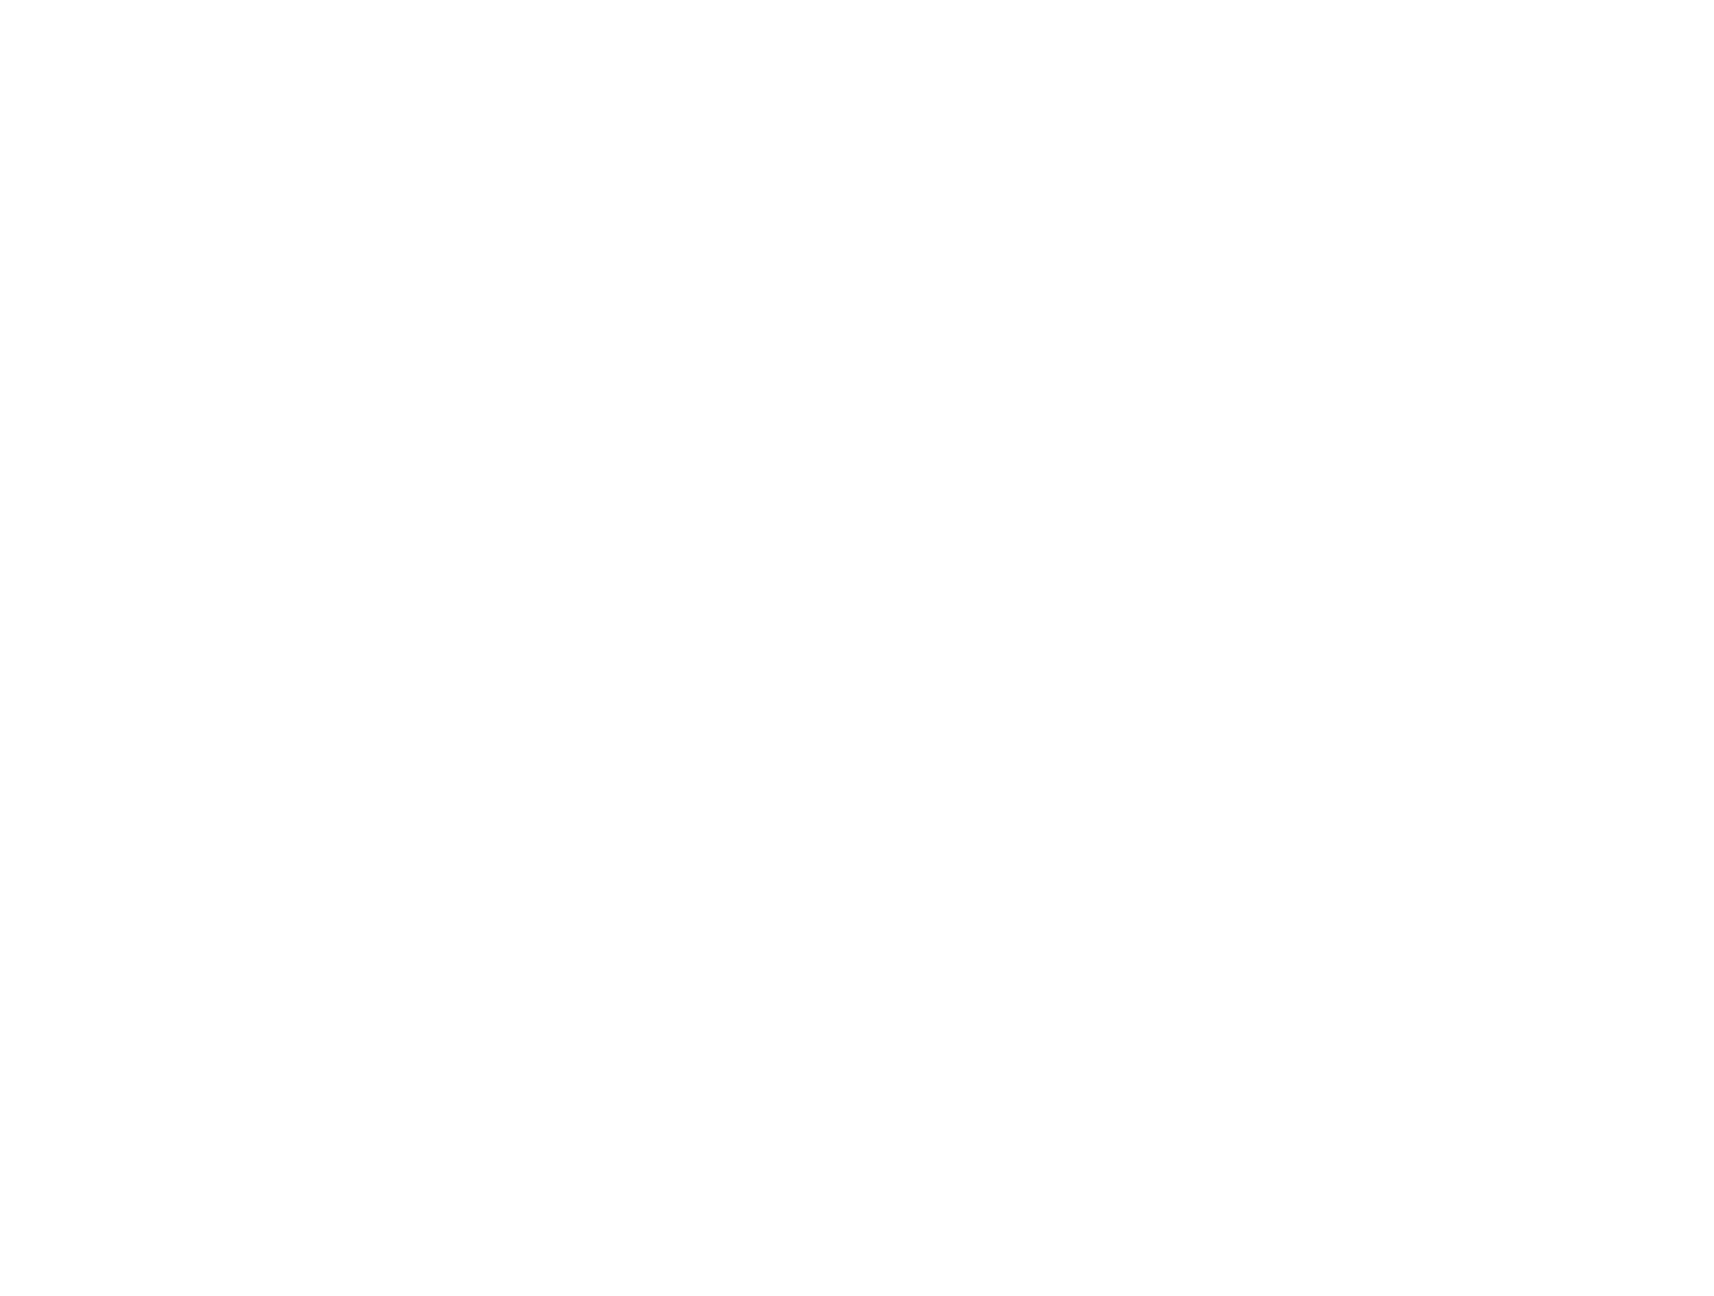

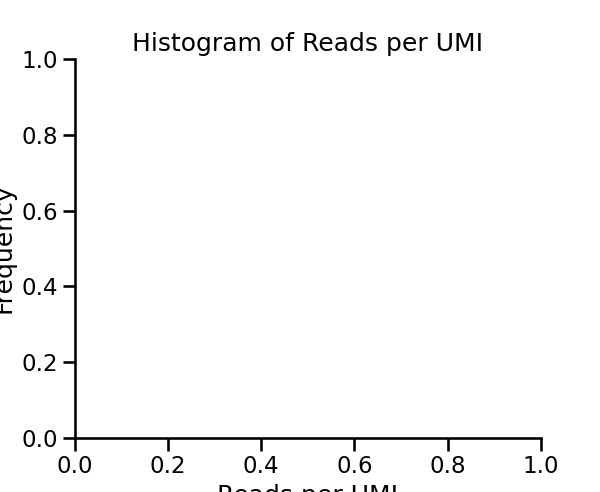

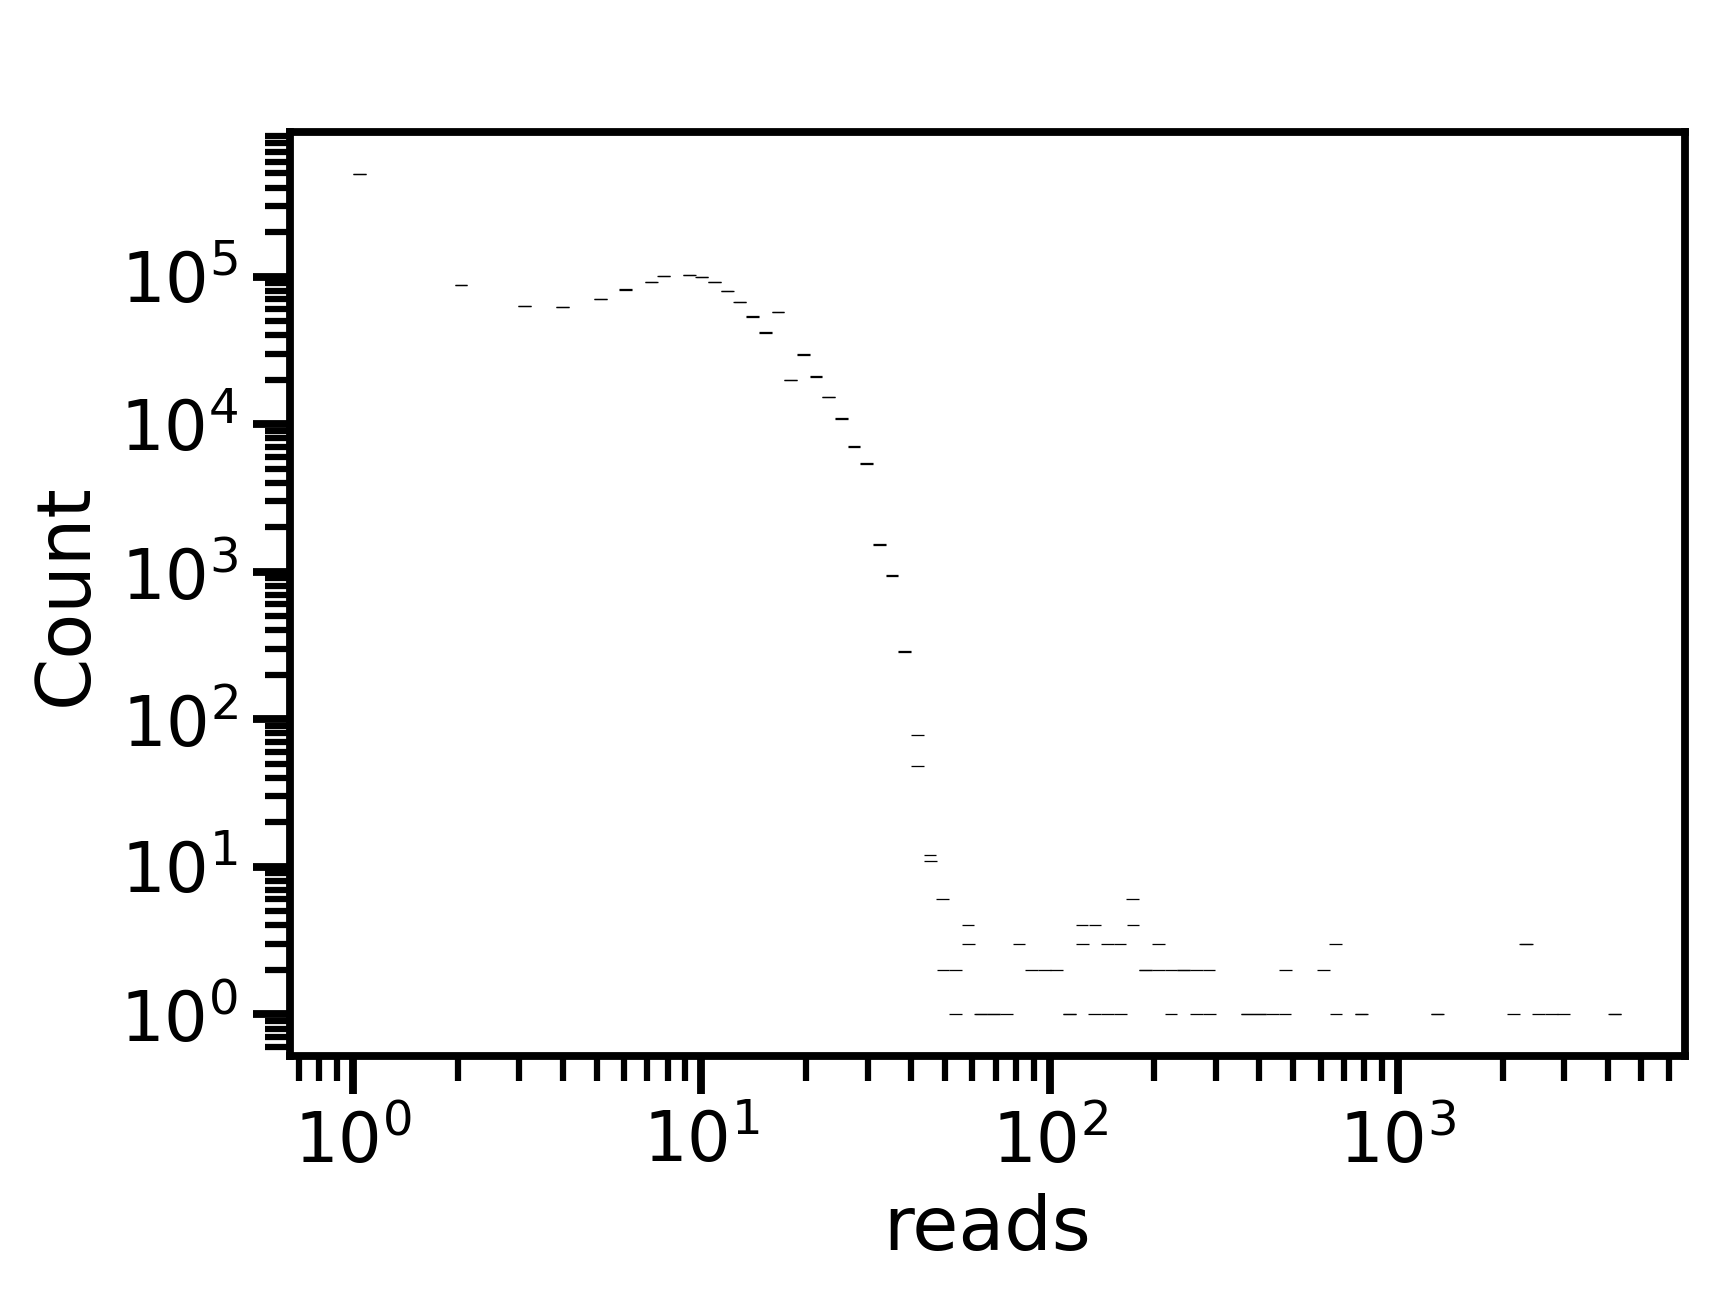

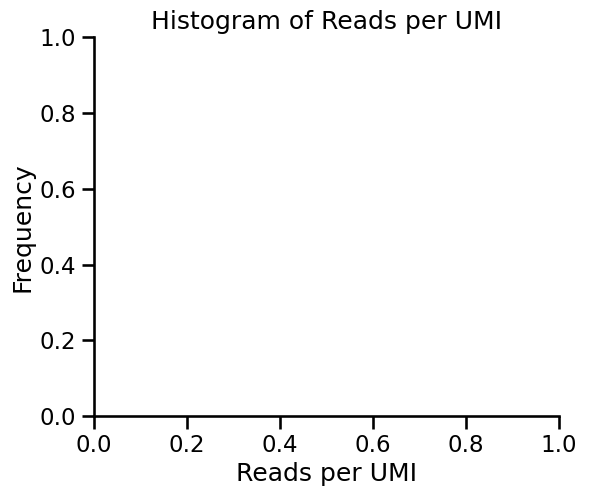

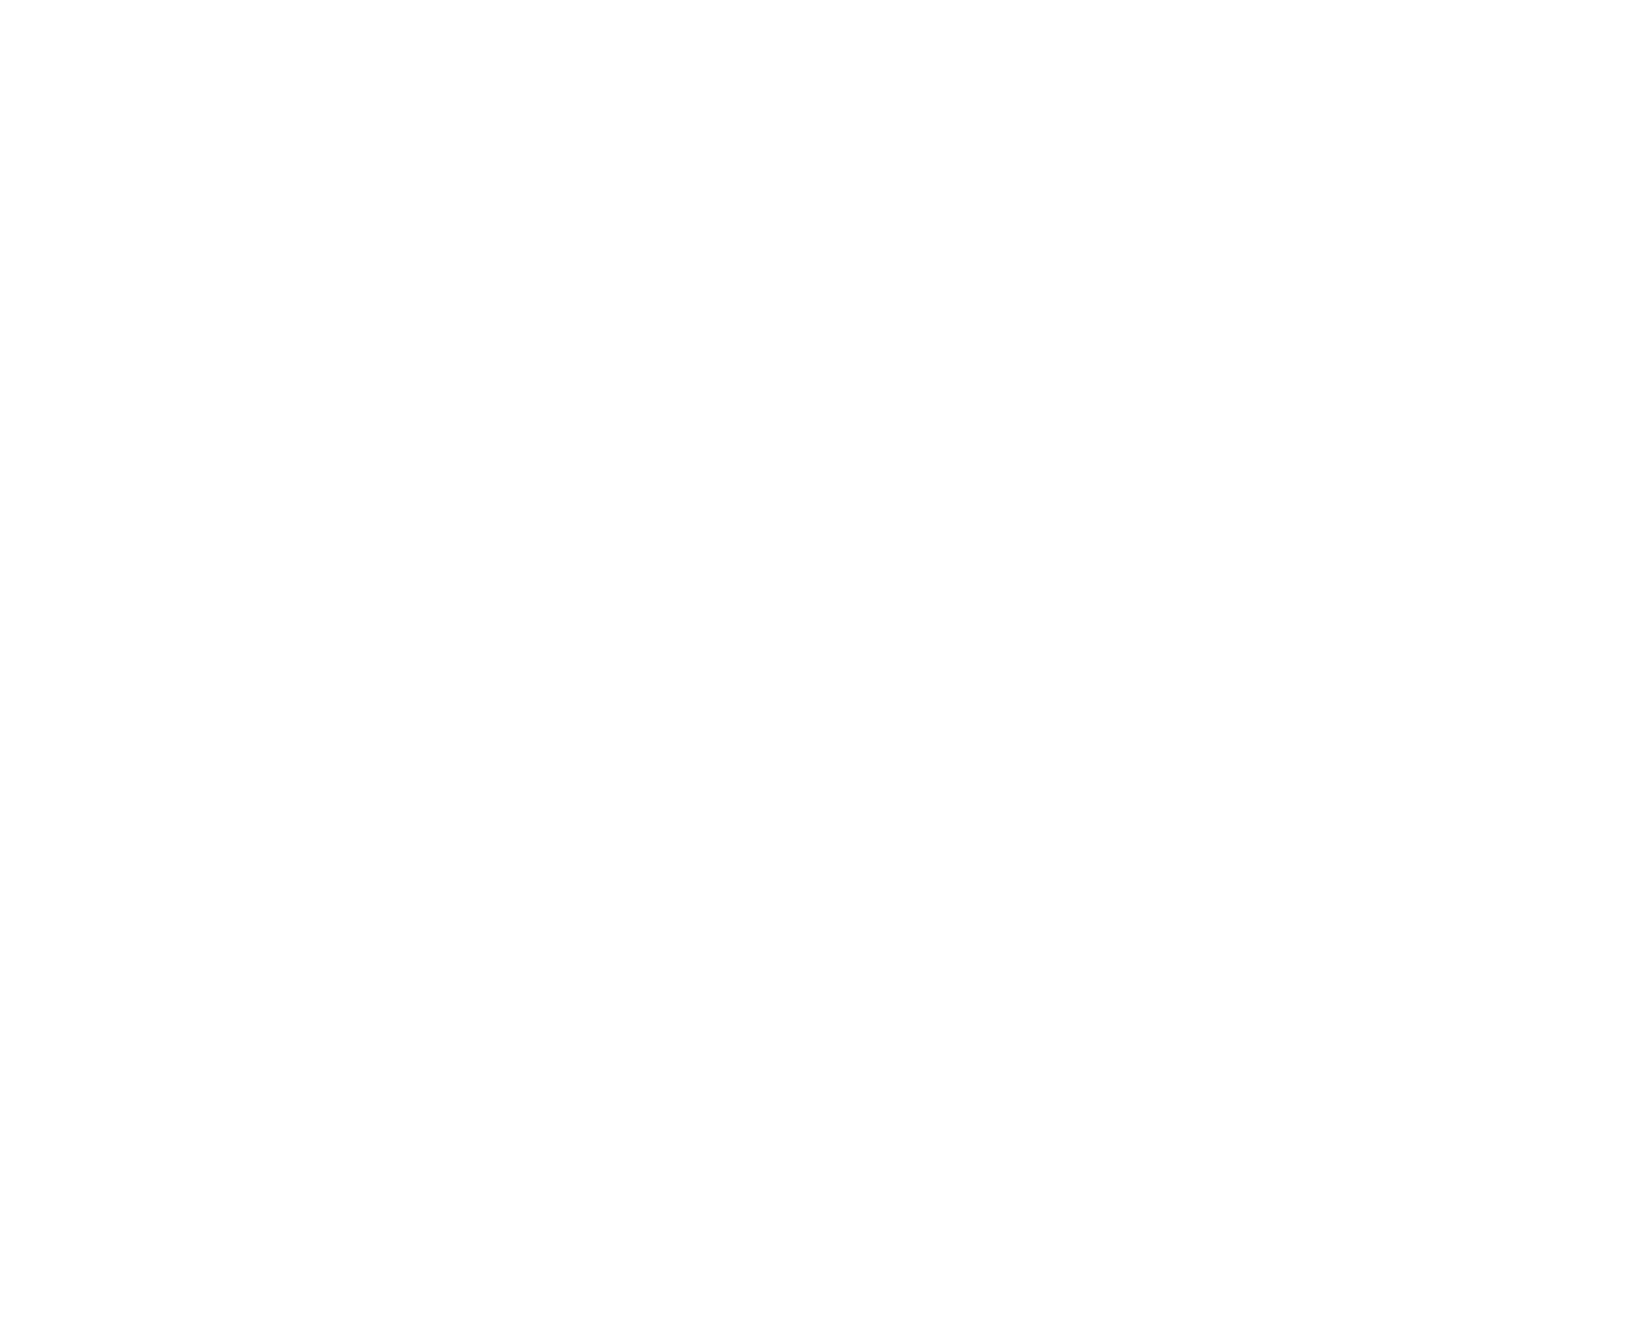

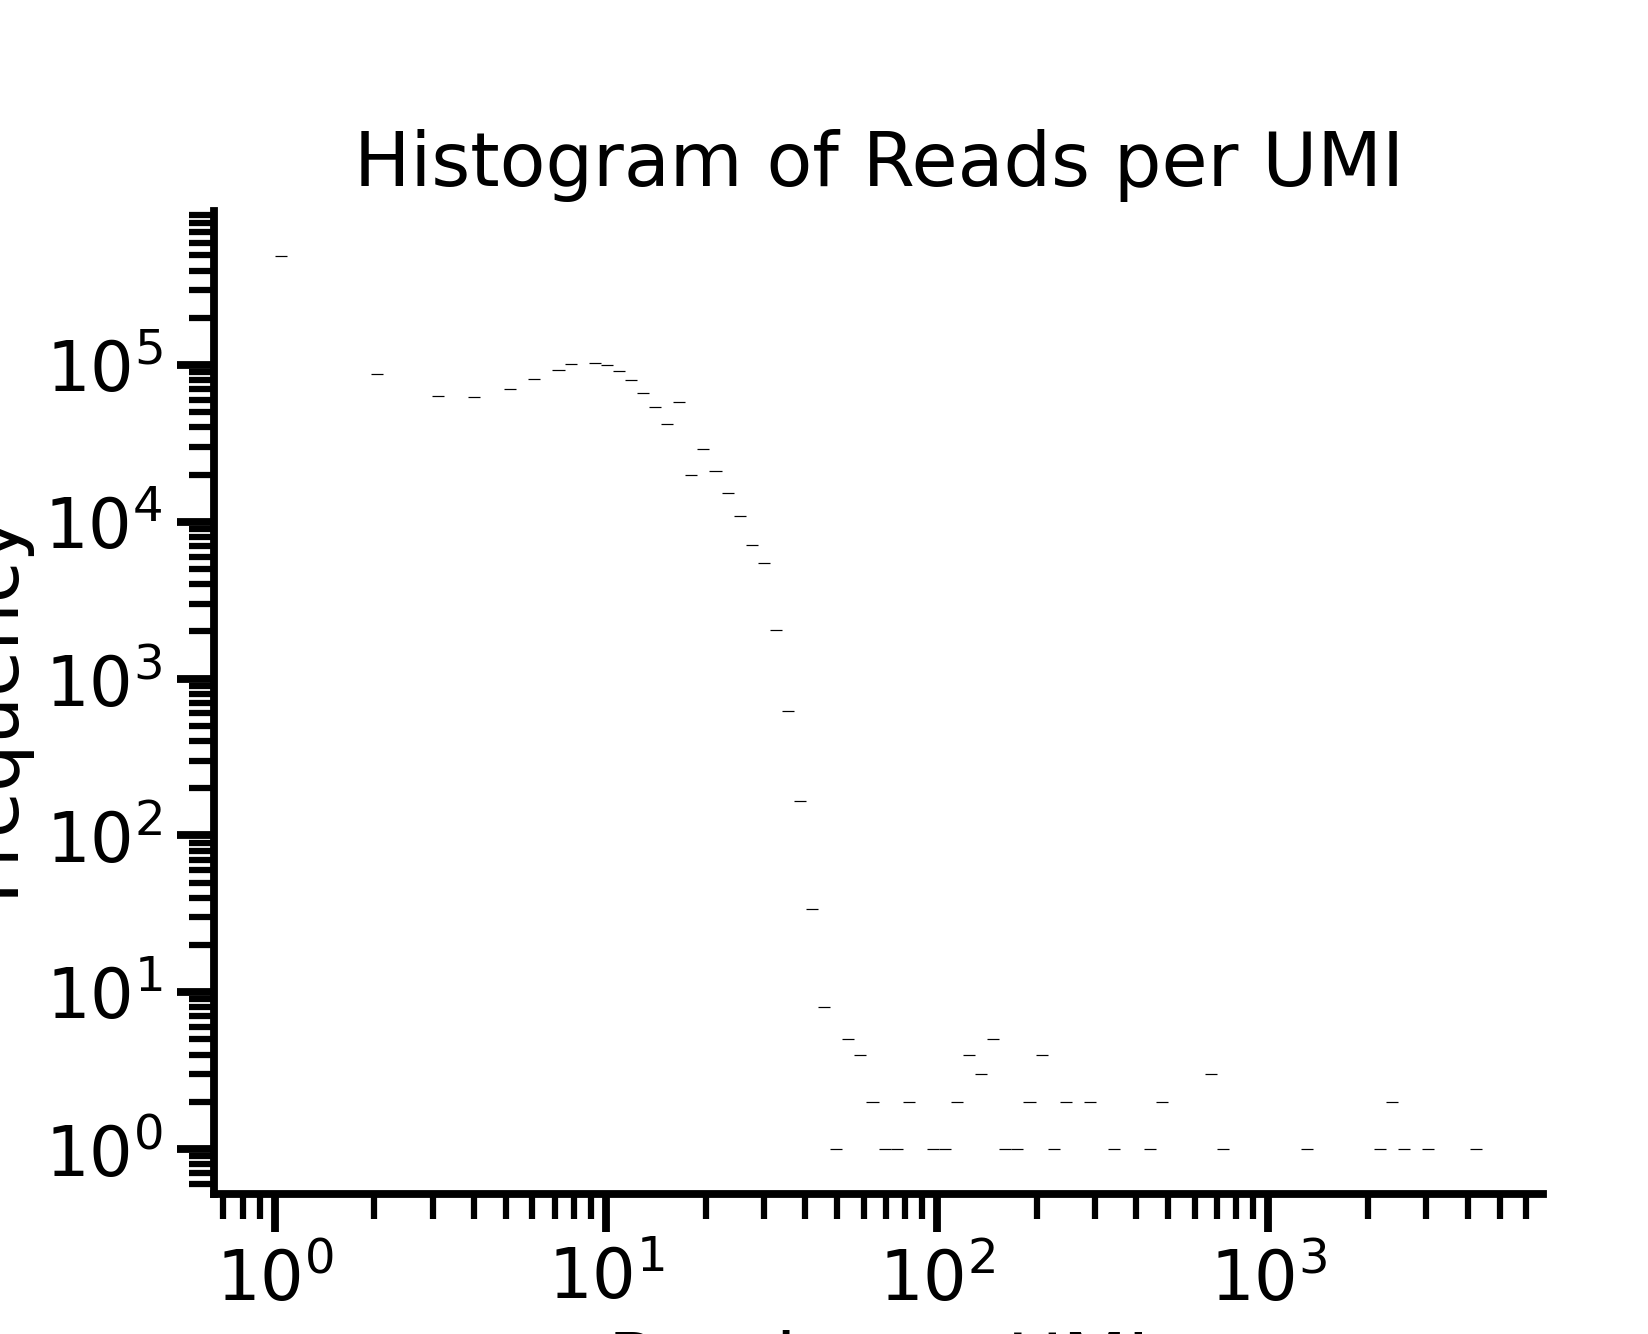

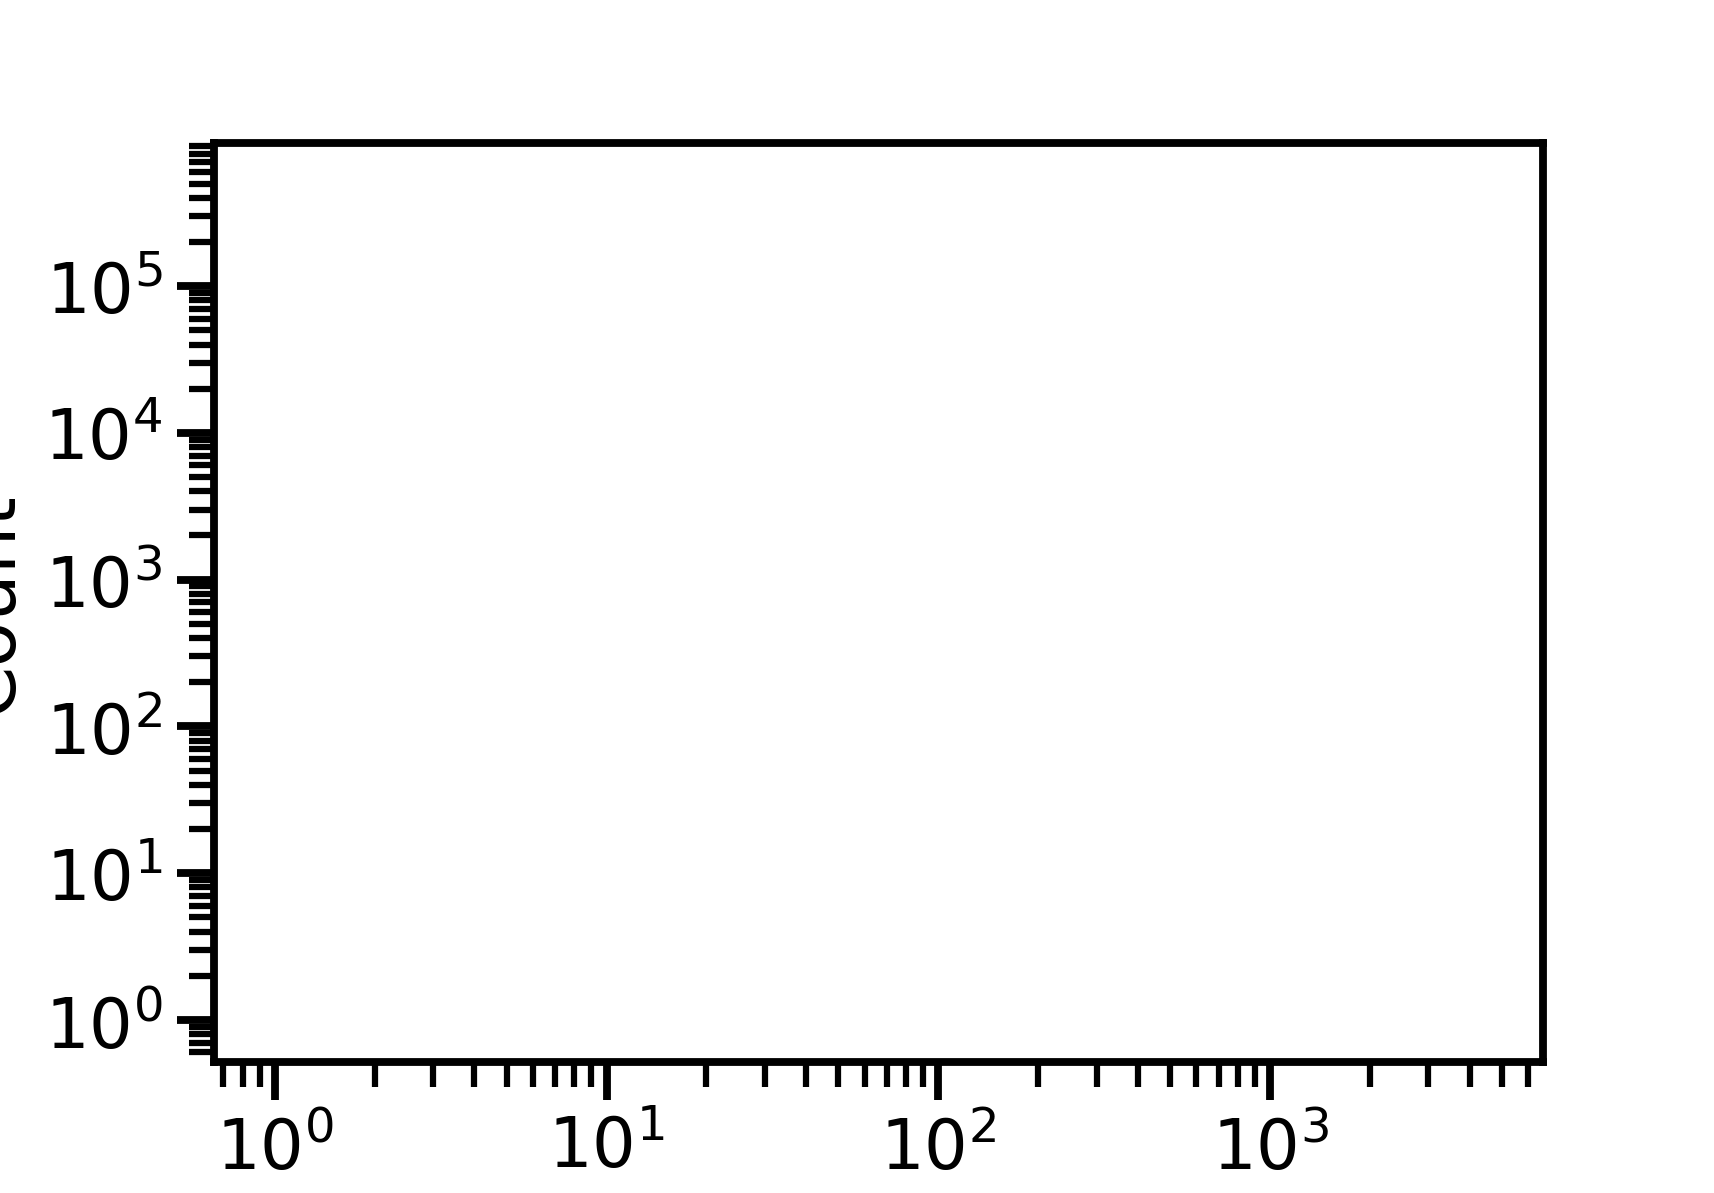

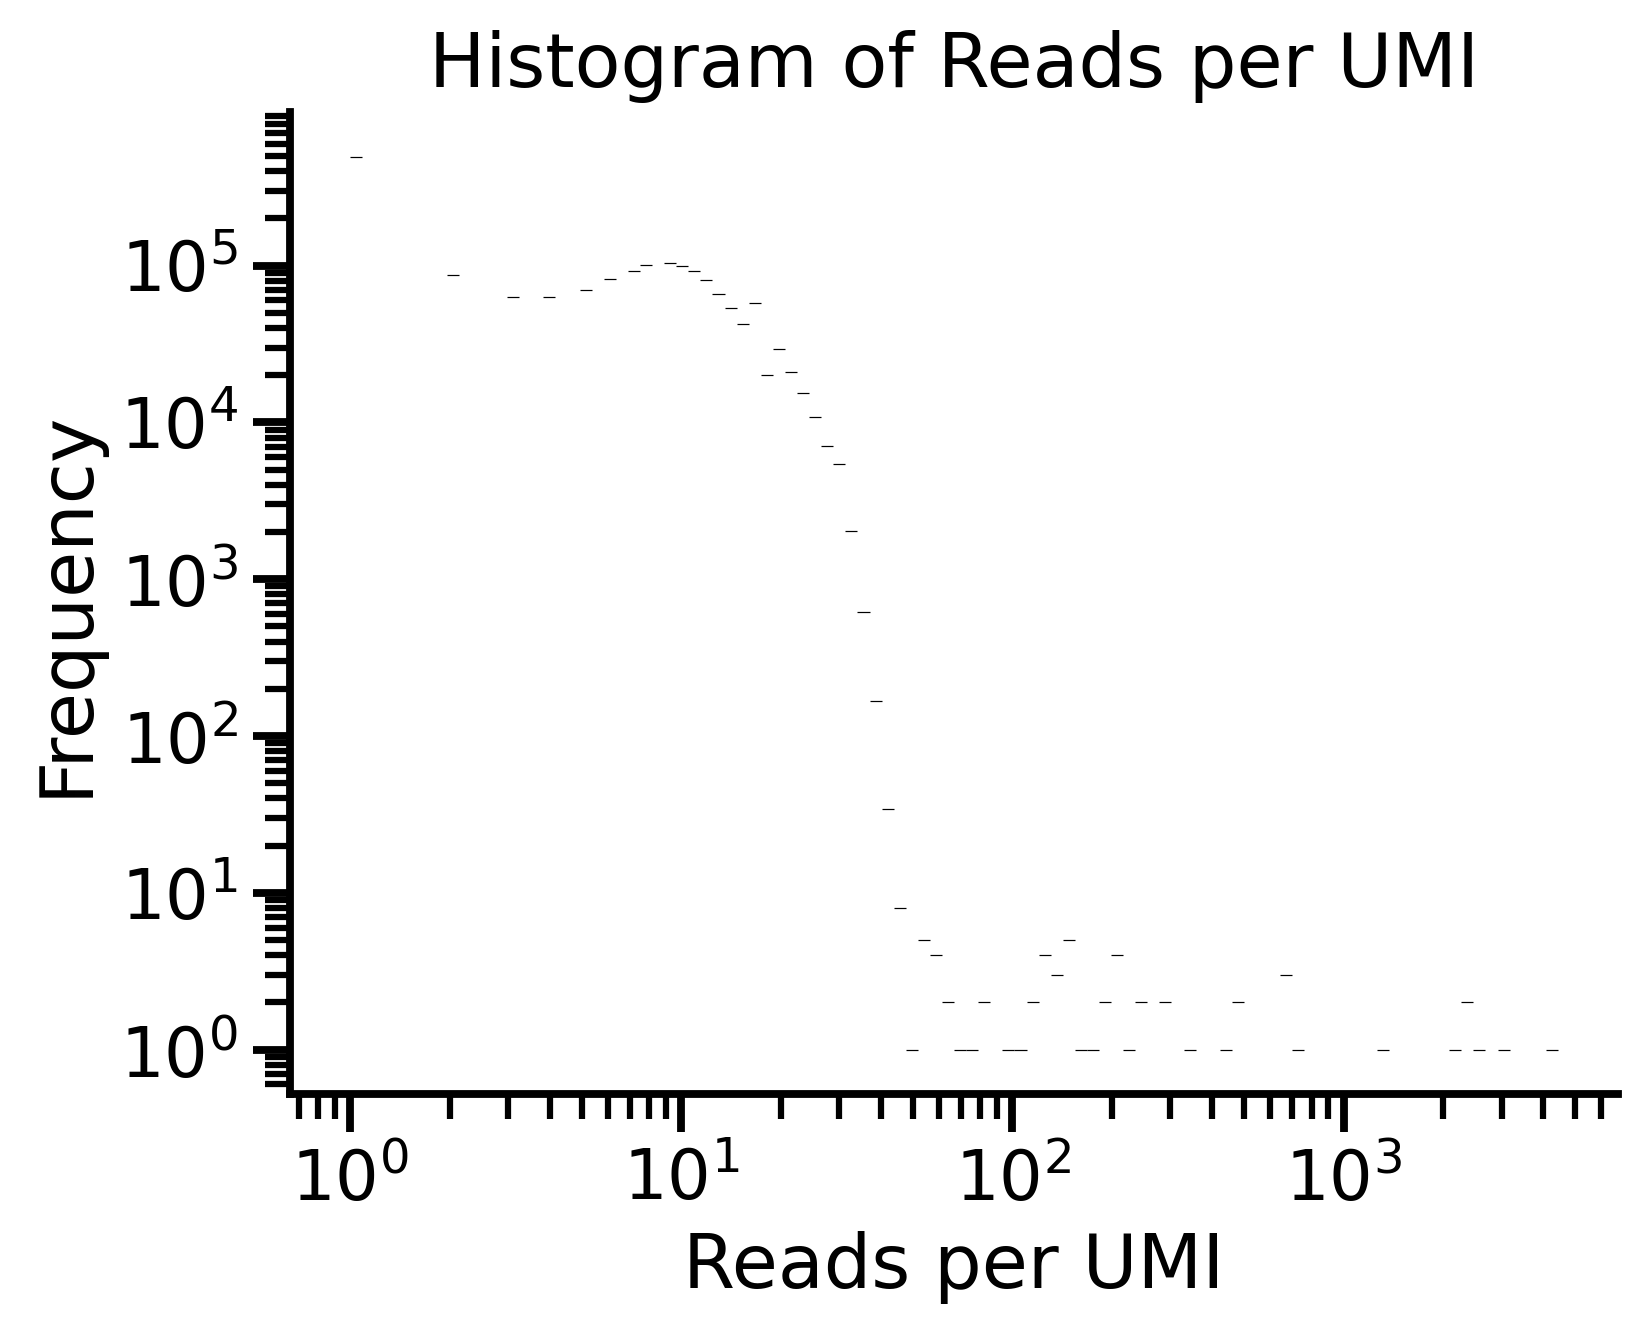

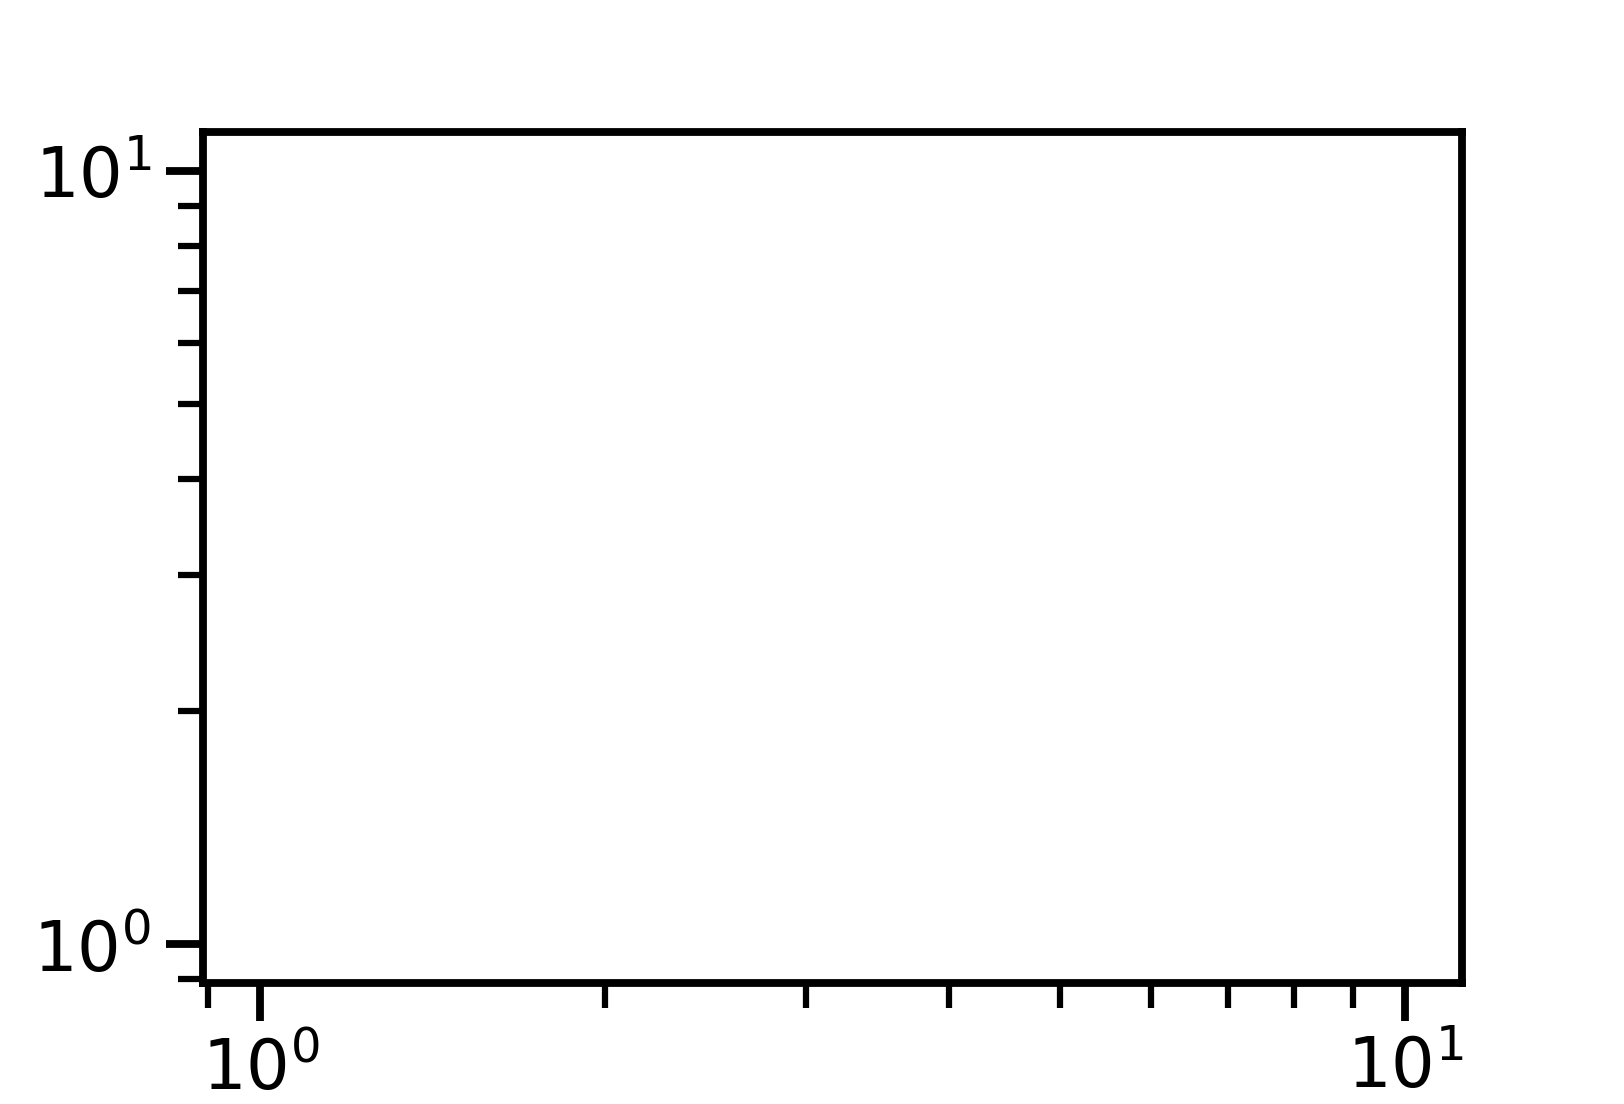

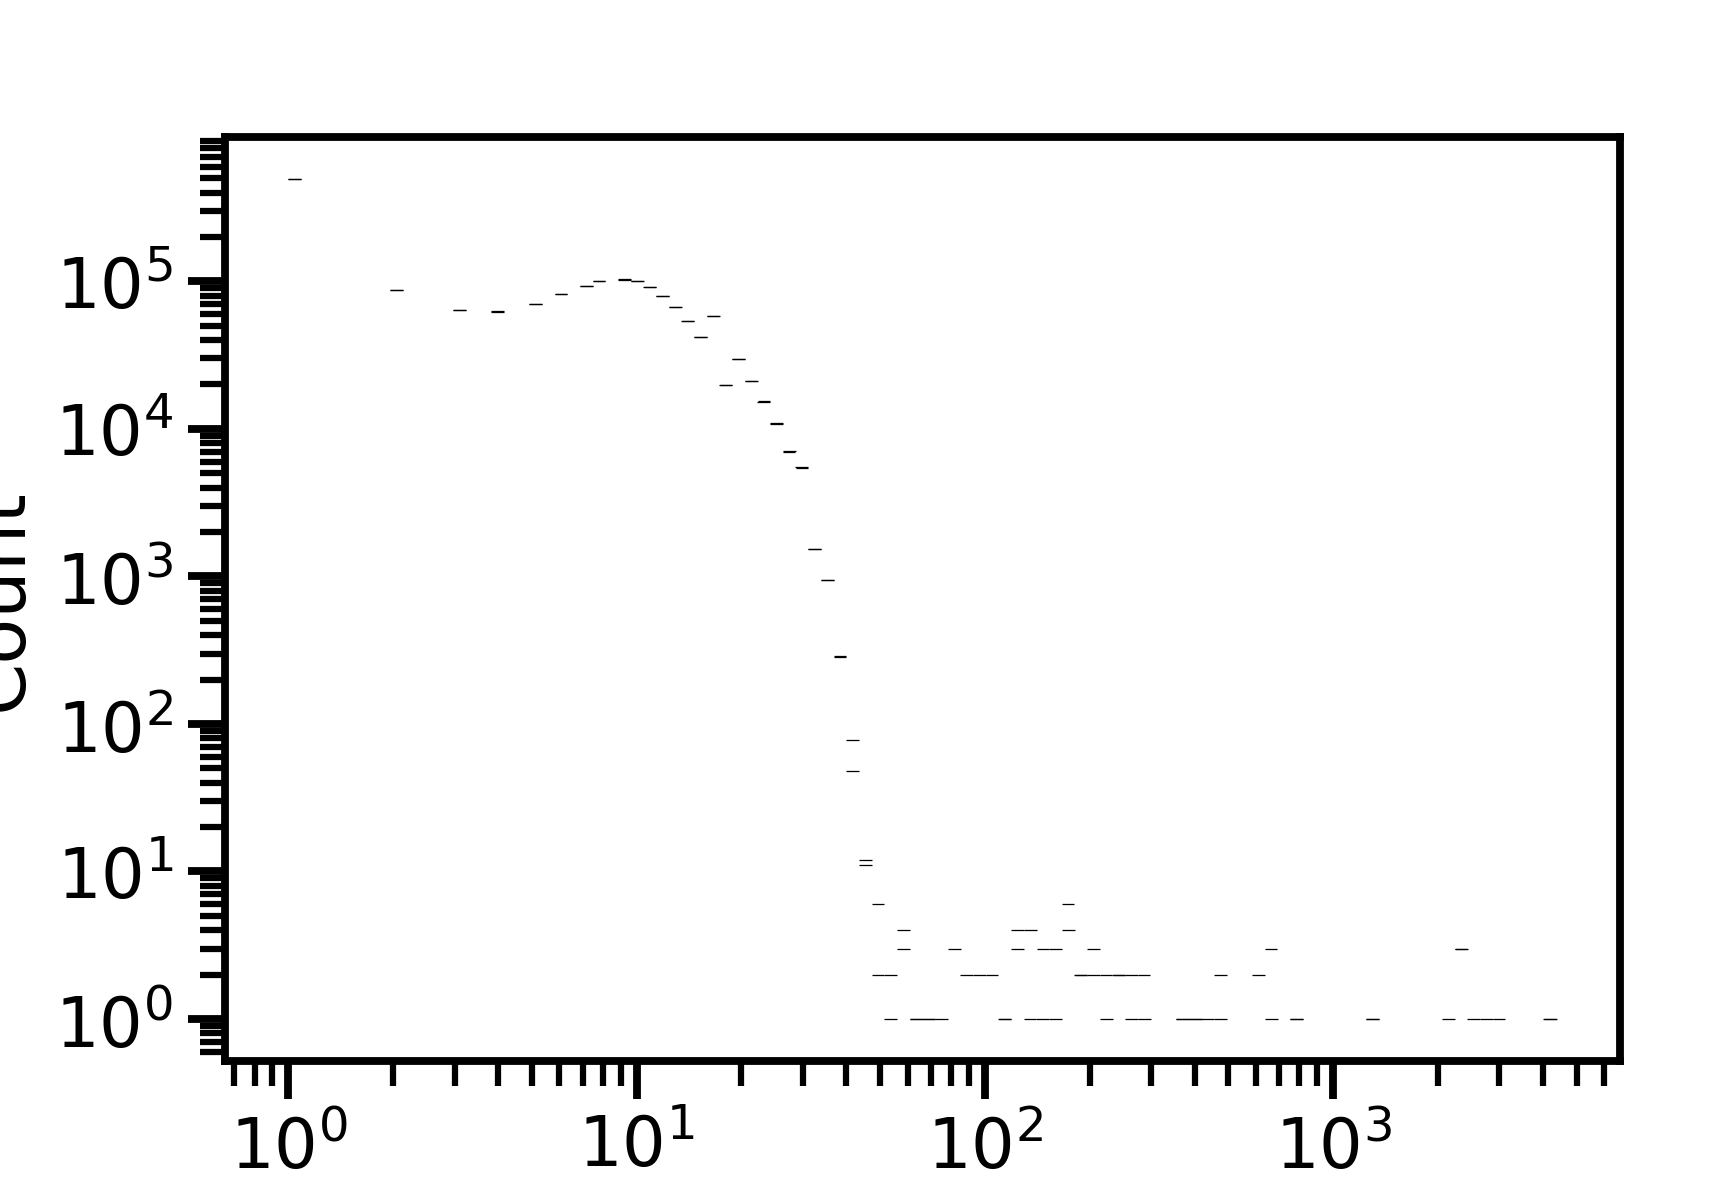

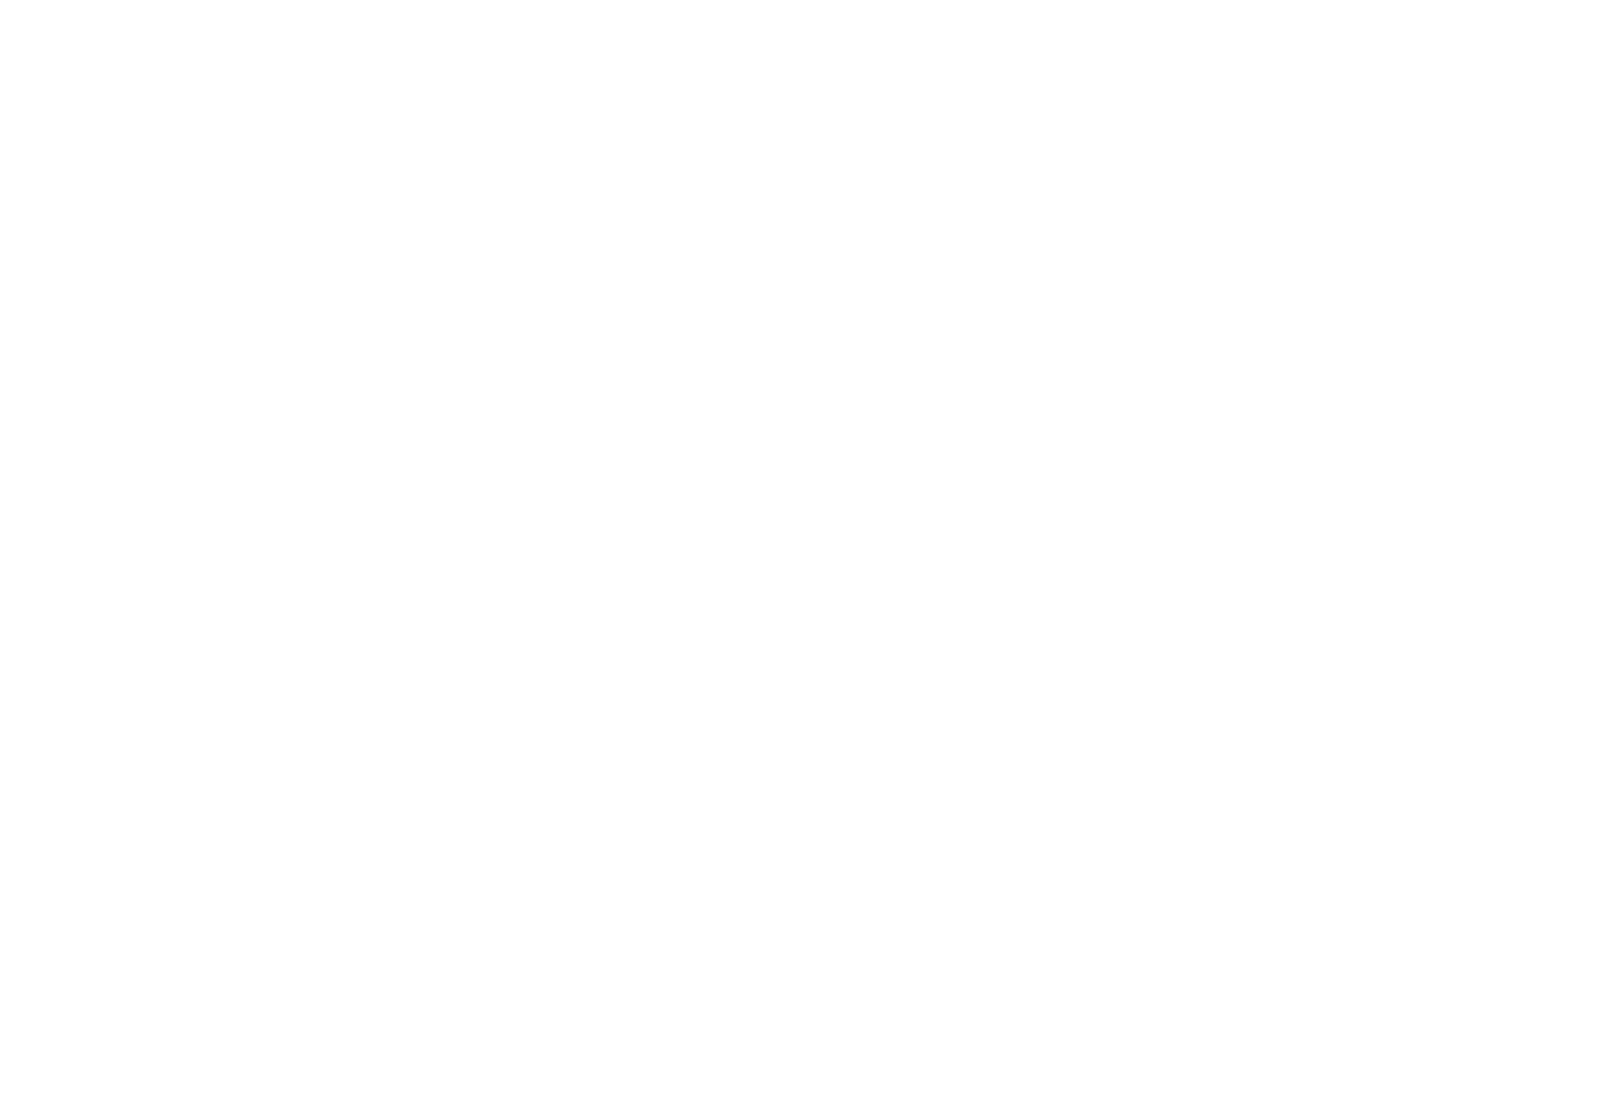

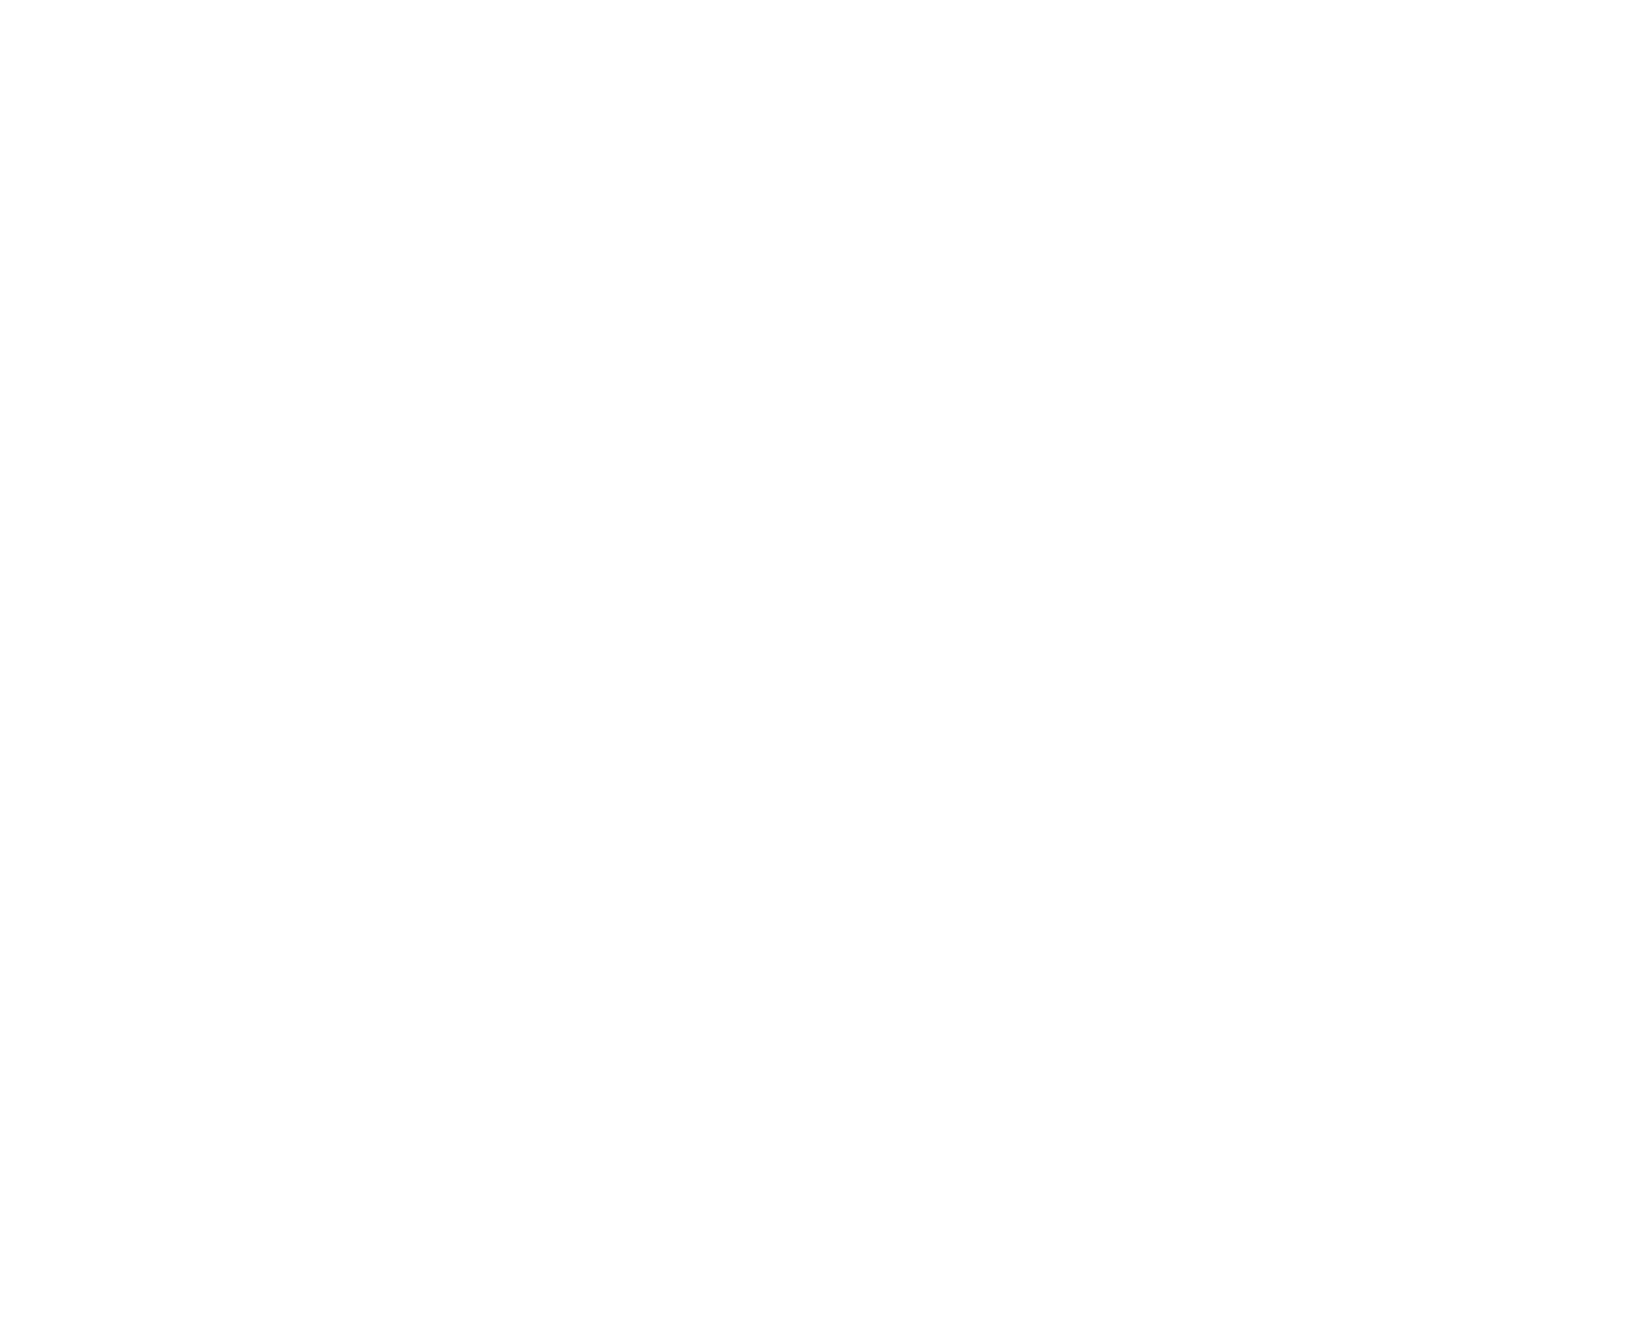

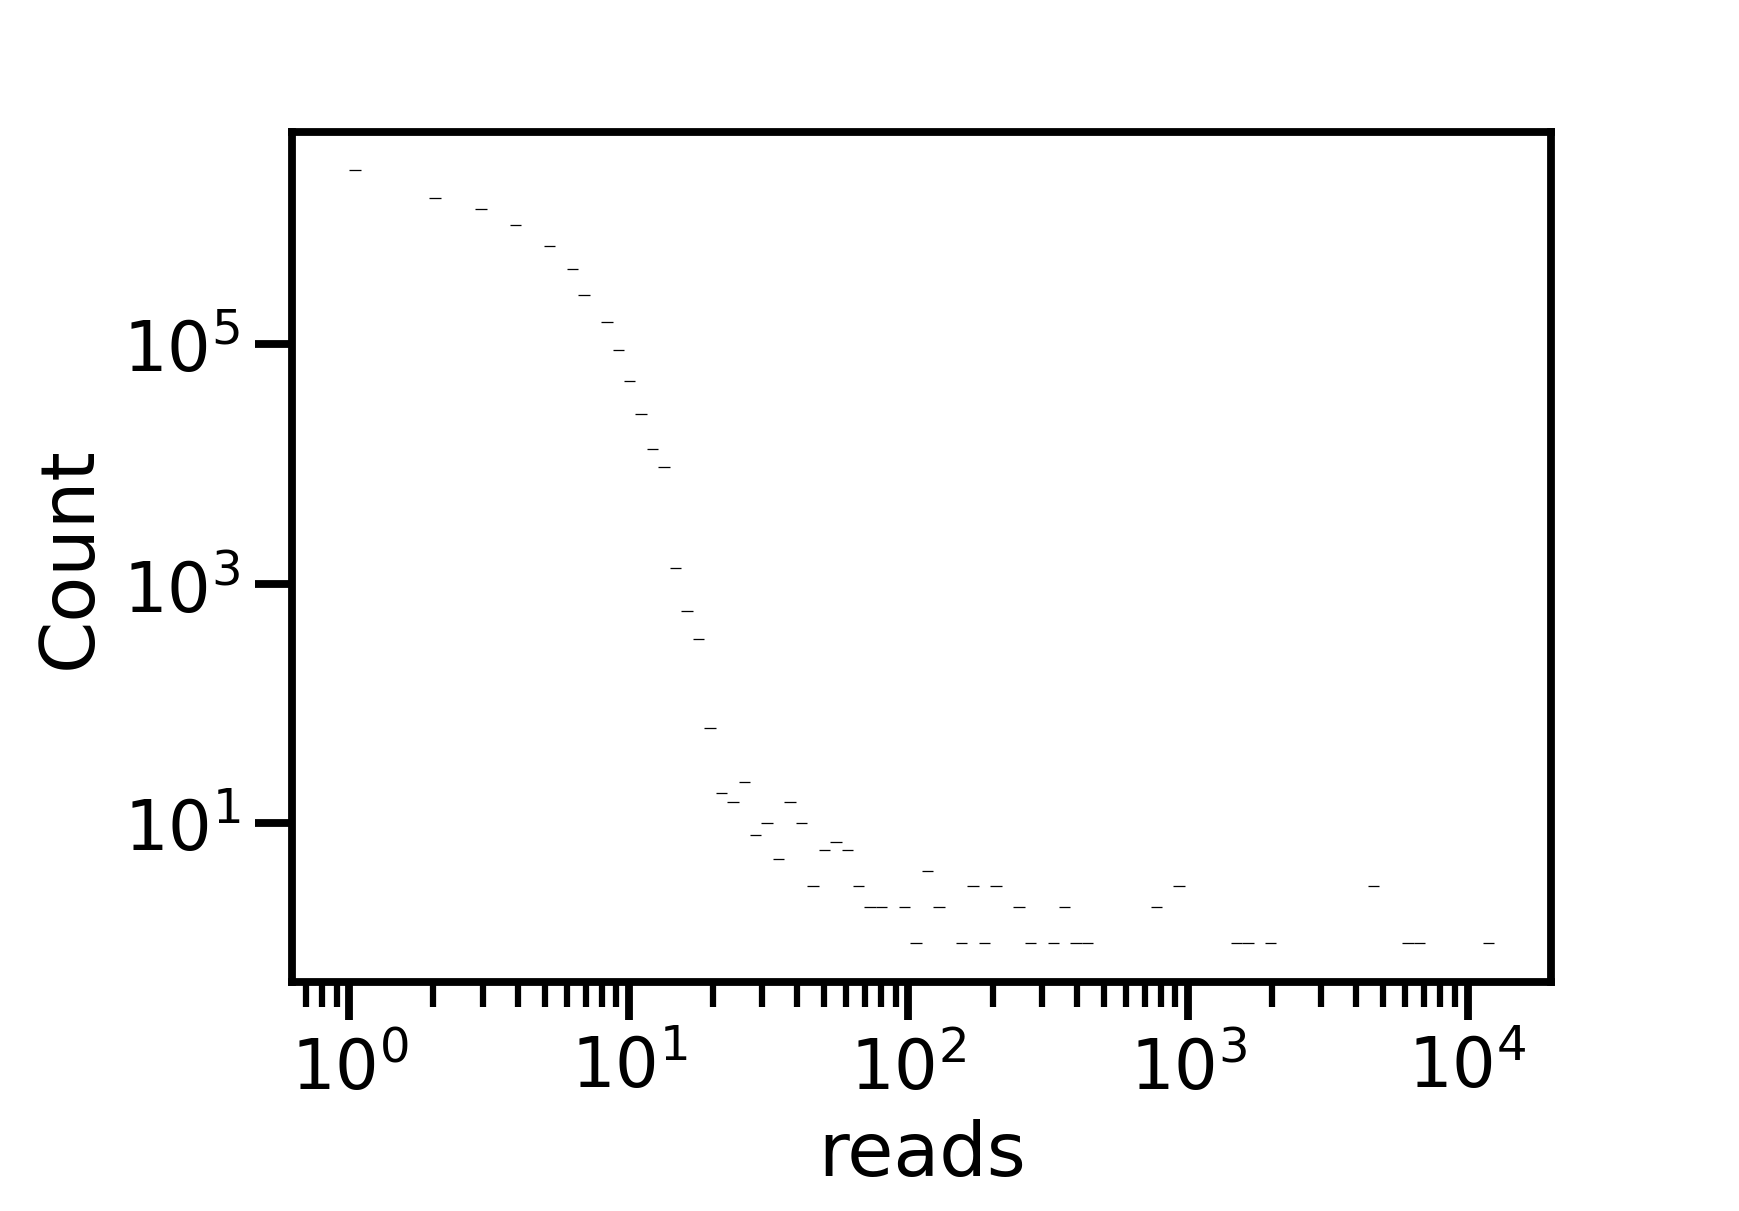

 34%|███▎      | 38/113 [01:20<02:25,  1.94s/it]

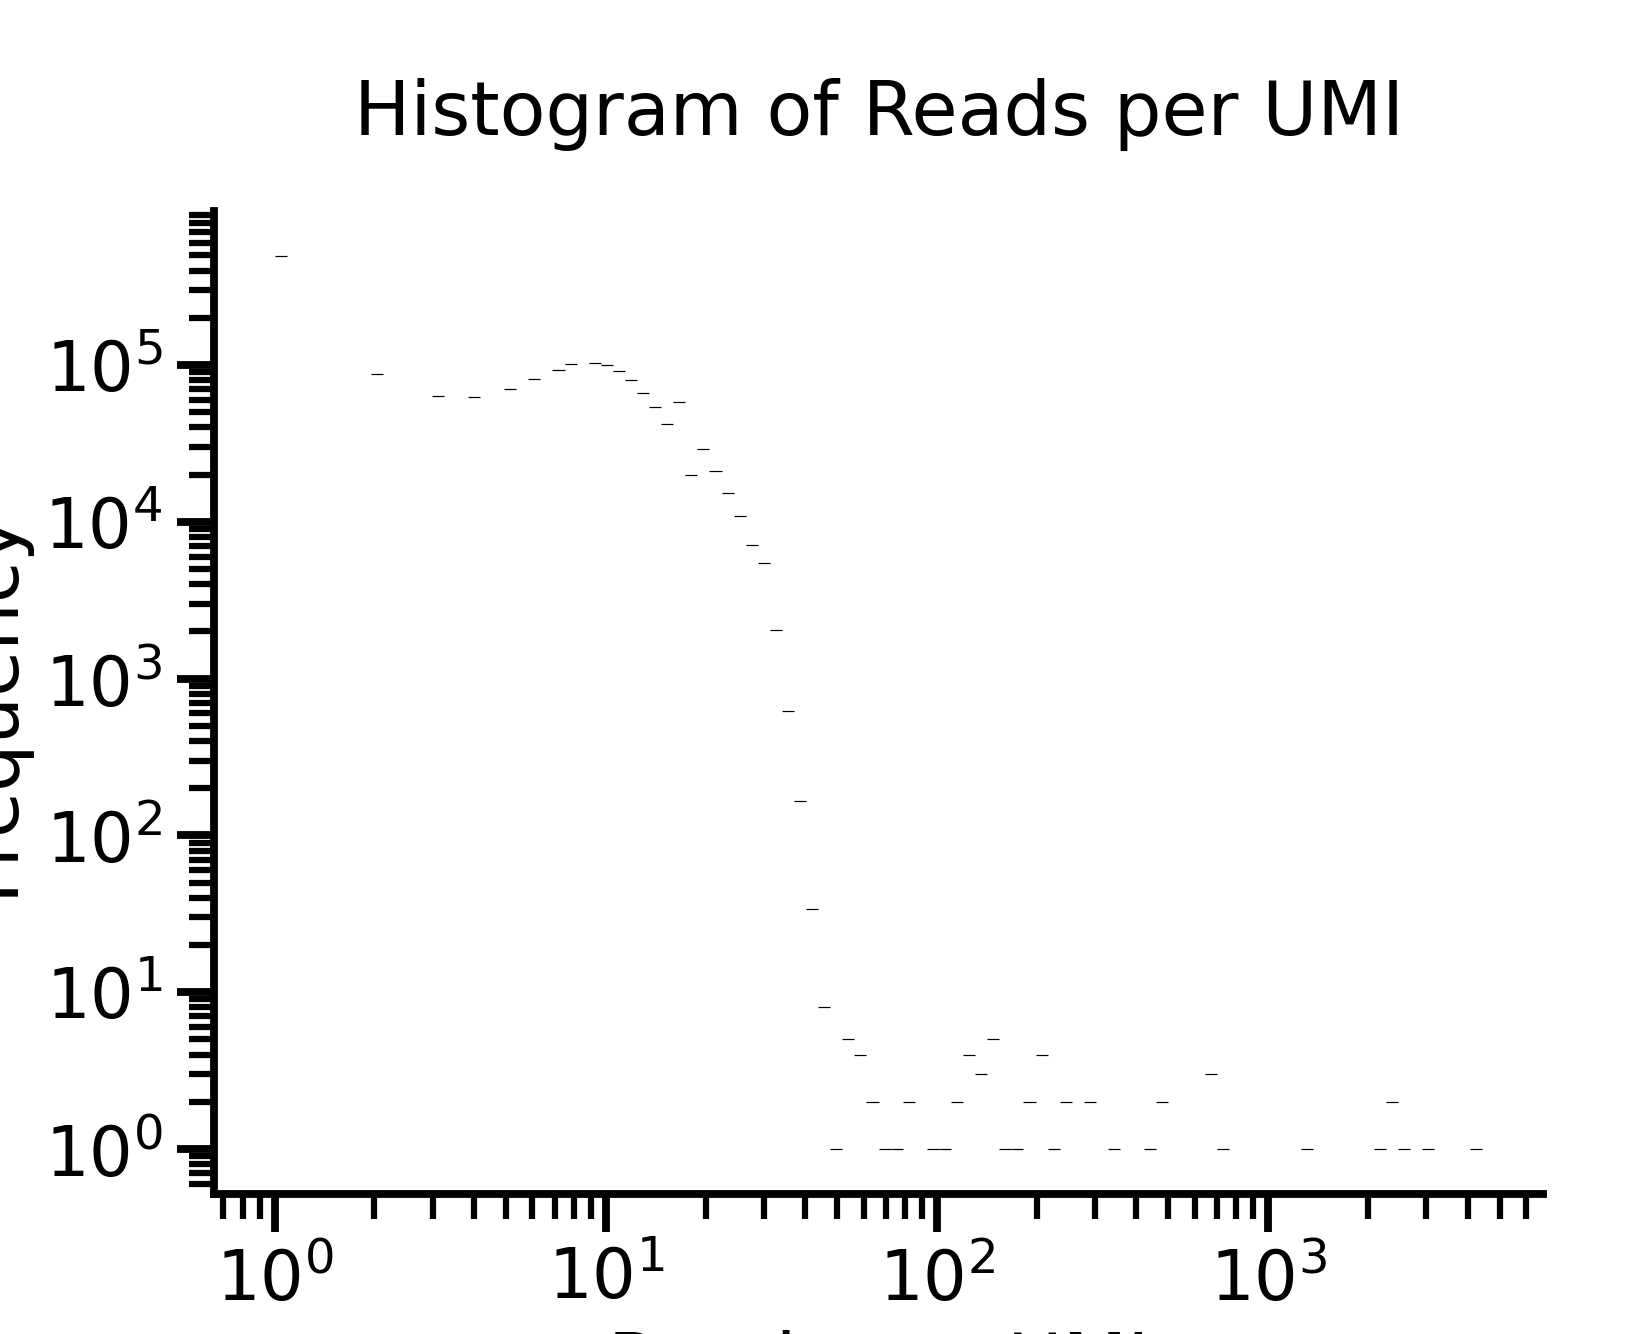

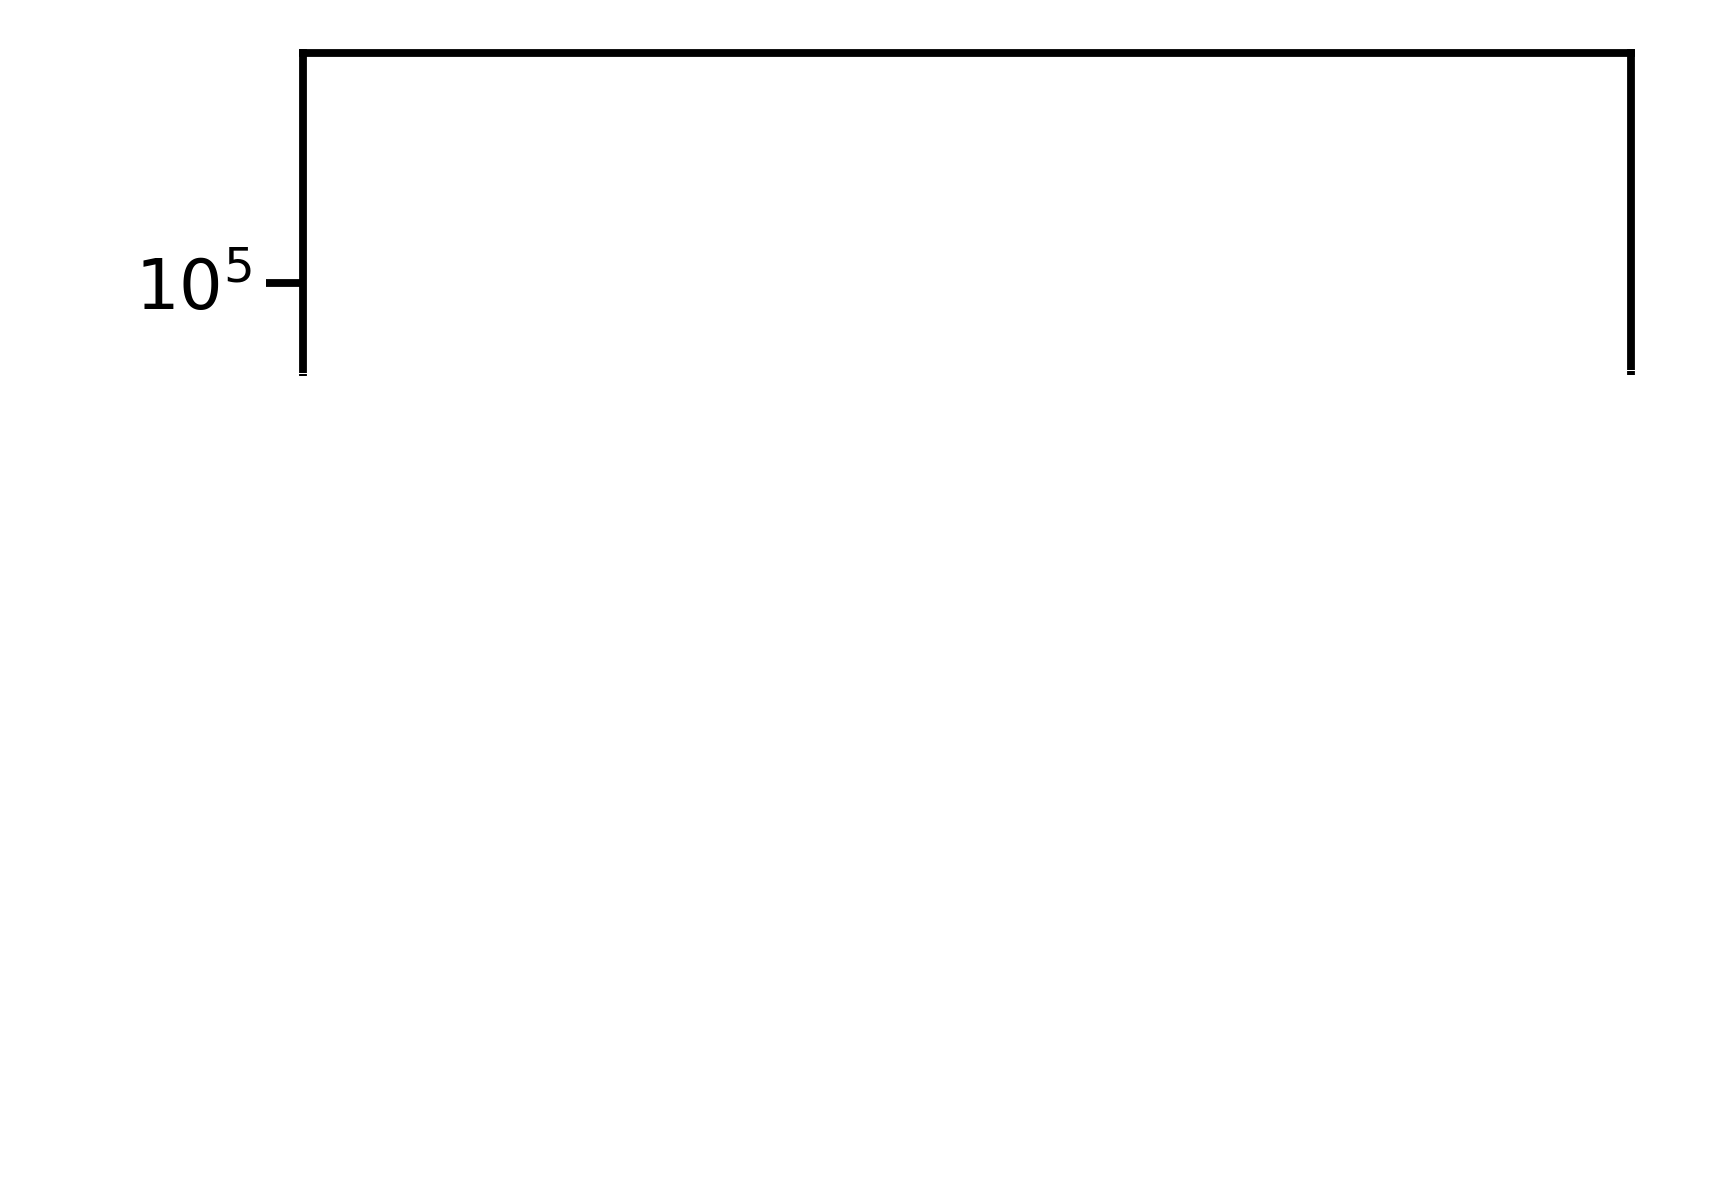

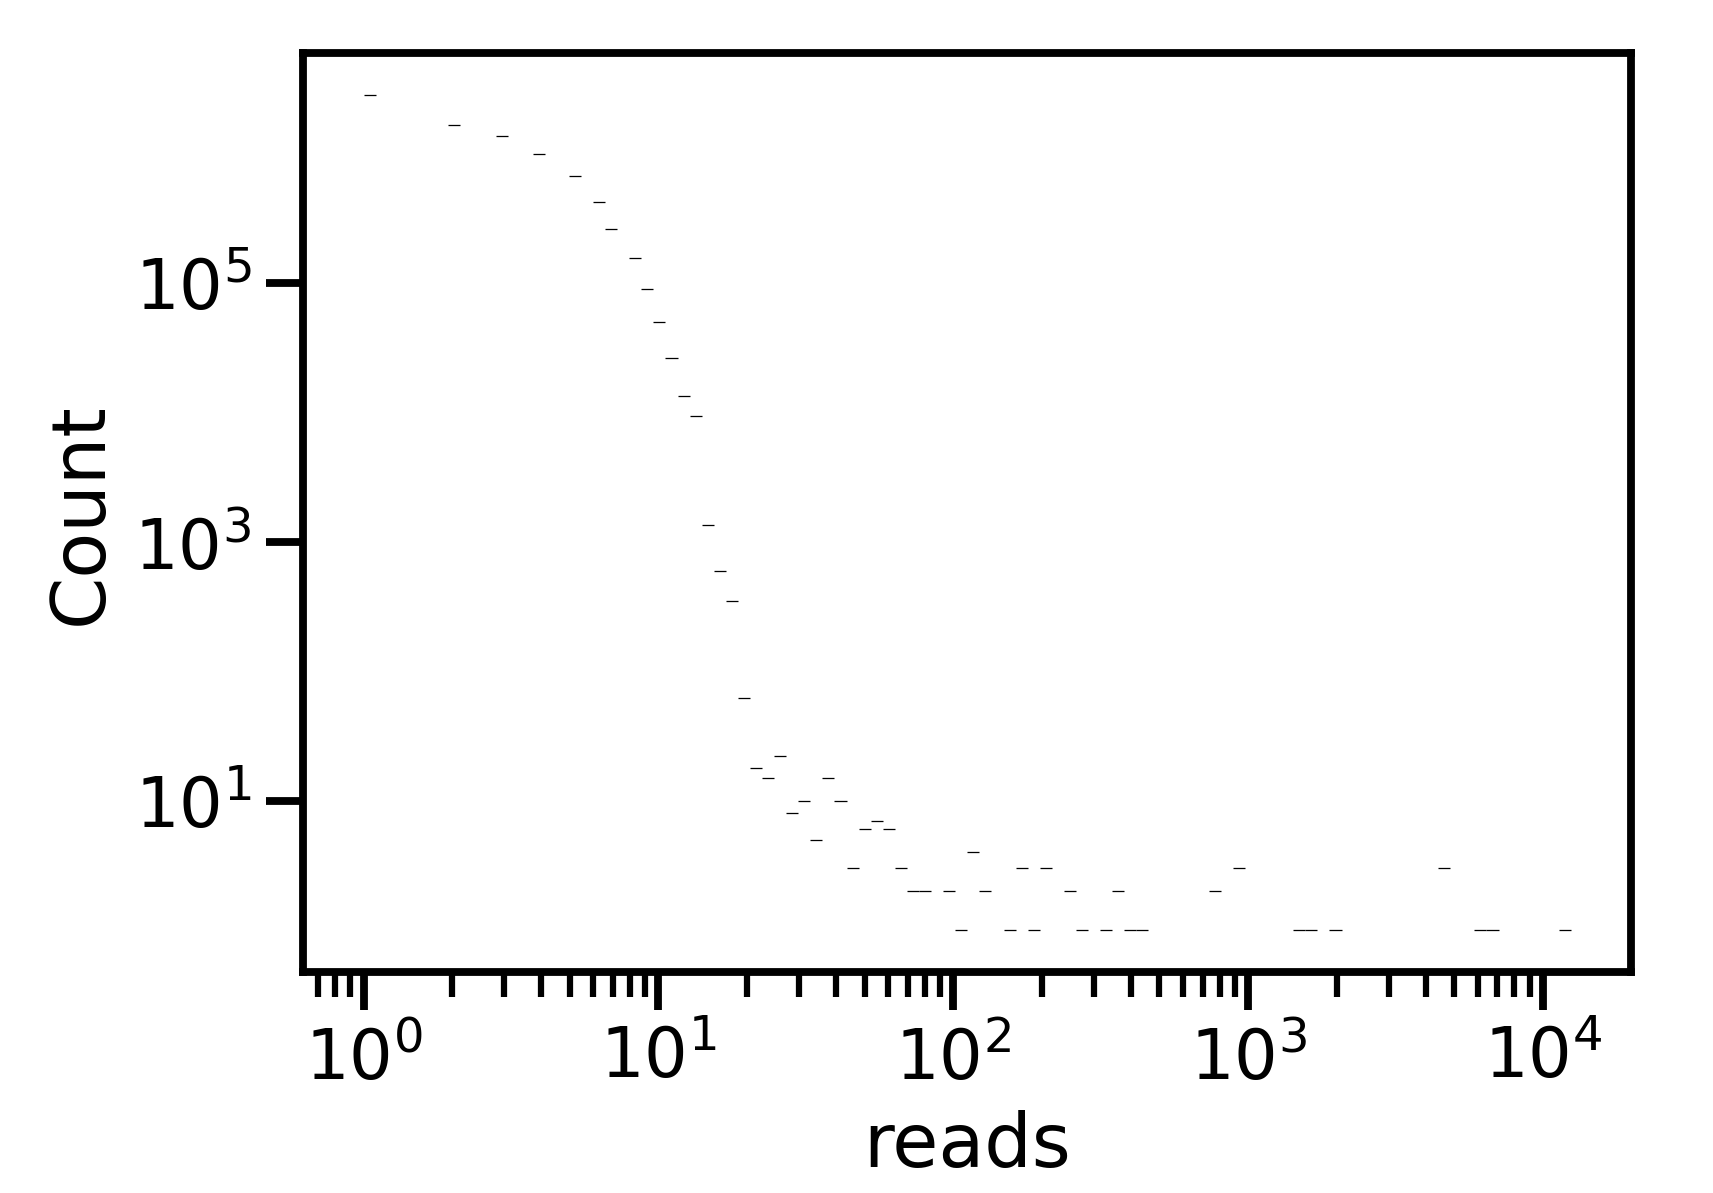

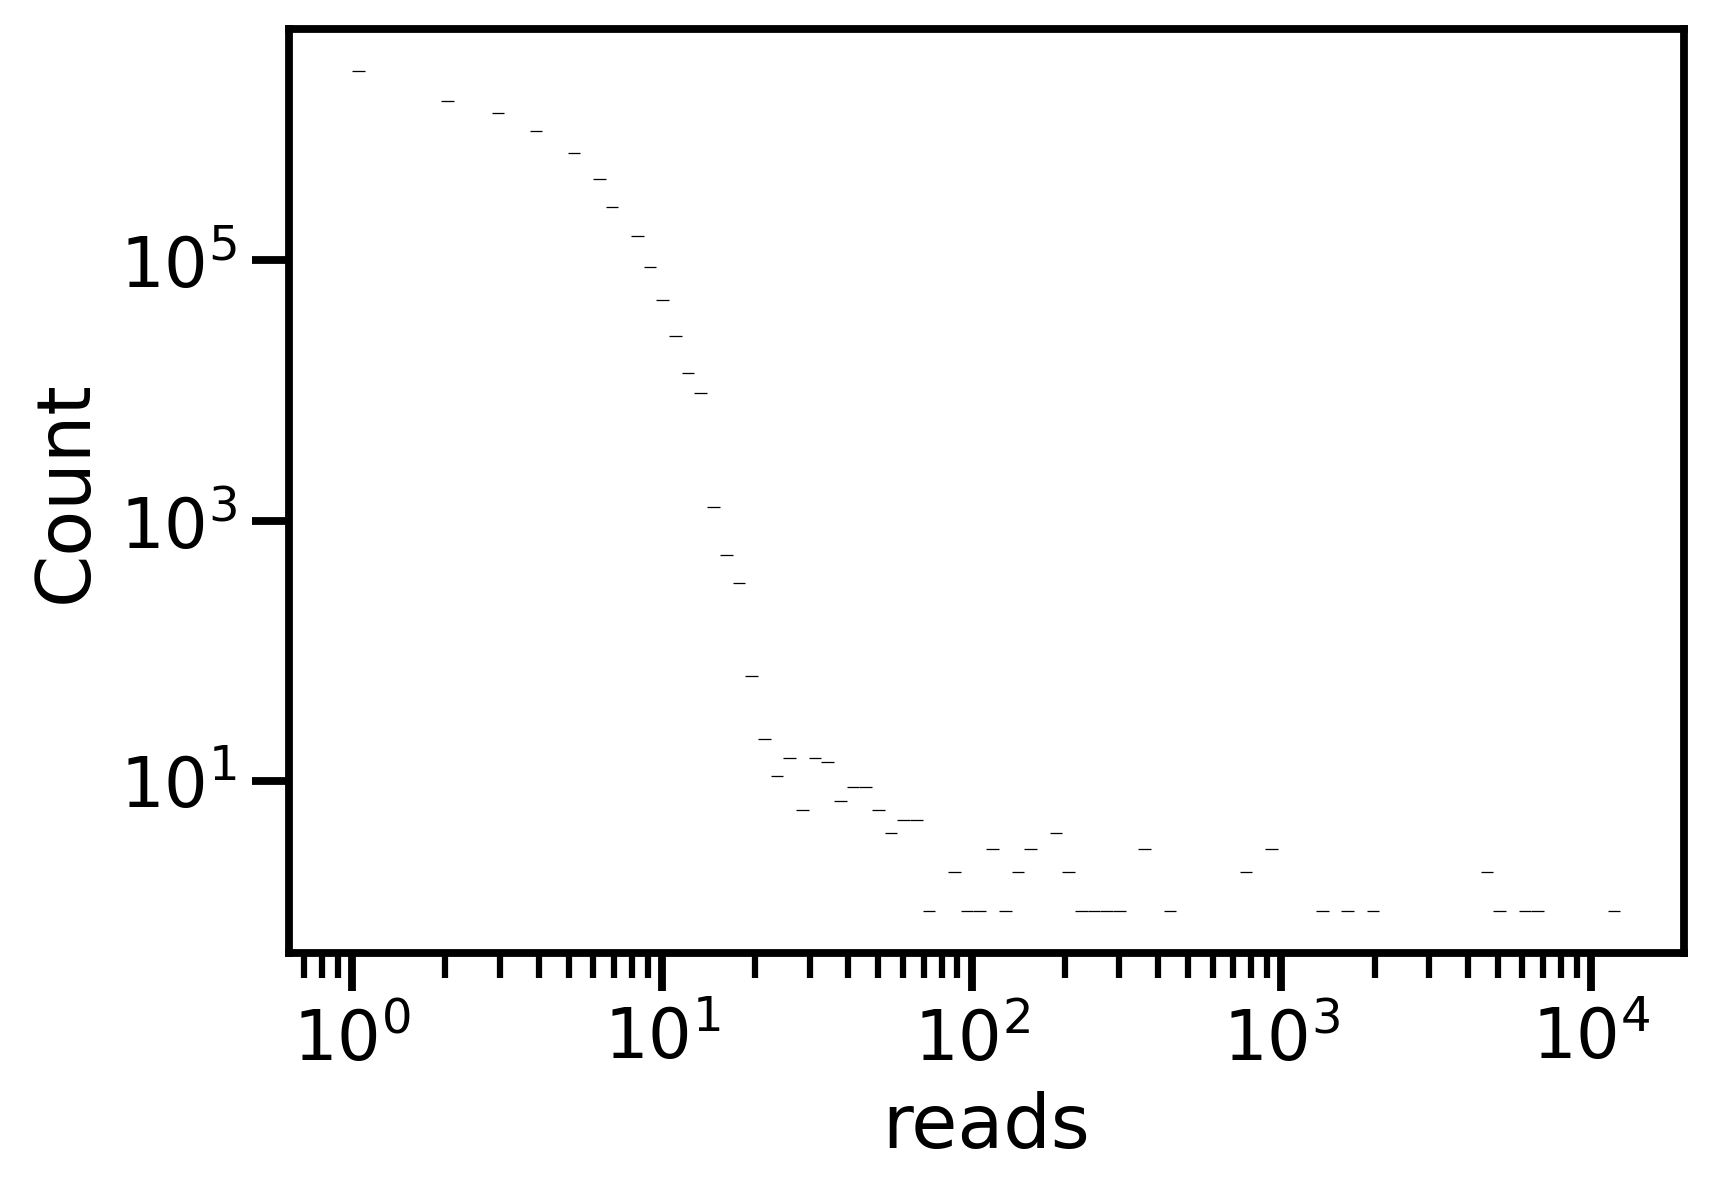

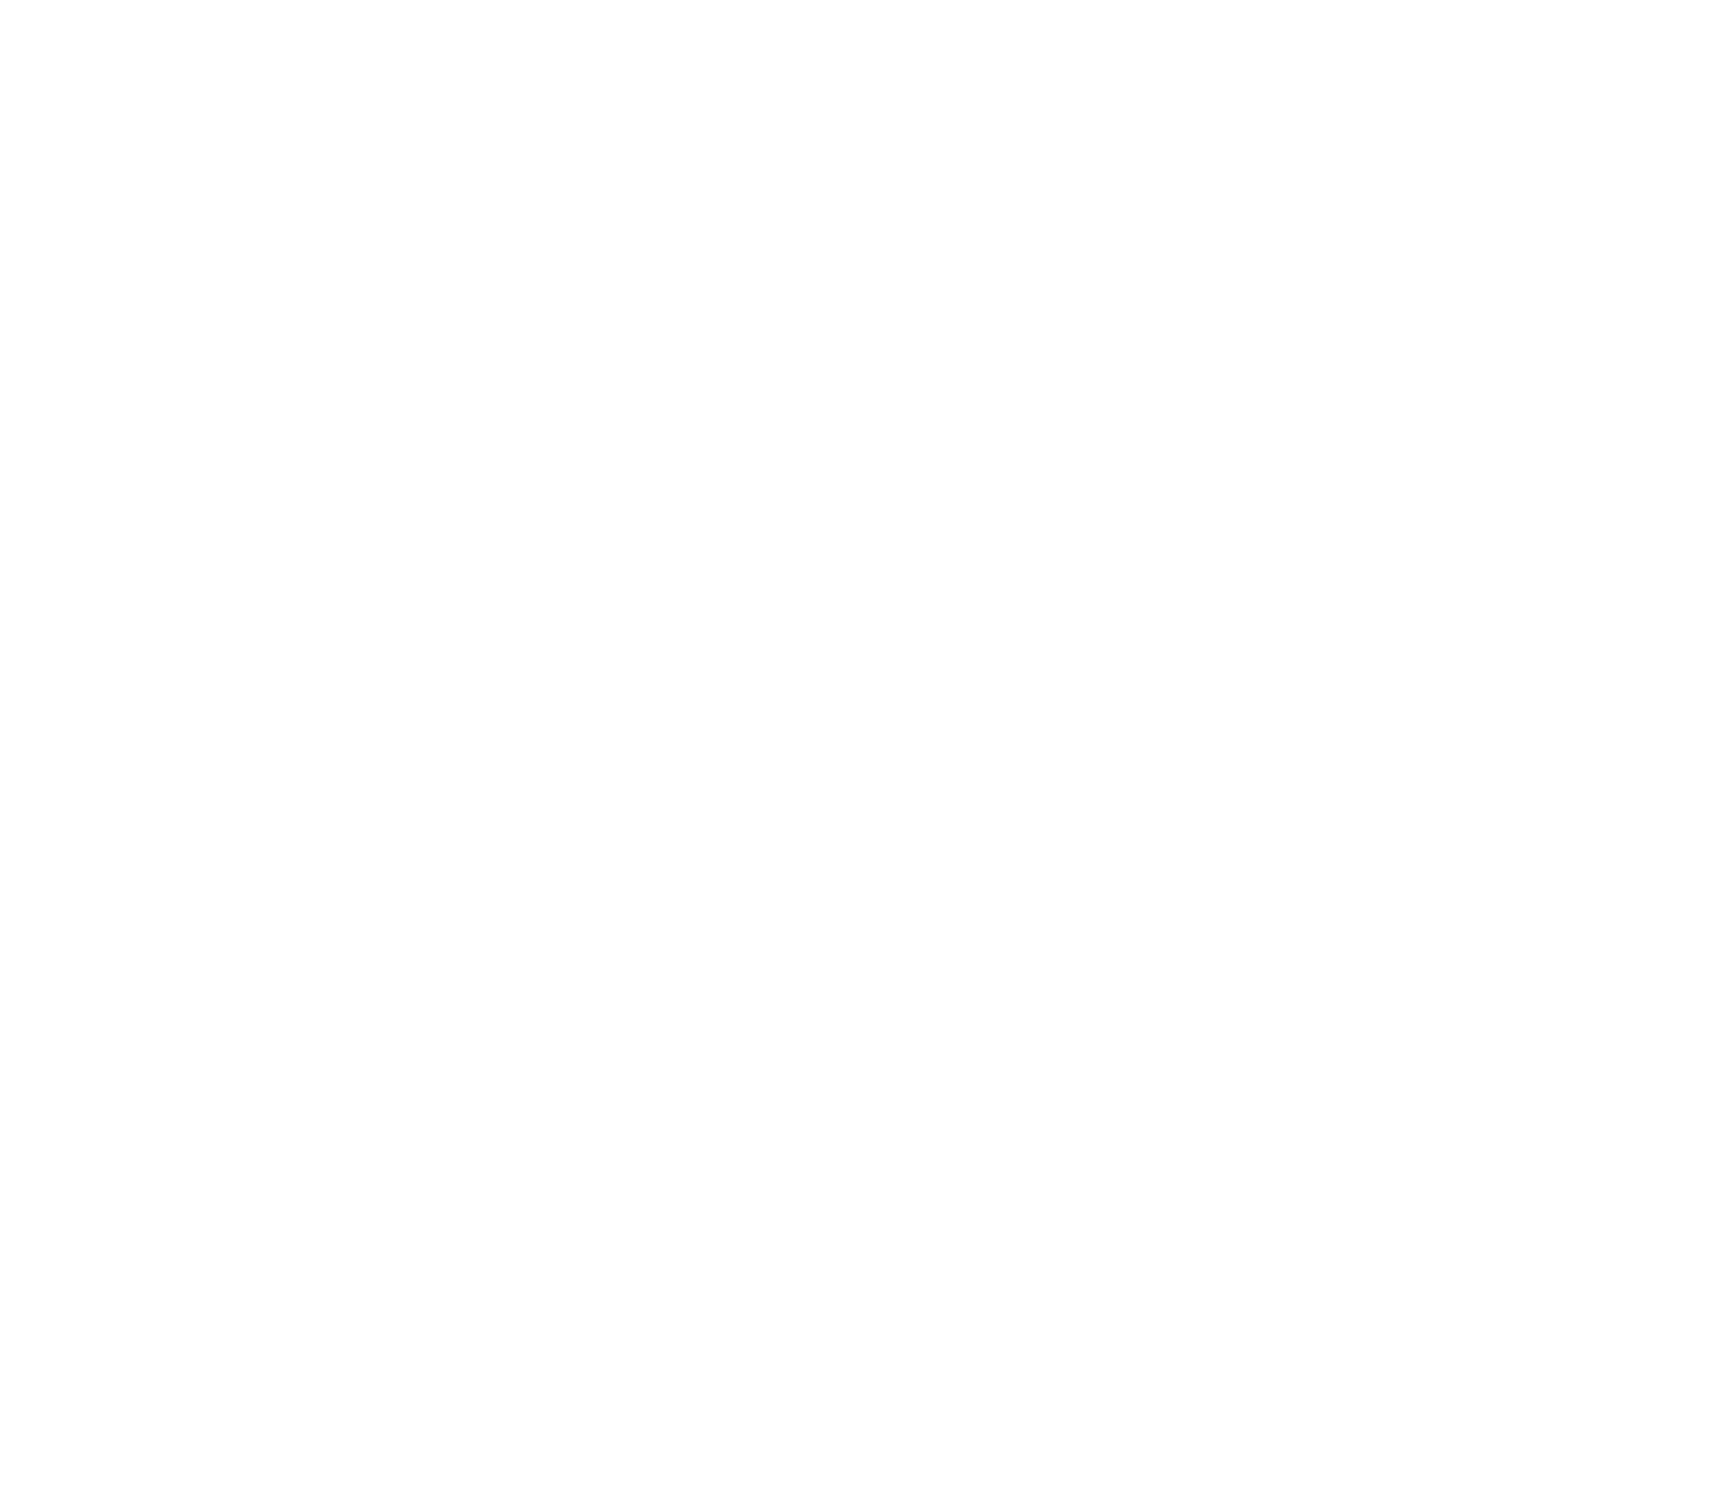

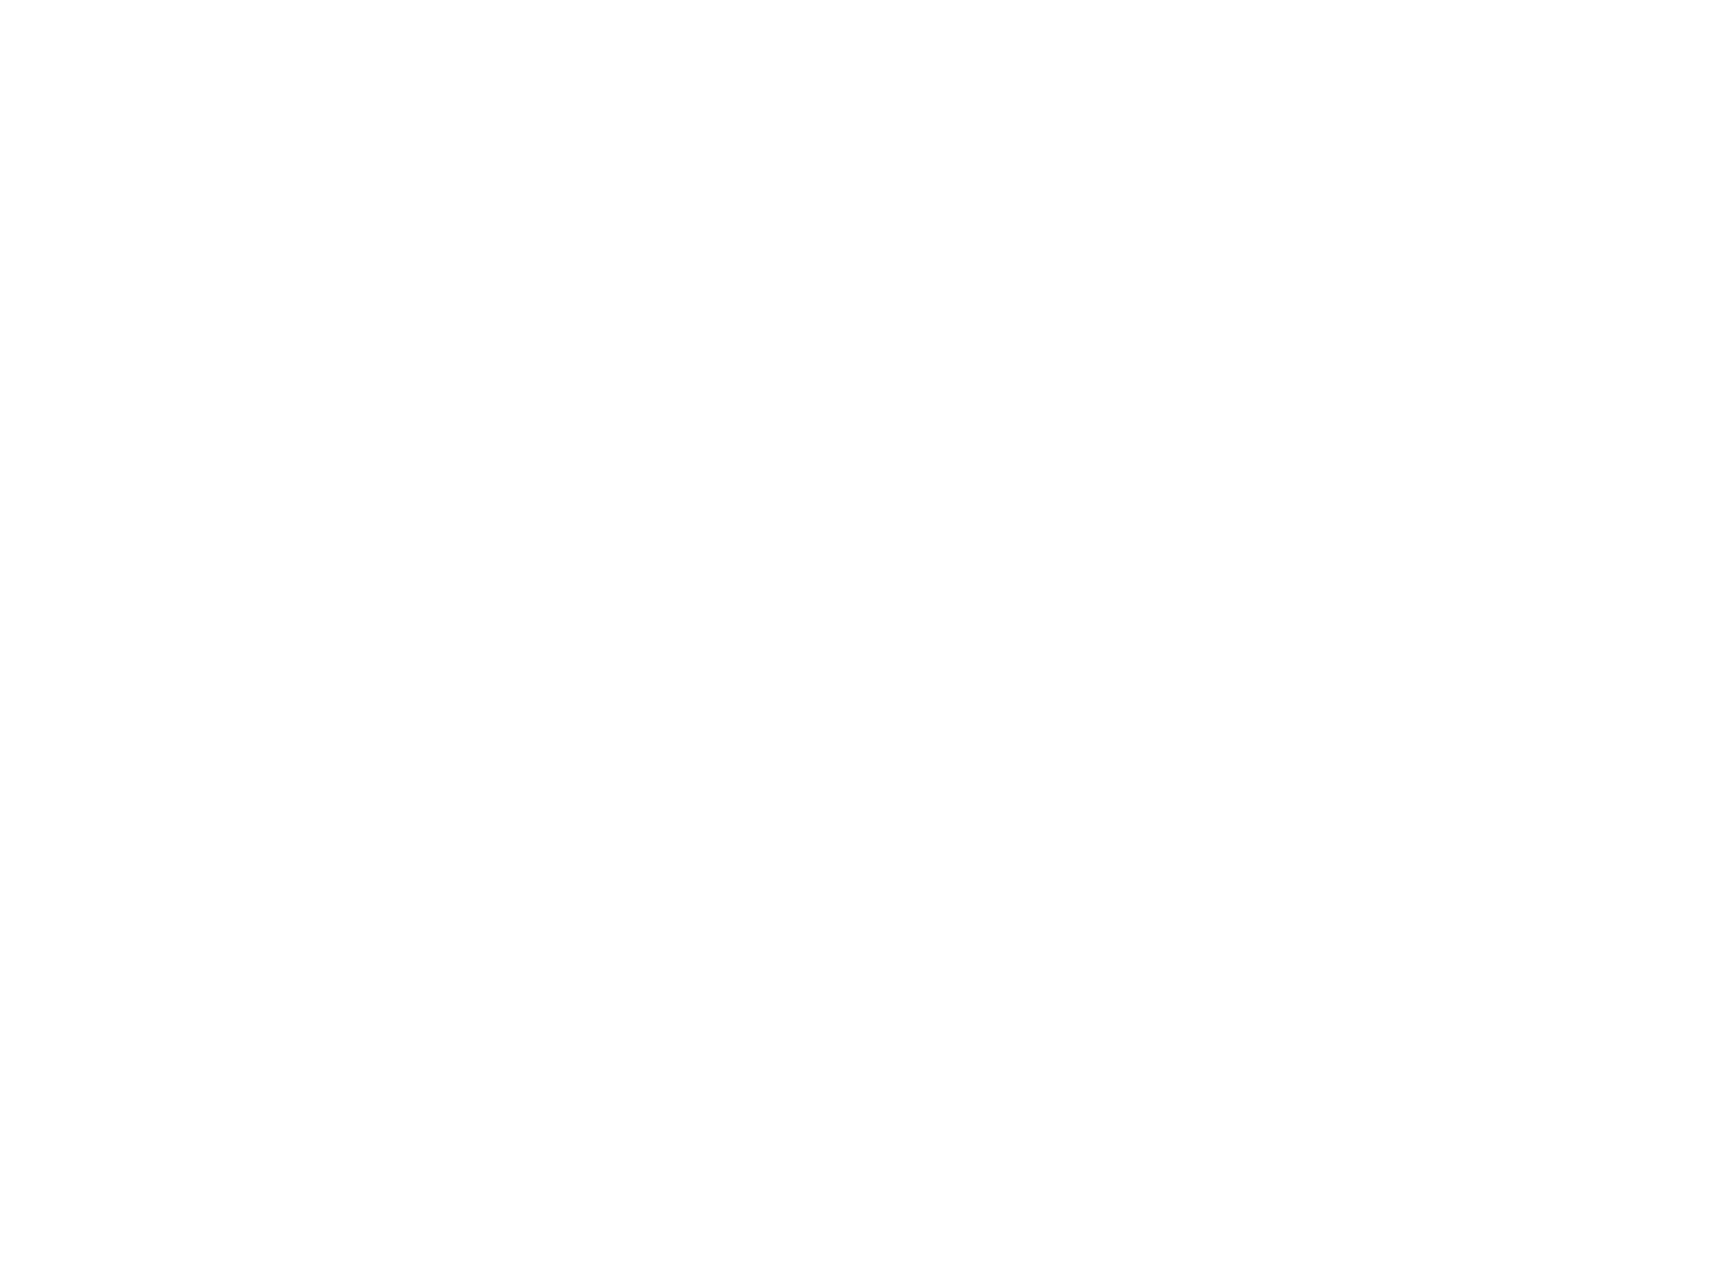

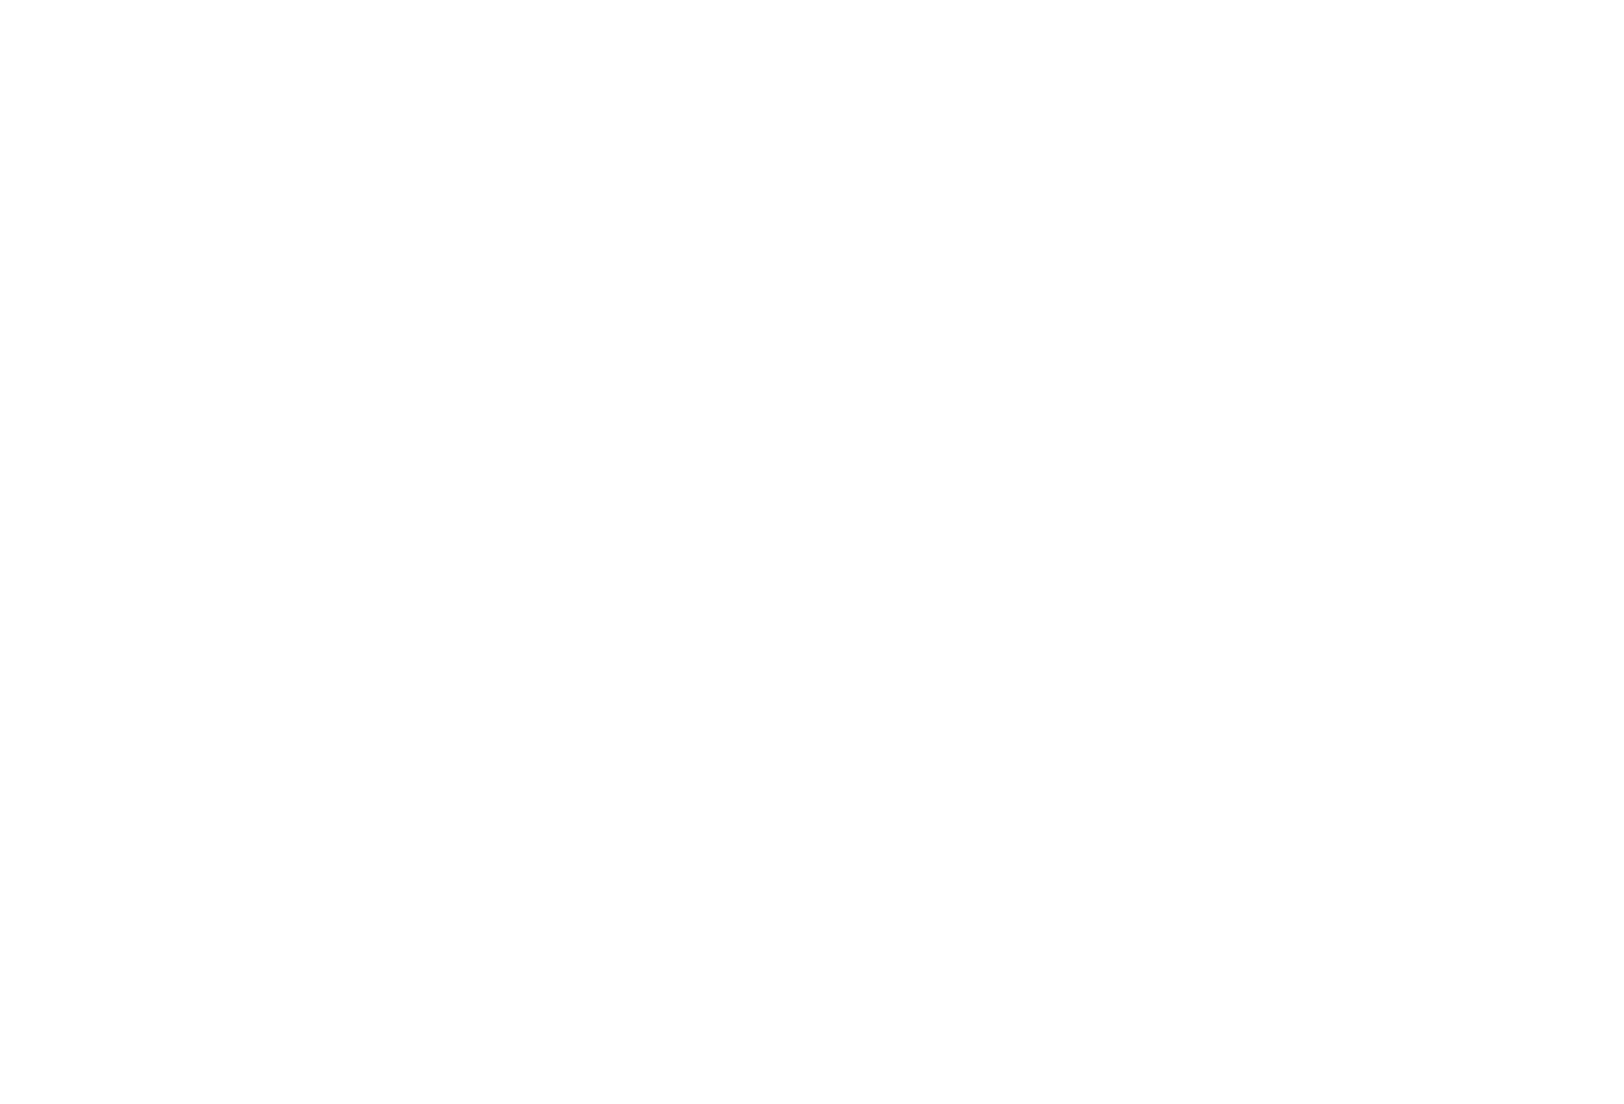

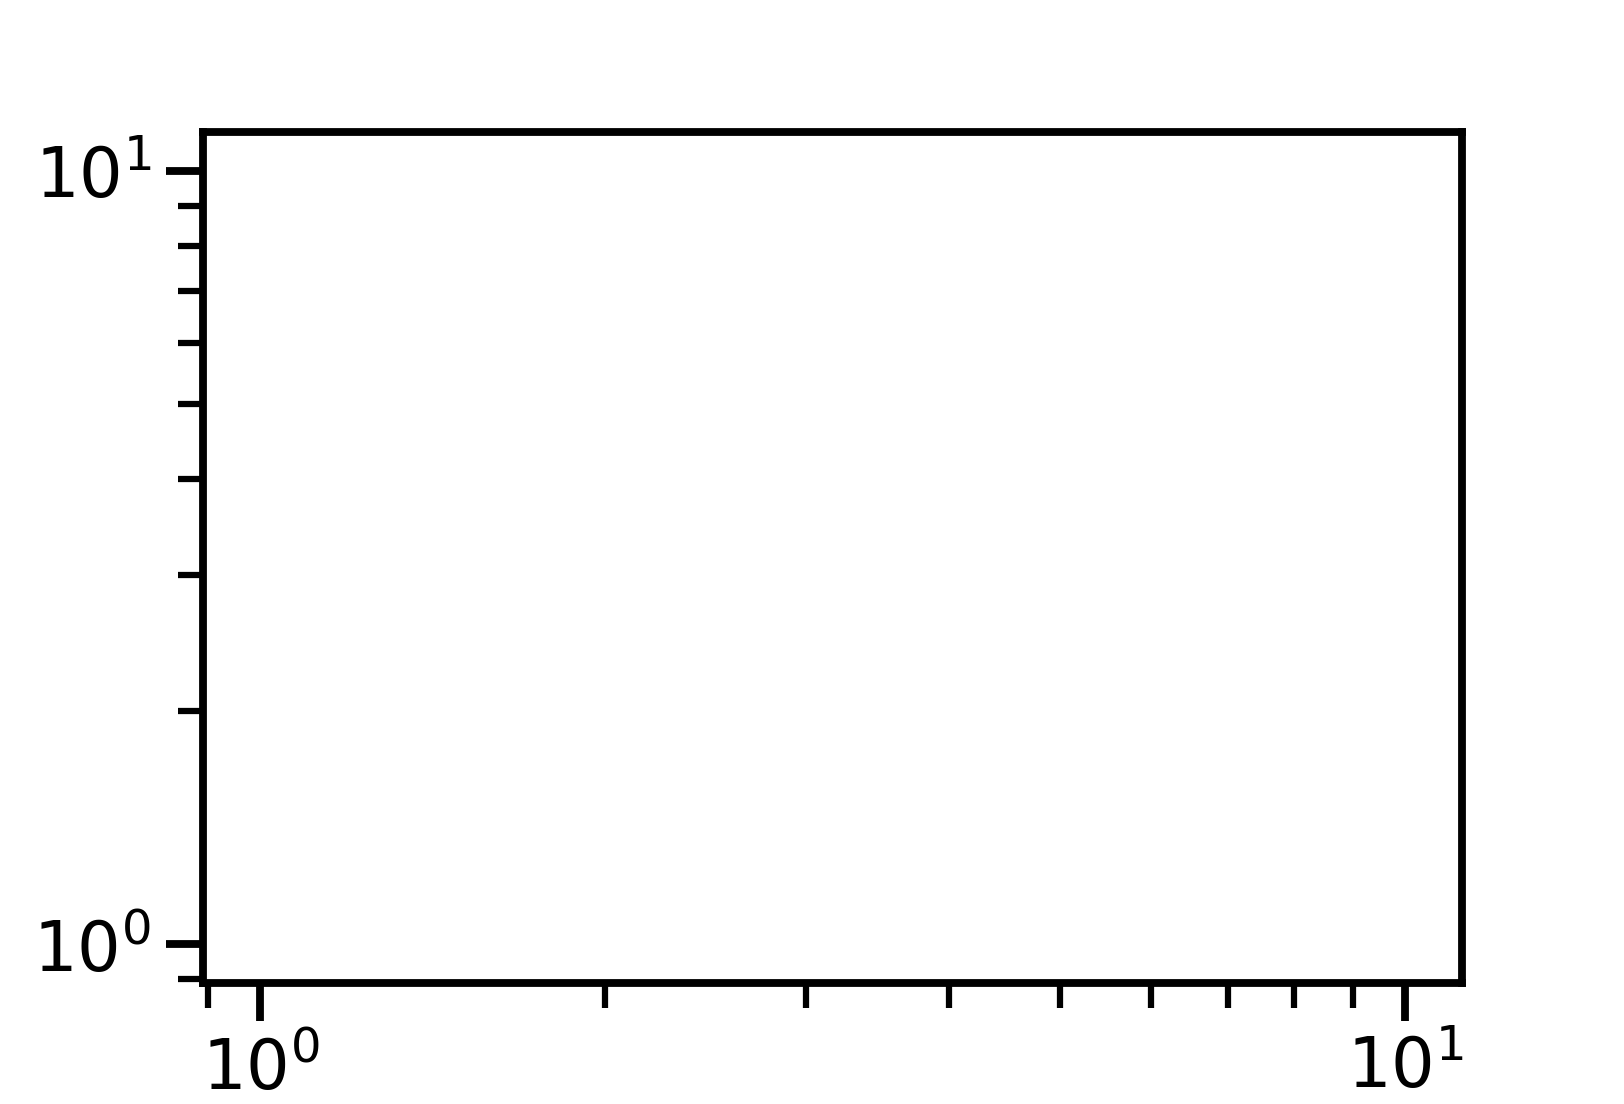

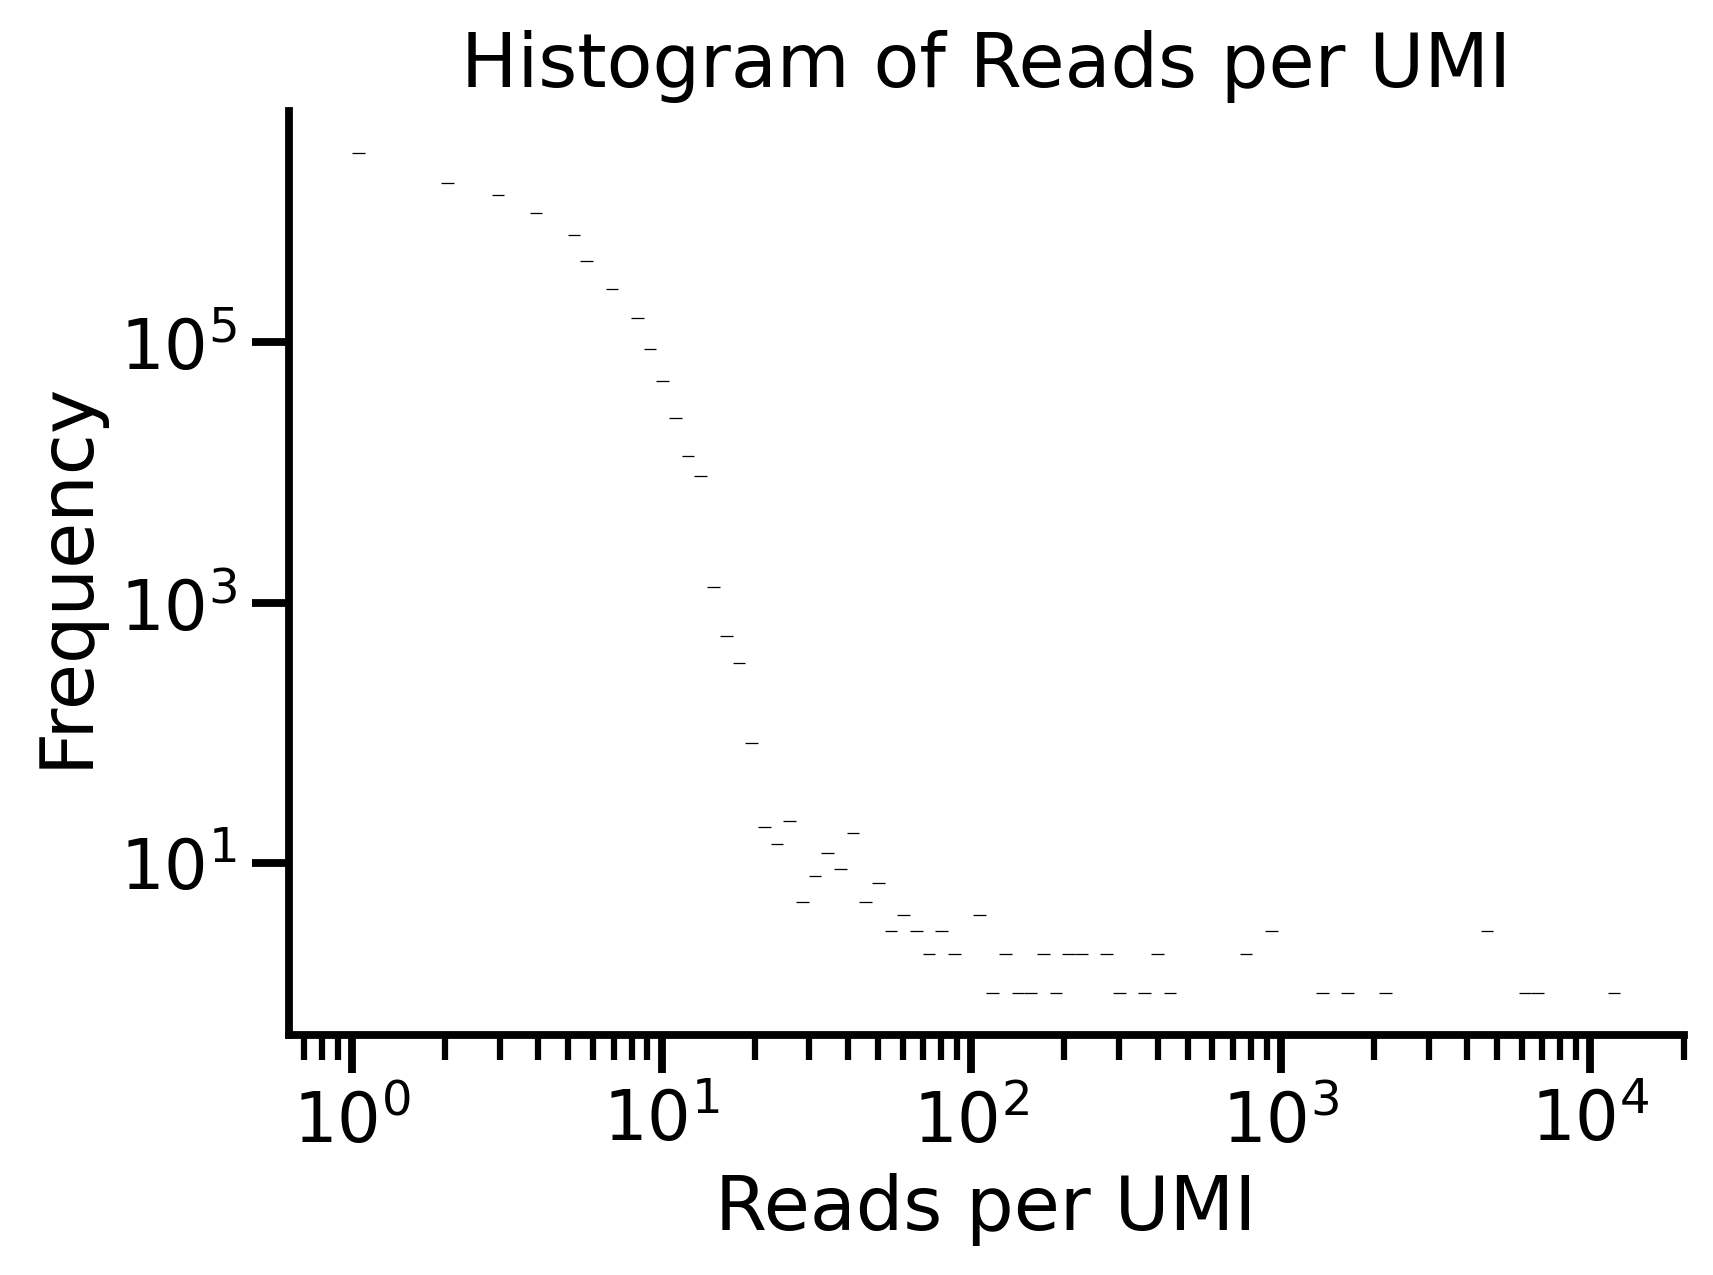

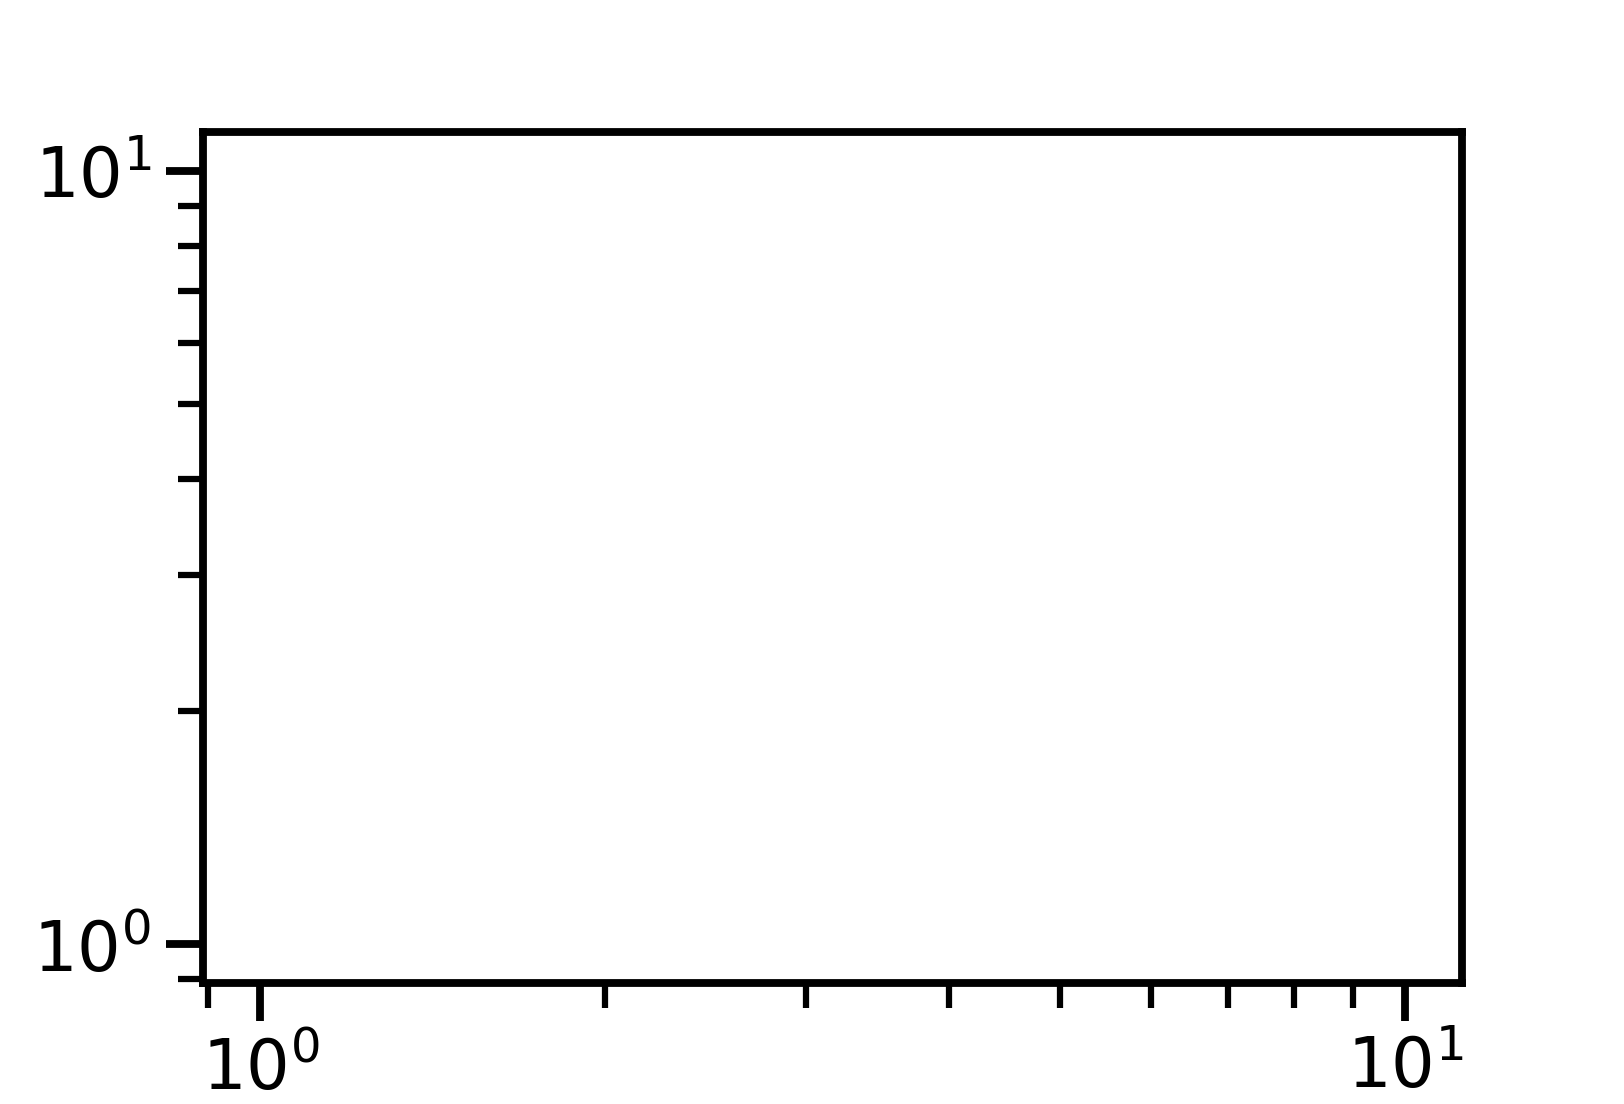

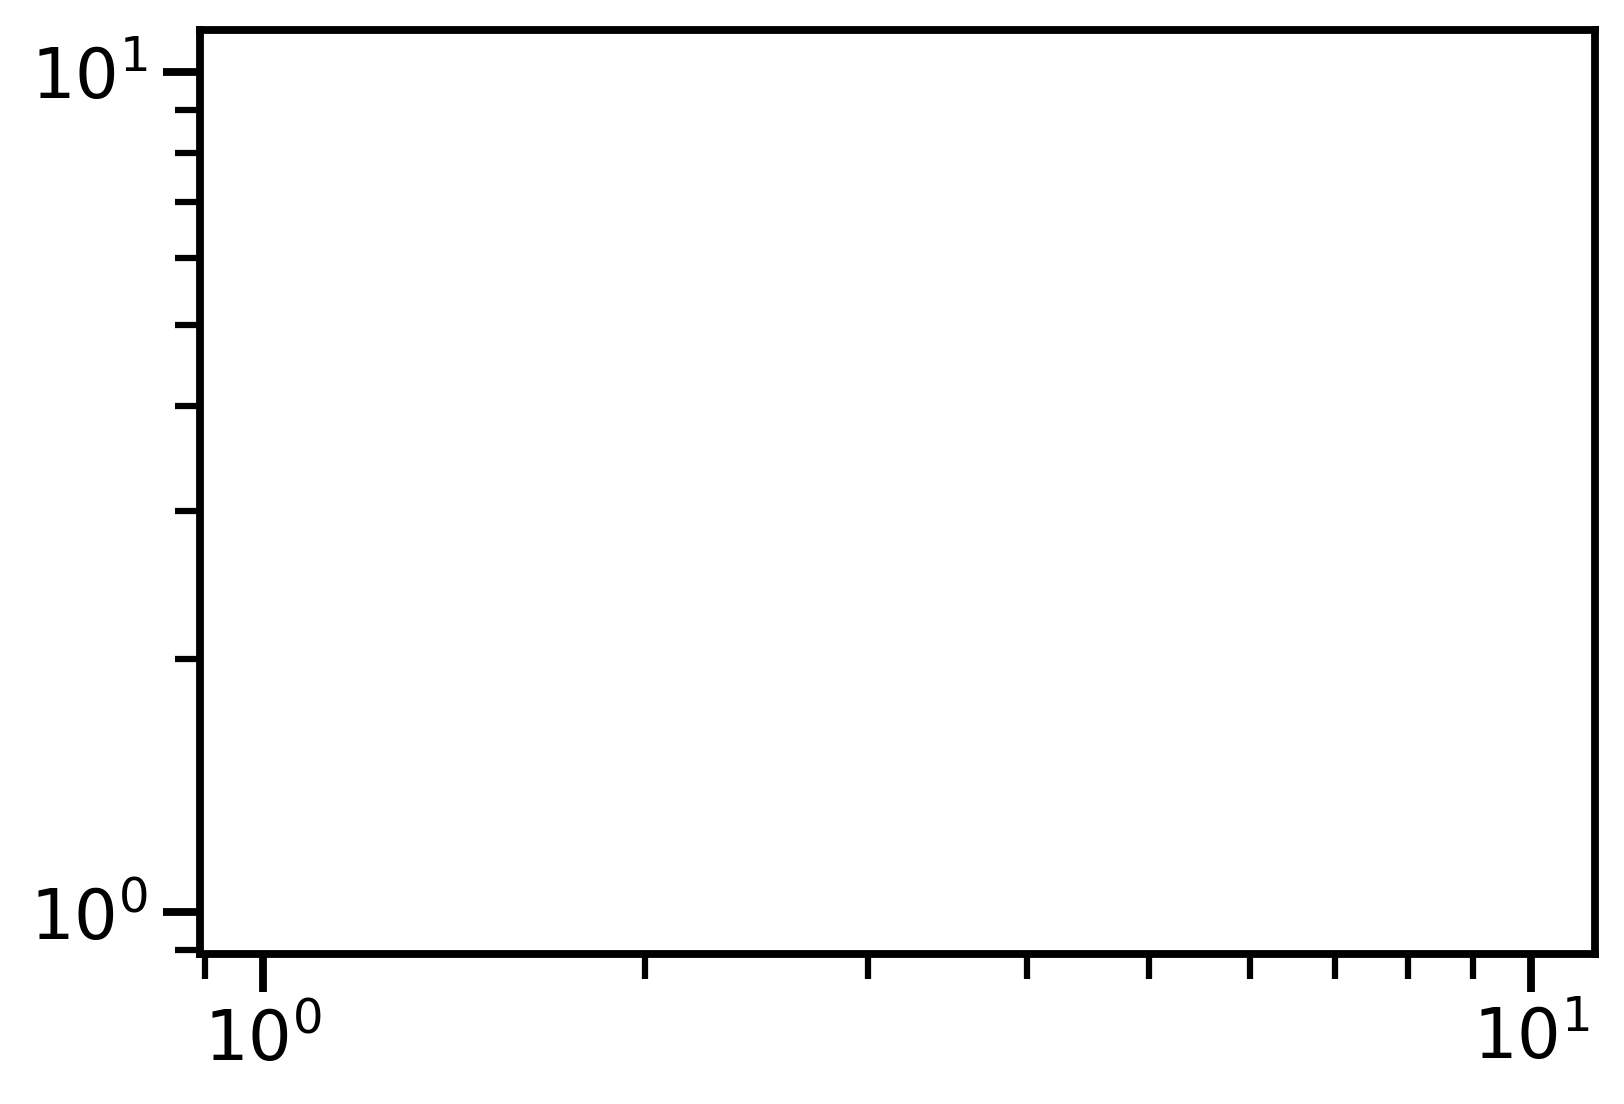

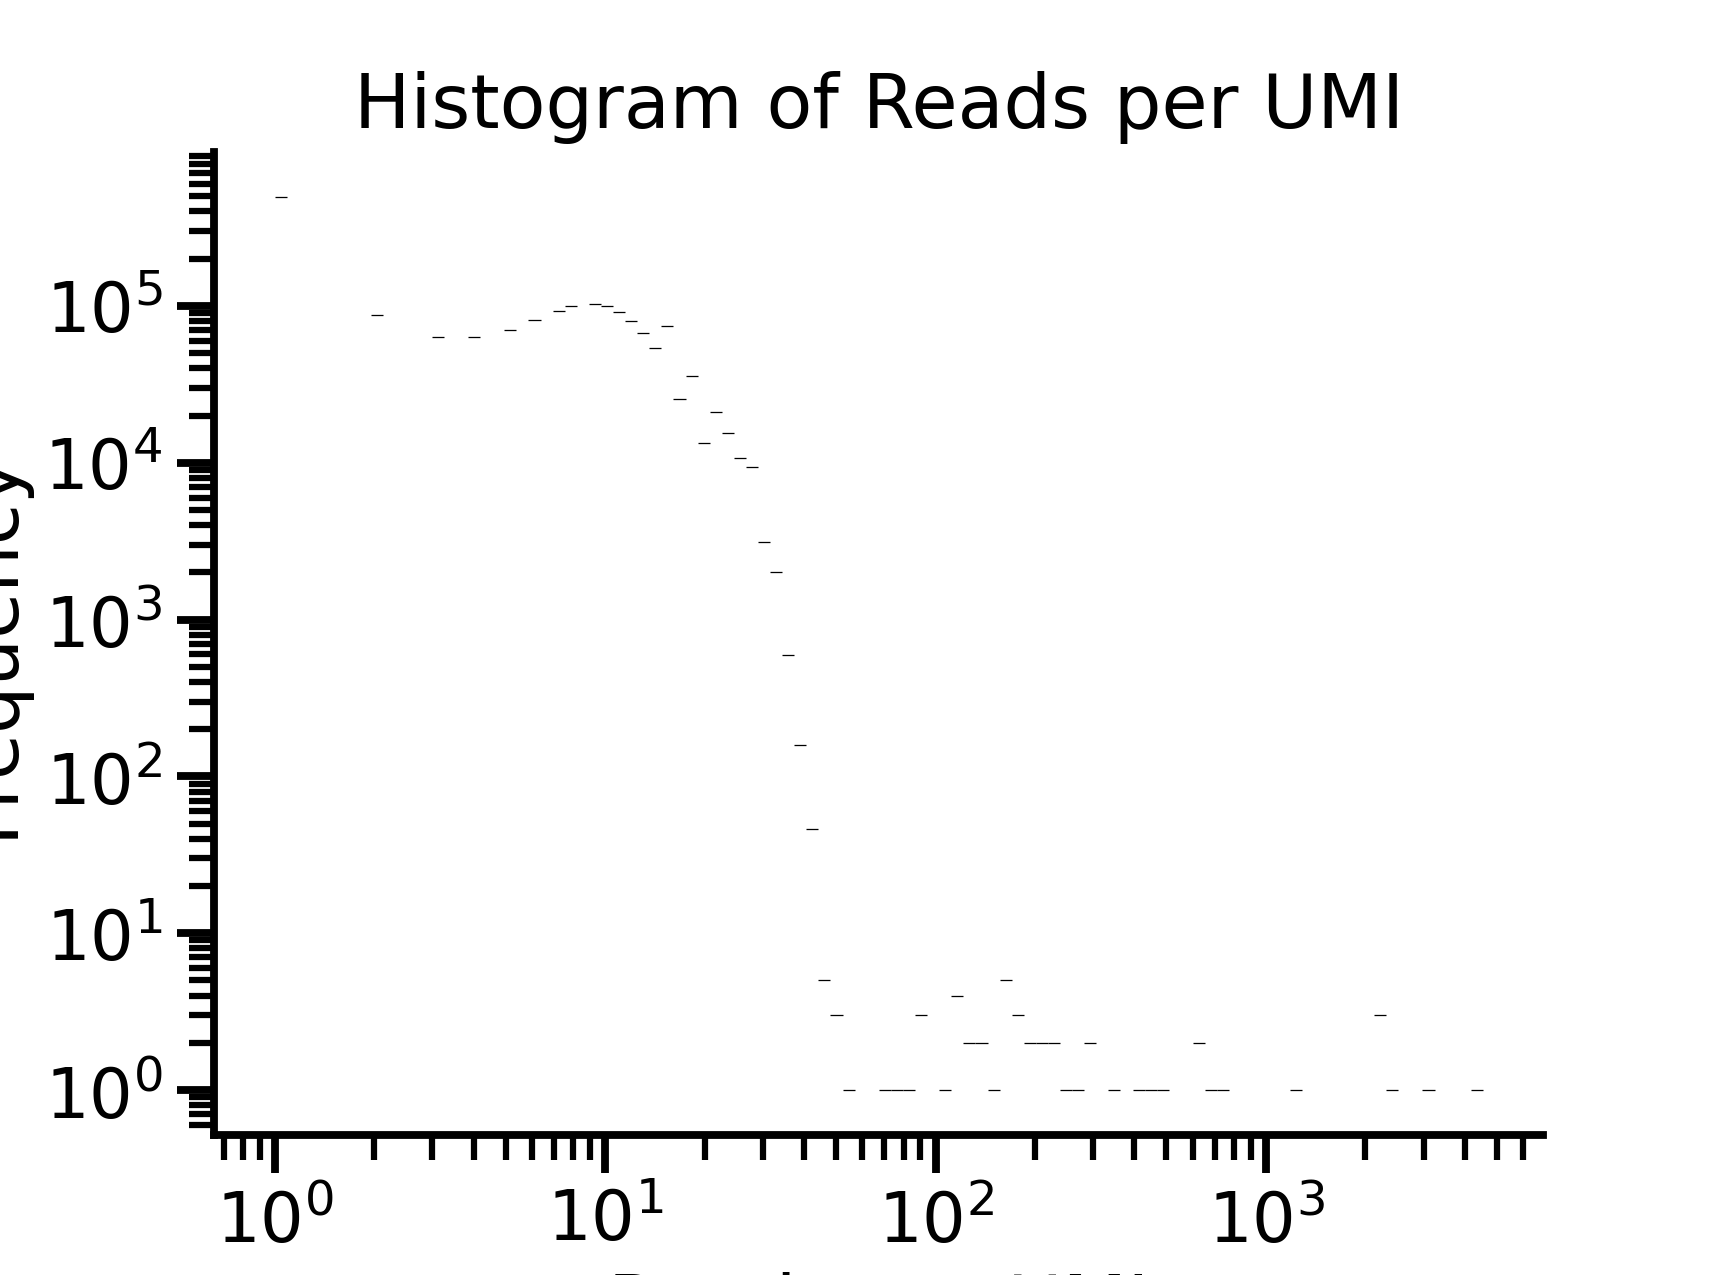

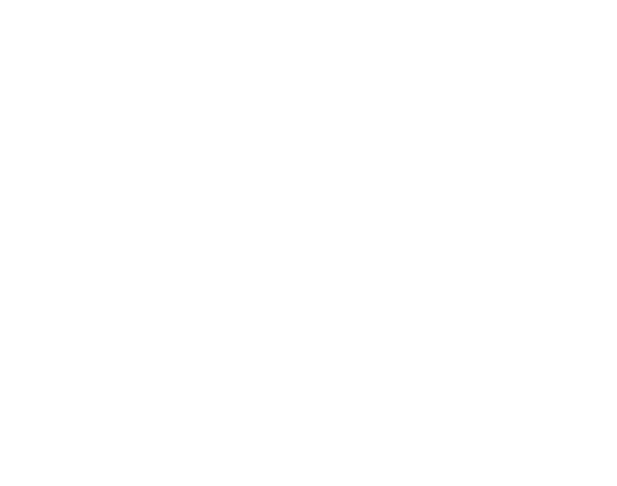

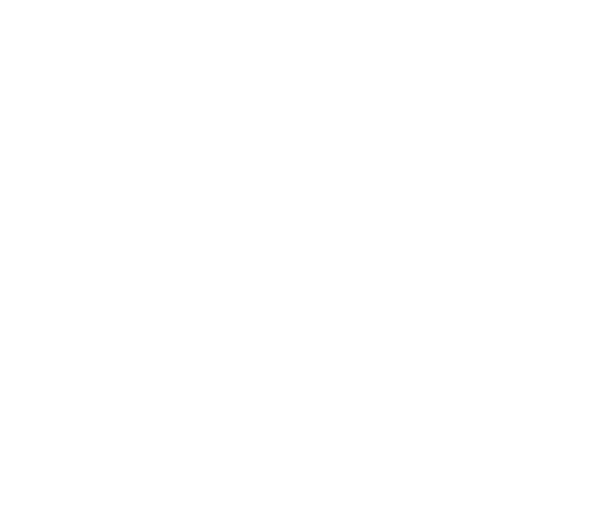

<Figure size 1800x1200 with 0 Axes>

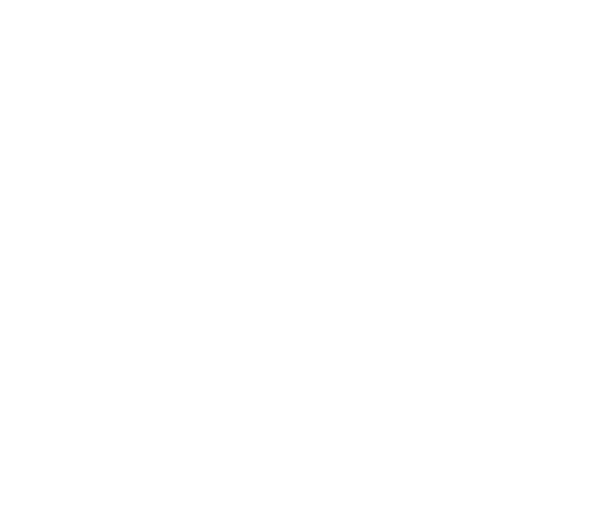

<Figure size 1800x1200 with 0 Axes>

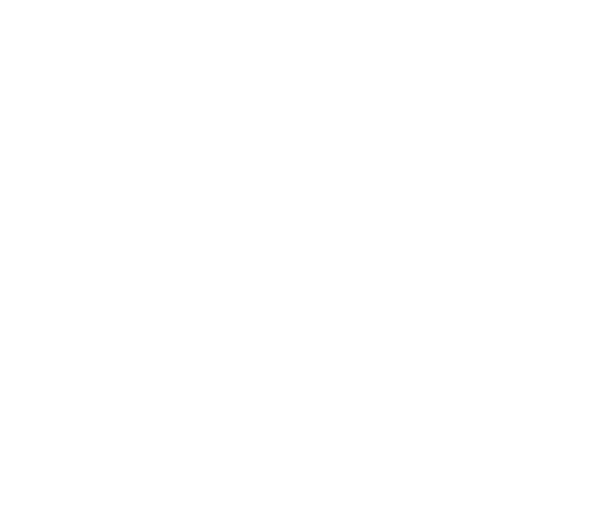

<Figure size 1800x1200 with 0 Axes>

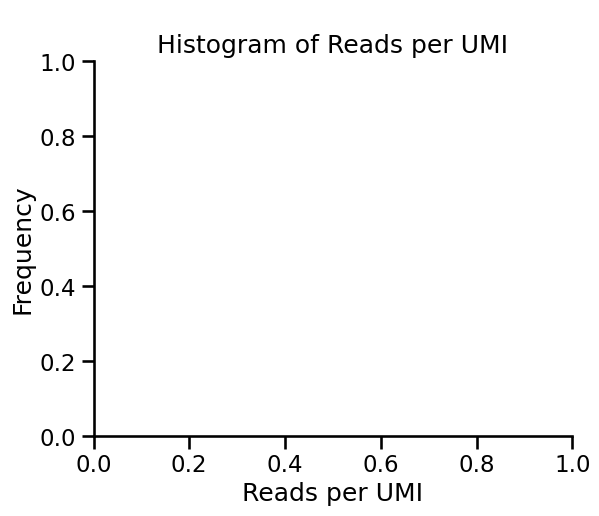

<Figure size 1800x1200 with 0 Axes>

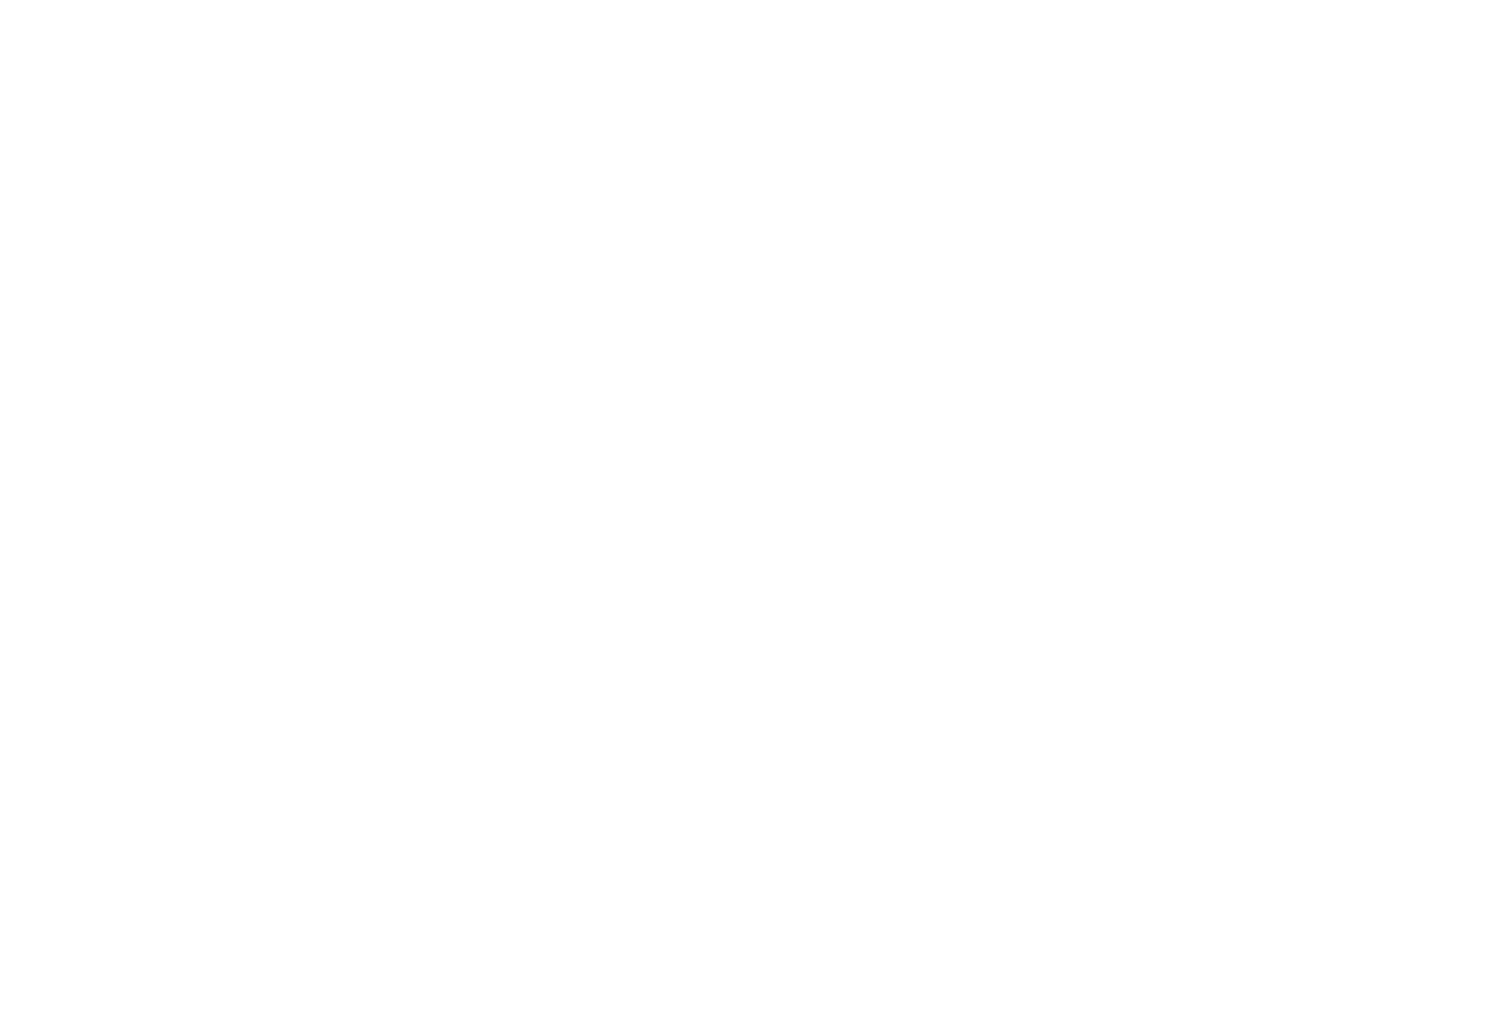

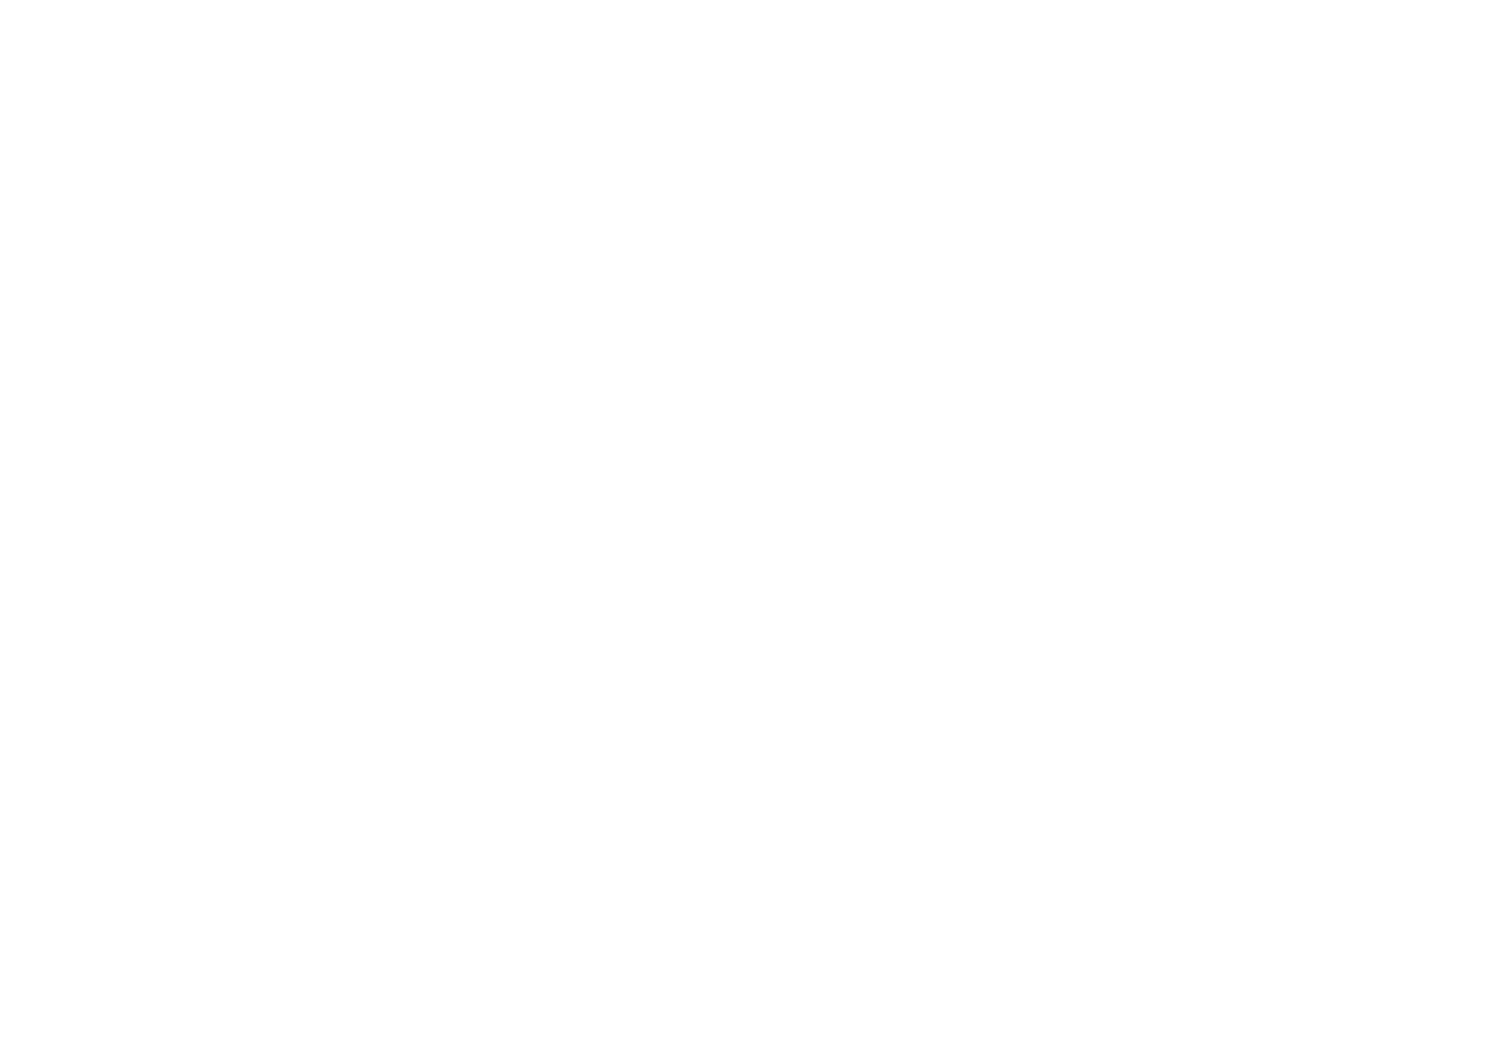

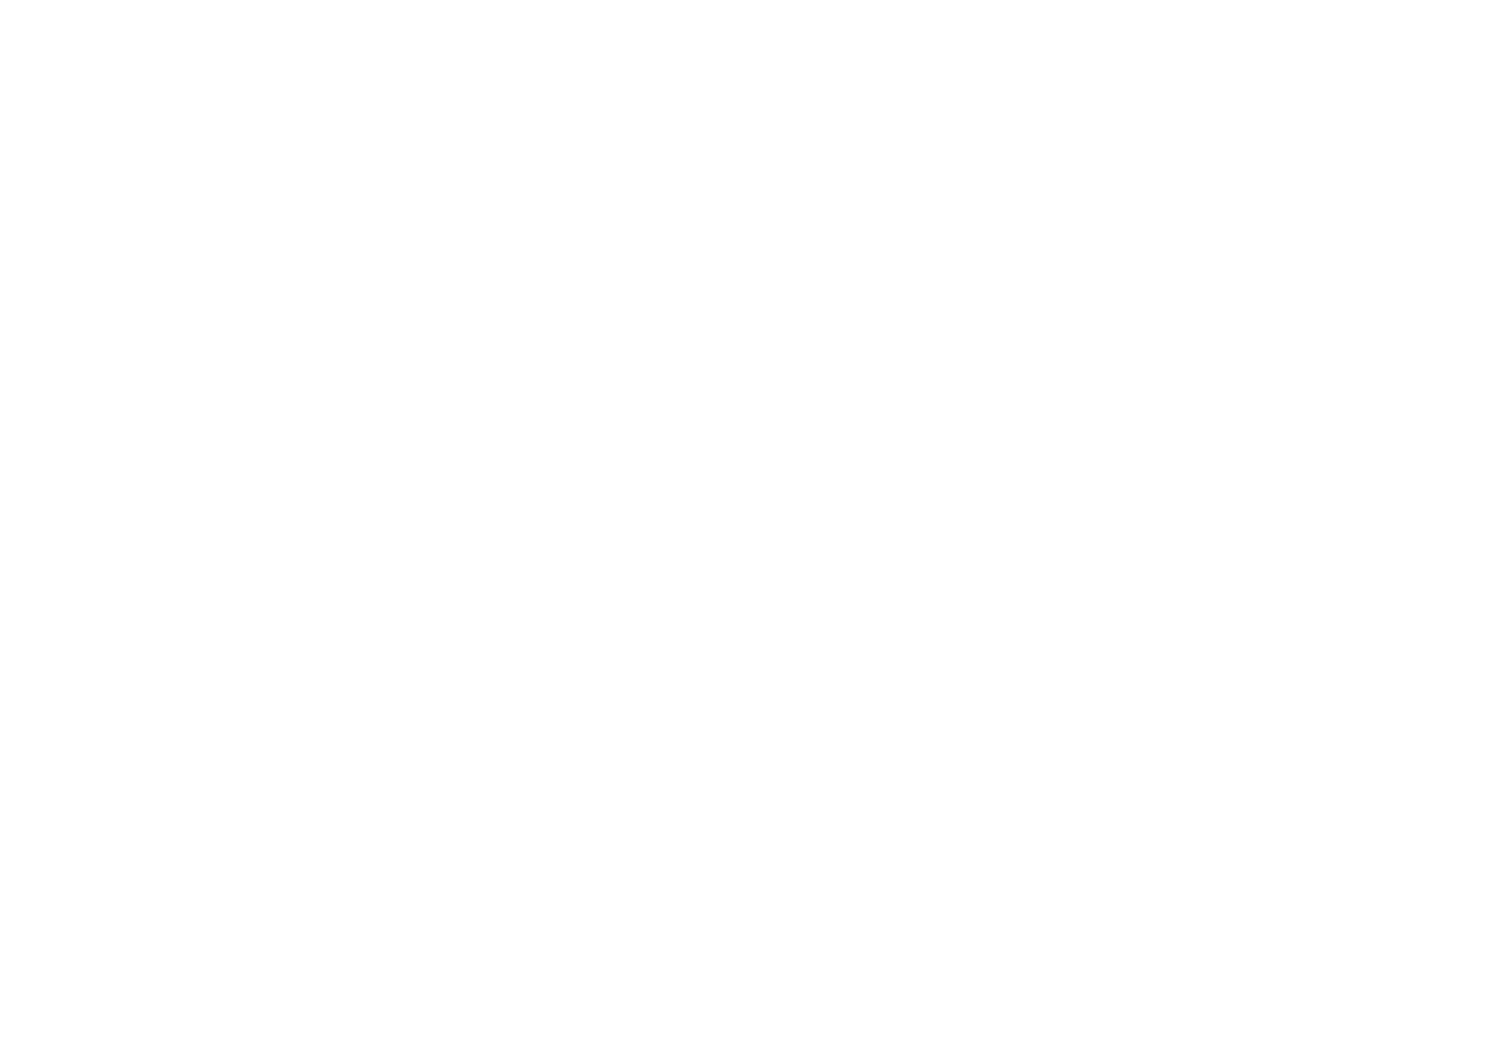

 39%|███▉      | 44/113 [02:12<04:19,  3.76s/it]

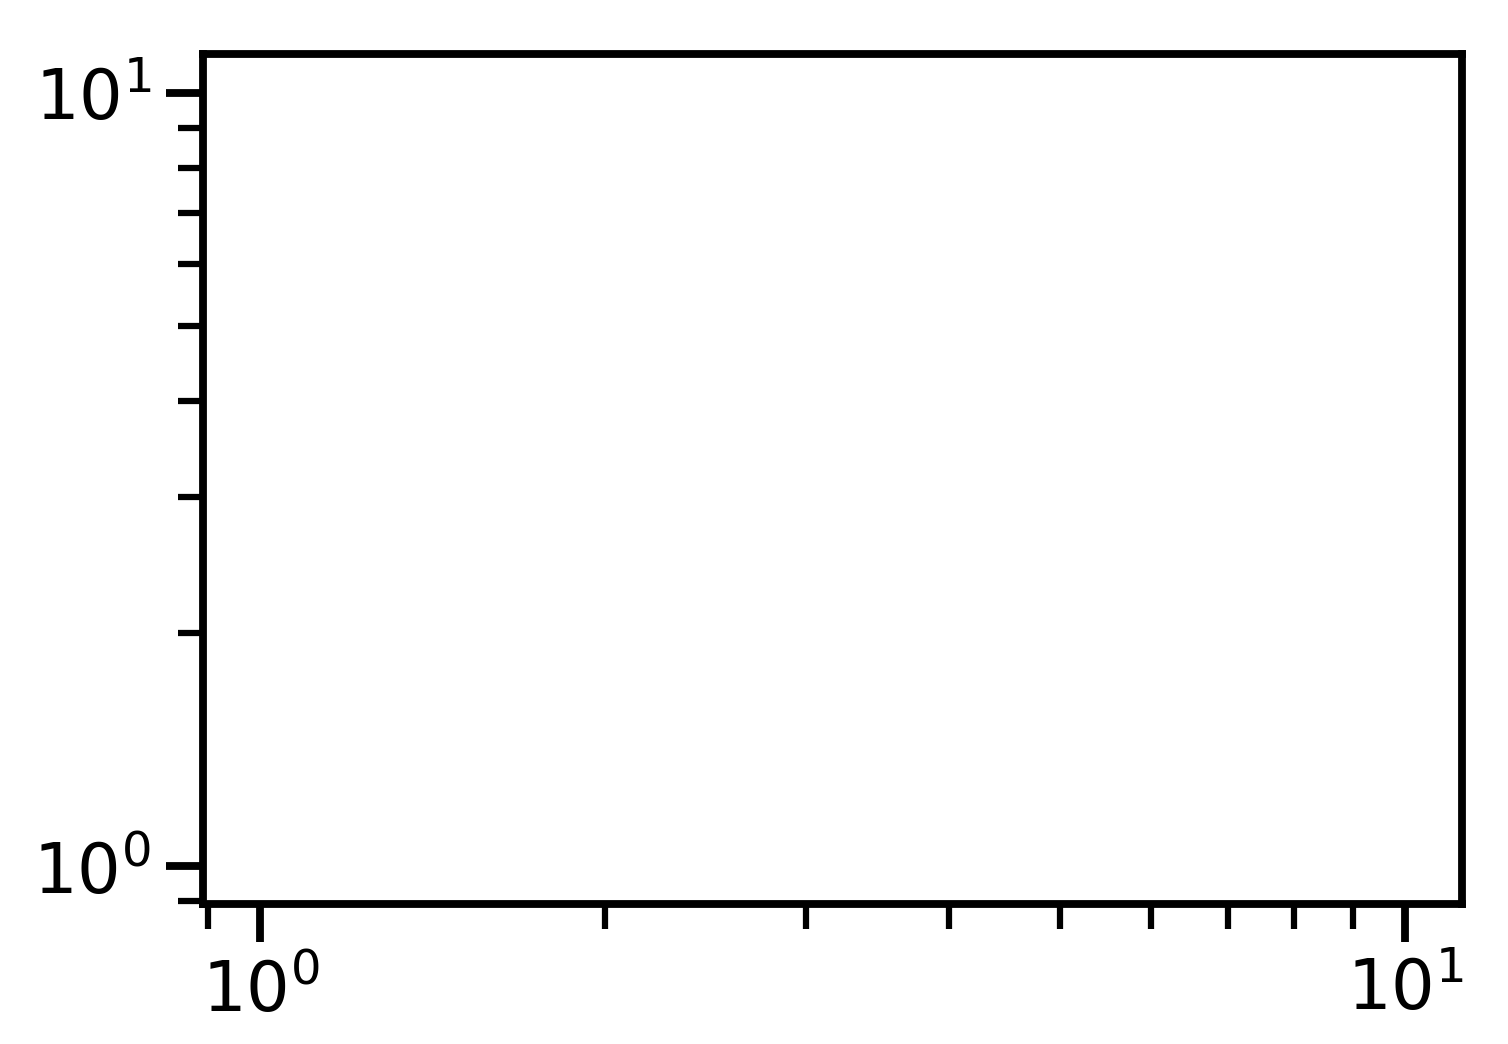

<Figure size 1800x1200 with 0 Axes>

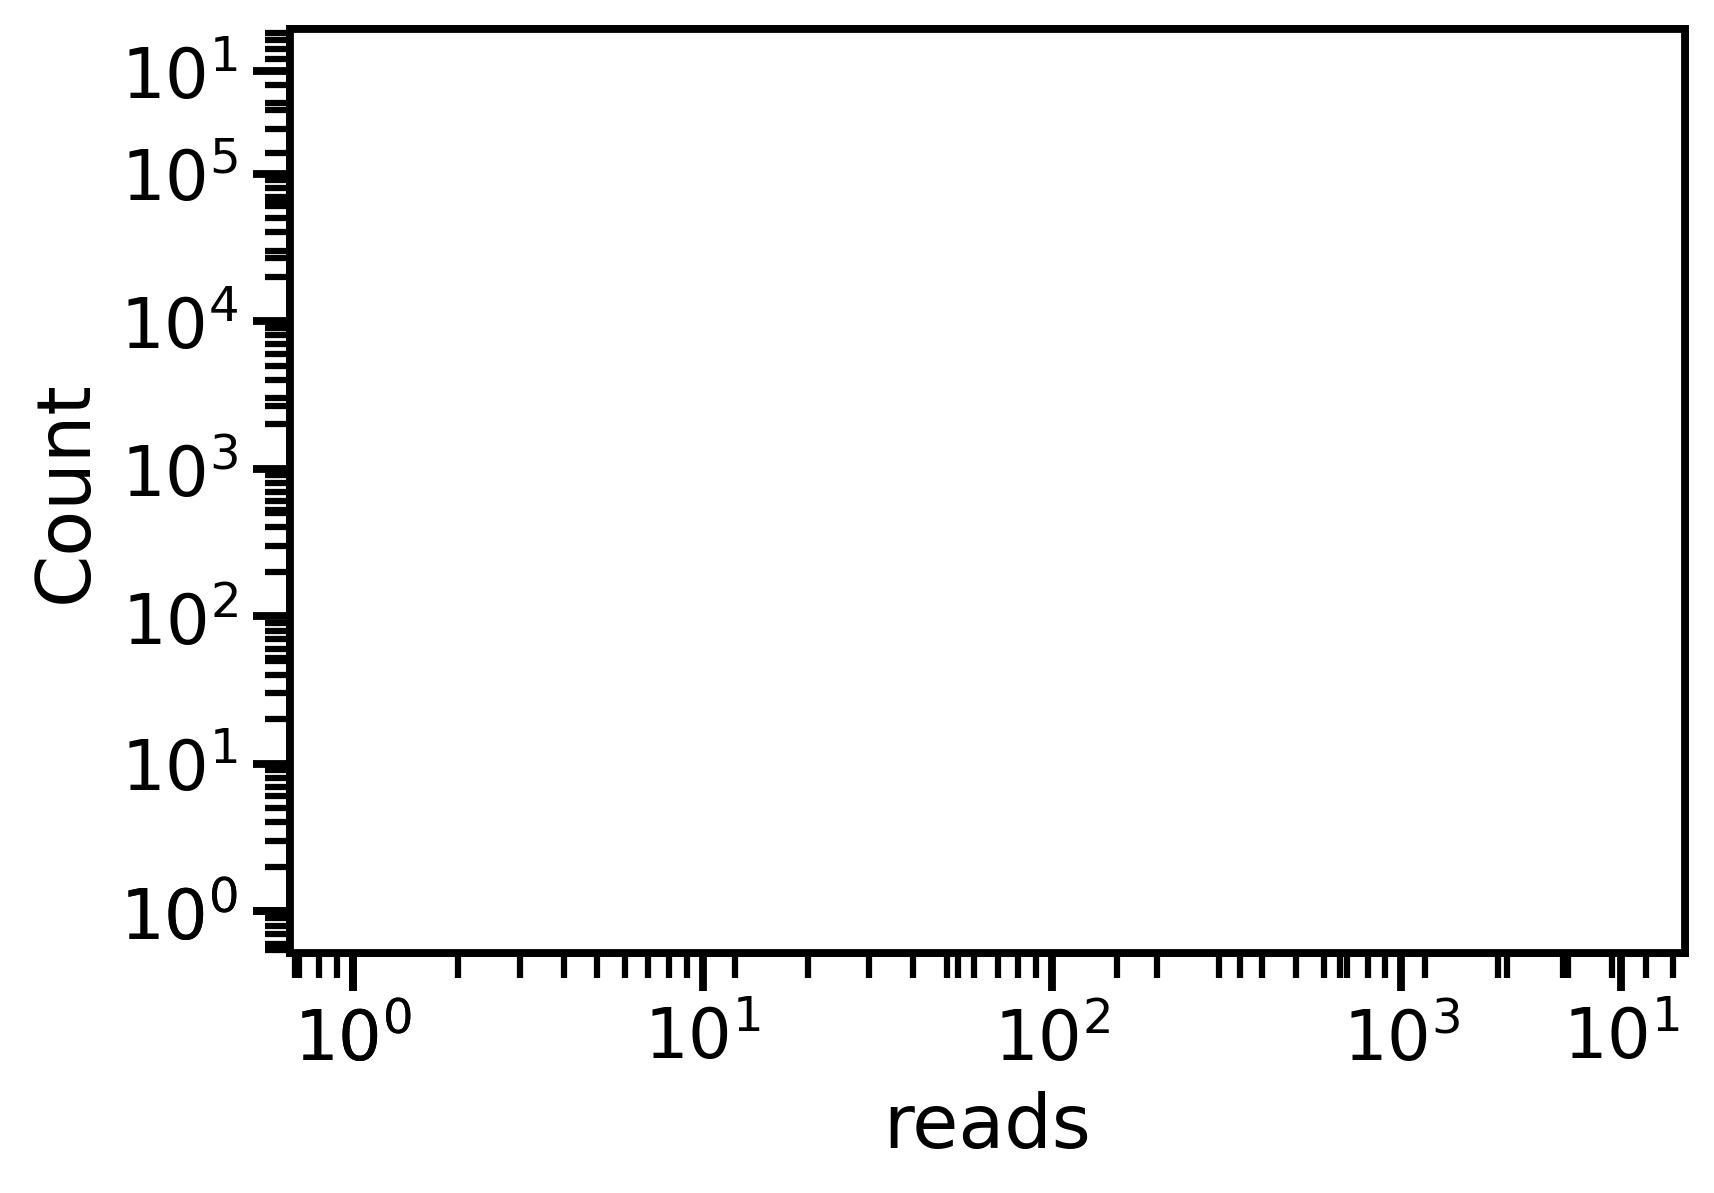

 57%|█████▋    | 64/113 [02:14<01:22,  1.69s/it]

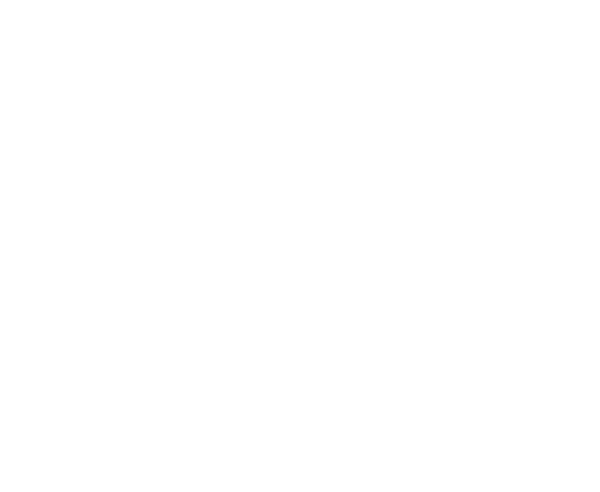

 58%|█████▊    | 65/113 [02:17<01:23,  1.74s/it]

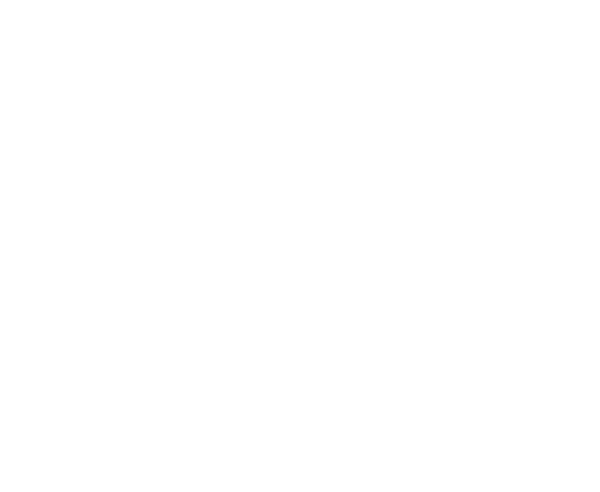

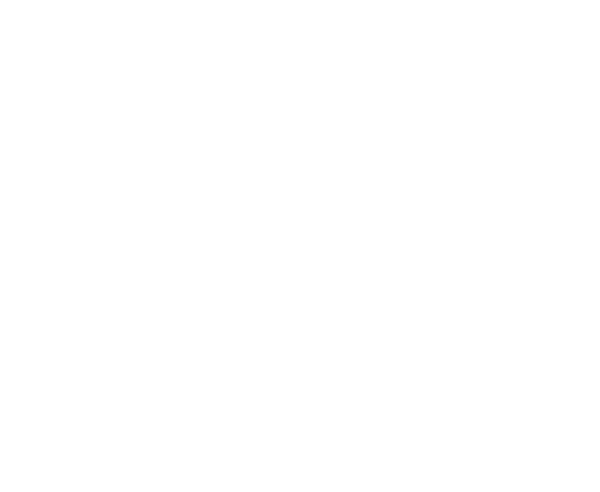

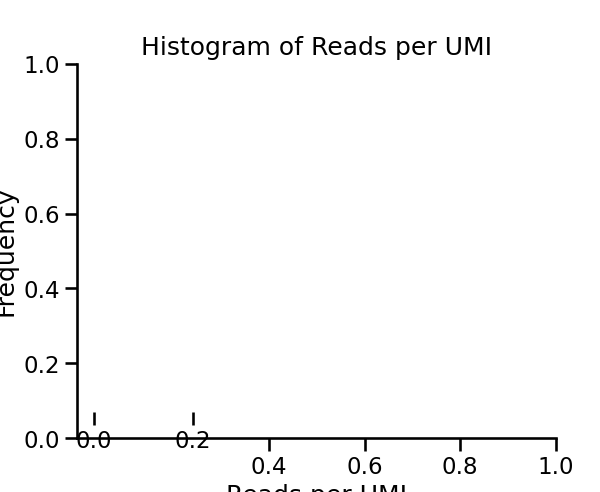

 63%|██████▎   | 71/113 [02:19<00:58,  1.40s/it]

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

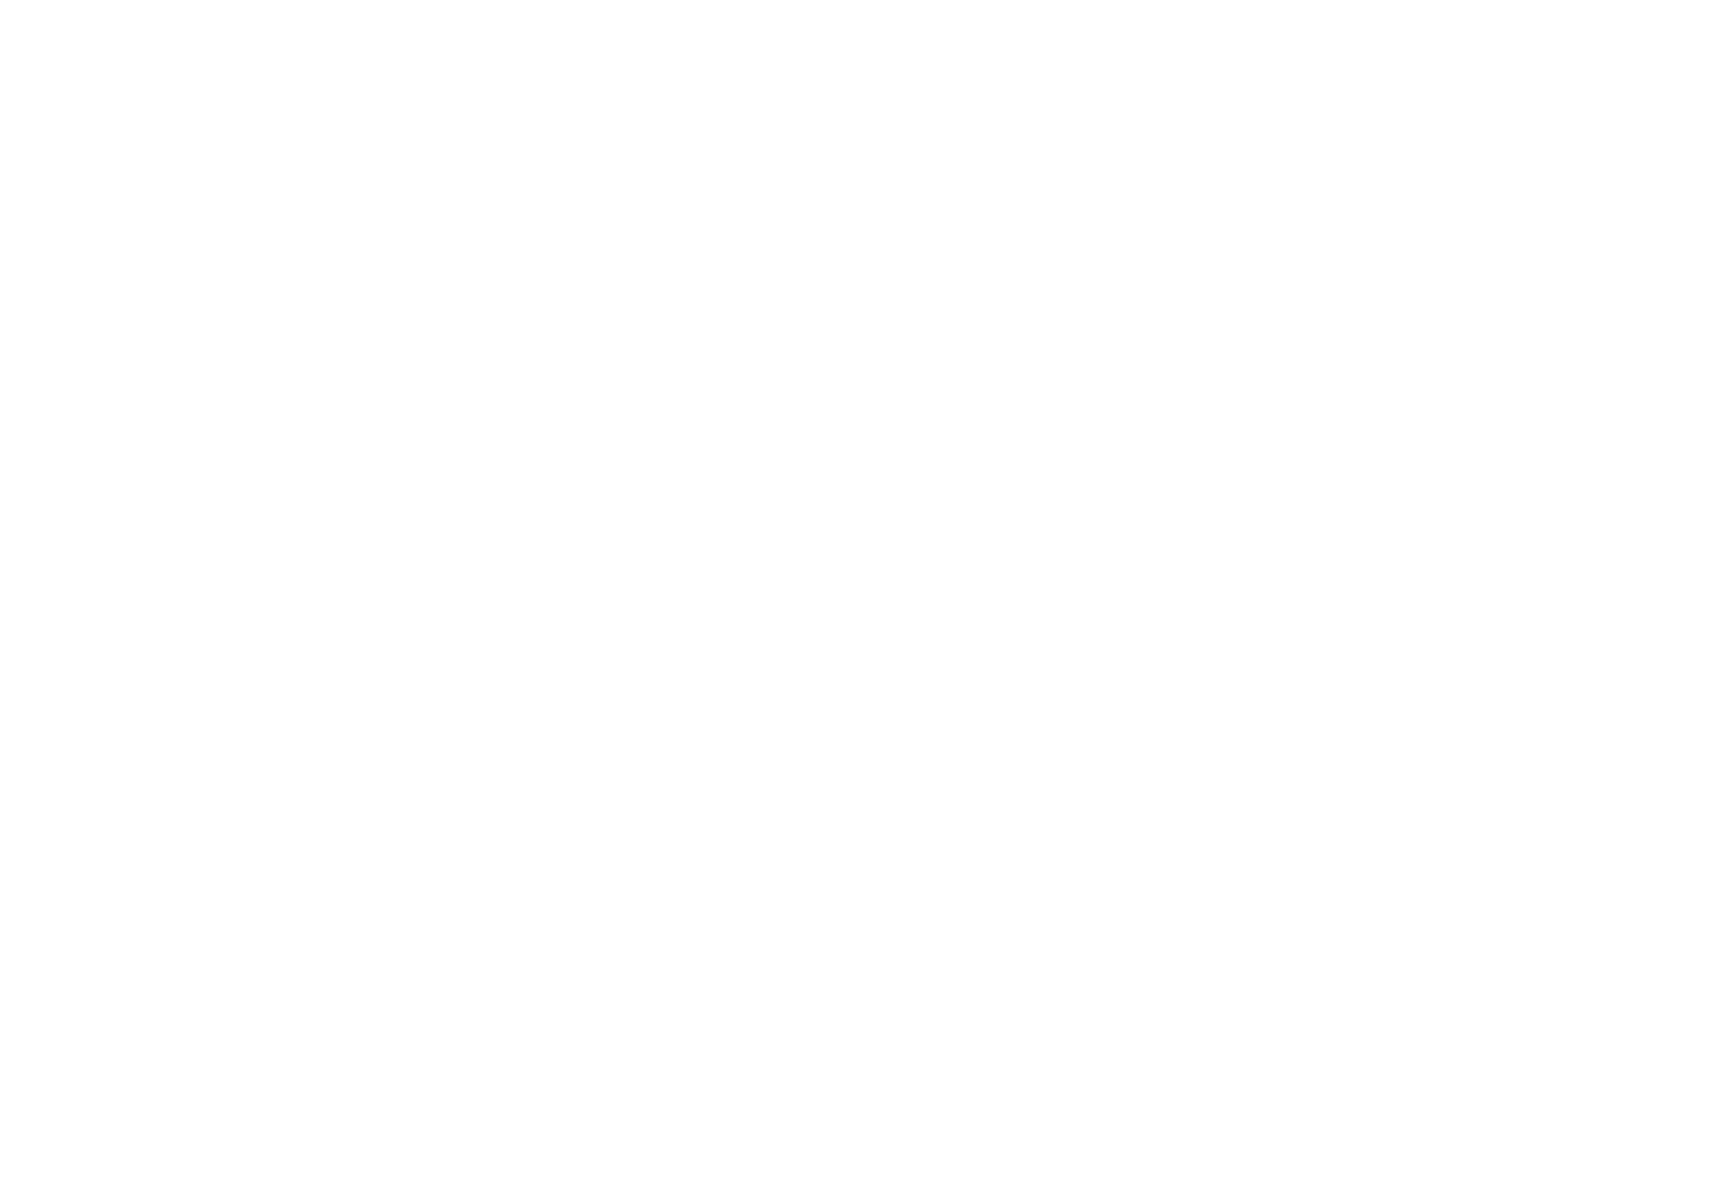

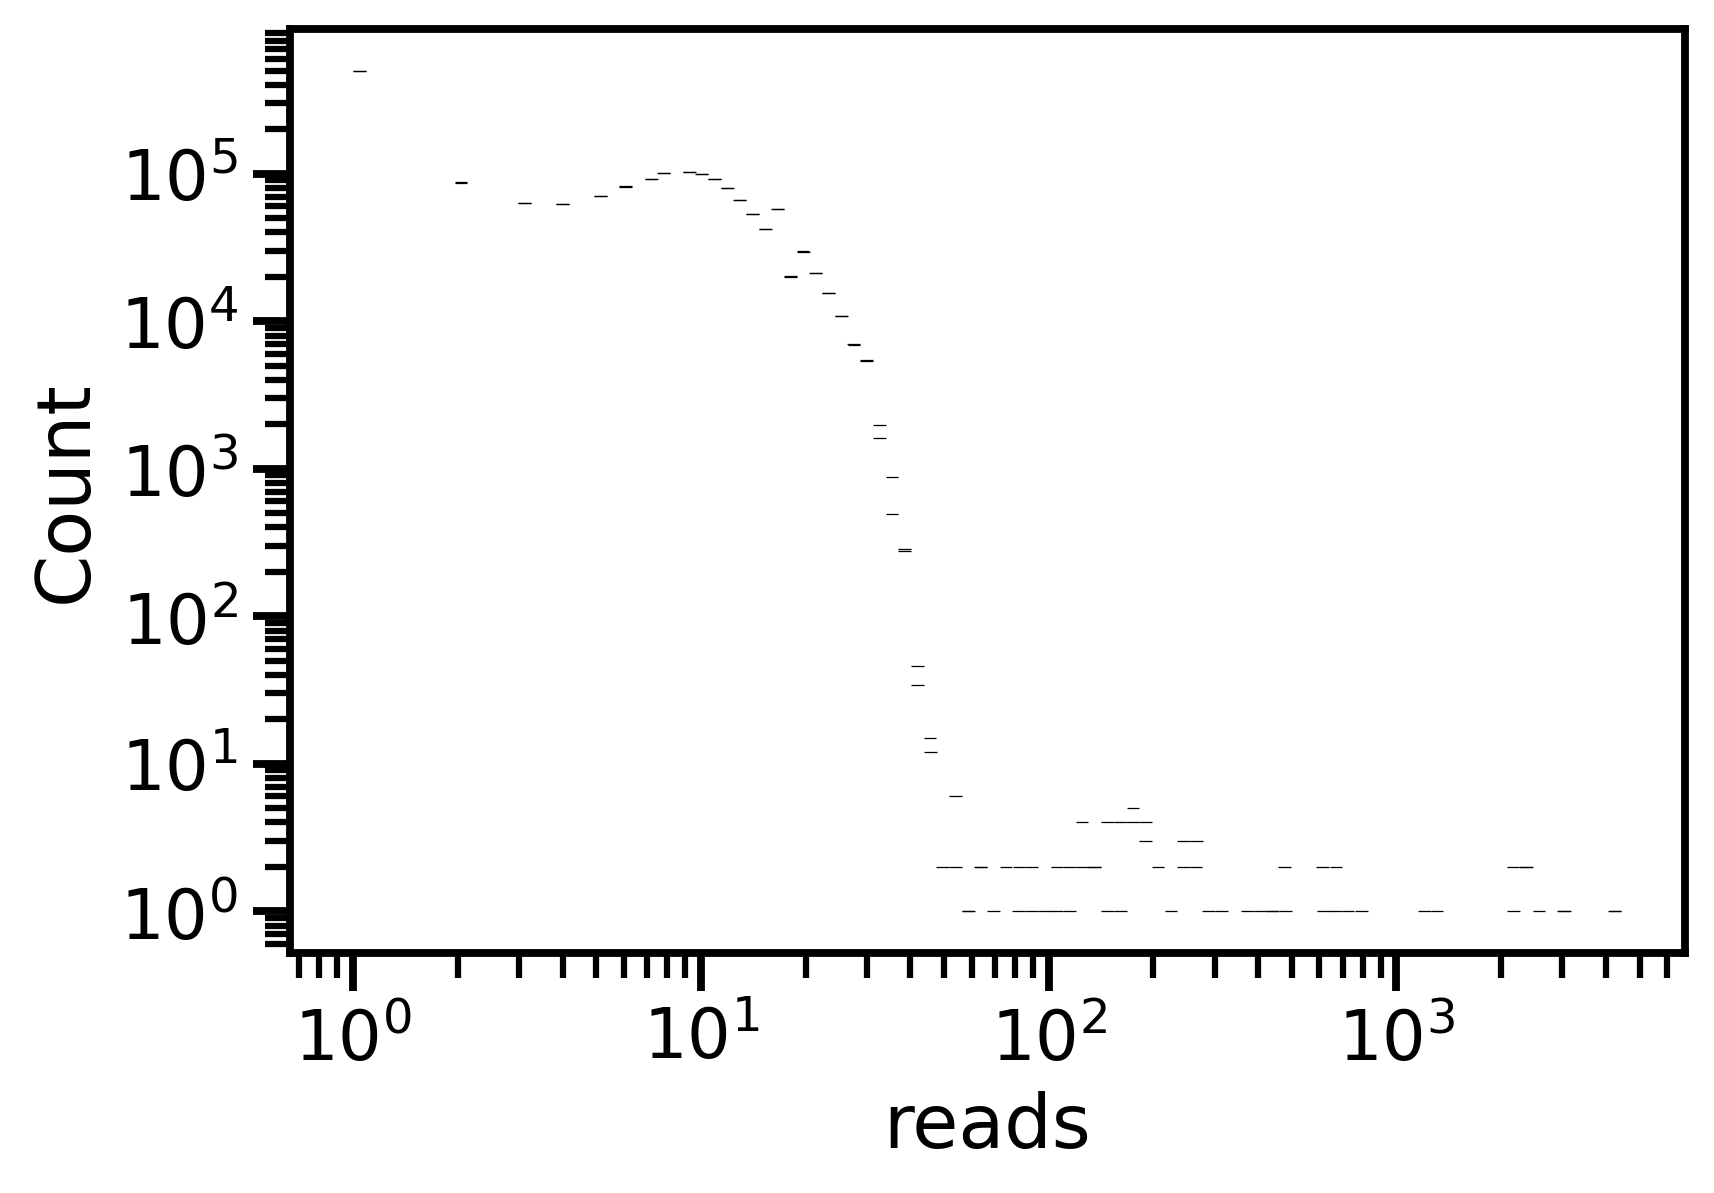

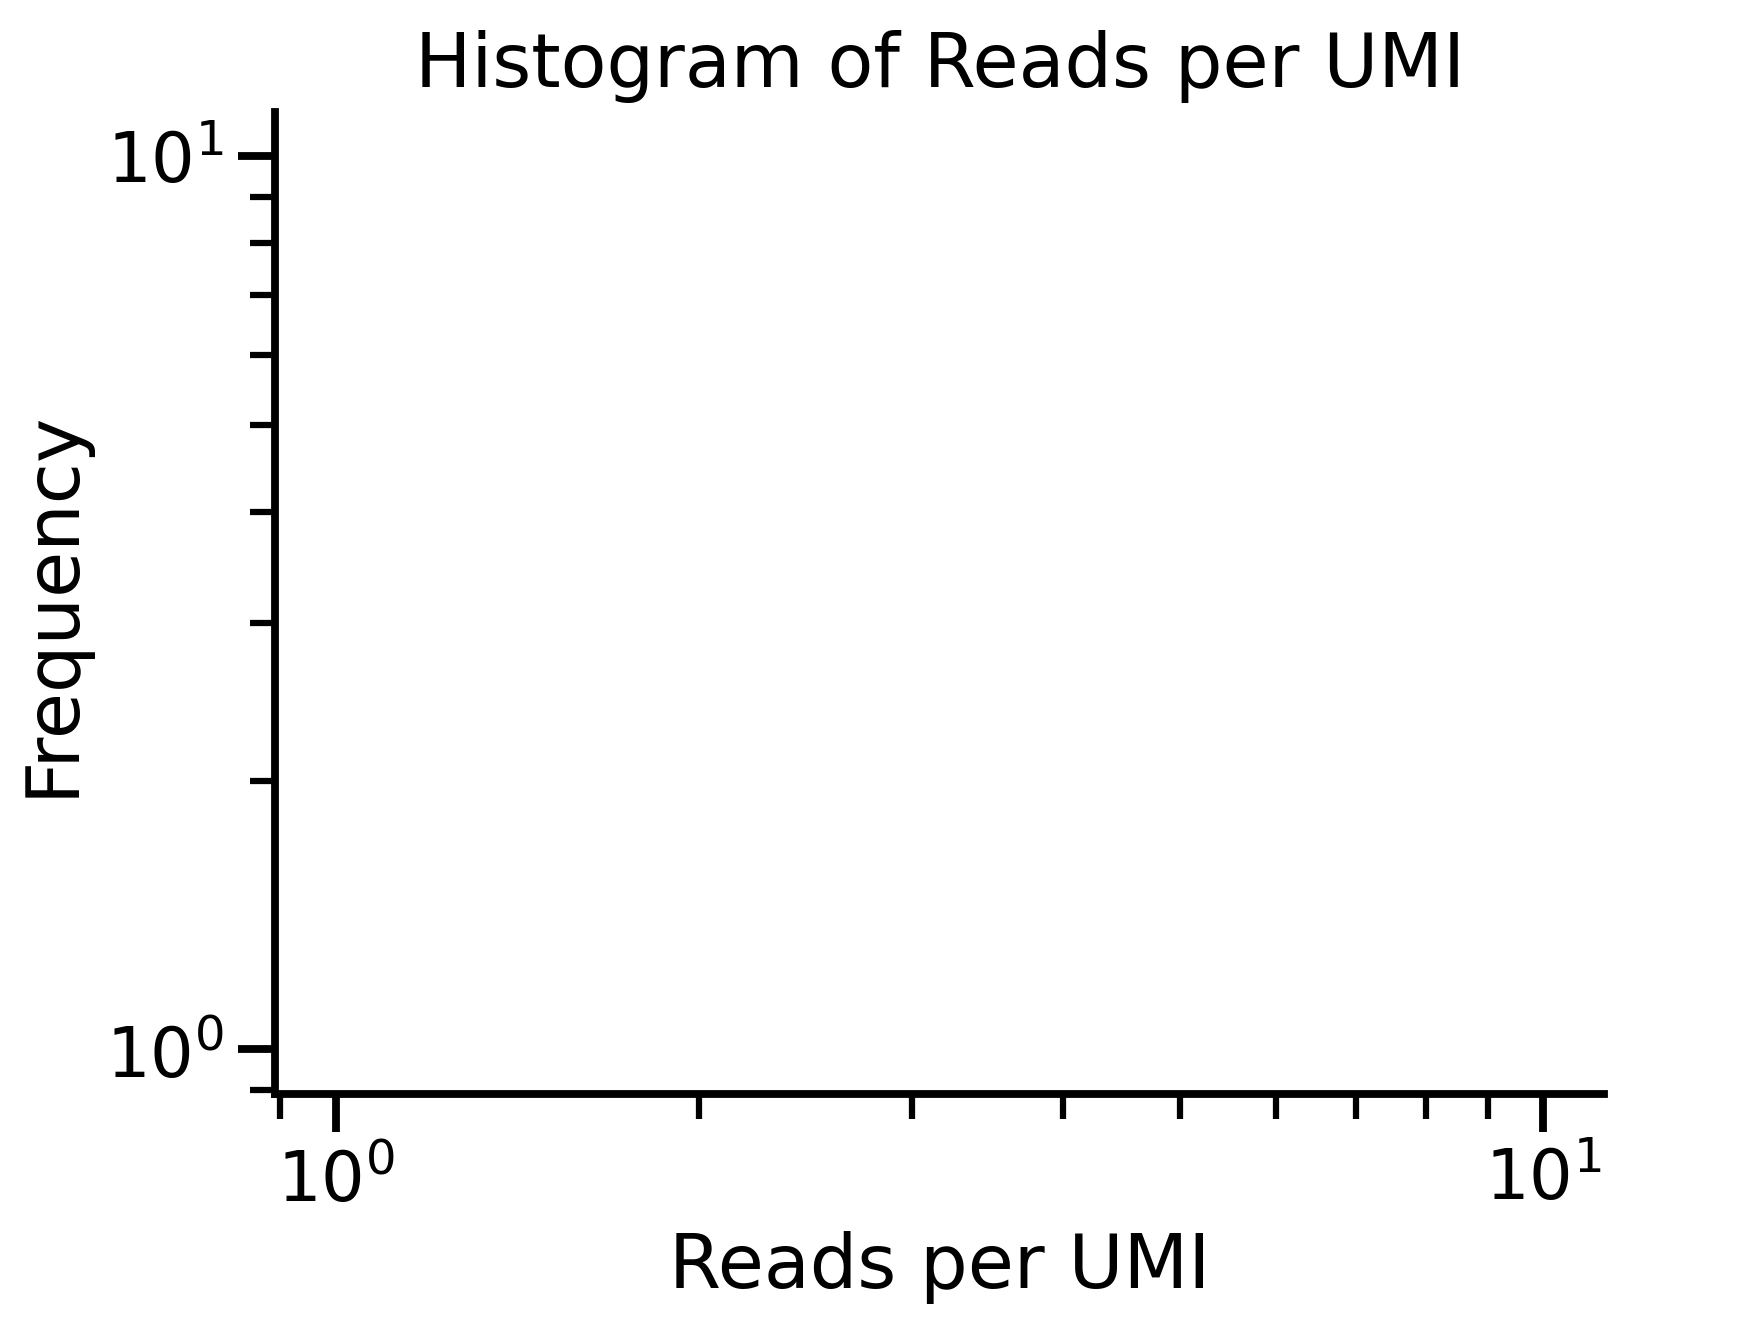

<Figure size 1800x1200 with 0 Axes>

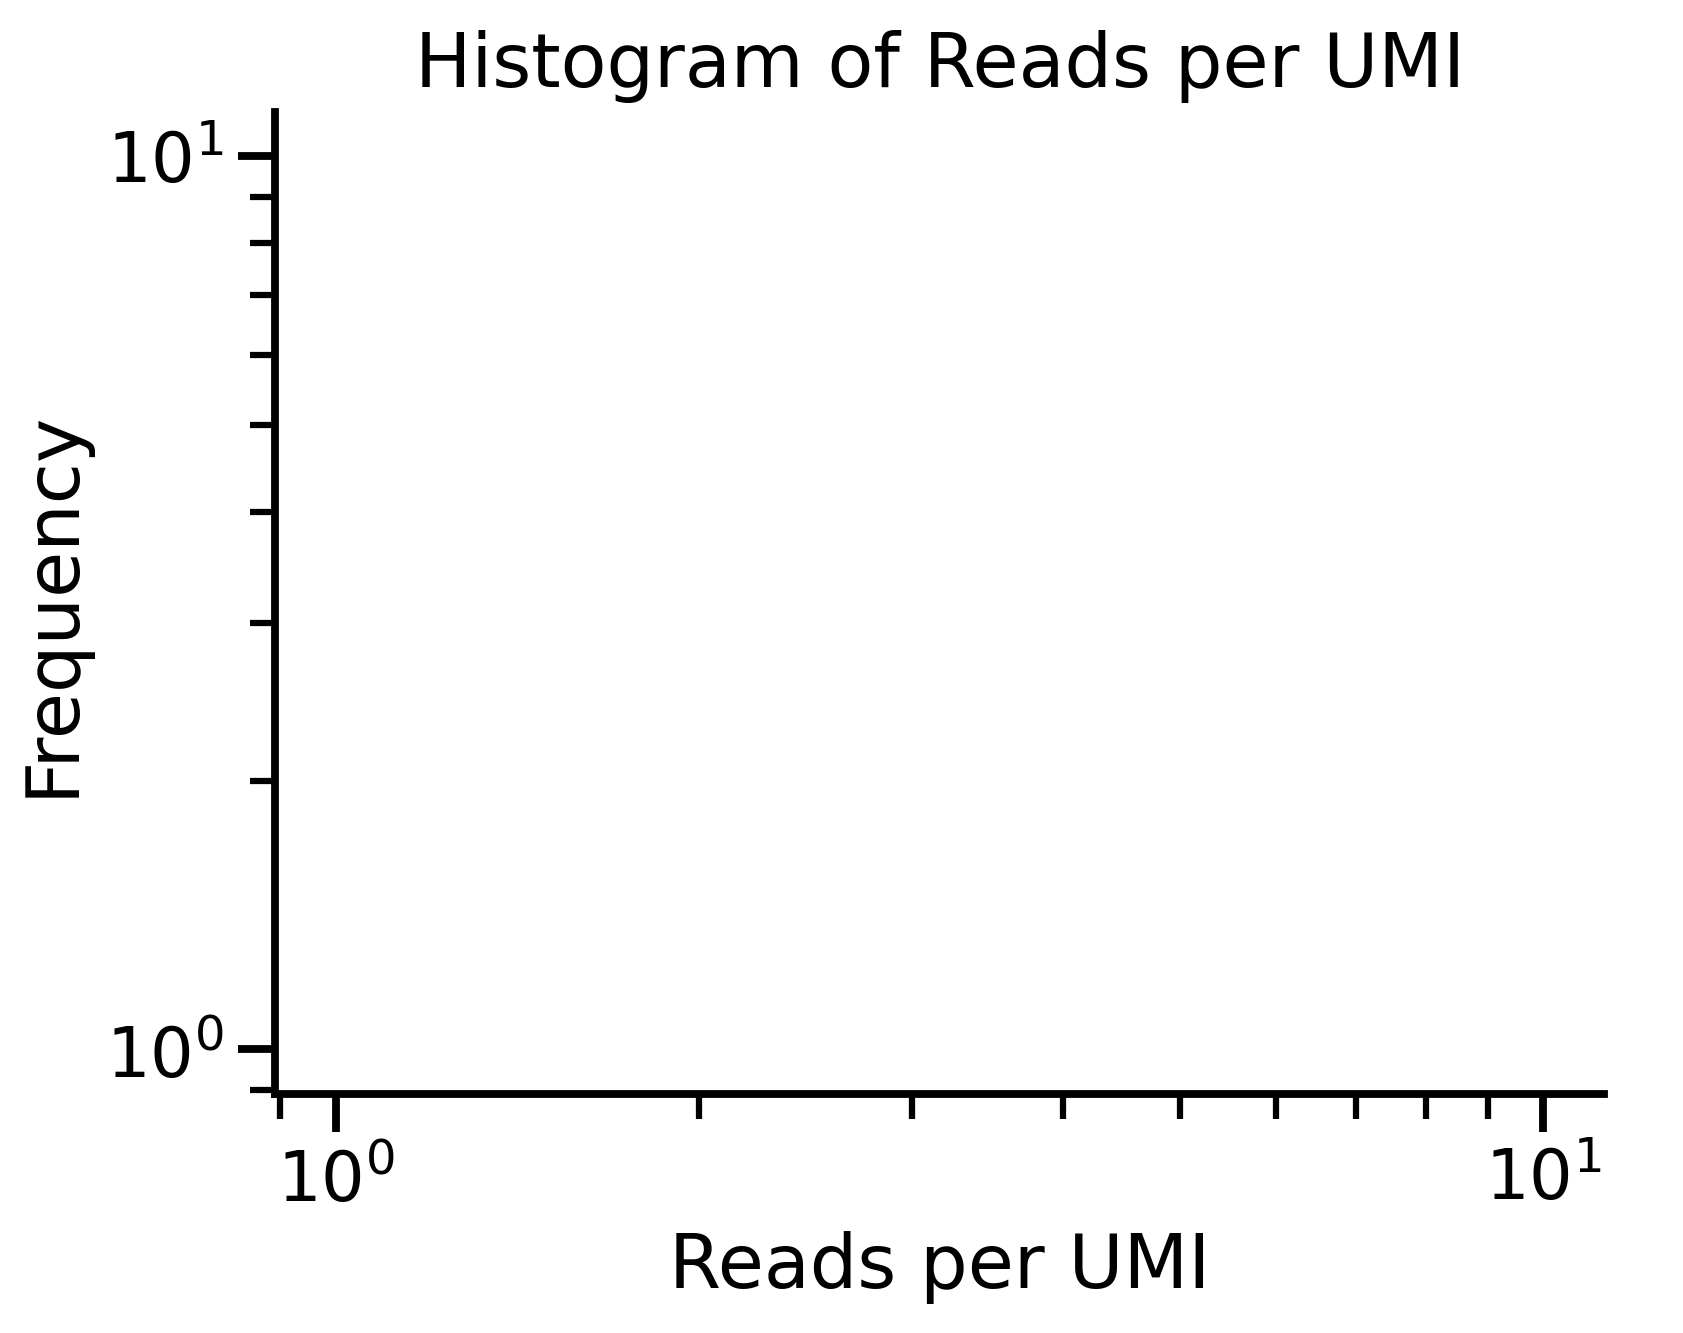

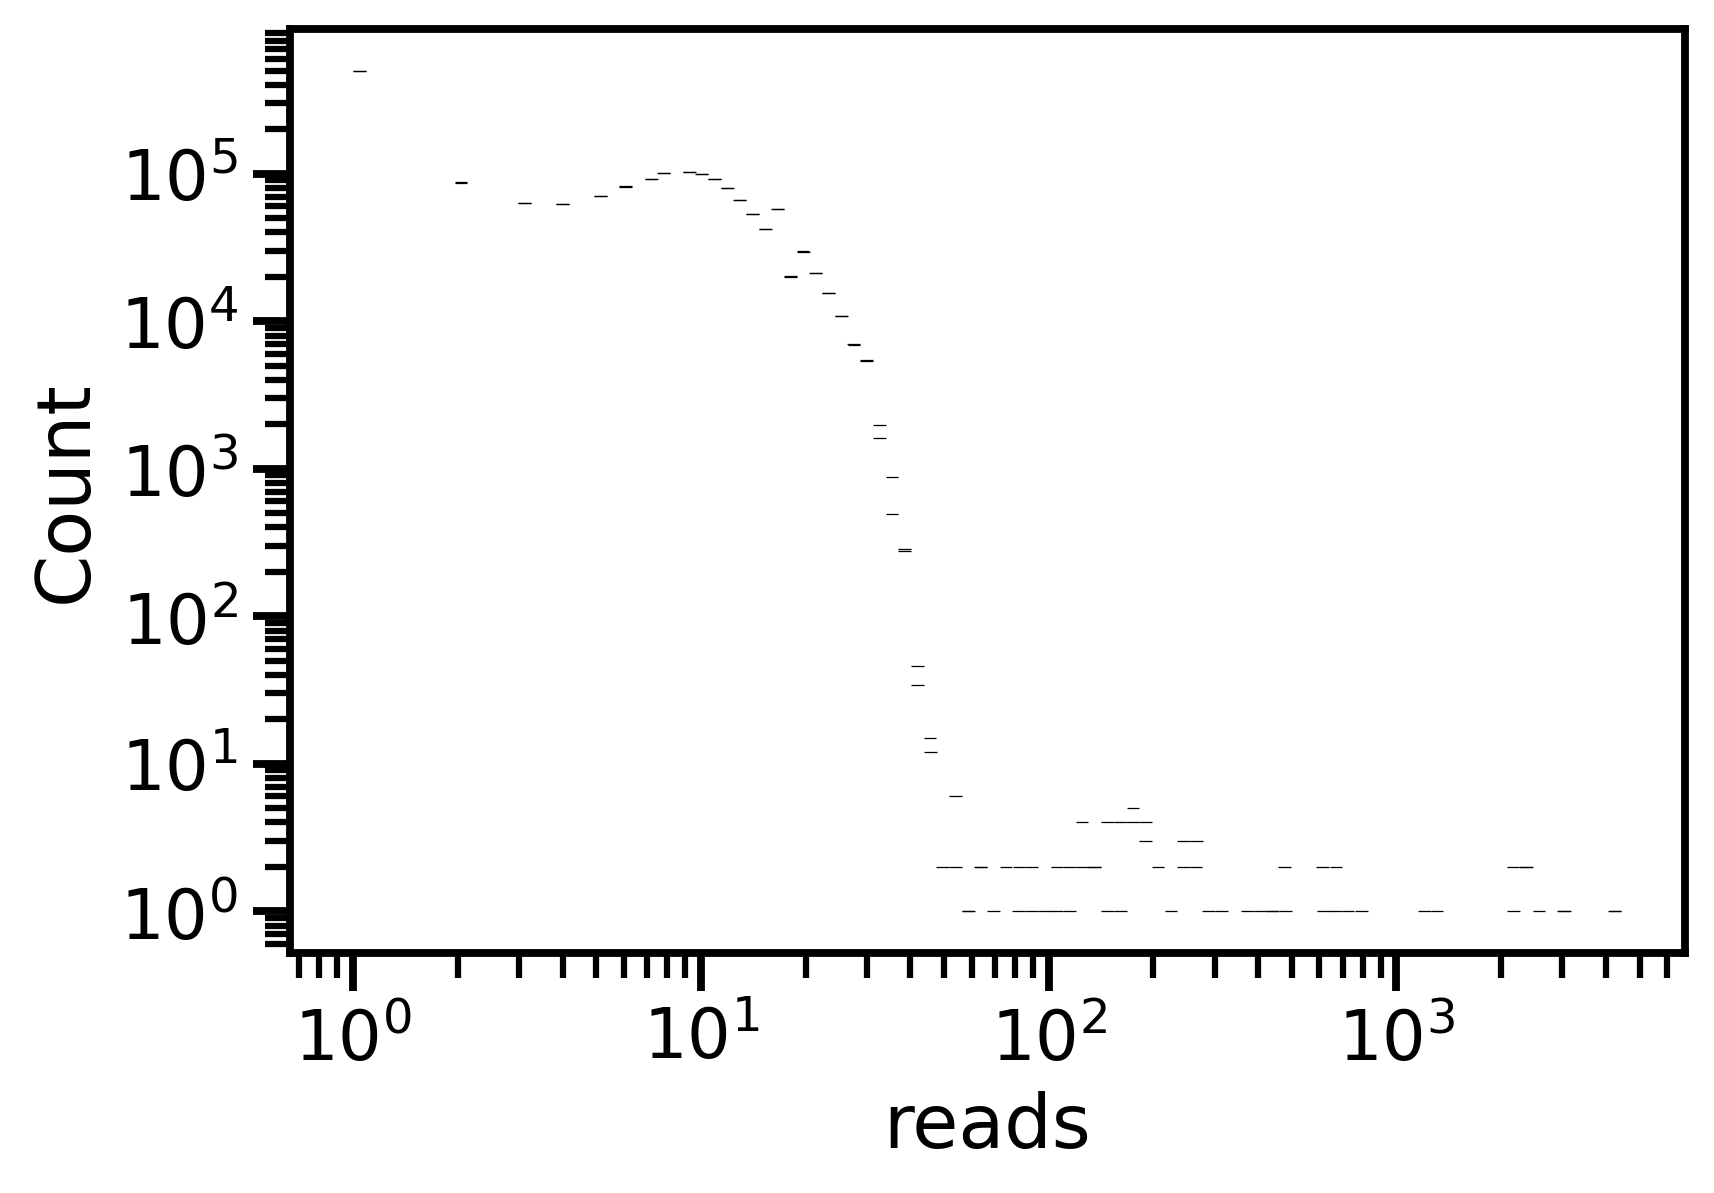

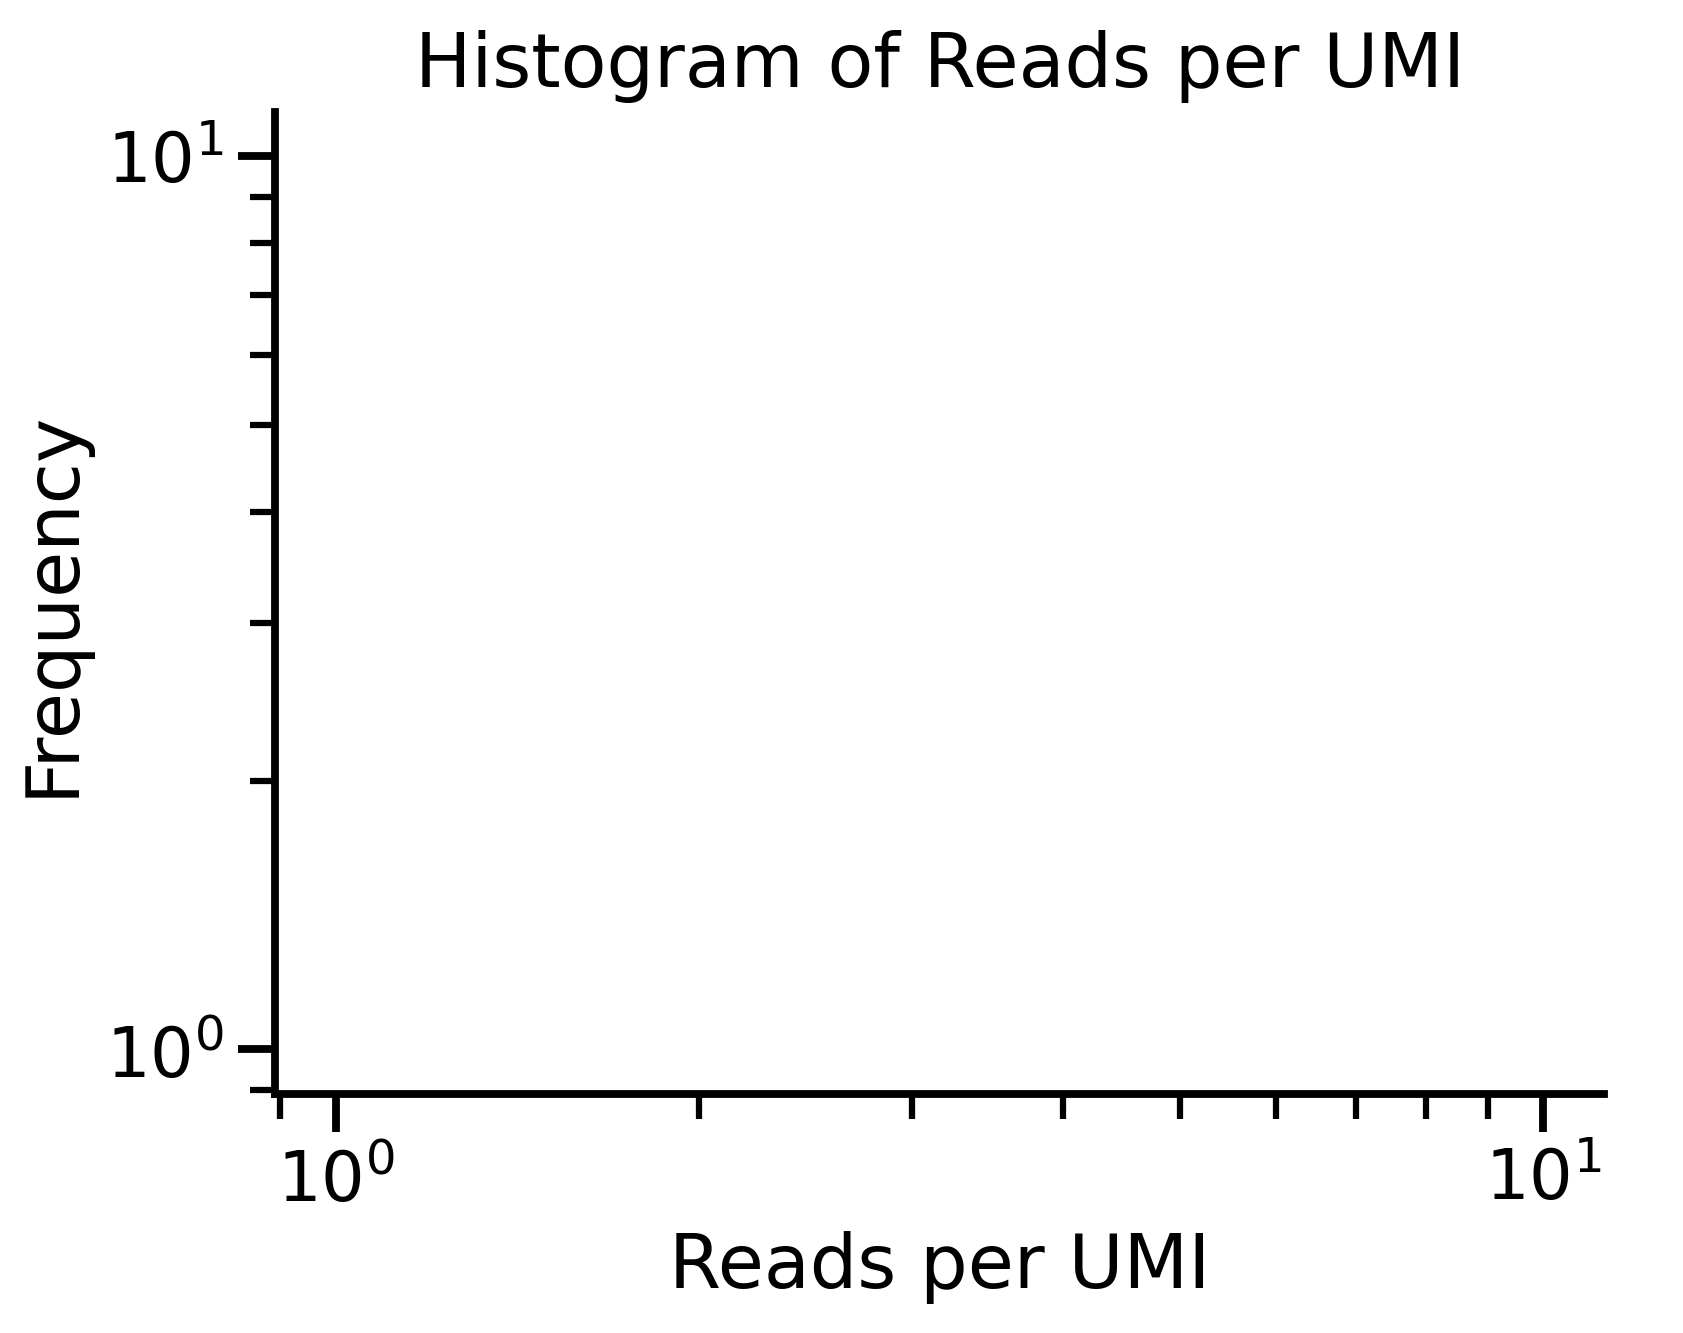

 82%|████████▏ | 93/113 [02:30<00:17,  1.11it/s]

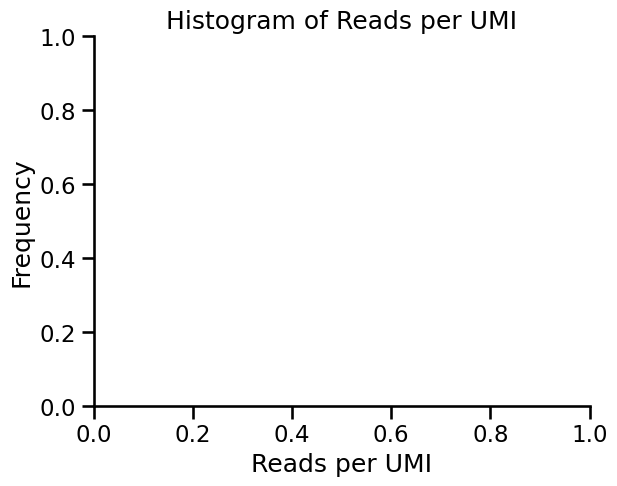

 84%|████████▍ | 95/113 [02:32<00:16,  1.12it/s]

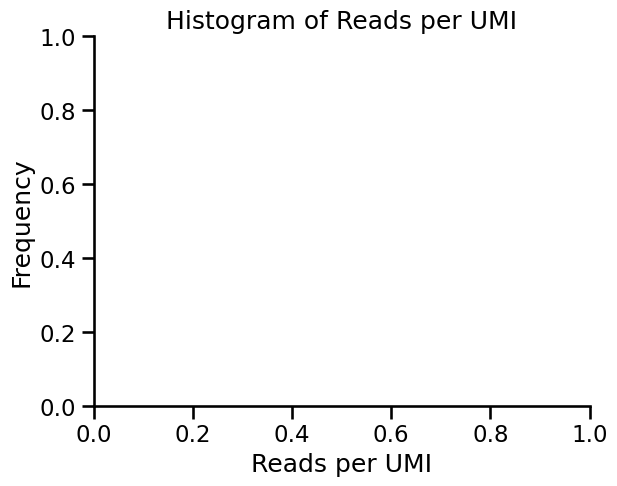

100%|██████████| 113/113 [02:33<00:00,  1.36s/it]


In [3]:
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
import os
import tqdm
import seaborn as sns

import matplotlib.pyplot as plt

base_dir = "/Volumes/Expansion/GCN4_TREBL/downsampling/"

def process_folder(folder):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        # Find the reads_per_umi file
        reads_per_umi_path = next(
            (os.path.join(folder_path, file) for file in os.listdir(folder_path) if "reads_per_umi" in file and "20_chunks" in file),
            None
        )
        if reads_per_umi_path is None:
            return
        
        # Read the reads_per_umi file
        reads_per_umi_df = pd.read_csv(reads_per_umi_path, sep="\t")
        
        # Plot the histogram
        plt.figure(figsize=(6, 4), dpi=300)
        sns.set_context('talk')
        sns.histplot(reads_per_umi_df['reads'], kde=False, log_scale=(True, True), bins = 100)
        plt.title("Histogram of Reads per UMI")
        plt.xlabel("Reads per UMI")
        plt.ylabel("Frequency")
        plt.grid(False)
        sns.despine()
        
        # Save the histogram in the folder
        hist_path = os.path.join(folder_path, "reads_per_umi_histogram.png")
        plt.savefig(hist_path, bbox_inches='tight')
        plt.show()

# Get the list of folders
folders = [folder for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))]

# Use ThreadPoolExecutor to parallelize the processing
with ThreadPoolExecutor() as executor:
    list(tqdm.tqdm(executor.map(process_folder, folders), total=len(folders)))